<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_14_gaussian_mixture_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gaussian mixture model (GMM)

In this lecture we will address **G**aussian **M**ixture **M**odel incrementally and will try to understand
* what is mixture model and why is it appropriate for clustering;
* what is Gaussian (we will need multinomial Gaussians in particular);
* how we can fit mixture model using **E**xpectation **M**aximization technique;
* how we can cluster data by fitting Gaussian mixture model (using EM);
* explore GMM.

OK, let's explore these points one by one.

#Mixture models and clustering

Suppose we have discrete random variable $Z$:

$$
Z \sim \text{Discrete}(\pi_1,\, \dots \, ,\pi_K), \qquad \text{Support}[Z]={1,\, \dots \, ,K}.
$$

Suppose now you have a family of $K$ probability distributions:

$$
\mathcal{P}_k,\qquad k=1\dots K.
$$

We define a following two-steps probability model (mixture model):

---

* `Let random variable` Z `generate` a number $z=1 \dots K$. `Let` $z=k$;
* `Let random variable` $\mathcal{P}_k$` generate a random number that we proclaim an outcome of mixture model.`

---

We can say that

$$
\text{Mixture}=\sum_{k} \pi_k \cdot \mathcal{P}_k.
$$

This notation makes sense as

$$
\text{pdf}_{{Mixture}}=\sum_{k} \pi_k \cdot \text{pdf}_{\mathcal{P}_k}.
$$

Note, that $z$ is a discrete (categorical) random variable with support $1, \dots, K$ acting like a **tag** conditioning probability distribution we use to  generate specific point on the second step. The role of $z$ is close of that of the cluster label.
 After the point is generated the tag is erased, making it impossible to know what probability distribution was responsible for this point. 

In [ ]:
#@title Tags

%%html

<svg width="180mm" height="90mm" version="1.1" viewBox="0 0 642.18 350.11" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <g transform="translate(-27.694 44.547)">
  <path d="m132.38 70.283c-0.22486 0.83896-1.3219 11.686-1.9763 17.529l12.459 1.4046c0.68597-6.0844 2.0474-17.329 2.0579-18.253 0.11339-1.6286-3.0342-9.4555-3.7074-10.442-0.19348-0.35731-0.62651-0.88288-1.2735-0.97601-0.75017-0.07814-1.3257 0.25826-1.5887 0.57422-1.1919 1.3634-5.0634 7.5591-5.9706 10.164" fill="none" stroke="#000" stroke-width=".2041px"/>
  <circle transform="rotate(6.4325)" cx="145.73" cy="47.757" r="1.7271" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  <path d="m139.77 60.566c-0.67593-0.08686-1.3055 0.31658-1.6677 0.86517-1.5169 2.0156-2.7933 4.2009-4.0341 6.3937-0.59629 1.084-1.1789 2.1852-1.6455 3.3289-0.49147 3.4954-0.82725 7.0106-1.2328 10.517-0.24089 2.2897-0.52606 4.5768-0.72191 6.8701-0.0129 0.34262 0.5083 0.1511 0.72475 0.25135 3.8356 0.43244 7.6712 0.86488 11.507 1.2973 0.17079-0.20926 0.0889-0.5974 0.16443-0.87262 0.63868-5.5156 1.3376-11.025 1.895-16.549 0.0985-0.69801 0.0734-1.4092-0.14004-2.0847-0.75277-2.7188-1.7714-5.3601-2.9112-7.9385-0.35228-0.68816-0.62787-1.5265-1.3402-1.9278-0.18597-0.09178-0.39259-0.13155-0.5977-0.15016zm-0.1503 2.4374c0.8218 0.0229 1.5127 0.79015 1.5624 1.588 6.5e-4 0.48364-0.10072 0.99169-0.46734 1.3354-0.59974 0.67954-1.7057 0.74773-2.4008 0.17093-0.52727-0.40668-0.75059-1.1195-0.59553-1.7617 0.11903-0.71911 0.80743-1.2846 1.5177-1.358 0.1283-3e-3 0.25616 0.0121 0.38353 0.0253z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="146.26" cy="49.041" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m139.86 59.606c-1.5427-0.01552-2.2308 1.6471-2.9971 2.7074-1.5255 2.477-3.1496 4.9324-4.2665 7.6275-0.75016 3.4554-0.92427 7.011-1.3393 10.518-0.23681 2.4083-0.46771 4.8172-0.7021 7.2257 1.7573 0.3813 3.6899 0.44223 5.5146 0.70027 2.1926 0.2472 4.3851 0.49439 6.5777 0.74159 0.41105-1.7128 0.52896-3.6003 0.80642-5.385 0.56222-4.4009 1.0188-8.8156 1.4606-13.229-0.87125-3.1746-2.0343-6.2756-3.3939-9.2715-0.37682-0.64976-0.81528-1.5433-1.6604-1.6344zm-0.18886 2.4393c1.4137 0.08473 2.0835 2.0264 1.034 2.9664-0.71639 0.72619-2.024 0.73974-2.6177-0.15828-0.91156-1.0548-0.0646-2.7452 1.272-2.8112 0.10371-8e-3 0.20818-8e-3 0.31169 0.0031z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m144.3 53.33c0.51698 0.01291 0.68936 0.04452 0.75744 0.81361 4e-3 0.04762-0.0613 0.39307-0.29254 0.81591-1.0647 1.9466-4.2123 6.9645-4.8476 7.5141-0.54543 0.35821-0.78045 0.058-0.6005-0.30905" fill="none" stroke-width=".165"/>
   <path d="m143.8 53.939c-1.2762 1.9308-2.4501 3.8105-3.4593 5.6079" fill="none" stroke-width=".165"/>
   <g id="content" transform="matrix(.6377 .056208 .056208 -.6377 17.519 522.06)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m189.27 44.264c-0.11993 0.86025 0.12594 11.76 0.19549 17.639l12.537-0.13895c-0.0679-6.1226-0.10028-17.449-0.20357-18.368-0.0879-1.6302-4.1746-9.0104-4.964-9.907-0.23597-0.33079-0.73038-0.79909-1.3839-0.8119-0.75407 0.01479-1.2839 0.41942-1.5059 0.76532-1.0151 1.4997-4.0949 8.1247-4.6747 10.821" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-.63499)" cx="195.07" cy="39.106" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m195.4 33.712c-0.68148-0.0031-1.2566 0.4748-1.5485 1.0638-1.2574 2.187-2.2552 4.5127-3.2168 6.8415-0.45837 1.1491-0.90107 2.3137-1.2234 3.5061-0.0577 3.5293 0.0416 7.0592 0.0706 10.588 0.0427 2.302 0.0411 4.6067 0.12886 6.9067 0.0293 0.34161 0.52303 0.0874 0.75017 0.16028 3.8597-0.0428 7.7194-0.0856 11.579-0.12834 0.14374-0.22868 0.0147-0.60379 0.0558-0.88622-0.0448-5.5523-0.0291-11.106-0.15562-16.657 0.0119-0.70482-0.10054-1.4075-0.39547-2.0516-1.0816-2.6056-2.4174-5.1014-3.8658-7.52-0.43427-0.63959-0.8109-1.4376-1.5672-1.7483-0.19585-0.06822-0.40578-0.08225-0.61164-0.07548zm0.15074 2.4374c0.81837-0.07839 1.5984 0.59803 1.746 1.3837 0.0602 0.47987 0.0221 0.99654-0.29949 1.3828-0.51158 0.74817-1.6008 0.95192-2.3615 0.46501-0.57329-0.33871-0.88263-1.0187-0.80777-1.675 0.0296-0.72829 0.64325-1.3741 1.3391-1.5344 0.12696-0.01876 0.25571-0.01951 0.38373-0.02208z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="193.64" cy="21.028" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m195.37 32.749c-1.5329 0.17443-2.0112 1.9091-2.6412 3.0556-1.2091 2.6459-2.5188 5.2825-3.2956 8.0945-0.31931 3.5215-0.0546 7.0714-0.0351 10.603 0.0613 2.4191 0.12855 4.8381 0.19228 7.2572 1.7908 0.16218 3.7163-0.0151 5.5589 0.0164 2.2063-0.0245 4.4126-0.0489 6.619-0.0734 0.19719-1.7503 0.082-3.638 0.13773-5.4433 0.0165-4.4366-0.0736-8.874-0.17825-13.308-1.2552-3.0433-2.791-5.9776-4.5089-8.7835-0.4539-0.59846-0.99897-1.4312-1.8489-1.4177zm0.11271 2.444c1.4134-0.08988 2.317 1.7546 1.3911 2.8167-0.6216 0.80882-1.9176 0.98315-2.6173 0.16499-1.0344-0.93458-0.40188-2.7164 0.91642-2.9464 0.10194-0.0207 0.20562-0.03355 0.3097-0.03537z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m194.31 25.118c0.42548-0.29396 0.58342-0.3699 1.0913 0.2117 0.0313 0.03612 0.18187 0.35381 0.24391 0.83174 0.28547 2.2004 0.69562 8.1095 0.50564 8.9277-0.22997 0.61068-0.5967 0.50638-0.66734 0.10374" fill="none" stroke-width=".165"/>
   <path d="m194.13 26.31c0.0669 2.3135 0.18792 4.5263 0.39634 6.5771" fill="none" stroke-width=".165"/>
   <g transform="matrix(.63977 -.02268 -.02268 -.63977 130.86 506.74)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m149.35 133.66c-0.11852 0.86045 0.14517 11.759 0.22436 17.638l12.536-0.15945c-0.0779-6.1225-0.12883-17.449-0.23362-18.367-0.0905-1.63-4.1893-9.0035-4.9802-9.8988-0.23652-0.3304-0.73169-0.79789-1.3852-0.80963-0.75404 0.016-1.2832 0.42151-1.5047 0.76778-1.0126 1.5014-4.0816 8.1313-4.657 10.829" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-.72871)" cx="153.94" cy="128.3" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m155.47 123.1c-0.68148-2e-3 -1.2559 0.47686-1.5468 1.0663-1.2538 2.189-2.2478 4.5163-3.2056 6.8467-0.45649 1.1499-0.89728 2.3151-1.2176 3.5081-0.0519 3.5294 0.0532 7.0591 0.0879 10.588 0.0464 2.3019 0.0486 4.6067 0.14016 6.9065 0.0299 0.34156 0.52317 0.0866 0.75043 0.15904 3.8596-0.0491 7.7192-0.0982 11.579-0.14727 0.14337-0.22892 0.0137-0.60382 0.0544-0.88631-0.0539-5.5522-0.0472-11.106-0.18287-16.657 0.0107-0.70484-0.10284-1.4073-0.39882-2.0509-1.0858-2.6038-2.4258-5.0975-3.8781-7.5137-0.43533-0.63888-0.81326-1.4363-1.5701-1.7457-0.19596-0.0679-0.40592-0.0816-0.61176-0.0745zm0.15473 2.4371c0.81825-0.0797 1.5994 0.59541 1.7482 1.3808 0.0609 0.47979 0.0237 0.99652-0.29723 1.3833-0.51035 0.749-1.5992 0.95454-2.3608 0.46888-0.57384-0.33778-0.88429-1.0172-0.8105-1.6737 0.0284-0.72834 0.641-1.3752 1.3366-1.5366 0.12693-0.019 0.25567-0.0199 0.38369-0.0227z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="156.24" cy="111.34" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m155.44 122.13c-1.5326 0.17694-2.008 1.9124-2.6362 3.0599-1.2048 2.6479-2.5102 5.2866-3.2824 8.0998-0.31354 3.522-0.0431 7.0715-0.0177 10.603 0.0653 2.419 0.13646 4.8379 0.20416 7.2568 1.7911 0.15926 3.7162-0.0212 5.5589 7e-3 2.2063-0.0281 4.4126-0.0561 6.6188-0.0842 0.19432-1.7507 0.076-3.6381 0.12883-5.4435 9e-3 -4.4366-0.0881-8.8739-0.20002-13.308-1.2602-3.0412-2.8008-5.973-4.5232-8.7761-0.45488-0.59772-1.0013-1.4296-1.8512-1.4147zm0.1167 2.4438c1.4132-0.0922 2.3199 1.7508 1.3958 2.8144-0.62028 0.80983-1.916 0.98628-2.617 0.16928-1.0359-0.9329-0.40632-2.7157 0.9116-2.9479 0.1019-0.0209 0.20556-0.0339 0.30963-0.0359z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m155.34 114.44c0.45146-0.25226 0.61588-0.31287 1.0663 0.31428 0.0277 0.0389 0.14748 0.36948 0.16391 0.85113 0.0754 2.2175-0.0769 8.1389-0.34371 8.9354-0.28688 0.5861-0.64205 0.44748-0.67417 0.04" fill="none" stroke-width=".165"/>
   <path d="m154.82 116.61c-0.11897 1.937-0.17581 3.7936-0.13258 5.5207" fill="none" stroke-width=".15105"/>
   <g transform="matrix(1.5 0 0 -1.5 -70.885 1208.5)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m28.838 233.96c-0.11993 0.86025 0.12594 11.76 0.19549 17.639l12.537-0.13895c-0.0679-6.1226-0.10028-17.449-0.20357-18.368-0.0879-1.6302-4.1746-9.0104-4.964-9.907-0.23597-0.33079-0.73038-0.79909-1.3839-0.8119-0.75407 0.0148-1.2839 0.41941-1.5059 0.76532-1.0151 1.4997-4.0949 8.1247-4.6747 10.821" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-.63499)" cx="32.549" cy="227.01" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m34.975 223.4c-0.68148-3e-3 -1.2566 0.4748-1.5485 1.0638-1.2574 2.187-2.2552 4.5127-3.2168 6.8415-0.45837 1.1491-0.90107 2.3137-1.2234 3.5061-0.0577 3.5293 0.0416 7.0592 0.0706 10.588 0.0427 2.302 0.0411 4.6067 0.12886 6.9067 0.0293 0.34161 0.52303 0.0874 0.75017 0.16028 3.8597-0.0428 7.7194-0.0856 11.579-0.12834 0.14374-0.22868 0.0147-0.60379 0.0558-0.88622-0.0448-5.5522-0.0291-11.106-0.15562-16.657 0.0119-0.70482-0.10054-1.4075-0.39547-2.0516-1.0816-2.6056-2.4174-5.1014-3.8658-7.52-0.43427-0.63959-0.8109-1.4376-1.5672-1.7483-0.19585-0.0682-0.40578-0.0823-0.61164-0.0755zm0.15074 2.4374c0.81837-0.0784 1.5984 0.59804 1.746 1.3837 0.0602 0.47988 0.0221 0.99654-0.29949 1.3828-0.51158 0.74817-1.6008 0.95192-2.3615 0.46501-0.57329-0.3387-0.88263-1.0187-0.80777-1.675 0.0296-0.72829 0.64325-1.3741 1.3391-1.5344 0.12696-0.0188 0.25571-0.0195 0.38373-0.0221z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="33.209" cy="210.72" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m34.943 222.44c-1.5329 0.17443-2.0112 1.9091-2.6412 3.0556-1.2091 2.6459-2.5188 5.2825-3.2956 8.0945-0.31931 3.5215-0.0546 7.0714-0.0351 10.603 0.0613 2.4191 0.12855 4.8381 0.19228 7.2572 1.7908 0.16218 3.7163-0.0151 5.5589 0.0164 2.2063-0.0245 4.4126-0.0489 6.619-0.0734 0.19719-1.7503 0.082-3.638 0.13773-5.4433 0.0165-4.4366-0.0736-8.874-0.17825-13.308-1.2552-3.0432-2.791-5.9776-4.5089-8.7835-0.4539-0.59846-0.99897-1.4312-1.8489-1.4177zm0.11271 2.444c1.4134-0.0899 2.317 1.7546 1.3911 2.8167-0.6216 0.80882-1.9176 0.98315-2.6173 0.16499-1.0344-0.93458-0.40188-2.7164 0.91642-2.9464 0.10194-0.0207 0.20562-0.0336 0.3097-0.0354z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m33.882 214.81c0.42548-0.29396 0.58342-0.3699 1.0913 0.21169 0.0313 0.0361 0.18187 0.35382 0.24391 0.83175 0.28547 2.2004 0.69562 8.1095 0.50564 8.9277-0.22997 0.61068-0.5967 0.50638-0.66734 0.10374" stroke-width=".165"/>
   <path d="m33.698 216c0.0669 2.3135 0.18792 4.5263 0.39634 6.5771" stroke-width=".165"/>
   <path d="m173.49 95.507c-0.11993 0.86026 0.12594 11.76 0.19549 17.639l12.537-0.13895c-0.0679-6.1226-0.10028-17.449-0.20357-18.368-0.0879-1.6302-4.1746-9.0104-4.964-9.907-0.23597-0.33079-0.73038-0.79909-1.3839-0.81191-0.75407 0.0148-1.2839 0.41942-1.5059 0.76533-1.0151 1.4997-4.0949 8.1246-4.6747 10.821" stroke-width=".2041px"/>
  </g>
  <circle transform="rotate(-.63499)" cx="178.73" cy="90.171" r="1.7271" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  <path d="m179.63 84.955c-0.68148-3e-3 -1.2566 0.47481-1.5485 1.0638-1.2574 2.187-2.2552 4.5127-3.2168 6.8415-0.45837 1.1491-0.90107 2.3137-1.2234 3.5061-0.0577 3.5293 0.0416 7.0591 0.0706 10.588 0.0427 2.302 0.0411 4.6067 0.12886 6.9067 0.0293 0.3416 0.52303 0.0874 0.75017 0.16027 3.8597-0.0428 7.7194-0.0856 11.579-0.12833 0.14374-0.22869 0.0147-0.60379 0.0558-0.88622-0.0448-5.5523-0.0291-11.106-0.15562-16.657 0.0119-0.70481-0.10054-1.4075-0.39547-2.0516-1.0816-2.6056-2.4174-5.1014-3.8658-7.52-0.43427-0.63959-0.8109-1.4376-1.5672-1.7483-0.19585-0.0682-0.40578-0.0823-0.61164-0.0755zm0.15074 2.4374c0.81837-0.0784 1.5984 0.59803 1.746 1.3837 0.0602 0.47987 0.0221 0.99654-0.29949 1.3828-0.51158 0.74816-1.6008 0.95192-2.3615 0.46501-0.57329-0.33871-0.88263-1.0187-0.80777-1.675 0.0296-0.72829 0.64325-1.3741 1.3391-1.5344 0.12696-0.0188 0.25571-0.0195 0.38373-0.0221z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="177.86" cy="72.271" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m179.6 83.992c-1.5329 0.17443-2.0112 1.9091-2.6412 3.0556-1.2091 2.6459-2.5188 5.2825-3.2956 8.0945-0.31931 3.5215-0.0546 7.0714-0.0351 10.603 0.0613 2.4191 0.12855 4.8381 0.19228 7.2572 1.7908 0.16218 3.7163-0.0151 5.5589 0.0164 2.2063-0.0245 4.4126-0.0489 6.619-0.0734 0.19719-1.7503 0.082-3.638 0.13773-5.4433 0.0165-4.4366-0.0736-8.874-0.17825-13.308-1.2552-3.0432-2.791-5.9776-4.5089-8.7835-0.4539-0.59846-0.99897-1.4312-1.8489-1.4177zm0.11271 2.444c1.4134-0.0899 2.317 1.7546 1.3911 2.8167-0.6216 0.80881-1.9176 0.98315-2.6173 0.16499-1.0344-0.93458-0.40188-2.7164 0.91642-2.9464 0.10194-0.0207 0.20562-0.0335 0.3097-0.0354z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m178.54 76.361c0.42548-0.29396 0.58342-0.3699 1.0913 0.2117 0.0313 0.03612 0.18187 0.35381 0.24391 0.83174 0.28547 2.2004 0.69562 8.1095 0.50564 8.9277-0.22997 0.61068-0.5967 0.50638-0.66734 0.10374" fill="none" stroke-width=".165"/>
   <path d="m178.35 77.553c0.0669 2.3135 0.18792 4.5263 0.39634 6.5771" fill="none" stroke-width=".165"/>
   <g transform="matrix(.63977 -.02268 -.02268 -.63977 115.09 557.99)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m221.87 75.996c-0.11993 0.86025 0.12594 11.76 0.19549 17.639l12.537-0.13895c-0.0679-6.1226-0.10028-17.449-0.20357-18.368-0.0879-1.6302-4.1746-9.0104-4.964-9.907-0.23597-0.33079-0.73038-0.79908-1.3839-0.8119-0.75407 0.0148-1.2839 0.41942-1.5059 0.76533-1.0151 1.4997-4.0949 8.1246-4.6747 10.821" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-.63499)" cx="227.32" cy="71.198" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m228 65.444c-0.68148-3e-3 -1.2566 0.47481-1.5485 1.0638-1.2574 2.187-2.2552 4.5127-3.2168 6.8415-0.45837 1.1491-0.90107 2.3137-1.2234 3.5061-0.0577 3.5293 0.0416 7.0592 0.0706 10.588 0.0427 2.302 0.0411 4.6067 0.12886 6.9067 0.0293 0.34161 0.52303 0.0874 0.75017 0.16028 3.8597-0.0428 7.7194-0.0856 11.579-0.12834 0.14374-0.22868 0.0147-0.60379 0.0558-0.88622-0.0448-5.5522-0.0291-11.106-0.15562-16.657 0.0119-0.70482-0.10054-1.4075-0.39547-2.0516-1.0816-2.6056-2.4174-5.1014-3.8658-7.52-0.43427-0.63958-0.8109-1.4376-1.5672-1.7483-0.19585-0.0682-0.40578-0.0823-0.61164-0.0755zm0.15074 2.4374c0.81837-0.0784 1.5984 0.59804 1.746 1.3837 0.0602 0.47987 0.0221 0.99654-0.29949 1.3828-0.51158 0.74817-1.6008 0.95192-2.3615 0.46501-0.57329-0.3387-0.88263-1.0187-0.80777-1.675 0.0296-0.72829 0.64325-1.3741 1.3391-1.5344 0.12696-0.0188 0.25571-0.0195 0.38373-0.0221z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="226.24" cy="52.761" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m227.97 64.481c-1.5329 0.17442-2.0112 1.9091-2.6412 3.0556-1.2091 2.6459-2.5188 5.2825-3.2956 8.0945-0.31931 3.5215-0.0546 7.0714-0.0351 10.603 0.0613 2.4191 0.12855 4.8381 0.19228 7.2572 1.7908 0.16218 3.7163-0.0151 5.5589 0.0164 2.2063-0.0245 4.4126-0.0489 6.619-0.0734 0.19719-1.7503 0.082-3.638 0.13773-5.4433 0.0165-4.4366-0.0736-8.874-0.17825-13.308-1.2552-3.0432-2.791-5.9776-4.5089-8.7835-0.4539-0.59846-0.99897-1.4312-1.8489-1.4177zm0.11271 2.444c1.4134-0.0899 2.317 1.7546 1.3911 2.8167-0.6216 0.80881-1.9176 0.98314-2.6173 0.16499-1.0344-0.93458-0.40188-2.7164 0.91642-2.9464 0.10194-0.0207 0.20562-0.0336 0.3097-0.0354z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m226.91 56.85c0.42548-0.29396 0.58342-0.3699 1.0913 0.2117 0.0313 0.0361 0.18187 0.35381 0.24391 0.83174 0.28547 2.2004 0.69562 8.1095 0.50564 8.9277-0.22997 0.61068-0.5967 0.50638-0.66734 0.10374" fill="none" stroke-width=".165"/>
   <path d="m226.73 58.042c0.0669 2.3135 0.18792 4.5263 0.39634 6.5771" fill="none" stroke-width=".165"/>
   <g transform="matrix(.63977 -.02268 -.02268 -.63977 163.46 538.47)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m207.97 135.86c-0.11993 0.86026 0.12594 11.76 0.19549 17.639l12.537-0.13895c-0.0679-6.1226-0.10028-17.449-0.20357-18.368-0.0879-1.6302-4.1746-9.0104-4.964-9.907-0.23597-0.33079-0.73038-0.79909-1.3839-0.8119-0.75407 0.0148-1.2839 0.41941-1.5059 0.76532-1.0151 1.4997-4.0949 8.1246-4.6747 10.821" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-.63499)" cx="212.76" cy="130.91" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m214.11 125.31c-0.68148-3e-3 -1.2566 0.4748-1.5485 1.0638-1.2574 2.187-2.2552 4.5127-3.2168 6.8415-0.45837 1.1491-0.90107 2.3137-1.2234 3.5061-0.0577 3.5293 0.0416 7.0592 0.0706 10.588 0.0427 2.302 0.0411 4.6067 0.12886 6.9067 0.0293 0.34161 0.52303 0.0874 0.75017 0.16028 3.8597-0.0428 7.7194-0.0856 11.579-0.12834 0.14374-0.22869 0.0147-0.60379 0.0558-0.88622-0.0448-5.5523-0.0291-11.106-0.15562-16.657 0.0119-0.70481-0.10054-1.4075-0.39547-2.0516-1.0816-2.6056-2.4174-5.1014-3.8658-7.52-0.43427-0.63959-0.8109-1.4376-1.5672-1.7483-0.19585-0.0682-0.40578-0.0822-0.61164-0.0755zm0.15074 2.4374c0.81837-0.0784 1.5984 0.59803 1.746 1.3837 0.0602 0.47988 0.0221 0.99654-0.29949 1.3828-0.51158 0.74817-1.6008 0.95192-2.3615 0.46501-0.57329-0.33871-0.88263-1.0187-0.80777-1.675 0.0296-0.72829 0.64325-1.3741 1.3391-1.5344 0.12696-0.0188 0.25571-0.0195 0.38373-0.0221z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="212.34" cy="112.63" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m214.07 124.35c-1.5329 0.17443-2.0112 1.9091-2.6412 3.0556-1.2091 2.6459-2.5188 5.2825-3.2956 8.0945-0.31931 3.5215-0.0546 7.0714-0.0351 10.603 0.0613 2.4191 0.12855 4.8381 0.19228 7.2572 1.7908 0.16218 3.7163-0.0151 5.5589 0.0164 2.2063-0.0245 4.4126-0.0489 6.619-0.0734 0.19719-1.7503 0.082-3.638 0.13773-5.4433 0.0165-4.4366-0.0736-8.874-0.17825-13.308-1.2552-3.0432-2.791-5.9776-4.5089-8.7835-0.4539-0.59846-0.99897-1.4312-1.8489-1.4177zm0.11271 2.444c1.4134-0.0899 2.317 1.7546 1.3911 2.8167-0.6216 0.80882-1.9176 0.98315-2.6173 0.16499-1.0344-0.93458-0.40188-2.7164 0.91642-2.9464 0.10194-0.0207 0.20562-0.0335 0.3097-0.0354z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m213.01 116.72c0.42548-0.29395 0.58342-0.36989 1.0913 0.2117 0.0313 0.0361 0.18187 0.35381 0.24391 0.83174 0.28547 2.2004 0.69562 8.1095 0.50564 8.9277-0.22997 0.61068-0.5967 0.50638-0.66734 0.10373" fill="none" stroke-width=".165"/>
   <path d="m212.83 117.91c0.0669 2.3135 0.18792 4.5263 0.39634 6.5771" fill="none" stroke-width=".165"/>
   <g transform="matrix(.63977 -.02268 -.02268 -.63977 149.57 598.34)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <g transform="matrix(1.5 0 0 -1.5 -191.37 1306.7)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m70.509 266.09c-0.23285 0.83678-1.4332 11.673-2.1432 17.509l12.445 1.5232c0.74386-6.0776 2.2124-17.308 2.2317-18.233 0.12885-1.6274-2.944-9.484-3.6077-10.477-0.19007-0.35914-0.61807-0.88881-1.2642-0.9881-0.74938-0.0852-1.3281 0.24562-1.5941 0.55906-1.2048 1.352-5.1352 7.5105-6.0672 10.107" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(6.9784)" cx="108.62" cy="248.3" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m77.99 256.44c-0.67508-0.0933-1.3085 0.30412-1.6758 0.84924-1.536 2.0011-2.8332 4.1741-4.0949 6.355-0.60657 1.0783-1.1997 2.1739-1.6771 3.3131-0.52478 3.4906-0.89402 7.0024-1.3329 10.504-0.26266 2.2873-0.5696 4.5716-0.78733 6.8629-0.01622 0.34248 0.50684 0.15592 0.72232 0.25825 3.8313 0.46894 7.6627 0.93788 11.494 1.4069 0.17277-0.20762 0.0946-0.59652 0.17273-0.87102 0.6912-5.5092 1.4425-11.012 2.0526-16.531 0.10517-0.69703 0.0868-1.4084-0.12017-2.0859-0.72684-2.7259-1.7202-5.3767-2.8354-7.9659-0.34571-0.69149-0.61329-1.5324-1.3218-1.9405-0.18509-0.0935-0.3913-0.13534-0.59624-0.15587zm-0.17351 2.4359c0.82154 0.0307 1.5051 0.80454 1.5472 1.6028-4e-3 0.48363-0.11012 0.99068-0.48005 1.3309-0.60619 0.6738-1.7128 0.73145-2.4023 0.14804-0.52336-0.41167-0.73989-1.1266-0.57873-1.7673 0.12583-0.71795 0.81964-1.2768 1.5306-1.3435 0.12833-2e-3 0.25604 0.0146 0.38328 0.0289z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="78.56" cy="243.5" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m78.085 255.48c-1.5425-0.0302-2.2464 1.6258-3.0227 2.6788-1.549 2.4624-3.1965 4.9022-4.339 7.5865-0.78305 3.4481-0.991 7.0019-1.4395 10.504-0.25975 2.4059-0.51357 4.8125-0.7709 7.2187 1.7536 0.39801 3.6855 0.47739 5.5077 0.75274 2.1901 0.26803 4.3802 0.53615 6.5703 0.80418 0.42735-1.7088 0.56327-3.5951 0.85768-5.377 0.60416-4.3953 1.1028-8.8055 1.5865-13.215-0.84096-3.1827-1.9744-6.2947-3.3054-9.3035-0.37061-0.65332-0.80054-1.551-1.6447-1.6502zm-0.21208 2.4374c1.4128 0.0982 2.0641 2.0461 1.0057 2.9761-0.72328 0.71933-2.0309 0.72042-2.6161-0.18322-0.90146-1.0634-0.03845-2.7457 1.2987-2.799 0.10378-7e-3 0.20826-6e-3 0.31166 6e-3z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m78.045 247.78c0.46068-0.235 0.62728-0.28934 1.0536 0.3544 0.02624 0.0399 0.13339 0.3748 0.13156 0.85674-9e-3 2.2188-0.38492 8.1302-0.68163 8.916-0.30885 0.57482-0.65853 0.42286-0.6752 0.0144" fill="none" stroke-width=".165"/>
   <path d="m77.705 248.93c-0.2402 2.302-0.41342 4.5113-0.47854 6.5716" fill="none" stroke-width=".165"/>
   <g transform="matrix(1.4868 .19873 .19873 -1.4868 -289.88 1300.2)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m50.279 207.89c-0.21798 0.84077-1.2261 11.696-1.8326 17.544l12.47 1.3025c0.63606-6.0898 1.9053-17.345 1.9083-18.269 0.1-1.6295-3.1116-9.4304-3.7928-10.412-0.1964-0.35571-0.63372-0.87772-1.2815-0.96554-0.75078-0.0719-1.3236 0.26911-1.5839 0.58721-1.1807 1.3732-5.0013 7.6003-5.8872 10.213" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(5.9631)" cx="77.91" cy="194.29" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m57.588 198.11c-0.67662-0.0813-1.3029 0.32726-1.6605 0.8788-1.5003 2.028-2.7588 4.2236-3.9816 6.4265-0.58737 1.0888-1.161 2.1948-1.6181 3.3423-0.46285 3.4993-0.7698 7.0172-1.1465 10.526-0.22209 2.2916-0.4885 4.5809-0.6656 6.8758-0.01015 0.34271 0.50952 0.14692 0.72678 0.24541 3.839 0.40098 7.6781 0.80196 11.517 1.203 0.16906-0.21065 0.08398-0.5981 0.15726-0.87393 0.59347-5.5206 1.2472-11.035 1.7593-16.564 0.09281-0.69879 0.06185-1.4097-0.15711-2.0834-0.77502-2.7126-1.8152-5.3454-2.9761-7.9144-0.3579-0.68525-0.64034-1.5213-1.356-1.9168-0.18672-0.0903-0.39364-0.12838-0.59891-0.14528zm-0.13032 2.4386c0.82196 0.0162 1.5191 0.77775 1.5754 1.5751 0.0047 0.48361-0.09255 0.99247-0.45639 1.3392-0.59416 0.68444-1.6995 0.76168-2.3993 0.19059-0.53058-0.40233-0.75974-1.1133-0.60995-1.7568 0.11309-0.72006 0.79688-1.2911 1.5065-1.3704 0.12828-4e-3 0.25626 0.01 0.38373 0.0221z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="58.716" cy="188.31" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m57.666 197.15c-1.5428-3e-3 -2.2172 1.6654-2.9748 2.7319-1.5051 2.4894-3.1091 4.9581-4.2039 7.6622-0.72183 3.4615-0.86677 7.0183-1.2531 10.528-0.21707 2.4102-0.42822 4.8208-0.64287 7.2312 1.7603 0.36688 3.6934 0.41201 5.5202 0.65503 2.1945 0.22918 4.389 0.45845 6.5836 0.68763 0.397-1.7161 0.49948-3.6045 0.76227-5.3914 0.52618-4.4053 0.94654-8.8237 1.3521-13.241-0.89722-3.1673-2.0857-6.2587-3.4697-9.2434-0.38213-0.64665-0.8279-1.5365-1.6737-1.6208zm-0.16886 2.4408c1.4144 0.0731 2.1 2.0092 1.0583 2.9578-0.71042 0.73204-2.0179 0.7563-2.6189-0.13684-0.92016-1.0472-0.08709-2.7446 1.2489-2.8216 0.10364-9e-3 0.20812-0.01 0.31172 4.2e-4z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m58.311 191.9c0.43582-0.15369 0.59146-0.186 0.93903 0.32595 0.02137 0.0318 0.09753 0.29188 0.06467 0.65786-0.15144 1.6849-0.8777 6.155-1.1995 6.7359-0.3192 0.42001-0.62863 0.28575-0.61741-0.0254" fill="none" stroke-width=".13775"/>
   <path d="m57.759 193.7c-0.33445 1.1826-0.58692 2.3258-0.70707 3.4054" fill="none" stroke-width=".13146"/>
   <g transform="matrix(1.4901 .17236 .17236 -1.4901 -291.73 1248.2)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m95.6 229.29c-0.09039 0.86386 0.52875 11.748 0.79968 17.622l12.525-0.56837c-0.27762-6.1166-0.69802-17.435-0.83273-18.35-0.1437-1.6262-4.4808-8.862-5.3005-9.7311-0.24717-0.32251-0.75732-0.7736-1.4109-0.76402-0.75311 0.0407-1.2688 0.46316-1.4788 0.81647-0.9631 1.5336-3.8141 8.2602-4.3012 10.975" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-2.5983)" cx="91.413" cy="226.13" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m101.37 218.53c-0.68118 0.0203-1.2396 0.51757-1.5112 1.1162-1.1817 2.2288-2.0993 4.5873-2.9805 6.9476-0.41873 1.1642-0.82128 2.3432-1.1025 3.546 0.06325 3.5292 0.28342 7.0536 0.43332 10.58 0.12154 2.2991 0.1989 4.6026 0.3654 6.8982 0.04098 0.3404 0.52572 0.0694 0.75522 0.13448 3.8559-0.17501 7.7119-0.35001 11.568-0.52496 0.13583-0.23347-6e-3 -0.60394 0.0254-0.88762-0.23499-5.5474-0.40957-11.098-0.72619-16.642-0.0123-0.70482-0.14872-1.4032-0.46552-2.0368-1.1702-2.567-2.5908-5.0156-4.1212-7.3831-0.45593-0.62434-0.85969-1.409-1.6262-1.6936-0.19806-0.0614-0.40836-0.0684-0.61386-0.0545zm0.23416 2.4308c0.8152-0.10641 1.618 0.54293 1.7923 1.323 0.0765 0.47756 0.0562 0.9952-0.25193 1.3922-0.48565 0.76526-1.5672 1.0062-2.3442 0.54564-0.58457-0.31886-0.91701-0.98782-0.86469-1.6464 0.0046-0.72887 0.5958-1.3954 1.2857-1.5794 0.12621-0.0233 0.2549-0.0282 0.38274-0.0353z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-9.5767)" cx="64.172" cy="219.41" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m101.31 217.57c-1.526 0.22684-1.9446 1.9769-2.5349 3.1443-1.1178 2.6858-2.3364 5.3657-3.0164 8.2026-0.19848 3.5304 0.1877 7.0692 0.32816 10.598 0.14414 2.4156 0.29423 4.8309 0.4408 7.2463 1.7953 0.10073 3.7136-0.14241 5.5562-0.17405 2.2042-0.10007 4.4084-0.20005 6.6126-0.30012 0.1371-1.7561-0.0427-3.6387-0.0488-5.4448-0.1355-4.4346-0.37758-8.8663-0.63408-13.294-1.3588-2.9985-2.9942-5.8785-4.8071-8.6239-0.47414-0.58256-1.0474-1.3962-1.8964-1.3536zm0.19638 2.4387c1.4095-0.13822 2.3757 1.6742 1.4868 2.7674-0.59352 0.82963-1.8828 1.0483-2.6101 0.25456-1.0658-0.8986-0.49466-2.701 0.81494-2.9761 0.10116-0.0242 0.20436-0.0406 0.30831-0.0459z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m99.985 209.98c0.41516-0.30836 0.5704-0.38966 1.0979 0.17418 0.0325 0.035 0.19389 0.34738 0.27226 0.82291 0.36026 2.1894 0.97304 8.0809 0.81121 8.9052-0.20892 0.61819-0.57901 0.52652-0.6634 0.12653" fill="none" stroke-width=".165"/>
   <path d="m99.842 211.18c0.14612 2.3098 0.34288 4.5172 0.62144 6.5596" fill="none" stroke-width=".165"/>
   <g transform="matrix(1.4991 -.051389 -.051389 -1.4991 -87.724 1308.9)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m51.32 260.45c-0.20434 0.8442-1.0365 11.715-1.5481 17.572l12.489 1.1003c0.53732-6.0993 1.6241-17.374 1.6121-18.298 0.07358-1.6309-3.2639-9.3787-3.961-10.349-0.20214-0.35248-0.64785-0.86734-1.2969-0.94466-0.75184-0.0597-1.319 0.29052-1.5742 0.6128-1.1583 1.3921-4.8776 7.6804-5.721 10.307" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(5.0349)" cx="80.285" cy="247.69" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m58.469 250.56c-0.67784-0.0704-1.2974 0.34832-1.646 0.90559-1.4673 2.052-2.69 4.2678-3.877 6.4902-0.56966 1.0982-1.1252 2.2133-1.5638 3.3681-0.4061 3.5064-0.65602 7.0287-0.97584 10.544-0.18493 2.2949-0.41423 4.5883-0.55413 6.8856-0.0046 0.34283 0.51184 0.13861 0.73066 0.2336 3.845 0.33873 7.6901 0.67747 11.535 1.0162 0.16564-0.21336 0.07428-0.59938 0.14308-0.87638 0.50396-5.5295 1.0682-11.054 1.4908-16.591 0.08143-0.70021 0.03899-1.4106-0.19084-2.0806-0.81887-2.6996-1.9016-5.3153-3.1039-7.8651-0.36896-0.67937-0.66491-1.5107-1.3869-1.8946-0.18815-0.0872-0.39566-0.12204-0.60118-0.13556zm-0.0908 2.4404c0.82211 3e-3 1.5315 0.75303 1.6007 1.5494 0.01239 0.48349-0.07649 0.99384-0.43463 1.3464-0.583 0.69397-1.687 0.78912-2.3959 0.22942-0.53704-0.39368-0.77768-1.1009-0.63834-1.7466 0.10138-0.7218 0.77586-1.3038 1.4841-1.3946 0.12819-6e-3 0.25639 6e-3 0.38404 0.0159z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-1.9435)" cx="50.508" cy="239.45" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m58.532 249.59c-1.5426 0.0221-2.1899 1.7011-2.9301 2.7797-1.4646 2.5135-3.0284 5.0078-4.0792 7.7293-0.66566 3.4727-0.75296 7.0314-1.0824 10.547-0.178 2.4134-0.35006 4.8271-0.52564 7.2407 1.766 0.33831 3.6996 0.35212 5.5301 0.56552 2.1979 0.1936 4.3959 0.38729 6.5938 0.58089 0.36915-1.7223 0.441-3.6121 0.67486-5.403 0.45475-4.4133 0.80347-8.8379 1.1374-13.261-0.94842-3.1524-2.1868-6.2241-3.619-9.186-0.39256-0.64037-0.85269-1.5229-1.6998-1.5934zm-0.1293 2.4432c1.4154 0.0502 2.1323 1.975 1.1061 2.9403-0.69846 0.74344-2.0053 0.78888-2.6208-0.0944-0.93701-1.0322-0.1315-2.7428 1.203-2.8414 0.10348-0.0105 0.20794-0.0131 0.31168-5e-3z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m58.23 241.9c0.45244-0.25049 0.6171-0.31045 1.065 0.31846 0.02756 0.039 0.14603 0.37006 0.16054 0.85179 0.06626 2.2178-0.10897 8.1385-0.37885 8.934-0.28918 0.58496-0.64382 0.44494-0.67433 0.0373" fill="none" stroke-width=".165"/>
   <path d="m57.929 243.06c-0.16199 2.3088-0.26018 4.5227-0.25539 6.5841" fill="none" stroke-width=".165"/>
   <g transform="matrix(1.4927 .14819 .14819 -1.4927 -273.79 1306.2)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m216.74 259.52c-0.11993 0.86025 0.12594 11.76 0.19549 17.639l12.537-0.13895c-0.0679-6.1226-0.10028-17.449-0.20357-18.368-0.0879-1.6302-4.1746-9.0104-4.964-9.907-0.23597-0.33079-0.73038-0.79909-1.3839-0.8119-0.75407 0.0148-1.2839 0.41941-1.5059 0.76532-1.0151 1.4997-4.0949 8.1247-4.6747 10.821" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-.63499)" cx="220.16" cy="254.65" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m222.88 248.97c-0.68148-3e-3 -1.2566 0.4748-1.5485 1.0638-1.2574 2.187-2.2552 4.5127-3.2168 6.8415-0.45837 1.1491-0.90107 2.3137-1.2234 3.5061-0.0577 3.5293 0.0416 7.0592 0.0706 10.588 0.0427 2.302 0.0411 4.6067 0.12886 6.9067 0.0293 0.34161 0.52303 0.0874 0.75017 0.16028 3.8597-0.0428 7.7194-0.0856 11.579-0.12834 0.14374-0.22868 0.0147-0.60379 0.0558-0.88622-0.0448-5.5522-0.0291-11.106-0.15562-16.657 0.0119-0.70482-0.10054-1.4075-0.39547-2.0516-1.0816-2.6056-2.4174-5.1014-3.8658-7.52-0.43427-0.63959-0.8109-1.4376-1.5672-1.7483-0.19585-0.0682-0.40578-0.0823-0.61164-0.0755zm0.15074 2.4374c0.81837-0.0784 1.5984 0.59804 1.746 1.3837 0.0602 0.47988 0.0221 0.99654-0.29949 1.3828-0.51158 0.74817-1.6008 0.95192-2.3615 0.46501-0.57329-0.3387-0.88263-1.0187-0.80777-1.675 0.0296-0.72829 0.64325-1.3741 1.3391-1.5344 0.12696-0.0188 0.25571-0.0195 0.38373-0.0221z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="221.11" cy="236.28" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m222.85 248c-1.5329 0.17443-2.0112 1.9091-2.6412 3.0556-1.2091 2.6459-2.5188 5.2825-3.2956 8.0945-0.31931 3.5215-0.0546 7.0714-0.0351 10.603 0.0613 2.4191 0.12855 4.8381 0.19228 7.2572 1.7908 0.16218 3.7163-0.0151 5.5589 0.0164 2.2063-0.0245 4.4126-0.0489 6.619-0.0734 0.19719-1.7503 0.082-3.638 0.13773-5.4433 0.0165-4.4366-0.0736-8.874-0.17825-13.308-1.2552-3.0432-2.791-5.9776-4.5089-8.7835-0.4539-0.59846-0.99897-1.4312-1.8489-1.4177zm0.11271 2.444c1.4134-0.0899 2.317 1.7546 1.3911 2.8167-0.6216 0.80882-1.9176 0.98315-2.6173 0.16499-1.0344-0.93458-0.40188-2.7164 0.91642-2.9464 0.10194-0.0207 0.20562-0.0336 0.3097-0.0354z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m221.79 240.37c0.42548-0.29396 0.58342-0.3699 1.0913 0.21169 0.0313 0.0361 0.18187 0.35382 0.24391 0.83175 0.28547 2.2004 0.69562 8.1095 0.50564 8.9277-0.22997 0.61068-0.5967 0.50638-0.66734 0.10374" stroke-width=".165"/>
   <path d="m221.6 241.57c0.0669 2.3135 0.18792 4.5263 0.39634 6.5771" stroke-width=".165"/>
   <path d="m261.62 270.12c-0.1305 0.85871-0.0187 11.76-0.0215 17.64l12.537 0.0152c7e-3 -6.1229 0.11432-17.449 0.0223-18.369-0.0679-1.6311-4.0634-9.061-4.8418-9.9673-0.2319-0.33367-0.7205-0.80801-1.3738-0.82887-0.75418 6e-3 -1.289 0.4036-1.5152 0.74675-1.0334 1.4871-4.1945 8.0737-4.8075 10.763" stroke-width=".2041px"/>
  </g>
  <circle transform="rotate(.069706)" cx="268.26" cy="262.55" r="1.7271" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  <path d="m267.89 259.64c-0.68139-0.0114-1.2624 0.4593-1.5615 1.0446-1.2842 2.1713-2.3106 4.4846-3.3007 6.8014-0.47246 1.1434-0.92945 2.3024-1.2664 3.4908-0.10111 3.5284-0.0452 7.0591-0.0596 10.589 0.0144 2.3023-0.0156 4.6069 0.0439 6.9078 0.0251 0.34194 0.52191 0.0938 0.74814 0.16949 3.8599 5e-3 7.7198 9e-3 11.58 0.0141 0.14654-0.22689 0.0222-0.60357 0.0667-0.88547 0.0235-5.5524 0.10747-11.105 0.0493-16.657 0.0206-0.70462-0.0832-1.4086-0.37021-2.0563-1.0494-2.6186-2.3545-5.1308-3.773-7.567-0.42638-0.64489-0.79317-1.4475-1.5456-1.7674-0.19498-0.0706-0.40474-0.0873-0.61066-0.083zm0.12075 2.439c0.81927-0.0683 1.591 0.61766 1.7288 1.405 0.0542 0.4806 0.01 0.99673-0.31647 1.379-0.52075 0.74183-1.6124 0.93217-2.3671 0.43593-0.56908-0.34572-0.87004-1.0294-0.78711-1.6848 0.0385-0.72787 0.6601-1.3661 1.3579-1.5178 0.12715-0.0174 0.25593-0.0163 0.38396-0.0174z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-6.9087)" cx="235.28" cy="277.04" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m267.87 258.68c-1.5349 0.15556-2.0345 1.8842-2.6786 3.0229-1.2416 2.6308-2.5836 5.2511-3.3949 8.0533-0.3626 3.5173-0.14157 7.0702-0.1655 10.601 0.0315 2.4197 0.069 4.8393 0.10302 7.259 1.7887 0.18419 3.7162 0.0306 5.5583 0.0848 2.2065 3e-3 4.4129 5e-3 6.6194 8e-3 0.2187-1.7478 0.12672-3.6367 0.20465-5.4412 0.0711-4.4361 0.0356-8.8742-0.0146-13.31-1.2177-3.0585-2.7172-6.0115-4.4005-8.8383-0.44651-0.60399-0.98129-1.4434-1.8313-1.4404zm0.0826 2.4452c1.4144-0.0725 2.2952 1.783 1.3564 2.8336-0.6315 0.80111-1.9295 0.95949-2.6191 0.13279-1.0228-0.94723-0.36839-2.7211 0.95259-2.9349 0.10218-0.0194 0.20602-0.031 0.31012-0.0315z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m266.9 251.04c0.42906-0.2887 0.58792-0.36269 1.0886 0.22509 0.0309 0.0365 0.17752 0.35604 0.23366 0.8347 0.25796 2.2037 0.59583 8.1174 0.3958 8.9333-0.23746 0.6078-0.60288 0.499-0.66856 0.0955" stroke-width=".165"/>
   <path d="m266.7 252.23c0.0384 2.3141 0.13224 4.5283 0.31542 6.5815" stroke-width=".165"/>
   <path d="m238.18 233.45c-0.21798 0.84077-1.2261 11.696-1.8326 17.544l12.47 1.3025c0.63606-6.0898 1.9054-17.345 1.9083-18.269 0.1-1.6295-3.1116-9.4304-3.7928-10.412-0.1964-0.35571-0.63372-0.87772-1.2815-0.96554-0.75078-0.0719-1.3236 0.26911-1.5839 0.58721-1.1807 1.3732-5.0013 7.6003-5.8872 10.213" stroke-width=".2041px"/>
  </g>
  <circle transform="rotate(5.9631)" cx="267.45" cy="200.19" r="1.7271" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  <path d="m245.49 223.68c-0.67662-0.0813-1.3029 0.32726-1.6605 0.8788-1.5003 2.028-2.7588 4.2236-3.9816 6.4265-0.58737 1.0888-1.161 2.1948-1.6182 3.3423-0.46285 3.4993-0.7698 7.0172-1.1465 10.526-0.22209 2.2916-0.4885 4.5809-0.6656 6.8758-0.0102 0.34271 0.50952 0.14692 0.72679 0.24541 3.839 0.40098 7.6781 0.80196 11.517 1.203 0.16906-0.21065 0.084-0.5981 0.15726-0.87393 0.59347-5.5206 1.2472-11.035 1.7594-16.564 0.0928-0.69879 0.0618-1.4097-0.15712-2.0834-0.77502-2.7126-1.8152-5.3454-2.9761-7.9144-0.3579-0.68525-0.64033-1.5213-1.356-1.9168-0.18672-0.0903-0.39364-0.12838-0.59891-0.14528zm-0.13032 2.4386c0.82196 0.0162 1.5191 0.77775 1.5754 1.5751 5e-3 0.48361-0.0925 0.99247-0.45639 1.3392-0.59416 0.68444-1.6995 0.76168-2.3993 0.19059-0.53057-0.40233-0.75973-1.1133-0.60995-1.7568 0.11309-0.72006 0.79688-1.2911 1.5065-1.3704 0.12828-4e-3 0.25626 0.01 0.38373 0.0221z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="246.62" cy="213.88" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m245.57 222.72c-1.5428-3e-3 -2.2172 1.6654-2.9748 2.7319-1.5051 2.4894-3.1091 4.9581-4.2039 7.6622-0.72183 3.4615-0.86677 7.0183-1.2531 10.528-0.21707 2.4102-0.42822 4.8208-0.64287 7.2312 1.7603 0.36688 3.6934 0.41201 5.5202 0.65503 2.1945 0.22918 4.389 0.45845 6.5836 0.68763 0.39701-1.7161 0.49948-3.6045 0.76227-5.3914 0.52618-4.4053 0.94655-8.8237 1.3521-13.241-0.89722-3.1673-2.0856-6.2587-3.4697-9.2434-0.38213-0.64665-0.8279-1.5365-1.6737-1.6208zm-0.16887 2.4408c1.4144 0.0731 2.1 2.0092 1.0583 2.9578-0.71042 0.73204-2.0179 0.7563-2.6189-0.13684-0.92016-1.0472-0.0871-2.7446 1.2489-2.8216 0.10365-9e-3 0.20812-0.01 0.31172 4.2e-4z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m246.22 217.46c0.43582-0.15369 0.59146-0.186 0.93903 0.32595 0.0214 0.0318 0.0975 0.29188 0.0647 0.65786-0.15144 1.6849-0.8777 6.155-1.1995 6.7359-0.3192 0.42001-0.62863 0.28575-0.61741-0.0254" stroke-width=".13775"/>
   <path d="m245.66 219.26c-0.33445 1.1826-0.58692 2.3258-0.70707 3.4054" stroke-width=".13146"/>
   <path d="m283.51 254.85c-0.0904 0.86386 0.52875 11.748 0.79968 17.622l12.525-0.56837c-0.27762-6.1166-0.69802-17.435-0.83273-18.35-0.1437-1.6262-4.4808-8.862-5.3005-9.7311-0.24717-0.32251-0.75732-0.7736-1.4109-0.76402-0.75311 0.0407-1.2688 0.46316-1.4788 0.81647-0.96311 1.5336-3.8142 8.2602-4.3012 10.975" stroke-width=".2041px"/>
  </g>
  <circle transform="rotate(-2.5983)" cx="277.97" cy="260.19" r="1.7271" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  <path d="m289.28 244.1c-0.68118 0.0203-1.2396 0.51757-1.5112 1.1162-1.1817 2.2288-2.0993 4.5873-2.9805 6.9476-0.41874 1.1642-0.82128 2.3432-1.1026 3.546 0.0632 3.5292 0.28342 7.0536 0.43332 10.58 0.12154 2.2991 0.1989 4.6026 0.3654 6.8982 0.041 0.3404 0.52572 0.0694 0.75522 0.13448 3.856-0.17501 7.7119-0.35001 11.568-0.52496 0.13583-0.23347-6e-3 -0.60394 0.0254-0.88762-0.23499-5.5474-0.40957-11.098-0.72619-16.642-0.0123-0.70482-0.14872-1.4032-0.46552-2.0368-1.1702-2.567-2.5908-5.0156-4.1212-7.3831-0.45593-0.62434-0.85969-1.409-1.6262-1.6936-0.19806-0.0614-0.40836-0.0684-0.61386-0.0545zm0.23416 2.4308c0.8152-0.10641 1.618 0.54293 1.7923 1.323 0.0765 0.47756 0.0562 0.9952-0.25193 1.3922-0.48565 0.76526-1.5672 1.0062-2.3442 0.54564-0.58457-0.31886-0.91701-0.98782-0.86469-1.6464 5e-3 -0.72887 0.5958-1.3954 1.2857-1.5794 0.12621-0.0233 0.2549-0.0282 0.38274-0.0353z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-9.5767)" cx="245.21" cy="275.88" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m289.21 243.13c-1.526 0.22684-1.9446 1.9769-2.535 3.1443-1.1178 2.6858-2.3364 5.3657-3.0164 8.2026-0.19848 3.5304 0.1877 7.0692 0.32816 10.598 0.14414 2.4156 0.29423 4.8309 0.4408 7.2463 1.7953 0.10073 3.7136-0.14241 5.5562-0.17405 2.2042-0.10007 4.4084-0.20005 6.6126-0.30012 0.1371-1.7561-0.0427-3.6387-0.0488-5.4448-0.1355-4.4346-0.37758-8.8663-0.63408-13.294-1.3588-2.9985-2.9942-5.8785-4.8071-8.6239-0.47414-0.58256-1.0474-1.3962-1.8964-1.3536zm0.19638 2.4387c1.4095-0.13822 2.3757 1.6742 1.4868 2.7674-0.59352 0.82963-1.8828 1.0483-2.6101 0.25456-1.0658-0.8986-0.49466-2.701 0.81494-2.9761 0.10116-0.0242 0.20436-0.0406 0.30831-0.0459z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m287.89 235.54c0.41516-0.30836 0.5704-0.38966 1.0979 0.17418 0.0325 0.035 0.19389 0.34738 0.27226 0.82291 0.36026 2.1894 0.97304 8.0809 0.81121 8.9052-0.20892 0.61819-0.57901 0.52652-0.6634 0.12653" stroke-width=".165"/>
   <path d="m287.75 236.74c0.14612 2.3098 0.34288 4.5172 0.62144 6.5596" stroke-width=".165"/>
   <path d="m239.22 286.02c-0.20433 0.8442-1.0365 11.715-1.5481 17.572l12.489 1.1003c0.53731-6.0993 1.6241-17.374 1.6121-18.298 0.0736-1.6309-3.2639-9.3787-3.961-10.349-0.20214-0.35248-0.64786-0.86734-1.2969-0.94466-0.75185-0.0597-1.319 0.29052-1.5742 0.6128-1.1583 1.3921-4.8776 7.6804-5.721 10.307" stroke-width=".2041px"/>
  </g>
  <circle transform="rotate(5.0349)" cx="269.71" cy="256.66" r="1.7271" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  <path d="m246.37 276.12c-0.67784-0.0704-1.2974 0.34832-1.646 0.90559-1.4673 2.052-2.69 4.2678-3.877 6.4902-0.56966 1.0982-1.1252 2.2133-1.5638 3.3681-0.40609 3.5064-0.65602 7.0287-0.97584 10.544-0.18493 2.2949-0.41423 4.5883-0.55413 6.8856-5e-3 0.34283 0.51184 0.13861 0.73067 0.2336 3.845 0.33873 7.69 0.67747 11.535 1.0162 0.16564-0.21336 0.0743-0.59938 0.14308-0.87638 0.50396-5.5295 1.0682-11.054 1.4908-16.591 0.0814-0.70021 0.039-1.4106-0.19083-2.0806-0.81888-2.6996-1.9016-5.3153-3.1039-7.8651-0.36896-0.67937-0.66492-1.5107-1.3869-1.8946-0.18815-0.0872-0.39565-0.12204-0.60118-0.13556zm-0.0908 2.4404c0.82211 3e-3 1.5315 0.75303 1.6007 1.5494 0.0124 0.48349-0.0765 0.99384-0.43462 1.3464-0.583 0.69397-1.687 0.78912-2.3959 0.22942-0.53703-0.39368-0.77767-1.1009-0.63833-1.7466 0.10138-0.7218 0.77586-1.3038 1.4841-1.3946 0.12818-6e-3 0.25638 6e-3 0.38403 0.0159z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-1.9435)" cx="237.44" cy="271.37" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m246.44 275.16c-1.5426 0.0221-2.1899 1.7011-2.9301 2.7797-1.4646 2.5135-3.0284 5.0078-4.0792 7.7293-0.66566 3.4727-0.75296 7.0314-1.0824 10.547-0.17801 2.4134-0.35007 4.8271-0.52565 7.2407 1.766 0.33831 3.6996 0.35212 5.5301 0.56552 2.198 0.1936 4.3959 0.38729 6.5938 0.58089 0.36915-1.7223 0.44101-3.6121 0.67487-5.403 0.45475-4.4133 0.80347-8.8379 1.1374-13.261-0.94842-3.1524-2.1868-6.2241-3.619-9.186-0.39256-0.64037-0.85269-1.5229-1.6998-1.5934zm-0.12929 2.4432c1.4154 0.0502 2.1323 1.975 1.1061 2.9403-0.69846 0.74344-2.0053 0.78888-2.6208-0.0944-0.93701-1.0322-0.1315-2.7428 1.203-2.8414 0.10348-0.0105 0.20794-0.0131 0.31168-5e-3z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m246.14 267.46c0.45243-0.25049 0.6171-0.31045 1.065 0.31846 0.0276 0.039 0.14603 0.37006 0.16054 0.85179 0.0663 2.2178-0.10897 8.1385-0.37885 8.934-0.28919 0.58496-0.64382 0.44494-0.67433 0.0373" stroke-width=".165"/>
   <path d="m245.83 268.63c-0.16199 2.3088-0.26018 4.5227-0.25539 6.5841" stroke-width=".165"/>
   <path d="m178.04 245.7c-0.21366 0.84189-1.1658 11.702-1.7421 17.554l12.476 1.2382c0.60465-6.093 1.8159-17.355 1.8141-18.279 0.0916-1.63-3.1602-9.4142-3.8464-10.392-0.19824-0.35469-0.63823-0.87444-1.2864-0.95893-0.75114-0.068-1.3222 0.27594-1.5808 0.59538-1.1736 1.3792-4.9621 7.626-5.8344 10.243" stroke-width=".2041px"/>
  </g>
  <circle transform="rotate(5.6677)" cx="207.74" cy="219.66" r="1.7271" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  <path d="m185.3 235.88c-0.67702-0.0779-1.3012 0.33397-1.656 0.88735-1.4898 2.0357-2.737 4.2378-3.9484 6.447-0.58175 1.0918-1.1496 2.2008-1.6009 3.3506-0.44485 3.5016-0.73361 7.0211-1.0922 10.532-0.21027 2.2927-0.46488 4.5834-0.63015 6.8791-8e-3 0.34275 0.51029 0.14426 0.72804 0.24166 3.8411 0.38117 7.6821 0.76235 11.523 1.1436 0.16799-0.21151 0.0809-0.59852 0.15275-0.87474 0.565-5.5236 1.1902-11.042 1.6739-16.573 0.0892-0.69927 0.0546-1.41-0.16785-2.0826-0.789-2.7085-1.8428-5.336-3.0169-7.8989-0.36143-0.6834-0.64819-1.518-1.3659-1.9098-0.18717-0.0892-0.39428-0.12639-0.59964-0.14218zm-0.11774 2.4392c0.82203 0.0119 1.5231 0.7699 1.5835 1.567 7e-3 0.48359-0.0875 0.99294-0.44947 1.3415-0.59063 0.68749-1.6956 0.77044-2.3983 0.20295-0.53265-0.39959-0.76546-1.1094-0.619-1.7536 0.10973-0.72058 0.79021-1.2952 1.4994-1.3782 0.12825-5e-3 0.2563 9e-3 0.38384 0.0201z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-1.3107)" cx="180.43" cy="227.12" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m185.37 234.92c-1.5427 5e-3 -2.2086 1.6768-2.9607 2.7472-1.4923 2.4972-3.0835 4.9741-4.1643 7.6838-0.70397 3.4652-0.83057 7.0227-1.1988 10.535-0.20465 2.4112-0.40336 4.823-0.60558 7.2344 1.7622 0.35779 3.6955 0.39296 5.5235 0.62656 2.1957 0.21787 4.3913 0.43582 6.587 0.65368 0.38815-1.7181 0.48088-3.607 0.7345-5.3952 0.50347-4.408 0.90104-8.8284 1.2838-13.247-0.91355-3.1627-2.1179-6.2479-3.5174-9.2254-0.38546-0.64467-0.83581-1.5322-1.682-1.6121zm-0.15627 2.4416c1.4147 0.0659 2.1104 1.9984 1.0735 2.9524-0.70663 0.73568-2.0139 0.76669-2.6196-0.12333-0.92556-1.0425-0.1012-2.7441 1.2343-2.828 0.10359-9e-3 0.20808-0.0108 0.31171-1e-3z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m185.16 227.22c0.45518-0.24547 0.62049-0.30361 1.0614 0.33021 0.0271 0.0393 0.14193 0.37164 0.15112 0.8535 0.0418 2.2184-0.19884 8.1368-0.4775 8.9293-0.29562 0.58174-0.64869 0.43781-0.6747 0.0298" fill="none" stroke-width=".165"/>
   <path d="m184.84 228.39c-0.18748 2.3068-0.31011 4.5196-0.32808 6.5808" fill="none" stroke-width=".165"/>
   <g fill-rule="evenodd" stroke-miterlimit="10.433">
    <g transform="matrix(1.4909 .16467 .16467 -1.4909 -158.6 1287.8)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
    <g transform="matrix(1.5 0 0 -1.5 -3.6007 1333.9)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <g transform="matrix(1.5 0 0 -1.5 16.104 1308.5)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <g transform="matrix(1.5 0 0 -1.5 17.759 1360.7)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <g transform="matrix(1.5 0 0 -1.5 41.605 1345.1)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <g transform="matrix(1.5 0 0 -1.5 63.788 1329.2)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   </g>
   <path d="m225.72 214.73c-0.11993 0.86026 0.12594 11.76 0.19549 17.639l12.537-0.13895c-0.0679-6.1226-0.10028-17.449-0.20357-18.368-0.0879-1.6302-4.1746-9.0104-4.964-9.907-0.23597-0.33079-0.73038-0.79909-1.3839-0.8119-0.75407 0.0148-1.2839 0.41941-1.5059 0.76532-1.0151 1.4997-4.0949 8.1246-4.6747 10.821" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-.63499)" cx="229.63" cy="209.96" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m231.85 204.17c-0.68148-3e-3 -1.2566 0.4748-1.5485 1.0638-1.2574 2.187-2.2552 4.5127-3.2168 6.8415-0.45837 1.1491-0.90107 2.3137-1.2234 3.5061-0.0577 3.5293 0.0416 7.0592 0.0706 10.588 0.0427 2.302 0.0411 4.6067 0.12886 6.9067 0.0293 0.34161 0.52303 0.0874 0.75017 0.16028 3.8597-0.0428 7.7194-0.0856 11.579-0.12834 0.14374-0.22869 0.0147-0.60379 0.0558-0.88622-0.0448-5.5523-0.0291-11.106-0.15562-16.657 0.0119-0.70481-0.10054-1.4075-0.39547-2.0516-1.0816-2.6056-2.4174-5.1014-3.8658-7.52-0.43427-0.63959-0.8109-1.4376-1.5672-1.7483-0.19585-0.0682-0.40578-0.0822-0.61164-0.0755zm0.15074 2.4374c0.81837-0.0784 1.5984 0.59803 1.746 1.3837 0.0602 0.47988 0.0221 0.99654-0.29949 1.3828-0.51158 0.74817-1.6008 0.95192-2.3615 0.46501-0.57329-0.33871-0.88263-1.0187-0.80777-1.675 0.0296-0.72829 0.64325-1.3741 1.3391-1.5344 0.12696-0.0188 0.25571-0.0195 0.38373-0.0221z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="230.09" cy="191.49" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m231.82 203.21c-1.5329 0.17443-2.0112 1.9091-2.6412 3.0556-1.2091 2.6459-2.5188 5.2825-3.2956 8.0945-0.31931 3.5215-0.0546 7.0714-0.0351 10.603 0.0613 2.4191 0.12855 4.8381 0.19228 7.2572 1.7908 0.16218 3.7163-0.0151 5.5589 0.0164 2.2063-0.0245 4.4126-0.0489 6.619-0.0734 0.19719-1.7503 0.082-3.638 0.13773-5.4433 0.0165-4.4366-0.0736-8.874-0.17825-13.308-1.2552-3.0432-2.791-5.9776-4.5089-8.7835-0.4539-0.59846-0.99897-1.4312-1.8489-1.4177zm0.11271 2.444c1.4134-0.0899 2.317 1.7546 1.3911 2.8167-0.6216 0.80882-1.9176 0.98315-2.6173 0.16499-1.0344-0.93458-0.40188-2.7164 0.91642-2.9464 0.10194-0.0207 0.20562-0.0335 0.3097-0.0354z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m230.76 195.58c0.42548-0.29395 0.58342-0.36989 1.0913 0.2117 0.0313 0.0361 0.18187 0.35381 0.24391 0.83174 0.28547 2.2004 0.69562 8.1095 0.50564 8.9277-0.22997 0.61068-0.5967 0.50638-0.66734 0.10373" fill="none" stroke-width=".165"/>
   <path d="m230.58 196.77c0.0669 2.3135 0.18792 4.5263 0.39634 6.5771" fill="none" stroke-width=".165"/>
   <g stroke-miterlimit="10.433">
    <g transform="matrix(.63977 -.02268 -.02268 -.63977 167.31 677.2)" fill-rule="evenodd" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
    <g fill-opacity=".51691" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-opacity=".56281" stroke-width=".205">
     <circle cx="522.94" cy="56.234" r="5.4122"/>
     <circle cx="570.32" cy="28.222" r="5.4122"/>
     <circle cx="532.92" cy="118.53" r="5.4122"/>
     <circle cx="409.89" cy="217.91" r="5.4122"/>
     <circle cx="554.54" cy="79.465" r="5.4122"/>
     <circle cx="602.92" cy="59.954" r="5.4122"/>
     <circle cx="589.02" cy="119.82" r="5.4122"/>
     <circle cx="455.24" cy="250.69" r="5.4122"/>
     <circle cx="435.39" cy="195.51" r="5.4122"/>
     <circle transform="rotate(-9.5767)" cx="434.4" cy="289.17" r="5.4122"/>
     <circle transform="rotate(-1.9435)" cx="426.73" cy="259.42" r="5.4122"/>
     <circle cx="597.79" cy="243.48" r="5.4122"/>
     <circle transform="rotate(-6.9087)" cx="608.36" cy="329.49" r="5.4122"/>
     <circle cx="623.3" cy="221.07" r="5.4122"/>
     <circle transform="rotate(-9.5767)" cx="615.44" cy="345.64" r="5.4122"/>
     <circle transform="rotate(-1.9435)" cx="613.66" cy="291.34" r="5.4122"/>
     <circle transform="rotate(-1.3107)" cx="556.84" cy="242.92" r="5.4122"/>
     <circle cx="606.77" cy="198.68" r="5.4122"/>
    </g>
   </g>
   <path d="m352.27 293.22v-282.73" fill="none" stroke-opacity=".19807" stroke-width="2.1899"/>
   <path d="m154.31 201.28c-0.0904 0.86386 0.52875 11.748 0.79968 17.622l12.525-0.56837c-0.27762-6.1166-0.69802-17.435-0.83273-18.35-0.1437-1.6262-4.4808-8.862-5.3005-9.7311-0.24717-0.32251-0.75732-0.7736-1.4109-0.76402-0.75311 0.0407-1.2688 0.46316-1.4788 0.81647-0.96311 1.5336-3.8142 8.2602-4.3012 10.975" fill="none" stroke-width=".2041px"/>
   <circle transform="rotate(-2.5983)" cx="151.34" cy="200.82" r="1.7271" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17613"/>
  </g>
  <path d="m160.09 190.53c-0.68118 0.0203-1.2396 0.51757-1.5112 1.1162-1.1817 2.2288-2.0993 4.5873-2.9805 6.9476-0.41874 1.1642-0.82128 2.3432-1.1026 3.546 0.0632 3.5292 0.28342 7.0536 0.43332 10.58 0.12154 2.2991 0.1989 4.6026 0.3654 6.8982 0.041 0.3404 0.52572 0.0694 0.75522 0.13448 3.856-0.17501 7.7119-0.35001 11.568-0.52496 0.13583-0.23347-6e-3 -0.60394 0.0254-0.88762-0.23499-5.5474-0.40957-11.098-0.72619-16.642-0.0123-0.70482-0.14872-1.4032-0.46552-2.0368-1.1702-2.567-2.5908-5.0156-4.1212-7.3831-0.45593-0.62434-0.85969-1.409-1.6262-1.6936-0.19806-0.0614-0.40836-0.0684-0.61386-0.0545zm0.23416 2.4308c0.8152-0.10641 1.618 0.54293 1.7923 1.323 0.0765 0.47756 0.0562 0.9952-0.25193 1.3922-0.48565 0.76526-1.5672 1.0062-2.3442 0.54564-0.58457-0.31886-0.91701-0.98782-0.86469-1.6464 5e-3 -0.72887 0.5958-1.3954 1.2857-1.5794 0.12621-0.0233 0.2549-0.0282 0.38274-0.0353z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-9.5767)" cx="126.73" cy="201.56" r="5.4122" fill-opacity=".51691" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".205"/>
  <path d="m160.02 189.57c-1.526 0.22684-1.9446 1.9769-2.535 3.1443-1.1178 2.6858-2.3364 5.3657-3.0164 8.2026-0.19848 3.5304 0.1877 7.0692 0.32816 10.598 0.14414 2.4156 0.29423 4.8309 0.4408 7.2463 1.7953 0.10073 3.7136-0.14241 5.5562-0.17405 2.2042-0.10007 4.4084-0.20005 6.6126-0.30012 0.1371-1.7561-0.0427-3.6387-0.0488-5.4448-0.1355-4.4346-0.37758-8.8663-0.63408-13.294-1.3588-2.9985-2.9942-5.8785-4.8071-8.6239-0.47414-0.58256-1.0474-1.3962-1.8964-1.3536zm0.19638 2.4387c1.4095-0.13822 2.3757 1.6742 1.4868 2.7674-0.59352 0.82963-1.8828 1.0483-2.6101 0.25456-1.0658-0.8986-0.49466-2.701 0.81494-2.9761 0.10116-0.0242 0.20436-0.0406 0.30831-0.0459z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m158.7 181.98c0.41516-0.30836 0.5704-0.38966 1.0979 0.17418 0.0325 0.035 0.19389 0.34738 0.27226 0.82291 0.36026 2.1894 0.97304 8.0809 0.81121 8.9052-0.20892 0.61819-0.57901 0.52652-0.6634 0.12653" fill="none" stroke-width=".165"/>
   <path d="m158.56 183.17c0.14612 2.3098 0.34288 4.5172 0.62144 6.5596" fill="none" stroke-width=".165"/>
   <g stroke-miterlimit="10.433">
    <g transform="matrix(1.5 0 0 -1.5 -65.403 1275.7)" fill-rule="evenodd" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <circle transform="rotate(-9.5767)" cx="518.86" cy="255.34" r="5.4122" fill-opacity=".51691" stroke="none" stroke-linecap="square" stroke-linejoin="bevel" stroke-opacity=".56281" stroke-width=".205"/>
    <g transform="matrix(2.0982 0 0 -2.0982 -175.88 1464.9)" fill-opacity=".88889" fill-rule="evenodd" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="Datapoints with(left) and without(right) tags removed\n" xml:space="preserve"><path d="m149.06 713.91v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3h3.65l-0.27 0.3h-1.01c-0.46 0-0.48 0.07-0.48 0.4v5.38c0 0.32 0.02 0.39 0.48 0.39h1c0.62 0 1.31-0.22 1.82-0.92 0.43-0.59 0.51-1.44 0.51-2.22 0-1.1-0.18-1.7-0.54-2.18-0.2-0.27-0.77-0.85-1.78-0.85l0.27-0.3c1.68 0 3.05 1.46 3.05 3.33 0 1.89-1.34 3.45-3.05 3.45z"/><path d="m159.64 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.5-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m163.03 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m168.5 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.11-0.11 0.06-0.04 0.03-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.13 0.81 0.94v0.56h-0.24v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.2-0.46 0.46-0.46 0.27 0 0.45 0.19 0.45 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.89 0.35-0.89 0.85 0 0.55 0.41 1.37 2.06 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m171.88 710.86v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03s0.77-0.02 1.12-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.29 0.8 0.73 0 1.34-0.88 1.34-2 0-1.2-0.7-2.04-1.44-2.04-0.4 0-0.78 0.2-1.05 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.23-0.69 1.19 0 2.22 0.97 2.22 2.25 0 1.26-0.96 2.25-2.08 2.25-0.78 0-1.2-0.44-1.39-0.66z"/><path d="m180.67 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.18 0.1-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.86-0.22 1.12-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m182.72 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m182.76 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m184.82 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m190.7 711.1h1.43v0.31h-1.43v1.82h-0.24c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.92-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m194.93 709.05h0.02l0.02-0.01h0.03l0.03-0.01 0.04-0.01 0.03-0.01 0.12-0.03 0.05-0.01 0.08-0.04 0.05-0.01 0.04-0.03 0.04-0.02 0.05-0.02 0.2-0.15 0.04-0.04 0.06-0.08 0.03-0.05 0.02-0.02 0.01-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.06v-0.02l0.02-0.06v-0.13c0-0.51-0.34-0.91-1.12-0.91-0.84 0-1.2 0.57-1.39 1.42-0.03 0.12-0.04 0.16-0.14 0.16-0.13 0-0.13-0.07-0.13-0.24v-1.32c0-0.16 0-0.23 0.11-0.23 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.41 0.89-0.42 1.1-0.42 1.14 0 1.6 0.66 1.6 1.38 0 0.52-0.3 0.82-0.42 0.94-0.32 0.32-0.71 0.4-1.13 0.48-0.56 0.11-1.23 0.23-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.21 0.01-0.09 0.09-0.09 0.11-0.09 0.13 0 0.13 0.06 0.13 0.24v1.01c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.12-0.13-0.17-0.16-0.37 0.28-0.78 0.28-0.93 0.28-1.22 0-1.6-0.67-1.6-1.23 0-0.34 0.16-0.62 0.43-0.84 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m206.27 710.46 0.02 0.05 0.1 0.2 0.06 0.09 0.05 0.05 0.02 0.03 0.06 0.04 0.02 0.02 0.03 0.02 0.02 0.02 0.03 0.02 0.06 0.02 0.03 0.02 0.09 0.03h0.03l0.03 0.01h0.03l0.03 0.01h0.03l0.04 0.01h0.06v0.31c-0.22-0.02-0.51-0.03-0.73-0.03-0.29 0-0.73 0.02-0.92 0.03v-0.31c0.35-0.01 0.57-0.19 0.57-0.48 0-0.06 0-0.08-0.05-0.21l-0.9-2.54-0.99 2.77c-0.04 0.12-0.05 0.14-0.05 0.19 0 0.27 0.39 0.27 0.59 0.27v0.31c-0.29-0.01-0.8-0.03-1.04-0.03-0.3 0-0.59 0.01-0.89 0.03v-0.31c0.37 0 0.53-0.02 0.63-0.15 0.05-0.06 0.16-0.36 0.23-0.55l-0.86-2.4-0.94 2.65c-0.05 0.12-0.05 0.14-0.05 0.18 0 0.27 0.38 0.27 0.58 0.27v0.31c-0.3-0.01-0.85-0.03-1.08-0.03-0.04 0-0.57 0.01-0.93 0.03v-0.31c0.5 0 0.62-0.03 0.74-0.35l1.25-3.52c0.05-0.14 0.08-0.21 0.21-0.21s0.15 0.06 0.2 0.19l1.01 2.82 1.02-2.83c0.04-0.11 0.07-0.18 0.2-0.18s0.16 0.08 0.2 0.18z"/><path d="m209.06 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m209.1 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m211.79 711.1h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.7 0 0.98 0.7 0.98 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.66-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m215.03 707.88v-0.15l-0.01-0.03v-0.03l-0.01-0.02v-0.03l-0.03-0.06-0.06-0.06-0.02-0.01-0.03-0.01-0.02-0.01-0.03-0.01h-0.02l-0.03-0.01h-0.04l-0.03-0.01h-0.15l-0.02-0.01h-0.27v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55z"/><path d="m222.77 704.74v0.03l-0.01 0.01v0.01l-0.02 0.02v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01l-0.04 0.04v0.01h-0.01l-0.01 0.01v0.01h-0.01l-0.01 0.01v0.01h-0.01l-0.02 0.02c-1.24 1.25-1.56 3.13-1.56 4.65 0 1.73 0.38 3.46 1.6 4.7 0.13 0.12 0.13 0.14 0.13 0.17 0 0.07-0.04 0.1-0.1 0.1-0.1 0-0.99-0.68-1.58-1.94-0.51-1.09-0.63-2.2-0.63-3.03 0-0.78 0.11-1.98 0.66-3.1 0.6-1.22 1.45-1.87 1.55-1.87 0.06 0 0.1 0.03 0.1 0.1z"/><path d="m225.11 714.02-1.43-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.55v-5.17c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.33 0.01 0.85 0.03 1.1 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45z"/><path d="m227.22 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m232.29 711.41v1.15c0 0.87 0.47 1.35 0.91 1.35 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.22 0.16-0.42 0.43-0.42 0.29 0 0.44 0.2 0.44 0.43 0 0.37-0.37 0.7-0.9 0.7-0.69 0-1.54-0.53-1.54-1.58v-1.14h-0.79v-0.31h0.79v-3.22c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.86 0 1.26-0.03v0.3h-0.21c-0.73 0-0.75 0.11-0.75 0.47v3.2h1.13v0.31z"/><path d="m235.31 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m240.34 709.61v0.31l-0.02 0.34-0.02 0.18-0.02 0.19-0.06 0.4-0.04 0.2-0.1 0.42-0.06 0.21-0.07 0.21-0.08 0.21-0.04 0.11-0.05 0.11-0.05 0.1-0.05 0.11c-0.59 1.22-1.45 1.87-1.55 1.87-0.06 0-0.1-0.04-0.1-0.1 0-0.03 0-0.05 0.19-0.23 0.98-0.99 1.54-2.57 1.54-4.64 0-1.7-0.36-3.45-1.6-4.7-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 1 0.68 1.58 1.94 0.51 1.09 0.63 2.19 0.63 3.03z"/><path d="m247.98 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.03-0.01h0.04l0.05-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.05-0.39 1.05-1.27v-1.57c0-0.95-0.71-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.11 0.39 1.3 0.86z"/><path d="m250.74 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.34 1.59s0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m258.97 707.67v-0.65l1.46 0.11v0.3c-0.69 0-0.77 0.07-0.77 0.56v6.03l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.04 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.3 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.17 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/><path d="m270.2 710.46 0.02 0.05 0.1 0.2 0.06 0.09 0.1 0.1 0.03 0.02 0.02 0.02 0.06 0.04 0.02 0.02 0.06 0.02 0.03 0.02 0.09 0.03h0.03l0.03 0.01h0.03l0.03 0.01h0.03l0.04 0.01h0.06v0.31c-0.22-0.02-0.51-0.03-0.73-0.03-0.29 0-0.73 0.02-0.92 0.03v-0.31c0.36-0.01 0.57-0.19 0.57-0.48 0-0.06 0-0.08-0.04-0.21l-0.91-2.54-0.99 2.77c-0.04 0.12-0.05 0.14-0.05 0.19 0 0.27 0.39 0.27 0.59 0.27v0.31c-0.29-0.01-0.8-0.03-1.04-0.03-0.3 0-0.59 0.01-0.88 0.03v-0.31c0.36 0 0.52-0.02 0.62-0.15 0.05-0.06 0.16-0.36 0.23-0.55l-0.85-2.4-0.95 2.65c-0.05 0.12-0.05 0.14-0.05 0.18 0 0.27 0.39 0.27 0.59 0.27v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.04 0-0.57 0.01-0.93 0.03v-0.31c0.5 0 0.62-0.03 0.74-0.35l1.26-3.52c0.05-0.14 0.08-0.21 0.21-0.21s0.15 0.06 0.19 0.19l1.01 2.82 1.02-2.83c0.04-0.11 0.07-0.18 0.2-0.18s0.16 0.08 0.2 0.18z"/><path d="m272.99 711.52-1.39-0.11v-0.31c0.64 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m273.03 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.52-0.27-0.52-0.53s0.21-0.52 0.52-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m275.72 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.98 0.7 0.98 1.34v0.56h-0.24v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m278.97 707.88v-0.04l-0.01-0.04v-0.1l-0.01-0.03v-0.02l-0.01-0.03-0.04-0.08-0.02-0.01-0.01-0.02-0.06-0.03-0.03-0.01-0.02-0.01h-0.03l-0.03-0.01h-0.04l-0.03-0.01h-0.14l-0.03-0.01h-0.27v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.52 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98v3.48l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m288.1 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.08 0.07-0.1 0.05-0.09 0.05-0.1 0.05-0.2 0.08-0.11 0.03-0.1 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.12-0.65 0.26-0.43 0.26-1 0.26-1.38 0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.2 0 2.21 0.97 2.21 2.23z"/><path d="m292.28 707.91v-0.89l1.44 0.11v0.3c-0.7 0-0.78 0.07-0.78 0.56v3.53l-1.46-0.11v-0.31c0.69 0 0.78-0.07 0.78-0.56v-1.77c0-0.86-0.48-1.54-1.21-1.54-0.84 0-0.88 0.47-0.88 0.99v3.3l-1.47-0.11v-0.31c0.78 0 0.78-0.03 0.78-0.92v-1.49c0-0.77 0-1.67 1.52-1.67 0.56 0 0.99 0.27 1.28 0.89z"/><path d="m295.65 711.1h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.66 0-0.66 0.91-0.66 1.08z"/><path d="m301.1 704.74v0.01l-0.01 0.01v0.02h-0.01v0.01l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01l-0.06 0.06v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01h-0.01l-0.01 0.01v0.01c-1.25 1.25-1.57 3.13-1.57 4.65 0 1.73 0.38 3.46 1.61 4.7 0.13 0.12 0.13 0.14 0.13 0.17 0 0.07-0.04 0.1-0.1 0.1-0.1 0-1-0.68-1.59-1.94-0.51-1.09-0.63-2.2-0.63-3.03 0-0.78 0.11-1.98 0.66-3.1 0.6-1.22 1.46-1.87 1.56-1.87 0.06 0 0.1 0.03 0.1 0.1z"/><path d="m303.33 710.42v1.1l-1.38-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m307.34 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m307.38 713.24v0.03l-0.01 0.03v0.06l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.01 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m309.4 708.45v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/><path d="m314.42 707.88v-0.08l-0.01-0.03v-0.07l-0.01-0.03v-0.02l-0.01-0.03-0.04-0.08-0.02-0.01-0.01-0.02-0.06-0.03-0.03-0.01-0.02-0.01h-0.03l-0.03-0.01h-0.03l-0.04-0.01h-0.14l-0.03-0.01h-0.27v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.77 0-0.77 0.45v1.83c0 1.03 0.7 1.59 1.34 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.44-0.98v3.48l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55z"/><path d="m320.3 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m325.33 709.61v0.31l-0.02 0.34-0.02 0.18-0.02 0.19-0.06 0.4-0.04 0.2-0.1 0.42-0.06 0.21-0.07 0.21-0.08 0.21-0.04 0.11-0.05 0.11-0.04 0.1-0.06 0.11c-0.59 1.22-1.45 1.87-1.55 1.87-0.06 0-0.1-0.04-0.1-0.1 0-0.03 0-0.05 0.19-0.23 0.98-0.99 1.55-2.57 1.55-4.64 0-1.7-0.37-3.45-1.61-4.7-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 1 0.68 1.58 1.94 0.51 1.09 0.63 2.19 0.63 3.03z"/><path d="m331.37 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.7 0 0.98 0.7 0.98 1.34v0.56h-0.25v-0.54c0-0.74-0.29-1.12-0.66-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m336.84 707.88v-0.04l0.01-0.03 0.01-0.04v-0.04l0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.01-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.02-0.03 0.13-0.13 0.03-0.02 0.04-0.03 0.03-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.81 0.13 0.81 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.35-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.5-0.47-1.5-1.13 0-0.29 0.19-0.46 0.45-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.5 0.46 0.26 0.35 0.75 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.74-0.34-0.99-0.85-0.99-1.29 0-0.81 0.96-1.05 1.59-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m339.56 708.45v0.11l0.01 0.01v0.03l0.01 0.02v0.02l0.01 0.01v0.02l0.01 0.02v0.02l0.01 0.01 0.07 0.14 0.05 0.05c0.38-0.27 0.79-0.31 0.98-0.31v0.23c-0.86 0-0.86 1-0.86 1.22 0 0.27 0.01 0.59 0.16 0.84 0.07 0.12 0.3 0.4 0.7 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.72 0.39 0.9 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.64-0.06-1.06-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.92 0-1.61-0.69-1.61-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.92-0.59-0.92-0.99 0-0.71 0.99-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.69 0.5-1.69 1.03 0 0.46 0.38 0.82 0.81 0.85h0.59c0.86 0 1.98 0 1.98-0.85 0-0.54-0.71-1.03-1.69-1.03l-0.01-0.23c1.18 0 2.22 0.51 2.22 1.28 0 0.35-0.14 0.85-0.65 1.13-0.53 0.28-1.11 0.28-1.72 0.28-0.25 0-0.68 0-0.75 0.01-0.31 0.04-0.52 0.35-0.52 0.67z"/><path d="m345.55 709.05h0.03l0.02-0.01h0.03l0.03-0.01 0.04-0.01 0.03-0.01 0.16-0.04 0.05-0.02 0.04-0.02 0.04-0.01 0.05-0.03 0.04-0.02 0.05-0.02 0.2-0.15 0.04-0.04 0.06-0.08 0.03-0.05 0.01-0.02 0.02-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01-0.03v-0.03l0.01-0.02 0.01-0.03v-0.03l0.01-0.03v-0.1c0-0.51-0.35-0.91-1.13-0.91-0.83 0-1.19 0.57-1.38 1.42-0.03 0.12-0.04 0.16-0.14 0.16-0.13 0-0.13-0.07-0.13-0.24v-1.32c0-0.16 0-0.23 0.11-0.23 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.41 0.89-0.42 1.09-0.42 1.15 0 1.61 0.66 1.61 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.13 0.48-0.56 0.11-1.23 0.23-1.23 0.81 0 0.35 0.26 0.76 1.11 0.76 1.1 0 1.15-0.9 1.17-1.21 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.06 0.13 0.24v1.01c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.21 0-1.59-0.67-1.59-1.23 0-0.34 0.16-0.62 0.43-0.84 0.32-0.26 0.6-0.32 1.31-0.46z"/><path d="m352.4 710.42v1.1l-1.38-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.38 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m355.75 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m360.16 710.54v-2.66c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.34 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.25 0 0.77-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.77-0.02 1.11-0.03v0.3c-0.51 0-0.76 0-0.77 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.05 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.87 0.98-1.32 0.98-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.4-0.11v-0.31c0.69 0 0.77-0.07 0.77-0.56z"/><path d="m372.07 709.25-0.02 0.24-0.01 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.05 0.1-0.06 0.1-0.05 0.09-0.07 0.1-0.06 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.1 0.05-0.09 0.05-0.1 0.04-0.11 0.04-0.1 0.03-0.11 0.03-0.1 0.02-0.11 0.01-0.12 0.01-0.11 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.23 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m376.22 710.43 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.03 0.02 0.03 0.02 0.02 0.06 0.09 0.02 0.02 0.02 0.03 0.03 0.02 0.03 0.03 0.06 0.04 0.03 0.03 0.08 0.04 0.04 0.01 0.04 0.02 0.05 0.01 0.04 0.02 0.1 0.02h0.09l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.24 0.48-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.11 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.27 0-0.67 0.01-0.97 0.03v-0.31c0.63 0 0.67-0.06 0.8-0.37l1.43-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m378.16 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m385.27 707.67v-0.65l1.46 0.11v0.3c-0.69 0-0.78 0.07-0.78 0.56v6.03l-1.43-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-2.15c-0.29 0.36-0.72 0.62-1.26 0.62l0.04-0.22c0.35 0 0.77-0.15 1.08-0.6 0.11-0.17 0.11-0.19 0.11-0.37v-2.03c0-0.18 0-0.2-0.11-0.37-0.3-0.48-0.75-0.7-1.18-0.7-0.45 0-0.81 0.26-1.05 0.64-0.26 0.41-0.29 0.97-0.29 1.38 0 0.37 0.02 0.96 0.31 1.41 0.21 0.31 0.59 0.64 1.13 0.64l-0.04 0.22c-1.18 0-2.22-0.98-2.22-2.26 0-1.26 0.97-2.24 2.11-2.24 0.64 0 1.09 0.33 1.34 0.65z"/></g>
   </g>
  </g>
 </g>
</svg>



This is like mixing two liquids: after the mixing is finished there is no way way to know which molecule originated from which liquid.

$Z$ is a latent variable.
In statistics, latent variables (from Latin: “*lie hidden*”), as opposed to observable variables) are variables that are not directly observed but are rather inferred (through a mathematical model) from other variables that are observed (directly measured). Mathematical models that aim to explain observed variables in terms of latent variables are called latent variable models.

Now let $\mathcal{P}_k$ can be the same distributions but taken with different
parameters $\theta_k$. Also usually we do many trials of mixture model.

Now we have two-staged process

* Pick $z_i$ distributed as $\text{Discrete}(\pi_1,\dots ,\pi_K)$. Let $z_i=k$.
* Now pick $x_i$ distributed as $ p(x_i|\theta_k)$.

In [ ]:
#@title Sampling

%%html

<svg width="140mm" height="140mm" version="1.1" viewBox="0 0 592.93 584.82" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".64734" fill-rule="evenodd" stroke="#f00" stroke-opacity=".64734" stroke-width="1pt"/>
  </marker>
  <marker id="b" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".64734" fill-rule="evenodd" stroke="#f00" stroke-opacity=".64734" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".64734" fill-rule="evenodd" stroke="#f00" stroke-opacity=".64734" stroke-width="1pt"/>
  </marker>
  <marker id="c" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".64734" fill-rule="evenodd" stroke="#f00" stroke-opacity=".64734" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(-7.1342 31.321)">
  <path d="m42.796 118.55c-0.10793 1.0315 0.63137 14.029 0.95488 21.042l14.955-0.67867c-0.3315-7.3038-0.8335-20.819-0.99435-21.911-0.1716-1.9418-5.3505-10.582-6.3293-11.62-0.29514-0.38509-0.90431-0.92372-1.6848-0.9123-0.89928 0.0486-1.515 0.55307-1.7659 0.97493-1.15 1.8313-4.5544 9.8634-5.1361 13.105" fill="none" stroke="#000" stroke-width=".24371px"/>
  <circle transform="rotate(-2.5983)" cx="44.907" cy="111.7" r="2.0623" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".21031"/>
  <path d="m49.687 105.7c-0.81339 0.0243-1.4802 0.61802-1.8045 1.3329-1.411 2.6613-2.5067 5.4776-3.559 8.2961-0.5 1.3901-0.98067 2.798-1.3165 4.2342 0.07552 4.2142 0.33843 8.4226 0.51742 12.633 0.14512 2.7454 0.2375 5.4959 0.43632 8.2371 0.04893 0.40646 0.62775 0.0828 0.9018 0.16076 4.6043-0.20907 9.2087-0.41794 13.813-0.62685 0.16219-0.27877-0.0073-0.72116 0.03033-1.0599-0.2806-6.6241-0.48906-13.252-0.86713-19.872-0.01485-0.84162-0.17758-1.6756-0.55587-2.4322-1.3973-3.0652-3.0936-5.9891-4.921-8.8161-0.54442-0.74548-1.0265-1.6824-1.9419-2.0222-0.2365-0.0733-0.48762-0.0816-0.733-0.0651zm0.27961 2.9026c0.97342-0.12705 1.932 0.6483 2.1402 1.5798 0.09134 0.57024 0.0671 1.1883-0.30082 1.6624-0.57991 0.9138-1.8714 1.2015-2.7992 0.65155-0.69803-0.38074-1.095-1.1796-1.0325-1.9659 0.0057-0.87033 0.71143-1.6662 1.5353-1.886 0.15069-0.0278 0.30437-0.0337 0.45702-0.042z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m49.61 104.55c-1.8221 0.27084-2.322 2.3606-3.0269 3.7546-1.3347 3.207-2.7898 6.4071-3.6018 9.7946-0.237 4.2156 0.22413 8.4412 0.39185 12.654 0.17211 2.8844 0.35133 5.7685 0.52635 8.6528 2.1438 0.12021 4.4343-0.16995 6.6346-0.20789 2.632-0.11951 5.264-0.2389 7.896-0.35838 0.1637-2.0969-0.05098-4.3449-0.0583-6.5016-0.16179-5.2953-0.45086-10.587-0.75714-15.875-1.6225-3.5804-3.5753-7.0194-5.7401-10.298-0.56616-0.69564-1.2507-1.6672-2.2644-1.6163zm0.2345 2.912c1.6831-0.16499 2.8368 1.9992 1.7754 3.3045-0.70871 0.99063-2.2482 1.2517-3.1166 0.30397-1.2727-1.073-0.59067-3.2253 0.97311-3.5537 0.1208-0.0289 0.24402-0.0486 0.36815-0.0547z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.7901 -.061363 -.061363 -1.7901 -176.11 1407.8)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m125.29 159.95c-0.20742 1.0162-0.73168 14.024-1.0896 21.035l14.951 0.77443c0.37817-7.3015 1.1889-20.802 1.1347-21.905 0.0174-1.9493-4.2993-11.051-5.1729-12.179-0.25642-0.4119-0.81049-1.0071-1.5884-1.0713-0.89975-0.0389-1.5615 0.40359-1.8521 0.79914-1.3222 1.7111-5.4892 9.3753-6.3824 12.546" fill="none" stroke-width=".24371px"/>
   <circle transform="rotate(2.9653)" cx="140.93" cy="144.59" r="2.0623" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".21031"/>
  </g>
  <path d="m133.39 147.83c-0.81191-0.0547-1.5332 0.47159-1.9252 1.1516-1.6624 2.512-3.026 5.2088-4.3466 7.912-0.63241 1.3351-1.2473 2.6897-1.7208 4.0866-0.33341 4.2017-0.47975 8.4158-0.70983 12.624-0.12171 2.7465-0.29644 5.4931-0.36431 8.2406 9e-3 0.40928 0.61675 0.14332 0.88199 0.2472 4.6029 0.2383 9.2058 0.47679 13.809 0.71525 0.18845-0.26173 0.0628-0.71844 0.13294-1.052 0.36294-6.6201 0.79804-13.237 1.0635-19.862 0.0669-0.83907-0.0144-1.6849-0.31746-2.4746-1.0936-3.1862-2.4984-6.2608-4.0431-9.2517-0.46958-0.79481-0.85859-1.7741-1.7367-2.201-0.22828-0.0959-0.4774-0.12847-0.72324-0.13577zm-3e-3 2.916c0.98115-0.0321 1.8601 0.83254 1.9769 1.7799 0.0357 0.57642-0.0485 1.1892-0.46058 1.6254-0.66577 0.85326-1.9791 1.0144-2.8492 0.37709-0.65782-0.44662-0.97547-1.2802-0.83705-2.0568 0.0898-0.8657 0.86963-1.5894 1.7109-1.7282 0.15269-0.0142 0.3062-5e-3 0.45896 2e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m133.43 146.68c-1.8398 0.0929-2.5399 2.1243-3.3767 3.4434-1.6394 3.0625-3.3978 6.1064-4.5344 9.3993-0.64458 4.1727-0.59529 8.4231-0.83684 12.633-0.10831 2.8875-0.2096 5.7753-0.31502 8.663 2.122 0.32749 4.4299 0.26078 6.6235 0.43631 2.6312 0.13624 5.2623 0.27262 7.8935 0.40884 0.36623-2.0712 0.3705-4.3294 0.57233-6.4766 0.35234-5.286 0.57769-10.581 0.78548-15.873-1.2677-3.7208-2.8779-7.333-4.7147-10.806-0.49605-0.74724-1.0832-1.7806-2.097-1.8282zm-0.0489 2.9211c1.6911-1e-3 2.6296 2.2648 1.4467 3.461-0.80143 0.91728-2.359 1.0279-3.1314 3.8e-4 -1.1626-1.1913-0.27519-3.2674 1.313-3.4426 0.12304-0.0165 0.24759-0.0247 0.37174-0.0188z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.7876 .11247 .11247 -1.7876 -217.57 1421.9)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m55.979 160.78c-0.27358 0.83815-1.9756 11.773-2.9566 17.66l12.551 2.1014c1.0262-6.1298 3.0179-17.453 3.0788-18.389 0.20349-1.6446-2.5611-9.7491-3.1897-10.786-0.17669-0.37273-0.58699-0.92897-1.2377-1.0586-0.7561-0.11997-1.3578 0.18975-1.6415 0.49563-1.2823 1.3171-5.5434 7.3863-6.6047 9.9773" fill="none" stroke-width=".20717px"/>
   <circle transform="rotate(9.5046)" cx="88.16" cy="141.97" r="1.7531" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17878"/>
  </g>
  <path d="m63.996 151.33c-0.68039-0.12469-1.3405 0.24985-1.7374 0.78623-1.6472 1.9605-3.0598 4.106-4.4368 6.2611-0.66335 1.0663-1.3138 2.1508-1.8489 3.2847-0.68837 3.5161-1.2199 7.0609-1.8216 10.593-0.36868 2.3077-0.78214 4.6104-1.1054 6.9242-0.03175 0.34656 0.507 0.18056 0.72094 0.29413 3.8642 0.64689 7.7284 1.2939 11.593 1.9409 0.18449-0.20293 0.12254-0.6007 0.21412-0.87555 0.9474-5.5558 1.9554-11.102 2.821-16.671 0.13784-0.70215 0.15104-1.4244-0.02852-2.1206-0.61511-2.7967-1.5039-5.5293-2.5189-8.2048-0.31963-0.71668-0.55336-1.5814-1.2536-2.0269-0.18352-0.10297-0.39072-0.15486-0.59763-0.1848zm-0.28492 2.4623c0.83172 0.0679 1.4903 0.88322 1.4973 1.6946-0.02572 0.49025-0.15602 0.99966-0.54633 1.3281-0.64487 0.65614-1.7696 0.66511-2.4427 0.0427-0.51232-0.44088-0.69989-1.1756-0.50781-1.818 0.16002-0.72235 0.88828-1.2581 1.6122-1.2939 0.1302 5e-3 0.25899 0.0262 0.38739 0.0465z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m64.136 150.37c-1.5628-0.0997-2.3507 1.5482-3.1851 2.5812-1.681 2.4277-3.4607 4.8281-4.7394 7.4991-0.94833 3.4616-1.3182 7.056-1.9297 10.588-0.37104 2.4281-0.7361 4.8572-1.1047 7.2857 1.7604 0.48205 3.716 0.64893 5.5515 1.0098 2.2089 0.36987 4.4178 0.73965 6.6268 1.1094 0.50981-1.7137 0.73201-3.6204 1.1103-5.4143 0.8093-4.4301 1.5122-8.88 2.2-13.329-0.7104-3.2651-1.7206-6.4715-2.9357-9.5822-0.3466-0.6791-0.74242-1.6086-1.594-1.747zm-0.32411 2.4622c1.4283 0.16287 2.0016 2.1673 0.8867 3.063-0.76563 0.69709-2.0917 0.63971-2.6446-0.30282-0.86658-1.1187 0.08391-2.786 1.4422-2.7803 0.10555-2e-3 0.21148 5e-3 0.31578 0.0212z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.4887 .31923 .31923 -1.4887 -390.74 1180.3)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   <path d="m50.446 84.747c-0.10584 1.0114 0.61907 13.755 0.93628 20.632l14.664-0.66544c-0.32504-7.1616-0.81726-20.414-0.97498-21.485-0.16825-1.904-5.2462-10.376-6.206-11.393-0.28939-0.3776-0.88669-0.90575-1.6519-0.89453-0.88176 0.04761-1.4855 0.54229-1.7315 0.95596-1.1276 1.7956-4.4657 9.6712-5.036 12.85" fill="none" stroke-width=".23896px"/>
   <circle transform="rotate(-2.5983)" cx="53.935" cy="78.455" r="2.0221" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".20622"/>
  </g>
  <path d="m57.204 72.153c-0.79755 0.0238-1.4514 0.60598-1.7693 1.3069-1.3836 2.6095-2.4579 5.3709-3.4897 8.1345-0.49027 1.363-0.96158 2.7435-1.2909 4.1517 0.07398 4.1321 0.33184 8.2585 0.50734 12.387 0.1423 2.6919 0.23288 5.3889 0.42782 8.0766 0.04801 0.39855 0.61553 0.0814 0.88423 0.15745 4.5146-0.20484 9.0293-0.40981 13.544-0.61464 0.15903-0.27334-0.0071-0.70712 0.02974-1.0392-0.27513-6.4951-0.47953-12.994-0.85024-19.485-0.014376-0.82523-0.17412-1.6429-0.54504-2.3848-1.3701-3.0055-3.0333-5.8724-4.8252-8.6444-0.53381-0.731-1.0065-1.6497-1.904-1.9829-0.23189-0.071891-0.47812-0.080143-0.71872-0.063872zm0.27416 2.846c0.95446-0.12469 1.8944 0.63568 2.0985 1.5491 0.08957 0.55912 0.06581 1.1652-0.29497 1.63-0.56861 0.89599-1.8349 1.1781-2.7447 0.63886-0.68443-0.37334-1.0737-1.1566-1.0124-1.9276 0.0059-0.85338 0.69758-1.6337 1.5054-1.8492 0.14776-0.02735 0.29844-0.03299 0.44812-0.04124z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m57.127 71.027c-1.7866 0.26559-2.2768 2.3146-2.968 3.6814-1.3087 3.1446-2.7355 6.2823-3.5316 9.6039-0.23238 4.1334 0.21977 8.2768 0.38422 12.408 0.16877 2.8283 0.34449 5.6561 0.5161 8.4842 2.102 0.11786 4.348-0.16664 6.5053-0.20364 2.5807-0.11715 5.1614-0.2343 7.7422-0.3514 0.16052-2.056-0.05-4.2603-0.05713-6.3749-0.15866-5.1921-0.44208-10.381-0.7424-15.565-1.5909-3.5107-3.5056-6.8827-5.6283-10.097-0.55514-0.68207-1.2263-1.6347-2.2203-1.5848zm0.22993 2.8553c1.6503-0.16193 2.7816 1.9602 1.7408 3.2401-0.69491 0.97135-2.2044 1.2273-3.0559 0.29805-1.2479-1.0521-0.57916-3.1625 0.95415-3.4845 0.11844-0.02829 0.23927-0.04761 0.36098-0.05374z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.7562 0 0 -1.7562 -206.8 1342.7)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   <path d="m25.769 133.31c-0.13996 1.004 0.14699 13.724 0.22814 20.586l14.631-0.16217c-0.07925-7.1454-0.11703-20.364-0.23758-21.436-0.10258-1.9025-4.872-10.516-5.7933-11.562-0.27539-0.38603-0.85239-0.93254-1.6151-0.94751-0.88004 0.0165-1.4984 0.48949-1.7575 0.89319-1.1847 1.7502-4.779 9.4819-5.4557 12.629" fill="none" stroke-width=".23819px"/>
   <circle transform="rotate(-.63499)" cx="31.649" cy="125.12" r="2.0156" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".20555"/>
  </g>
  <path d="m32.931 121c-0.79532-2e-3 -1.4666 0.55412-1.8072 1.2415-1.4674 2.5523-2.632 5.2665-3.7542 7.9844-0.53494 1.3411-1.0516 2.7002-1.4278 4.0918-0.06735 4.1189 0.04856 8.2384 0.0824 12.357 0.04983 2.6865 0.04796 5.3763 0.15038 8.0605 0.0342 0.39867 0.6104 0.10204 0.87549 0.18716 4.5045-0.05 9.0089-0.1 13.513-0.14968 0.16775-0.26687 0.0172-0.70464 0.06513-1.0343-0.05228-6.4798-0.03397-12.961-0.18161-19.439 0.01391-0.82255-0.11734-1.6426-0.46154-2.3943-1.2623-3.0408-2.8213-5.9536-4.5116-8.7763-0.50682-0.74644-0.94636-1.6778-1.8291-2.0403-0.22857-0.0797-0.47357-0.0962-0.71382-0.0882zm0.17593 2.8446c0.95508-0.0915 1.8655 0.69792 2.0376 1.6148 0.07026 0.56005 0.02579 1.163-0.34952 1.6138-0.59704 0.87315-1.8682 1.111-2.756 0.5427-0.66906-0.39529-1.0301-1.1888-0.94272-1.9549 0.03455-0.84996 0.75071-1.6037 1.5628-1.7908 0.14817-0.0211 0.29843-0.0236 0.44783-0.0257z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m32.894 119.87c-1.7889 0.20366-2.3471 2.228-3.0824 3.5661-1.4111 3.0879-2.9396 6.165-3.8462 9.4467-0.37265 4.1098-0.06371 8.2528-0.04097 12.374 0.07153 2.8233 0.15003 5.6463 0.22439 8.4696 2.09 0.18927 4.3371-0.0165 6.4875 0.0188 2.5749-0.0285 5.1498-0.0571 7.7247-0.0855 0.23012-2.0427 0.09569-4.2457 0.16073-6.3526 0.01933-5.1778-0.0859-10.356-0.20804-15.532-1.4649-3.5516-3.2572-6.9762-5.2621-10.251-0.52973-0.69843-1.1659-1.6704-2.1577-1.6546zm0.13155 2.8523c1.6495-0.10483 2.704 2.0478 1.6235 3.2872-0.72544 0.94394-2.2379 1.1474-3.0545 0.19257-1.2072-1.0907-0.46902-3.1702 1.0695-3.4386 0.11896-0.0241 0.23997-0.0392 0.36144-0.0413z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.74665 -.026469 -.026469 -.74665 -42.392 673.05)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m84.751 179.36c-0.13415 0.96218 0.14085 13.153 0.21864 19.729l14.022-0.15532c-0.07589-6.848-0.11215-19.516-0.22769-20.544-0.09832-1.8233-4.6692-10.078-5.5522-11.081-0.26393-0.36999-0.81692-0.89375-1.5479-0.90808-0.84341 0.0165-1.436 0.46909-1.6844 0.85599-1.1354 1.6774-4.5801 9.0873-5.2286 12.104" fill="none" stroke-width=".22828px"/>
   <circle transform="rotate(-.63499)" cx="89.81" cy="172.18" r="1.9317" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".197"/>
  </g>
  <path d="m91.615 167.56c-0.76223-2e-3 -1.4055 0.53107-1.732 1.1898-1.4063 2.4461-2.5224 5.0473-3.5979 7.6521-0.51268 1.2853-1.0078 2.5878-1.3683 3.9215-0.0645 3.9475 0.04649 7.8956 0.07891 11.843 0.04777 2.5747 0.04602 5.1526 0.14413 7.725 0.03277 0.38208 0.585 0.0978 0.83905 0.17913 4.317-0.0479 8.634-0.0956 12.951-0.14353 0.16078-0.25577 0.0165-0.67533 0.06241-0.99123-0.05009-6.2101-0.03254-12.421-0.17405-18.63 0.01325-0.78834-0.1125-1.5743-0.44232-2.2947-1.2097-2.9143-2.7038-5.7059-4.3238-8.411-0.48573-0.71537-0.90698-1.608-1.7529-1.9554-0.21904-0.0764-0.45386-0.0922-0.68411-0.0844zm0.1686 2.7262c0.91533-0.0876 1.7878 0.6689 1.9528 1.5476 0.06729 0.53672 0.02475 1.1146-0.33498 1.5466-0.57219 0.8368-1.7904 1.0647-2.6413 0.52011-0.64122-0.37883-0.98721-1.1394-0.90348-1.8735 0.03312-0.81459 0.71946-1.5369 1.4977-1.7162 0.14202-0.0213 0.28601-0.0213 0.4292-0.0247z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m91.579 166.48c-1.7145 0.19517-2.2495 2.1353-2.9541 3.4176-1.3524 2.9594-2.8173 5.9084-3.6861 9.0535-0.35714 3.9387-0.06113 7.9093-0.03928 11.859 0.06857 2.7058 0.14378 5.4113 0.21506 8.117 2.003 0.1815 4.1566-0.0165 6.2175 0.0188 2.4677-0.0273 4.9354-0.0547 7.4032-0.0821 0.22056-1.9577 0.0917-4.069 0.15407-6.0882 0.01836-4.9623-0.08228-9.9254-0.19937-14.885-1.4039-3.4038-3.1217-6.6859-5.0431-9.8242-0.50768-0.66939-1.1173-1.6008-2.0679-1.5857zm0.12605 2.7336c1.5809-0.10064 2.5915 1.9625 1.556 3.1504-0.69524 0.90464-2.1448 1.0996-2.9274 0.18455-1.157-1.0453-0.4495-3.0383 1.025-3.2955 0.11401-0.0236 0.22998-0.0377 0.3464-0.0396z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.71557 -.025368 -.025368 -.71557 19.427 696.64)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m142.35 116.8c-0.14261 1.0231 0.14968 13.986 0.23241 20.978l14.91-0.16523c-0.0809-7.2817-0.11926-20.752-0.24211-21.845-0.1046-1.9388-4.9649-10.716-5.9038-11.783-0.28062-0.39341-0.86864-0.95037-1.6459-0.96562-0.89685 0.0165-1.527 0.49883-1.791 0.91023-1.2073 1.7836-4.8702 9.6628-5.5597 12.87" fill="none" stroke-width=".24274px"/>
   <circle transform="rotate(-.63499)" cx="148.54" cy="109.74" r="2.0541" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".20947"/>
  </g>
  <path d="m149.65 104.25c-0.81049-5e-3 -1.4946 0.56471-1.8417 1.2652-1.4954 2.601-2.6822 5.367-3.8258 8.1367-0.54515 1.3667-1.0717 2.7517-1.455 4.1699-0.0686 4.1975 0.0495 8.3956 0.0839 12.593 0.0509 2.7378 0.0488 5.4789 0.15321 8.2142 0.0349 0.40629 0.62206 0.10389 0.89221 0.19068 4.5904-0.0509 9.1808-0.1018 13.771-0.15273 0.17088-0.27198 0.0165-0.7181 0.0665-1.054-0.0532-6.6034-0.0346-13.208-0.18503-19.81 0.0142-0.83825-0.1195-1.674-0.47033-2.44-1.2863-3.0988-2.8751-6.0672-4.5976-8.9437-0.5165-0.76067-0.96444-1.7098-1.864-2.0792-0.23289-0.0811-0.48262-0.0979-0.72745-0.0898zm0.17938 2.8988c0.97328-0.0933 1.901 0.71127 2.0765 1.6456 0.0717 0.57071 0.0264 1.1852-0.35619 1.6446-0.60844 0.88982-1.9038 1.1322-2.8086 0.55304-0.68183-0.40283-1.0497-1.2115-0.96069-1.9922 0.0351-0.86617 0.76503-1.6343 1.5926-1.8249 0.15109-0.0213 0.30411-0.0236 0.45638-0.0264z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m149.61 103.1c-1.823 0.20743-2.3919 2.2705-3.1412 3.6341-1.438 3.1469-2.9957 6.2826-3.9195 9.6269-0.37975 4.1882-0.0651 8.4102-0.0417 12.61 0.0729 2.8771 0.15297 5.754 0.22863 8.6311 2.1299 0.19282 4.4199-0.0188 6.6113 0.0188 2.624-0.0292 5.248-0.0582 7.872-0.0872 0.23453-2.0817 0.0976-4.3267 0.16382-6.4738 0.0188-5.2766-0.0874-10.554-0.21191-15.828-1.4928-3.6194-3.3194-7.1093-5.3625-10.446-0.53985-0.71175-1.1881-1.7022-2.1989-1.6861zm0.13412 2.9067c1.681-0.10704 2.7556 2.0868 1.6545 3.3499-0.73929 0.96191-2.2806 1.1693-3.1128 0.19633-1.2302-1.1115-0.47796-3.2307 1.0899-3.5042 0.12114-0.0245 0.24454-0.0401 0.36833-0.0422z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.76089 -.026974 -.026974 -.76089 72.886 666.83)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m123.01 95.539c-0.40986 0.90398-3.6678 12.929-5.4943 19.395l13.785 3.9049c1.907-6.7322 5.5372-19.156 5.7213-20.197 0.43123-1.8151-1.6592-11.226-2.2343-12.464-0.15156-0.43891-0.54187-1.1122-1.254-1.3377-0.83112-0.22816-1.5429 0.04408-1.8982 0.35142-1.5979 1.3152-7.1174 7.5792-8.6256 10.347" fill="none" stroke-width=".23324px"/>
   <circle transform="rotate(15.816)" cx="151.6" cy="50.106" r="1.9737" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".20127"/>
  </g>
  <path d="m133.15 85.96c-0.74623-0.22274-1.5309 0.11361-2.0414 0.66474-2.0858 1.99-3.9321 4.2159-5.7397 6.457-0.87426 1.1111-1.7363 2.2441-2.4755 3.4467-1.2055 3.8494-2.239 7.7502-3.3494 11.628-0.69819 2.5367-1.4458 5.0622-2.094 7.6113-0.0785 0.38386 0.54493 0.26511 0.7703 0.41843 4.244 1.2023 8.488 2.4044 12.732 3.6068 0.23156-0.20412 0.21145-0.657 0.34796-0.95324 1.7478-6.0997 3.5623-12.181 5.2202-18.306 0.24121-0.76859 0.34533-1.5751 0.23052-2.3765-0.34214-3.2057-0.99845-6.3735-1.8031-9.4929-0.26896-0.84152-0.42347-1.838-1.1519-2.4233-0.19255-0.13812-0.4181-0.22156-0.64592-0.2807zm-0.62361 2.7201c0.92228 0.1789 1.5583 1.1728 1.4657 2.0816-0.0894 0.5454-0.29828 1.0993-0.77574 1.4186-0.80282 0.65442-2.0625 0.5252-2.7387-0.25461-0.5187-0.55679-0.63768-1.4021-0.34321-2.0973 0.26813-0.7886 1.1497-1.2978 1.9642-1.2484 0.14515 0.02121 0.28626 0.06247 0.42771 0.09993z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m133.43 84.894c-1.7365-0.30484-2.822 1.4414-3.8836 2.4941-2.1815 2.5086-4.4702 4.9744-6.2316 7.8048-1.4896 3.7562-2.3484 7.7325-3.4698 11.609-0.71573 2.6712-1.4249 5.3441-2.1379 8.016 1.9102 0.75725 4.0776 1.1869 6.0871 1.8171 2.426 0.68715 4.852 1.3745 7.278 2.0616 0.78258-1.8545 1.2673-3.9606 1.9126-5.9212 1.4539-4.8572 2.7913-9.7496 4.1117-14.643-0.3908-3.7416-1.1243-7.4546-2.099-11.086-0.30379-0.80277-0.63166-1.8919-1.5675-2.1521zm-0.66744 2.7151c1.5782 0.35884 1.9715 2.6729 0.6131 3.5372-0.94301 0.68527-2.4198 0.45689-2.9219-0.6662-0.83122-1.359 0.43867-3.1072 1.9579-2.9326 0.11839 0.0094 0.23624 0.02969 0.35091 0.06128z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.70852 .18219 .18219 -.70852 -90.671 583.51)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m80.417 115.75c-0.11622 1.0306 0.51866 14.033 0.78583 21.049l14.96-0.55854c-0.27283-7.3063-0.66625-20.825-0.81833-21.919-0.15601-1.9431-5.2653-10.625-6.2358-11.67-0.29204-0.38746-0.89686-0.93097-1.6774-0.92581-0.89964 0.0412-1.5194 0.54088-1.7736 0.96072-1.1647 1.822-4.6335 9.8265-5.2411 13.064" fill="none" stroke-width=".24371px"/>
   <circle transform="rotate(-2.1381)" cx="83.572" cy="110.01" r="2.0623" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".21031"/>
  </g>
  <path d="m87.411 102.96c-0.81355 0.0189-1.4851 0.60612-1.8151 1.3183-1.4324 2.6499-2.5507 5.4573-3.6255 8.2672-0.51116 1.386-1.0031 2.79-1.3505 4.2235 0.04172 4.2146 0.27077 8.4251 0.41593 12.637 0.12308 2.7465 0.19335 5.4977 0.37016 8.2403 0.04556 0.40686 0.62705 0.0879 0.90047 0.16783 4.6059-0.17207 9.2117-0.34399 13.818-0.51592 0.16443-0.27745-0.0012-0.72117 0.03882-1.0596-0.22738-6.6262-0.3826-13.256-0.70749-19.878-0.0081-0.84169-0.16419-1.6769-0.53632-2.4365-1.3727-3.0763-3.0454-6.0138-4.85-8.8553-0.53843-0.74987-1.013-1.6907-1.9256-2.0378-0.23592-0.0752-0.48695-0.0856-0.73246-0.0709zm0.25634 2.9047c0.97441-0.11926 1.9267 0.66381 2.1274 1.597 0.08681 0.57097 0.05753 1.1888-0.31417 1.6599-0.58723 0.9091-1.881 1.1864-2.8043 0.62902-0.69495-0.38631-1.0855-1.1883-1.0167-1.9741 0.01243-0.87025 0.72478-1.6604 1.5504-1.8736 0.15083-0.0276 0.30457-0.0321 0.45735-0.0385z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m87.343 101.81c-1.8243 0.25614-2.3409 2.3418-3.057 3.7302-1.3604 3.1962-2.8412 6.3845-3.6804 9.7654-0.27085 4.2135 0.15632 8.4427 0.29019 12.657 0.14892 2.8857 0.30498 5.7711 0.45684 8.6567 2.1427 0.13742 4.4356-0.13435 6.636-0.15462 2.6329-0.0983 5.2657-0.19658 7.8986-0.29494 0.18054-2.0955-0.01604-4.3452-0.0058-6.5018-0.11926-5.2964-0.3658-10.59-0.62962-15.88-1.5936-3.5933-3.5188-7.0479-5.6572-10.343-0.56056-0.70014-1.2373-1.6772-2.2513-1.6344zm0.2111 2.9138c1.6843-0.15156 2.8207 2.0219 1.7488 3.3186-0.71665 0.98493-2.2582 1.2336-3.119 0.27894-1.264-1.0832-0.56474-3.2299 1.0016-3.5457 0.12108-0.0273 0.24439-0.0466 0.36858-0.0518z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.7905 -.046983 -.046983 -1.7905 -148.84 1403.2)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m92.722 98.214c0.07229 1.0346 3.0507 13.707 4.5835 20.559l14.612-3.2577c-1.591-7.1361-4.4254-20.361-4.773-21.408-0.50524-1.8828-7.1018-9.4959-8.2455-10.349-0.35737-0.32818-1.0506-0.7532-1.8173-0.60683-0.87731 0.20342-1.3964 0.80704-1.5704 1.266-0.81561 2.0027-2.778 10.503-2.7895 13.797" fill="none" stroke-width=".24371px"/>
   <circle transform="rotate(-12.568)" cx="76.657" cy="107.38" r="2.0623" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".21031"/>
  </g>
  <path d="m97.285 84.37c-0.79689 0.16476-1.3509 0.86497-1.5465 1.6251-0.92897 2.8654-1.5205 5.8289-2.0689 8.787-0.25177 1.4557-0.48144 2.9255-0.56357 4.3982 0.80401 4.1375 1.7916 8.2368 2.6969 12.353 0.61825 2.6788 1.1855 5.3718 1.8559 8.0372 0.11846 0.39187 0.6326-0.0271 0.91596 2e-3 4.4986-1.0031 8.9972-2.006 13.496-3.0089 0.11145-0.30265-0.1319-0.70901-0.15364-1.0491-1.4232-6.4755-2.7761-12.967-4.2945-19.421-0.16016-0.82636-0.46508-1.6195-0.96856-2.2992-1.9069-2.777-4.0838-5.363-6.3731-7.831-0.66528-0.64004-1.3023-1.4794-2.2627-1.6555-0.24564-0.03134-0.49437 0.0048-0.73319 0.06293zm0.77798 2.8103c0.93673-0.29364 2.0151 0.30402 2.3814 1.1854 0.18871 0.5458 0.27185 1.1588-8e-3 1.6894-0.41295 1.0004-1.6351 1.5073-2.6441 1.1263-0.75341-0.25414-1.2827-0.97215-1.3573-1.7575-0.14533-0.85814 0.41222-1.7642 1.1856-2.1233 0.14334-0.05445 0.29376-0.0865 0.44283-0.12068z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m97.01 83.253c-1.7477 0.5822-1.8782 2.7269-2.3312 4.222-0.7593 3.3897-1.6384 6.7934-1.8516 10.27 0.49644 4.1929 1.6822 8.2749 2.5768 12.395 0.6689 2.8111 1.3447 5.6205 2.0165 8.4309 2.1322-0.25277 4.338-0.93509 6.4984-1.3534 2.5716-0.57338 5.1431-1.1466 7.7147-1.72-0.20181-2.0936-0.80246-4.2704-1.183-6.3933-1.0762-5.1873-2.277-10.349-3.4942-15.504-2.2179-3.2454-4.7366-6.2944-7.4363-9.1483-0.67805-0.5871-1.5205-1.4254-2.51-1.1998zm0.73513 2.8275c1.6291-0.4539 3.1401 1.4778 2.3207 2.9472-0.5265 1.0984-1.9975 1.6221-3.017 0.83898-1.4392-0.83645-1.1402-3.0743 0.34315-3.6685 0.11412-0.04879 0.23191-0.09028 0.35311-0.11762z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.7524 -.37036 -.37036 -1.7524 100.33 1405.9)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m105.16 165.87c-0.13413 0.96217 0.14086 13.153 0.21864 19.729l14.022-0.15533c-0.0759-6.848-0.11215-19.516-0.22769-20.544-0.0983-1.8233-4.6692-10.078-5.5522-11.081-0.26393-0.37-0.81692-0.89376-1.5479-0.9081-0.84342 0.0165-1.436 0.46911-1.6844 0.856-1.1354 1.6774-4.5801 9.0873-5.2286 12.104" fill="none" stroke-width=".22828px"/>
   <circle transform="rotate(-.63499)" cx="110.36" cy="158.91" r="1.9317" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".197"/>
  </g>
  <path d="m112.02 154.07c-0.76222-2e-3 -1.4055 0.53108-1.732 1.1898-1.4063 2.4461-2.5224 5.0473-3.598 7.6521-0.51269 1.2853-1.0078 2.5878-1.3683 3.9215-0.0645 3.9475 0.0465 7.8955 0.0789 11.843 0.0478 2.5747 0.0459 5.1526 0.14413 7.725 0.0328 0.38209 0.58501 0.0979 0.83906 0.17914 4.317-0.0479 8.634-0.0957 12.951-0.14354 0.16077-0.25577 0.0165-0.67532 0.0624-0.99122-0.0501-6.2101-0.0325-12.421-0.17405-18.63 0.0132-0.78832-0.1125-1.5743-0.44232-2.2946-1.2097-2.9143-2.7038-5.7059-4.3238-8.411-0.48573-0.71537-0.90698-1.608-1.753-1.9554-0.21904-0.0764-0.45386-0.0922-0.6841-0.0844zm0.16861 2.7262c0.91533-0.0876 1.7878 0.66888 1.9528 1.5476 0.0674 0.53672 0.0247 1.1146-0.33497 1.5466-0.5722 0.83681-1.7904 1.0647-2.6413 0.52012-0.64121-0.37883-0.98721-1.1394-0.90348-1.8735 0.0331-0.81458 0.71946-1.5369 1.4978-1.7162 0.14202-0.0212 0.28601-0.0212 0.4292-0.0248z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m111.98 152.99c-1.7145 0.19516-2.2494 2.1353-2.9541 3.4176-1.3524 2.9594-2.8172 5.9084-3.6861 9.0535-0.35713 3.9387-0.061 7.9093-0.0393 11.859 0.0686 2.7058 0.14377 5.4113 0.21506 8.117 2.003 0.18149 4.1566-0.0165 6.2175 0.0188 2.4677-0.0273 4.9355-0.0546 7.4032-0.082 0.22055-1.9577 0.0917-4.069 0.15406-6.0882 0.0184-4.9623-0.0823-9.9254-0.19936-14.885-1.4039-3.4038-3.1217-6.6858-5.0431-9.8242-0.50768-0.66938-1.1173-1.6008-2.0679-1.5857zm0.12606 2.7336c1.5808-0.10065 2.5915 1.9625 1.556 3.1504-0.69525 0.90464-2.1448 1.0996-2.9274 0.18455-1.157-1.0453-0.44949-3.0383 1.025-3.2955 0.11401-0.0236 0.22998-0.0377 0.34639-0.0396z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.71557 -.025368 -.025368 -.71557 39.831 683.14)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m102.64 134.41c-0.27359 0.83814-1.9756 11.773-2.9566 17.66l12.551 2.1014c1.0262-6.1298 3.0179-17.453 3.0788-18.389 0.20349-1.6446-2.5611-9.7491-3.1897-10.786-0.17669-0.37271-0.58699-0.92896-1.2377-1.0586-0.75611-0.11997-1.3578 0.18975-1.6415 0.49563-1.2822 1.3171-5.5434 7.3863-6.6047 9.9773" fill="none" stroke-width=".20717px"/>
   <circle transform="rotate(9.5046)" cx="129.83" cy="108.25" r="1.7531" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17878"/>
  </g>
  <path d="m110.66 124.96c-0.68038-0.12469-1.3405 0.24985-1.7374 0.78623-1.6472 1.9605-3.0598 4.106-4.4368 6.2611-0.66335 1.0663-1.3138 2.1508-1.8489 3.2847-0.68839 3.5161-1.2199 7.0609-1.8216 10.593-0.36867 2.3077-0.78214 4.6104-1.1054 6.9242-0.03173 0.34656 0.50699 0.18056 0.72094 0.29414 3.8642 0.64687 7.7284 1.2939 11.593 1.9409 0.18449-0.20295 0.12255-0.6007 0.21411-0.87556 0.94741-5.5558 1.9554-11.102 2.821-16.671 0.13783-0.70214 0.15104-1.4244-0.0285-2.1206-0.61512-2.7967-1.5039-5.5293-2.5189-8.2047-0.31963-0.71669-0.55337-1.5814-1.2536-2.0269-0.18352-0.10297-0.39072-0.15486-0.59764-0.18479zm-0.28491 2.4623c0.83171 0.0679 1.4903 0.88321 1.4973 1.6946-0.0257 0.49025-0.15601 0.99966-0.54632 1.3281-0.64488 0.65613-1.7696 0.66512-2.4427 0.0427-0.51232-0.44089-0.69989-1.1756-0.50781-1.8181 0.16003-0.72234 0.88829-1.258 1.6122-1.2939 0.13021 5e-3 0.25899 0.0261 0.38739 0.0465z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m110.8 123.99c-1.5628-0.0997-2.3507 1.5482-3.1851 2.5812-1.681 2.4277-3.4607 4.8282-4.7394 7.4991-0.94832 3.4616-1.3182 7.056-1.9297 10.588-0.37105 2.4281-0.7361 4.8572-1.1047 7.2857 1.7604 0.48204 3.716 0.64893 5.5515 1.0098 2.2089 0.36987 4.4178 0.73965 6.6268 1.1094 0.50981-1.7137 0.732-3.6204 1.1104-5.4143 0.80929-4.4301 1.5122-8.88 2.2-13.329-0.71039-3.2651-1.7206-6.4716-2.9357-9.5822-0.3466-0.6791-0.74242-1.6086-1.594-1.747zm-0.32412 2.4622c1.4283 0.16287 2.0016 2.1673 0.8867 3.063-0.76562 0.69708-2.0917 0.63972-2.6446-0.30283-0.86657-1.1187 0.0839-2.786 1.4422-2.7802 0.10553-2e-3 0.21147 5e-3 0.31577 0.0212z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.4887 .31923 .31923 -1.4887 -344.08 1154)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   <path d="m75.938 168.99c-0.27358 0.83815-1.9756 11.773-2.9566 17.66l12.551 2.1014c1.0262-6.1298 3.0179-17.453 3.0788-18.389 0.20348-1.6446-2.5611-9.7491-3.1897-10.786-0.17668-0.37273-0.58699-0.92896-1.2377-1.0586-0.7561-0.11998-1.3578 0.18975-1.6415 0.49562-1.2823 1.3171-5.5434 7.3864-6.6047 9.9773" fill="none" stroke-width=".20717px"/>
   <circle transform="rotate(9.5046)" cx="109.2" cy="146.76" r="1.7531" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17878"/>
  </g>
  <path d="m83.955 159.54c-0.68038-0.12469-1.3405 0.24984-1.7374 0.78622-1.6471 1.9605-3.0598 4.106-4.4368 6.2611-0.66335 1.0663-1.3138 2.1508-1.8489 3.2847-0.68838 3.5161-1.2199 7.0609-1.8216 10.593-0.36868 2.3077-0.78214 4.6104-1.1054 6.9242-0.03175 0.34656 0.507 0.18056 0.72094 0.29415 3.8642 0.64687 7.7284 1.2939 11.593 1.9409 0.18449-0.20293 0.12255-0.60068 0.21412-0.87555 0.94741-5.5558 1.9554-11.102 2.821-16.671 0.13783-0.70214 0.15104-1.4244-0.02847-2.1206-0.61512-2.7967-1.5039-5.5293-2.5189-8.2047-0.31963-0.7167-0.55336-1.5814-1.2536-2.027-0.18352-0.10297-0.39072-0.15486-0.59763-0.1848zm-0.28492 2.4623c0.83172 0.0679 1.4903 0.88322 1.4973 1.6946-0.02568 0.49024-0.15601 0.99965-0.54632 1.3281-0.64487 0.65613-1.7696 0.66512-2.4427 0.0427-0.51232-0.44089-0.69989-1.1756-0.50781-1.8181 0.16003-0.72234 0.88829-1.2581 1.6122-1.2939 0.13021 5e-3 0.25899 0.0262 0.38738 0.0465z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m84.095 158.57c-1.5628-0.0997-2.3507 1.5482-3.1851 2.5812-1.681 2.4277-3.4607 4.8282-4.7394 7.4991-0.94833 3.4616-1.3182 7.056-1.9297 10.588-0.37104 2.4281-0.7361 4.8572-1.1047 7.2857 1.7604 0.48204 3.716 0.64892 5.5515 1.0098 2.2089 0.36987 4.4178 0.73965 6.6268 1.1094 0.50981-1.7137 0.732-3.6204 1.1103-5.4142 0.8093-4.4301 1.5122-8.88 2.2-13.33-0.7104-3.2651-1.7206-6.4715-2.9357-9.5822-0.34659-0.67909-0.74241-1.6086-1.594-1.747zm-0.32412 2.4622c1.4283 0.16288 2.0016 2.1673 0.8867 3.063-0.76562 0.69708-2.0917 0.63971-2.6446-0.30283-0.86657-1.1187 0.08391-2.786 1.4422-2.7803 0.10552-2e-3 0.21147 5e-3 0.31577 0.0213z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.4887 .31923 .31923 -1.4887 -370.78 1188.5)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   <path d="m37.243 166.47c-0.27358 0.83816-1.9756 11.773-2.9566 17.66l12.551 2.1014c1.0262-6.1298 3.0179-17.453 3.0788-18.389 0.20348-1.6446-2.5611-9.7491-3.1897-10.786-0.17669-0.37273-0.58699-0.92896-1.2377-1.0586-0.7561-0.11998-1.3578 0.18974-1.6415 0.49562-1.2823 1.3171-5.5434 7.3864-6.6047 9.9773" fill="none" stroke-width=".20717px"/>
   <circle transform="rotate(9.5046)" cx="70.619" cy="150.67" r="1.7531" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17878"/>
  </g>
  <path d="m45.26 157.02c-0.68039-0.12469-1.3405 0.24985-1.7374 0.78622-1.6472 1.9605-3.0598 4.106-4.4368 6.2611-0.66335 1.0663-1.3138 2.1508-1.8489 3.2847-0.68838 3.5161-1.2199 7.0609-1.8216 10.593-0.36868 2.3077-0.78214 4.6104-1.1054 6.9242-0.03175 0.34656 0.507 0.18055 0.72094 0.29414 3.8642 0.64688 7.7284 1.2939 11.593 1.9409 0.18449-0.20294 0.12254-0.60069 0.21412-0.87555 0.9474-5.5558 1.9554-11.102 2.821-16.671 0.13784-0.70215 0.15104-1.4244-0.02852-2.1206-0.61511-2.7967-1.5039-5.5293-2.5189-8.2047-0.31963-0.71669-0.55336-1.5814-1.2536-2.0269-0.18352-0.10297-0.39072-0.15486-0.59763-0.1848zm-0.28492 2.4623c0.83172 0.0679 1.4903 0.88323 1.4973 1.6946-0.02572 0.49024-0.15602 0.99965-0.54633 1.3281-0.64487 0.65613-1.7696 0.66511-2.4427 0.0427-0.51232-0.44089-0.69989-1.1756-0.50781-1.8181 0.16002-0.72234 0.88829-1.2581 1.6122-1.2939 0.1302 5e-3 0.25899 0.0262 0.38739 0.0465z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m45.4 156.05c-1.5628-0.0997-2.3507 1.5482-3.1851 2.5812-1.681 2.4277-3.4607 4.8282-4.7394 7.4991-0.94833 3.4616-1.3182 7.056-1.9297 10.588-0.37104 2.4281-0.7361 4.8572-1.1047 7.2857 1.7604 0.48205 3.716 0.64892 5.5515 1.0098 2.2089 0.36987 4.4178 0.73964 6.6268 1.1094 0.5098-1.7137 0.73201-3.6204 1.1103-5.4142 0.8093-4.4301 1.5122-8.88 2.2-13.33-0.7104-3.2651-1.7206-6.4715-2.9357-9.5822-0.3466-0.67909-0.74242-1.6086-1.594-1.747zm-0.32411 2.4622c1.4283 0.16288 2.0016 2.1673 0.8867 3.063-0.76563 0.69708-2.0917 0.6397-2.6446-0.30284-0.86657-1.1187 0.08391-2.786 1.4422-2.7803 0.10555-2e-3 0.21148 5e-3 0.31578 0.0213z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.4887 .31923 .31923 -1.4887 -409.48 1186)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   <path d="m140.27 149.15c-0.0683 1.0308 1.1594 13.939 1.7468 20.907l14.859-1.2415c-0.60639-7.2569-1.6176-20.69-1.819-21.771-0.24427-1.9262-5.7258-10.33-6.7393-11.325-0.30833-0.37214-0.93503-0.88518-1.7114-0.84426-0.8933 0.0814-1.487 0.60779-1.7206 1.0372-1.0753 1.8662-4.1597 9.9893-4.6158 13.238" fill="none" stroke-width=".24274px"/>
   <circle transform="rotate(-4.7761)" cx="134.86" cy="151.68" r="2.0541" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".20947"/>
  </g>
  <path d="m146.64 136.1c-0.80874 0.0538-1.4499 0.67116-1.7455 1.3949-1.3037 2.7022-2.2876 5.5467-3.2282 8.3917-0.44504 1.4025-0.87016 2.8219-1.1501 4.2641 0.2347 4.1915 0.65562 8.3701 0.99314 12.554 0.24835 2.7269 0.4444 5.461 0.74603 8.1817 0.0642 0.40273 0.62794 0.0587 0.90362 0.12586 4.5748-0.38227 9.1495-0.76454 13.724-1.1468 0.15085-0.28363-0.0344-0.7175-9e-3 -1.0561-0.53-6.5823-0.98831-13.171-1.6152-19.745-0.0464-0.83708-0.24014-1.661-0.64532-2.3996-1.5067-2.9978-3.3057-5.8438-5.2315-8.5883-0.57009-0.72138-1.0854-1.6357-2.0093-1.9392-0.23815-0.0642-0.4884-0.0628-0.73202-0.037zm0.38814 2.8783c0.96401-0.16334 1.9474 0.57213 2.1899 1.4914 0.11261 0.56405 0.11168 1.1802-0.23651 1.666-0.54257 0.93142-1.8171 1.2667-2.7613 0.7544-0.70912-0.35252-1.1345-1.1326-1.102-1.9176-0.0273-0.86646 0.64504-1.6852 1.4567-1.9352 0.14897-0.0321 0.30163-0.0454 0.45329-0.0591z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m146.52 134.96c-1.8033 0.33852-2.2217 2.4373-2.8706 3.8514-1.207 3.2425-2.5342 6.4825-3.2141 9.8848-0.0764 4.2047 0.54256 8.3929 0.86896 12.58 0.28048 2.8644 0.568 5.728 0.85136 8.5921 2.1382 0.0385 4.4069-0.33798 6.5954-0.45864 2.615-0.21873 5.2301-0.43702 7.8452-0.65543 0.0837-2.0932-0.2152-4.3225-0.30414-6.4687-0.36153-5.2642-0.84946-10.52-1.3544-15.771-1.7503-3.5022-3.8241-6.851-6.1029-10.032-0.58981-0.67094-1.3079-1.612-2.3149-1.523zm0.34359 2.8894c1.6689-0.22817 2.8991 1.8824 1.8921 3.2217-0.66788 1.0128-2.1902 1.3309-3.0904 0.42062-1.3073-1.0198-0.71002-3.1878 0.83401-3.5738 0.11926-0.0332 0.24103-0.0578 0.36433-0.0686z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.75696 -.08185 -.08185 -.75696 110.71 702.76)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m75.047 75.373c-0.23033 0.96548-1.1402 13.391-1.7027 20.086l14.276 1.2101c0.59098-6.9721 1.7903-19.86 1.7731-20.916 0.07787-1.864-3.7654-10.705-4.5656-11.811-0.23232-0.40205-0.74364-0.9887-1.4857-1.0746-0.85935-0.06577-1.5063 0.33687-1.7966 0.70623-1.3184 1.5952-5.5449 8.7952-6.4988 11.8" fill="none" stroke-width=".23324px"/>
   <circle transform="rotate(4.8454)" cx="88.35" cy="60.476" r="1.9737" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".20127"/>
  </g>
  <path d="m83.179 64.039c-0.77498-0.07661-1.4813 0.40289-1.8776 1.0411-1.669 2.3505-3.0579 4.8872-4.406 7.4314-0.64684 1.2572-1.2775 2.5336-1.7743 3.8549-0.45084 4.0085-0.72312 8.0346-1.0753 12.053-0.20268 2.6233-0.45602 5.2448-0.60723 7.8707-4e-3 0.39179 0.58543 0.15651 0.83586 0.26418 4.3952 0.37268 8.7905 0.74512 13.186 1.1178 0.18847-0.24448 0.08251-0.68525 0.16019-1.0021 0.555-6.3208 1.179-12.636 1.6409-18.965 0.09053-0.80044 0.03928-1.612-0.22597-2.3769-0.94597-3.082-2.1931-6.067-3.5768-8.9763-0.4242-0.77496-0.76553-1.7239-1.592-2.1598-0.21533-0.09899-0.45263-0.13789-0.68754-0.15274zm-0.0946 2.7891c0.93948 9.4e-5 1.753 0.85477 1.8351 1.7645 0.01604 0.55245-0.08356 1.136-0.49161 1.5403-0.6636 0.79523-1.9248 0.90811-2.7371 0.27125-0.61518-0.44791-0.89286-1.2551-0.73606-1.9936 0.1132-0.82524 0.8817-1.4929 1.6907-1.5993 0.14655-0.0071 0.29292 0.0071 0.43892 0.0165z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m83.247 62.939c-1.7627 0.03111-2.4961 1.9522-3.338 3.1877-1.6642 2.8779-3.4418 5.7342-4.6324 8.8481-0.74756 3.971-0.83389 8.0381-1.1971 12.057-0.19429 2.7586-0.38181 5.5176-0.57333 8.2764 2.0195 0.37987 4.229 0.38915 6.3217 0.62547 2.5125 0.21284 5.0249 0.42597 7.5374 0.63886 0.41534-1.9696 0.49034-4.1294 0.75075-6.1769 0.50297-5.0451 0.88479-10.103 1.2497-15.158-1.0957-3.5988-2.5225-7.1044-4.1704-10.484-0.45102-0.73029-0.98016-1.7371-1.9484-1.8145zm-0.13855 2.7925c1.6176 0.05186 2.4442 2.2488 1.2751 3.3559-0.79538 0.8522-2.2887 0.90905-2.9953-0.09805-1.0747-1.176-0.16068-3.1339 1.364-3.2516 0.11802-0.01414 0.23757-0.0165 0.35616-0.0071z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.73024 .044025 .044025 -.73024 -41.867 595.09)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m33.958 103.31c0.29115 0.94889 5.8089 12.119 8.7198 18.175l12.918-6.1976c-3.0268-6.3086-8.5296-18.024-9.0802-18.926-0.87821-1.646-8.6746-7.3166-9.9253-7.864-0.40413-0.22864-1.1423-0.47497-1.8254-0.17277-0.77401 0.37911-1.1273 1.0543-1.1902 1.5199-0.32718 2.0435-0.31806 10.392 0.38359 13.465" fill="none" stroke-width=".23324px"/>
   <circle transform="rotate(-25.631)" cx="-6.8672" cy="99.547" r="1.9737" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".20127"/>
  </g>
  <path d="m35.218 89.419c-0.70679 0.327-1.0723 1.0985-1.0902 1.8495-0.24627 2.8723-0.15679 5.7629-0.02822 8.6393 0.08014 1.4116 0.18395 2.8315 0.42593 4.2222 1.6444 3.6833 3.4518 7.2913 5.186 10.933 1.1558 2.3636 2.267 4.7515 3.4685 7.0913 0.19531 0.33965 0.58396-0.16194 0.85437-0.19635 3.977-1.908 7.9539-3.8162 11.931-5.7241 0.03845-0.30628-0.27639-0.63245-0.37015-0.94485-2.7274-5.729-5.3928-11.488-8.2044-17.177-0.32795-0.73578-0.78377-1.4093-1.4003-1.9339-2.3784-2.1764-4.9672-4.1165-7.6352-5.9221-0.75863-0.45275-1.5341-1.0974-2.4674-1.054-0.23576 0.0238-0.46005 0.11078-0.66996 0.21708zm1.3331 2.4517c0.80974-0.47639 1.9443-0.1525 2.4765 0.59007 0.29407 0.46795 0.5041 1.0215 0.35751 1.5768-0.1686 1.022-1.1983 1.7589-2.2214 1.622-0.75735-0.07401-1.4061-0.62889-1.6455-1.3449-0.32101-0.76859 0.0028-1.7338 0.64601-2.2359 0.12283-0.08014 0.25592-0.1426 0.38675-0.20813z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m34.72 88.437c-1.5034 0.92093-1.1612 2.9485-1.2601 4.4402 0.02531 3.3243-0.05805 6.6875 0.49522 9.9751 1.3697 3.8015 3.3581 7.3505 5.0833 10.998 1.2316 2.476 2.4693 4.9489 3.7035 7.4237 1.9331-0.69682 3.8421-1.8095 5.7655-2.6672 2.2733-1.0908 4.5467-2.1814 6.82-3.2722-0.64098-1.9081-1.6718-3.8076-2.4858-5.7043-2.1253-4.6032-4.3613-9.1556-6.6109-13.698-2.7696-2.5459-5.7772-4.8435-8.9114-6.9202-0.75909-0.40063-1.7258-0.99999-2.5995-0.5756zm1.2969 2.477c1.4205-0.77564 3.247 0.69852 2.801 2.2456-0.25326 1.1379-1.5114 1.9442-2.6311 1.4347-1.5226-0.46849-1.7279-2.6194-0.47356-3.4942 0.09499-0.07118 0.19674-0.13412 0.3036-0.18621z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.65168 -.33242 -.33242 -.65168 196.79 610.52)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m74.622 140.91c0.10253 0.98726 3.3604 13.012 5.0477 19.516l13.871-3.5878c-1.7522-6.7742-4.8901-19.332-5.2563-20.323-0.54399-1.7845-7.0993-8.8534-8.2207-9.6319-0.35233-0.30245-1.0295-0.68609-1.7578-0.52175-0.83262 0.22251-1.3096 0.81688-1.4612 1.2615-0.71546 1.9419-2.318 10.136-2.2227 13.286" fill="none" stroke-width=".23324px"/>
   <circle transform="rotate(-14.501)" cx="44.165" cy="146.82" r="1.9737" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".20127"/>
  </g>
  <path d="m78.54 127.52c-0.75659 0.18432-1.2642 0.87087-1.4267 1.6043-0.79604 2.7707-1.2662 5.6243-1.6952 8.4714-0.19382 1.4004-0.36604 2.8137-0.39704 4.225 0.90256 3.9315 1.9795 7.8205 2.9783 11.728 0.67781 2.5422 1.3073 5.0997 2.0345 7.6274 0.12605 0.37096 0.60423-0.0461 0.87617-0.0275 4.2705-1.1045 8.5409-2.2091 12.811-3.3136 0.09681-0.29313-0.14913-0.67391-0.18081-0.99855-1.5703-6.1478-3.0739-12.313-4.7346-18.438-0.17975-0.78524-0.49702-1.534-1.0007-2.1678-1.9136-2.5946-4.0792-4.9978-6.3485-7.2845-0.65694-0.5907-1.2934-1.3729-2.2176-1.5104-0.23591-0.0213-0.47277 0.0188-0.69929 0.0837zm0.83477 2.6629c0.88648-0.31113 1.9372 0.22581 2.316 1.057 0.19821 0.51591 0.29744 1.0996 0.04649 1.6161-0.36268 0.97017-1.5153 1.4945-2.4927 1.1627-0.72886-0.21874-1.2583-0.88836-1.355-1.6372-0.16662-0.81609 0.33733-1.7007 1.0654-2.0692 0.13601-0.055 0.27865-0.0905 0.41966-0.12964z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m78.24 126.46c-1.6529 0.61343-1.7085 2.6689-2.0934 4.1135-0.61683 3.2667-1.3478 6.5506-1.4395 9.8831 0.61019 3.9944 1.8761 7.8605 2.8648 11.773 0.73055 2.6672 1.4677 5.3325 2.2009 7.9989 2.0313-0.3106 4.1191-1.0338 6.1719-1.5042 2.4411-0.6315 4.8823-1.2628 7.3234-1.8943-0.26062-1.9959-0.90537-4.0587-1.338-6.0768-1.1968-4.9268-2.512-9.8252-3.8426-14.716-2.2261-3.0326-4.7336-5.8676-7.4081-8.5101-0.66752-0.53956-1.5003-1.3143-2.4395-1.0666zm0.79441 2.6807c1.5434-0.48686 3.0511 1.3121 2.3148 2.744-0.46812 1.0676-1.8582 1.6159-2.8586 0.89989-1.4035-0.75368-1.1898-2.9037 0.20981-3.5199 0.10692-0.0516 0.21885-0.0936 0.33384-0.12422z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(.70359 -.20038 -.20038 -.70359 136.49 670.01)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m109.94 78.786c-0.12036 0.87341 0.14692 11.936 0.22705 17.904l12.725-0.16146c-0.0789-6.2146-0.13008-17.711-0.23643-18.644-0.0918-1.6546-4.252-9.1392-5.0548-10.048-0.24008-0.33541-0.74267-0.80994-1.4061-0.82189-0.7654 0.0165-1.3025 0.4279-1.5274 0.7793-1.0279 1.5239-4.1433 8.2535-4.7275 10.992" fill="none" stroke-width=".20717px"/>
   <circle transform="rotate(-.72652)" cx="115.34" cy="72.811" r="1.7531" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17878"/>
  </g>
  <path d="m116.16 68.065c-0.6917-0.0019-1.2748 0.48398-1.5701 1.0823-1.2728 2.2219-2.2818 4.5842-3.2541 6.9496-0.46342 1.1672-0.91089 2.35-1.2361 3.5609-0.0529 3.5825 0.0537 7.1653 0.0888 10.748 0.0471 2.3365 0.0492 4.676 0.14198 7.0104 0.0303 0.3467 0.53102 0.08769 0.76173 0.16146 3.9177-0.04973 7.8354-0.09947 11.753-0.14897 0.1455-0.23241 0.0139-0.61291 0.0552-0.89964-0.0545-5.6357-0.0475-11.273-0.18498-16.907 0.0105-0.71547-0.10436-1.4285-0.40474-2.0818-1.1021-2.643-2.4621-5.1743-3.9362-7.6269-0.44184-0.64852-0.82545-1.458-1.5937-1.7721-0.19889-0.06882-0.41201-0.08297-0.62095-0.07566zm0.15697 2.4738c0.83055-0.08085 1.6234 0.60447 1.7744 1.4017 0.0618 0.48702 0.0241 1.0115-0.30175 1.4041-0.51807 0.76025-1.6233 0.96885-2.3963 0.47584-0.58248-0.34288-0.89756-1.0326-0.82265-1.699 0.0292-0.73927 0.65071-1.3958 1.3568-1.5597 0.12898-0.01886 0.25951-0.02121 0.38948-0.02357z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m116.12 67.087c-1.5556 0.17937-2.0383 1.9411-2.676 3.1059-1.223 2.6877-2.5481 5.3661-3.3321 8.2216-0.31841 3.575-0.0439 7.1779-0.0184 10.762 0.0661 2.4554 0.13834 4.9107 0.20695 7.3661 1.818 0.16169 3.7722-0.02121 5.6426 0.0071 2.2395-0.02829 4.479-0.05681 6.7184-0.08533 0.19731-1.777 0.0773-3.6929 0.131-5.5254 9e-3 -4.5034-0.0891-9.0074-0.20252-13.508-1.279-3.087-2.8427-6.063-4.591-8.9084-0.46171-0.60673-1.0163-1.4511-1.879-1.4361zm0.11837 2.4806c1.4346-0.09333 2.3547 1.7773 1.4166 2.8568-0.62964 0.82198-1.9448 1.0011-2.6564 0.17183-1.0515-0.94695-0.41228-2.7566 0.92544-2.9922 0.10354-0.02121 0.20894-0.03299 0.31451-0.03512z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.5218 .049732 .049732 -1.5218 -148.58 1161.5)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   <path d="m121.47 129.21c-0.27358 0.83815-1.9756 11.773-2.9566 17.66l12.551 2.1014c1.0262-6.1298 3.0178-17.453 3.0788-18.389 0.20348-1.6446-2.5611-9.7491-3.1897-10.786-0.17669-0.37271-0.587-0.92896-1.2377-1.0586-0.7561-0.11997-1.3578 0.18974-1.6415 0.49561-1.2823 1.3171-5.5434 7.3864-6.6047 9.9773" fill="none" stroke-width=".20717px"/>
   <circle transform="rotate(9.5046)" cx="147.54" cy="100.01" r="1.7531" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17878"/>
  </g>
  <path d="m129.49 119.76c-0.68039-0.12469-1.3405 0.24984-1.7374 0.78622-1.6472 1.9605-3.0598 4.106-4.4367 6.2611-0.66335 1.0663-1.3138 2.1508-1.8489 3.2847-0.68837 3.5161-1.2199 7.0609-1.8216 10.593-0.36869 2.3077-0.78215 4.6104-1.1054 6.9242-0.0317 0.34656 0.507 0.18054 0.72094 0.29413 3.8642 0.64687 7.7284 1.2939 11.593 1.9409 0.1845-0.20295 0.12254-0.6007 0.21412-0.87556 0.9474-5.5558 1.9554-11.102 2.821-16.671 0.13784-0.70215 0.15104-1.4244-0.0285-2.1206-0.61511-2.7967-1.5039-5.5293-2.5189-8.2048-0.31963-0.7167-0.55335-1.5814-1.2536-2.0269-0.18353-0.10296-0.39072-0.15487-0.59763-0.18479zm-0.28492 2.4623c0.83172 0.0679 1.4903 0.88321 1.4973 1.6946-0.0257 0.49024-0.15602 0.99966-0.54634 1.3281-0.64486 0.65614-1.7696 0.66512-2.4427 0.0426-0.51232-0.44089-0.6999-1.1756-0.50781-1.818 0.16002-0.72235 0.88829-1.2581 1.6122-1.2939 0.1302 5e-3 0.25899 0.0262 0.38739 0.0465z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m129.63 118.79c-1.5628-0.0997-2.3507 1.5482-3.1851 2.5812-1.681 2.4277-3.4607 4.8282-4.7394 7.4991-0.94833 3.4616-1.3182 7.056-1.9297 10.588-0.37105 2.4281-0.7361 4.8572-1.1047 7.2857 1.7604 0.48204 3.716 0.64893 5.5515 1.0098 2.2089 0.36987 4.4178 0.73965 6.6268 1.1094 0.5098-1.7137 0.732-3.6204 1.1103-5.4143 0.8093-4.4301 1.5122-8.88 2.2-13.329-0.71041-3.2651-1.7206-6.4716-2.9357-9.5822-0.34659-0.6791-0.74241-1.6086-1.594-1.747zm-0.3241 2.4622c1.4283 0.16288 2.0016 2.1673 0.8867 3.063-0.76564 0.69708-2.0917 0.63971-2.6446-0.30284-0.86658-1.1187 0.0839-2.786 1.4422-2.7803 0.10552-2e-3 0.21148 5e-3 0.31578 0.0213z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <g transform="matrix(1.4887 .31923 .31923 -1.4887 -325.25 1148.8)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   <path d="m61.663 121.25c-0.27358 0.83815-1.9756 11.773-2.9566 17.66l12.551 2.1014c1.0262-6.1298 3.0179-17.453 3.0788-18.389 0.20349-1.6446-2.5611-9.7491-3.1897-10.786-0.17669-0.37273-0.587-0.92898-1.2377-1.0586-0.7561-0.11998-1.3578 0.18974-1.6415 0.49562-1.2823 1.3171-5.5434 7.3864-6.6047 9.9773" fill="none" stroke-width=".20717px"/>
   <circle transform="rotate(9.5046)" cx="87.238" cy="102.04" r="1.7531" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".17878"/>
  </g>
  <path d="m69.68 111.8c-0.68038-0.12469-1.3405 0.24985-1.7374 0.78622-1.6472 1.9605-3.0598 4.106-4.4367 6.2611-0.66335 1.0663-1.3138 2.1508-1.8489 3.2847-0.68838 3.5162-1.2199 7.0609-1.8216 10.593-0.36868 2.3077-0.78214 4.6104-1.1054 6.9242-0.03175 0.34656 0.507 0.18056 0.72094 0.29415 3.8642 0.64687 7.7284 1.2939 11.593 1.9409 0.18449-0.20293 0.12254-0.6007 0.21412-0.87555 0.9474-5.5558 1.9554-11.102 2.821-16.671 0.13784-0.70214 0.15104-1.4244-0.02852-2.1206-0.61511-2.7967-1.5039-5.5293-2.5189-8.2047-0.31963-0.71669-0.55336-1.5814-1.2536-2.0269-0.18352-0.10297-0.39072-0.15486-0.59763-0.1848zm-0.28492 2.4623c0.83172 0.0679 1.4903 0.88323 1.4973 1.6946-0.02572 0.49025-0.15601 0.99966-0.54633 1.3282-0.64487 0.65613-1.7696 0.66511-2.4427 0.0426-0.51232-0.44089-0.69989-1.1756-0.50781-1.8181 0.16002-0.72234 0.88829-1.2581 1.6122-1.2939 0.1302 5e-3 0.25899 0.0262 0.38739 0.0465z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m69.82 110.84c-1.5628-0.0997-2.3507 1.5482-3.1851 2.5812-1.681 2.4277-3.4607 4.8281-4.7394 7.4991-0.94833 3.4616-1.3182 7.056-1.9297 10.588-0.37104 2.4281-0.7361 4.8572-1.1047 7.2857 1.7604 0.48204 3.716 0.64892 5.5515 1.0098 2.2089 0.36987 4.4178 0.73965 6.6268 1.1094 0.5098-1.7137 0.732-3.6204 1.1103-5.4142 0.8093-4.4301 1.5122-8.88 2.2-13.33-0.7104-3.2651-1.7206-6.4715-2.9357-9.5822-0.34659-0.67909-0.74242-1.6086-1.594-1.747zm-0.32411 2.4622c1.4283 0.16288 2.0016 2.1673 0.8867 3.063-0.76563 0.69708-2.0917 0.6397-2.6446-0.30284-0.86657-1.1187 0.08391-2.786 1.4422-2.7803 0.10555-2e-3 0.21148 5e-3 0.31578 0.0212z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g transform="matrix(1.4887 .31923 .31923 -1.4887 -385.06 1140.8)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
  <path d="m171.89 144.1c60.244 31.258 72.887 37.809 72.887 37.809" fill="none" marker-end="url(#Arrow1Mend)" stroke="#f00" stroke-opacity=".64734" stroke-width="3.425"/>
  <path d="m338.76 178.23c-0.0909 1.37 1.541 18.527 2.3218 27.788l19.75-1.6501c-0.80597-9.6455-2.15-27.5-2.4177-28.936-0.32467-2.5602-7.6104-13.73-8.9575-15.053-0.40982-0.49462-1.2428-1.1765-2.2746-1.1221-1.1873 0.10802-1.9764 0.80784-2.287 1.3786-1.4293 2.4804-5.5288 13.277-6.1352 17.595" fill="none" stroke="#000" stroke-width=".32263px"/>
  <circle transform="rotate(-4.7761)" cx="332.72" cy="194.35" r="2.7302" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".27842"/>
  <path d="m347.24 160.89c-1.0749 0.0714-1.9271 0.89206-2.3201 1.854-1.7328 3.5916-3.0406 7.3724-4.2908 11.154-0.59149 1.8641-1.1565 3.7507-1.5286 5.6676 0.31203 5.5711 0.87141 11.125 1.32 16.686 0.33012 3.6245 0.59068 7.2585 0.99159 10.875 0.0852 0.53529 0.83463 0.078 1.2011 0.1673 6.0805-0.50809 12.161-1.0162 18.242-1.5243 0.20051-0.37698-0.0458-0.95365-0.0127-1.4037-0.70446-8.7488-1.3136-17.506-2.1468-26.244-0.0618-1.1126-0.31918-2.2077-0.85772-3.1895-2.0027-3.9846-4.3938-7.7673-6.9534-11.415-0.75772-0.95883-1.4426-2.1741-2.6706-2.5775-0.31654-0.0852-0.64916-0.0833-0.97294-0.0492zm0.51589 3.8257c1.2813-0.21712 2.5884 0.76044 2.9107 1.9823 0.14975 0.7497 0.14849 1.5687-0.31436 2.2143-0.72116 1.238-2.4152 1.6836-3.6702 1.0027-0.94253-0.46856-1.5078-1.5053-1.4648-2.5487-0.0364-1.1517 0.85735-2.24 1.9361-2.5722 0.198-0.0426 0.40092-0.0605 0.60249-0.0786z" fill="#a0a0a0" fill-opacity=".17085"/>
  <path d="m347.07 159.38c-2.3969 0.44994-2.953 3.2395-3.8155 5.1191-1.6043 4.3097-3.3683 8.6162-4.272 13.138-0.10156 5.5886 0.72116 11.155 1.155 16.721 0.37281 3.8071 0.75496 7.6133 1.1316 11.42 2.842 0.0511 5.8575-0.44922 8.7663-0.6096 3.4758-0.29072 6.9516-0.58085 10.427-0.87115 0.1112-2.7822-0.28603-5.7452-0.40423-8.5979-0.48052-6.9969-1.1291-13.983-1.8002-20.962-2.3264-4.6549-5.0828-9.106-8.1116-13.334-0.78395-0.89178-1.7384-2.1426-3.0768-2.0243zm0.45667 3.8405c2.2182-0.30326 3.8534 2.502 2.5149 4.2821-0.88771 1.3462-2.9112 1.769-4.1077 0.55906-1.7376-1.3554-0.94372-4.237 1.1085-4.7501 0.15853-0.0441 0.32037-0.0767 0.48426-0.0912z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433">
   <g transform="matrix(1.0061 -.10879 -.10879 -1.0061 299.47 914.06)" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <g id="content" transform="matrix(3.4371 0 0 -3.4371 -248.18 2622.8)" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$z_i=$\n" xml:space="preserve"><path d="m150.04 707.95 0.1 0.1 0.04 0.05 0.05 0.05 0.04 0.05 0.05 0.04 0.04 0.04 0.04 0.05 0.08 0.08 0.04 0.03 0.04 0.04 0.03 0.04 0.04 0.03 0.07 0.07 0.07 0.06 0.06 0.06 0.07 0.06 0.06 0.06 0.13 0.11 0.07 0.05 0.07 0.06c0 0.01 0.61 0.54 0.97 0.9 0.95 0.92 1.17 1.4 1.17 1.44 0 0.1-0.09 0.1-0.11 0.1-0.07 0-0.1-0.02-0.15-0.11-0.3-0.48-0.51-0.64-0.75-0.64s-0.36 0.15-0.51 0.32c-0.19 0.23-0.36 0.43-0.69 0.43-0.74 0-1.2-0.93-1.2-1.14 0-0.05 0.03-0.11 0.12-0.11s0.11 0.05 0.13 0.11c0.19 0.46 0.77 0.47 0.84 0.47 0.21 0 0.4-0.07 0.63-0.15 0.4-0.15 0.51-0.15 0.77-0.15-0.36-0.42-1.19-1.14-1.38-1.3l-0.9-0.83c-0.68-0.67-1.03-1.24-1.03-1.31 0-0.09 0.1-0.09 0.12-0.09 0.08 0 0.1 0.02 0.16 0.13 0.23 0.34 0.53 0.61 0.85 0.61 0.23 0 0.33-0.09 0.58-0.38 0.17-0.21 0.35-0.36 0.63-0.36 0.99 0 1.57 1.26 1.57 1.53 0 0.04-0.04 0.1-0.12 0.1-0.09 0-0.11-0.06-0.14-0.13-0.23-0.65-0.87-0.84-1.2-0.84-0.19 0-0.38 0.06-0.58 0.13-0.34 0.13-0.49 0.17-0.7 0.17-0.02 0-0.18 0-0.27-0.03z"/><path d="m155.61 709.98v0.04l-0.01 0.01v0.02l-0.01 0.02v0.01l-0.01 0.01v0.01l-0.01 0.01v0.01l-0.04 0.04v0.01l-0.01 0.01-0.02 0.01h-0.01l-0.03 0.03h-0.02l-0.01 0.01h-0.03l-0.02 0.01h-0.05c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m154.18 706.45v-0.02l-0.01-0.02-0.01-0.03v-0.02l-0.01-0.02v-0.01l-0.01-0.02v-0.02l-0.01-0.02v-0.04l-0.01-0.01v-0.07c0-0.32 0.28-0.59 0.67-0.59 0.69 0 1 0.96 1 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.13-0.12-0.16-0.56-0.47-0.84-0.74-0.84-0.14 0-0.18 0.09-0.18 0.24 0 0.16 0.05 0.29 0.11 0.45 0.07 0.18 0.15 0.37 0.23 0.55 0.06 0.17 0.31 0.8 0.34 0.88 0.02 0.07 0.04 0.16 0.04 0.23 0 0.32-0.28 0.59-0.66 0.59-0.7 0-1.02-0.95-1.02-1.07 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.11 0.04 0.13 0.11 0.18 0.6 0.49 0.85 0.75 0.85 0.11 0 0.17-0.05 0.17-0.24 0-0.16-0.04-0.27-0.21-0.7z"/><path d="m166.28 710.37h0.09l0.01 0.01h0.07l0.02 0.01h0.02l0.02 0.01h0.01l0.01 0.01h0.01l0.06 0.06v0.02h0.01v0.02l0.01 0.01v0.05c0 0.2-0.19 0.2-0.33 0.2h-5.97c-0.14 0-0.33 0-0.33-0.2s0.19-0.2 0.34-0.2z"/><path d="m166.29 708.45h0.15l0.02 0.01h0.02l0.02 0.01h0.01l0.01 0.01h0.01l0.01 0.01h0.01l0.04 0.04v0.01h0.01v0.02l0.01 0.01v0.02h0.01v0.06c0 0.19-0.19 0.19-0.34 0.19h-5.95c-0.15 0-0.34 0-0.34-0.19 0-0.2 0.19-0.2 0.33-0.2z"/></g>
   <g transform="matrix(3.2211 0 0 -3.2211 -452.32 2283.2)" ns0:preamble="default_packages.tex" ns0:text="$$p(x_i|\\theta_0)$$\n$$p(x_i|\\theta_1)$$\n$$p(x_i|\\theta_2)$$\n\n\n" xml:space="preserve"><path d="m282.96 609.94c-0.54534-0.0592-0.71857-0.67512-0.94466-1.0816-0.43475-0.93858-0.90522-1.8736-1.1865-2.872-0.11995-1.2515-0.0323-2.5142-0.0318-3.7698 0.0174-0.86025 0.0369-1.7204 0.0551-2.5807 0.63645-0.0609 1.3214-1e-3 1.9765-0.0157 0.78452 5e-3 1.569 9e-3 2.3536 0.014 0.0733 0.62198 0.0358 1.2934 0.0589 1.9351 0.0139 1.5775-0.01 3.1554-0.0391 4.7322-0.44075 1.0844-0.98147 2.1305-1.5872 3.1313-0.1603 0.21361-0.35259 0.51071-0.65479 0.50746zm0.0356-0.86919c0.50271 0.0294 0.82062-0.62809 0.4895-1.004-0.22249-0.28644-0.68361-0.34606-0.93089-0.0539-0.36609 0.33419-0.13794 0.96658 0.3312 1.0459 0.0363 7e-3 0.0732 0.0116 0.11019 0.012z" fill="#a0a5b9" fill-opacity=".37186" fill-rule="evenodd" stroke="none"/><g stroke-width="0"><path d="m294.47 684.41-0.01-0.03v-0.03l-0.02-0.06v-0.02l-0.01-0.03-0.02-0.04v-0.02l-0.01-0.02-0.01-0.01-0.01-0.02-0.01-0.01-0.01-0.02-0.02-0.02-0.02-0.01-0.01-0.01-0.06-0.03h-0.02l-0.02-0.01h-0.02l-0.03-0.01h-0.07l-0.01-0.01h-0.15c-0.12 0-0.23 0-0.23-0.19 0-0.08 0.05-0.12 0.13-0.12 0.27 0 0.56 0.03 0.84 0.03 0.33 0 0.67-0.03 0.99-0.03 0.05 0 0.18 0 0.18 0.2 0 0.11-0.1 0.11-0.24 0.11-0.5 0-0.5 0.07-0.5 0.16 0 0.12 0.42 1.74 0.49 1.99 0.13-0.29 0.41-0.64 0.91-0.64l-0.01 0.22c-0.65 0-0.78 0.82-0.78 0.88 0 0.02 0 0.04 0.03 0.16l0.48 1.95c0.07 0.27 0.34 0.55 0.52 0.7 0.35 0.3 0.64 0.37 0.81 0.37 0.4 0 0.64-0.35 0.64-0.93 0-0.59-0.33-1.73-0.51-2.11-0.34-0.69-0.82-1.02-1.19-1.02l0.01-0.22c1.16 0 2.41 1.45 2.41 2.91 0 0.94-0.57 1.59-1.33 1.59-0.5 0-0.98-0.36-1.3-0.74-0.11 0.53-0.53 0.74-0.9 0.74-0.46 0-0.65-0.39-0.74-0.57-0.18-0.33-0.31-0.93-0.31-0.96 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.01 0.17 0.23 0.17 0.7 0.37 1.18 0.73 1.18 0.17 0 0.31-0.08 0.31-0.45 0-0.23-0.03-0.34-0.07-0.51z"/><path d="m302.34 683.24h-0.01v0.03l-0.01 0.01v0.01h-0.01v0.01l-0.02 0.02v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01l-0.02 0.02h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.02 0.02h-0.01c-1.24 1.26-1.56 3.13-1.56 4.65 0 1.73 0.38 3.46 1.6 4.7 0.14 0.12 0.14 0.14 0.14 0.17 0 0.07-0.05 0.1-0.11 0.1-0.1 0-0.99-0.67-1.58-1.94-0.51-1.09-0.63-2.19-0.63-3.03 0-0.77 0.11-1.97 0.66-3.1 0.6-1.22 1.45-1.86 1.55-1.86 0.06 0 0.11 0.03 0.11 0.1z"/><path d="m306.24 688.62 0.01 0.03v0.03l0.02 0.06 0.02 0.08 0.02 0.05 0.01 0.04 0.02 0.05 0.01 0.05 0.02 0.04 0.02 0.05 0.03 0.05 0.02 0.05 0.03 0.05 0.02 0.05 0.06 0.1 0.04 0.04 0.03 0.05 0.12 0.12 0.05 0.04 0.04 0.03 0.05 0.03 0.03 0.01 0.02 0.01 0.06 0.02 0.02 0.01 0.06 0.02h0.03l0.03 0.01h0.1c0.05 0 0.28 0 0.49-0.13-0.28-0.05-0.47-0.3-0.47-0.53 0-0.16 0.11-0.35 0.38-0.35 0.21 0 0.53 0.18 0.53 0.58 0 0.51-0.59 0.65-0.92 0.65-0.58 0-0.93-0.53-1.05-0.75-0.25 0.65-0.79 0.75-1.08 0.75-1.04 0-1.6-1.28-1.6-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 0.99 1.3 1.33 1.3 0.19 0 0.54-0.09 0.54-0.66 0-0.31-0.17-0.98-0.54-2.37-0.16-0.61-0.51-1.03-0.95-1.03-0.05 0-0.29 0-0.49 0.13 0.24 0.05 0.47 0.26 0.47 0.54 0 0.26-0.23 0.34-0.37 0.34-0.3 0-0.55-0.26-0.55-0.57 0-0.46 0.5-0.66 0.93-0.66 0.66 0 1.02 0.7 1.05 0.76 0.12-0.37 0.48-0.76 1.08-0.76 1.03 0 1.59 1.28 1.59 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.1-0.04-0.13-0.11-0.32-1.06-1-1.3-1.32-1.3-0.39 0-0.55 0.32-0.55 0.65 0 0.22 0.06 0.44 0.17 0.88z"/><path d="m310.22 687.7v0.02l-0.01 0.01v0.04l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.02 0.02v0.02l-0.03 0.03h-0.01l-0.04 0.04h-0.01l-0.02 0.01-0.01 0.01h-0.01l-0.02 0.01h-0.05l-0.01 0.01h-0.02c-0.19 0-0.39-0.19-0.39-0.39 0-0.11 0.09-0.26 0.28-0.26 0.2 0 0.39 0.19 0.39 0.38z"/><path d="m308.79 684.17v-0.02l-0.01-0.01-0.01-0.04-0.01-0.01v-0.02l-0.01-0.02v-0.02l-0.01-0.01v-0.04l-0.01-0.02v-0.08c0-0.33 0.28-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.06 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.04-0.14-0.12-0.16-0.55-0.46-0.84-0.74-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.05 0.3 0.11 0.45 0.07 0.19 0.15 0.37 0.22 0.56 0.07 0.16 0.32 0.8 0.35 0.88 0.02 0.07 0.04 0.15 0.04 0.22 0 0.33-0.28 0.59-0.67 0.59-0.69 0-1.01-0.94-1.01-1.06 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.03 0.12 0.11 0.19 0.6 0.49 0.85 0.75 0.85 0.12 0 0.18-0.06 0.18-0.25 0-0.15-0.04-0.26-0.22-0.69z"/><path d="m313.51 692.71-0.01 0.04v0.14l-0.01 0.01v0.03l-0.01 0.02v0.02l-0.02 0.02v0.01l-0.05 0.05h-0.01l-0.01 0.01h-0.03v0.01h-0.05c-0.2 0-0.2-0.18-0.2-0.36v-9.22c0-0.18 0-0.35 0.2-0.35s0.2 0.17 0.2 0.35z"/><path d="m319.22 690.59v0.2l-0.01 0.07v0.08l-0.03 0.24-0.01 0.09-0.04 0.16-0.02 0.09-0.02 0.08-0.02 0.09-0.06 0.16-0.04 0.08-0.03 0.08-0.04 0.07-0.05 0.07-0.04 0.07-0.05 0.06-0.12 0.12-0.06 0.05-0.06 0.04-0.08 0.04-0.03 0.02-0.04 0.01-0.04 0.02-0.12 0.03h-0.05l-0.04 0.01h-0.09l-0.01-0.21c0.49 0 0.55-0.64 0.55-1.21 0-0.48-0.09-0.99-0.32-1.97h-2.09c0.17 0.63 0.37 1.43 0.77 2.13 0.27 0.49 0.64 1.05 1.09 1.05l0.01 0.21c-1.39 0-2.93-2.8-2.93-5.07 0-0.94 0.29-2.04 1.2-2.04v0.22c-0.33 0-0.54 0.29-0.54 1.21 0 0.42 0.06 0.99 0.32 1.97h2.08c-0.11-0.46-0.32-1.3-0.7-2.02-0.35-0.67-0.73-1.16-1.16-1.16v-0.22c1.41 0 2.92 2.85 2.92 5.08z"/><path d="m326.71 688.1v0.31l-0.01 0.17-0.01 0.18-0.02 0.18-0.02 0.19-0.03 0.19-0.03 0.2-0.04 0.21-0.04 0.2-0.12 0.42-0.07 0.22-0.08 0.21-0.04 0.11-0.05 0.1-0.04 0.11-0.05 0.1c-0.6 1.22-1.46 1.87-1.56 1.87-0.06 0-0.1-0.04-0.1-0.1 0-0.03 0-0.05 0.19-0.23 0.98-0.98 1.55-2.56 1.55-4.64 0-1.69-0.37-3.44-1.61-4.69-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 1 0.67 1.59 1.93 0.5 1.1 0.62 2.2 0.62 3.03z"/><path d="m294.47 666.48-0.01-0.04v-0.03l-0.01-0.02-0.01-0.03v-0.02l-0.01-0.03-0.02-0.04v-0.02l-0.02-0.04-0.01-0.01-0.01-0.02-0.02-0.02-0.01-0.02-0.02-0.01-0.01-0.01h-0.02l-0.06-0.03h-0.02l-0.02-0.01h-0.07l-0.01-0.01h-0.18c-0.12 0-0.23 0-0.23-0.19 0-0.08 0.05-0.12 0.13-0.12 0.27 0 0.56 0.03 0.84 0.03 0.33 0 0.67-0.03 0.99-0.03 0.05 0 0.18 0 0.18 0.2 0 0.11-0.1 0.11-0.24 0.11-0.5 0-0.5 0.07-0.5 0.16 0 0.12 0.42 1.74 0.49 1.98 0.13-0.29 0.41-0.63 0.91-0.63l-0.01 0.22c-0.65 0-0.78 0.82-0.78 0.88 0 0.02 0 0.04 0.03 0.16l0.48 1.95c0.07 0.26 0.34 0.54 0.52 0.69 0.35 0.31 0.64 0.38 0.81 0.38 0.4 0 0.64-0.35 0.64-0.94 0-0.58-0.33-1.72-0.51-2.1-0.34-0.7-0.82-1.02-1.19-1.02l0.01-0.22c1.16 0 2.41 1.45 2.41 2.91 0 0.93-0.57 1.59-1.33 1.59-0.5 0-0.98-0.36-1.3-0.75-0.11 0.54-0.53 0.75-0.9 0.75-0.46 0-0.65-0.39-0.74-0.57-0.18-0.34-0.31-0.93-0.31-0.96 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.01 0.17 0.23 0.17 0.7 0.37 1.18 0.73 1.18 0.17 0 0.31-0.08 0.31-0.46 0-0.23-0.03-0.34-0.07-0.5z"/><path d="m302.34 665.3-0.01 0.01v0.03l-0.02 0.02v0.01h-0.01v0.01l-0.02 0.02v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01v0.01h-0.01l-0.01 0.01v0.01h-0.01l-0.01 0.01v0.01l-0.01 0.01h-0.01l-0.01 0.01c-1.24 1.25-1.56 3.13-1.56 4.65 0 1.73 0.38 3.46 1.6 4.7 0.14 0.12 0.14 0.14 0.14 0.17 0 0.07-0.05 0.1-0.11 0.1-0.1 0-0.99-0.68-1.58-1.94-0.51-1.09-0.63-2.2-0.63-3.03 0-0.77 0.11-1.98 0.66-3.1 0.6-1.22 1.45-1.87 1.55-1.87 0.06 0 0.11 0.03 0.11 0.1z"/><path d="m306.24 670.69 0.01 0.02v0.03l0.01 0.04 0.01 0.03 0.02 0.08 0.02 0.04 0.01 0.05 0.02 0.05 0.01 0.04 0.04 0.1 0.03 0.05 0.02 0.05 0.03 0.05 0.02 0.05 0.06 0.1 0.04 0.04 0.03 0.05 0.12 0.12 0.05 0.03 0.04 0.03 0.05 0.03 0.03 0.02 0.02 0.01 0.06 0.02 0.02 0.01 0.03 0.01h0.03l0.03 0.01h0.03l0.03 0.01h0.07c0.05 0 0.28 0 0.49-0.13-0.28-0.05-0.47-0.3-0.47-0.54 0-0.15 0.1-0.34 0.38-0.34 0.21 0 0.53 0.18 0.53 0.57 0 0.52-0.59 0.66-0.92 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.79 0.76-1.08 0.76-1.04 0-1.6-1.28-1.6-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 0.99 1.3 1.33 1.3 0.19 0 0.54-0.09 0.54-0.67 0-0.3-0.17-0.97-0.54-2.36-0.16-0.62-0.51-1.03-0.95-1.03-0.05 0-0.29 0-0.49 0.12 0.24 0.06 0.47 0.26 0.47 0.54 0 0.27-0.23 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.45 0.5-0.65 0.93-0.65 0.66 0 1.02 0.69 1.05 0.75 0.12-0.36 0.48-0.75 1.08-0.75 1.03 0 1.59 1.28 1.59 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.1-0.04-0.13-0.11-0.32-1.06-1-1.3-1.32-1.3-0.39 0-0.55 0.31-0.55 0.65 0 0.22 0.06 0.44 0.17 0.88z"/><path d="m310.87 670.54v0.02l-0.01 0.01v0.03l-0.01 0.02v0.02l-0.01 0.01v0.01l-0.02 0.02v0.01l-0.07 0.07h-0.01l-0.01 0.01-0.02 0.01h-0.01l-0.01 0.01h-0.02l-0.01 0.01h-0.07c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.26 0.28-0.26 0.2 0 0.39 0.19 0.39 0.38z"/><path d="m309.44 667.01v-0.02l-0.01-0.02-0.01-0.03-0.01-0.02v-0.01l-0.01-0.02v-0.02l-0.01-0.02v-0.03l-0.01-0.02v-0.09c0-0.32 0.28-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.04-0.14-0.12-0.16-0.56-0.46-0.84-0.74-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.05 0.29 0.11 0.45 0.07 0.18 0.15 0.37 0.22 0.55 0.07 0.17 0.32 0.8 0.35 0.89 0.02 0.07 0.04 0.15 0.04 0.22 0 0.32-0.28 0.59-0.67 0.59-0.69 0-1.01-0.95-1.01-1.06 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.03 0.12 0.11 0.19 0.59 0.49 0.84 0.75 0.84 0.12 0 0.18-0.05 0.18-0.24 0-0.16-0.04-0.26-0.22-0.69z"/><path d="m313.51 674.78-0.01 0.03v0.15l-0.01 0.01v0.03l-0.01 0.01v0.03l-0.02 0.02v0.01l-0.04 0.04h-0.01l-0.01 0.01h-0.02v0.01h-0.04l-0.01 0.01h-0.02c-0.2 0-0.2-0.18-0.2-0.36v-9.22c0-0.18 0-0.36 0.2-0.36s0.2 0.18 0.2 0.36z"/><path d="m319.22 672.65v0.21l-0.01 0.07v0.08l-0.04 0.32-0.02 0.09-0.02 0.08-0.02 0.09-0.04 0.16-0.03 0.09-0.03 0.08-0.04 0.08-0.03 0.07-0.04 0.08-0.05 0.07-0.04 0.07-0.05 0.06-0.06 0.06-0.12 0.1-0.03 0.03-0.03 0.02-0.08 0.04-0.03 0.01-0.04 0.02-0.04 0.01-0.04 0.02-0.04 0.01h-0.04l-0.05 0.01-0.04 0.01h-0.09l-0.01-0.22c0.49 0 0.55-0.63 0.55-1.2 0-0.49-0.09-0.99-0.32-1.98h-2.09c0.17 0.64 0.37 1.43 0.77 2.14 0.27 0.49 0.64 1.04 1.09 1.04l0.01 0.22c-1.39 0-2.93-2.8-2.93-5.08 0-0.93 0.29-2.03 1.2-2.03v0.22c-0.33 0-0.54 0.28-0.54 1.21 0 0.41 0.06 0.99 0.32 1.97h2.08c-0.11-0.46-0.32-1.31-0.7-2.02-0.35-0.68-0.73-1.16-1.16-1.16v-0.22c1.41 0 2.92 2.85 2.92 5.07z"/><path d="m326.71 670.17v0.31l-0.02 0.34-0.04 0.38-0.03 0.19-0.03 0.2-0.04 0.2-0.04 0.21-0.12 0.42-0.07 0.21-0.08 0.22-0.04 0.1-0.05 0.11-0.04 0.1-0.05 0.11c-0.6 1.22-1.46 1.87-1.56 1.87-0.06 0-0.1-0.04-0.1-0.1 0-0.03 0-0.05 0.19-0.23 0.98-0.98 1.55-2.56 1.55-4.64 0-1.7-0.37-3.45-1.61-4.7-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 1 0.68 1.59 1.94 0.5 1.09 0.62 2.2 0.62 3.03z"/><path d="m294.47 648.54-0.01-0.03v-0.03l-0.01-0.03-0.01-0.02v-0.03l-0.03-0.06v-0.02l-0.03-0.06-0.02-0.02-0.01-0.02-0.01-0.01-0.02-0.01-0.01-0.01-0.04-0.02h-0.02l-0.02-0.01h-0.02l-0.02-0.01h-0.04l-0.01-0.01h-0.19l-0.02-0.01c-0.12 0-0.23 0-0.23-0.18 0-0.08 0.05-0.12 0.13-0.12 0.27 0 0.56 0.03 0.84 0.03 0.33 0 0.67-0.03 0.99-0.03 0.05 0 0.18 0 0.18 0.2 0 0.1-0.1 0.1-0.24 0.1-0.5 0-0.5 0.07-0.5 0.16 0 0.12 0.42 1.74 0.49 1.99 0.13-0.29 0.41-0.63 0.91-0.63l-0.01 0.21c-0.65 0-0.78 0.83-0.78 0.89 0 0.02 0 0.04 0.03 0.16l0.48 1.94c0.07 0.27 0.34 0.55 0.52 0.7 0.35 0.31 0.64 0.38 0.81 0.38 0.4 0 0.64-0.35 0.64-0.94 0-0.58-0.33-1.73-0.51-2.1-0.34-0.7-0.82-1.03-1.19-1.03l0.01-0.21c1.16 0 2.41 1.45 2.41 2.9 0 0.94-0.57 1.6-1.33 1.6-0.5 0-0.98-0.36-1.3-0.75-0.11 0.54-0.53 0.75-0.9 0.75-0.46 0-0.65-0.39-0.74-0.57-0.18-0.34-0.31-0.93-0.31-0.97 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.11 0.01 0.17 0.22 0.17 0.71 0.37 1.19 0.73 1.19 0.17 0 0.31-0.08 0.31-0.46 0-0.23-0.03-0.34-0.07-0.51z"/><path d="m302.34 647.37-0.01 0.01v0.03h-0.01v0.01l-0.02 0.02v0.01h-0.01v0.01h-0.01v0.01l-0.05 0.05v0.01h-0.01l-0.03 0.03v0.01h-0.01l-0.02 0.02c-1.24 1.25-1.56 3.13-1.56 4.65 0 1.73 0.38 3.45 1.6 4.7 0.14 0.11 0.14 0.14 0.14 0.17 0 0.06-0.05 0.09-0.11 0.09-0.1 0-0.99-0.67-1.58-1.93-0.51-1.1-0.63-2.2-0.63-3.03 0-0.78 0.11-1.98 0.66-3.1 0.6-1.22 1.45-1.87 1.55-1.87 0.06 0 0.11 0.03 0.11 0.1z"/><path d="m306.24 652.75 0.01 0.03v0.03l0.01 0.03 0.03 0.12 0.02 0.04 0.01 0.05 0.02 0.04 0.01 0.05 0.04 0.1 0.03 0.05 0.02 0.05 0.03 0.05 0.02 0.05 0.03 0.05 0.03 0.04 0.04 0.05 0.03 0.04 0.04 0.05 0.04 0.04 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.03 0.03 0.01 0.02 0.02 0.06 0.02 0.02 0.01h0.03l0.06 0.02h0.06l0.03 0.01h0.04c0.05 0 0.28 0 0.49-0.13-0.28-0.05-0.47-0.3-0.47-0.54 0-0.16 0.1-0.35 0.38-0.35 0.21 0 0.53 0.18 0.53 0.58 0 0.52-0.59 0.66-0.92 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.65-0.79 0.76-1.08 0.76-1.04 0-1.6-1.29-1.6-1.54 0-0.09 0.1-0.09 0.12-0.09 0.08 0 0.11 0.02 0.13 0.1 0.34 1.06 0.99 1.31 1.33 1.31 0.19 0 0.54-0.09 0.54-0.67 0-0.31-0.17-0.97-0.54-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.05 0-0.29 0-0.49 0.13 0.24 0.05 0.47 0.26 0.47 0.54 0 0.27-0.23 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.93-0.65 0.66 0 1.02 0.69 1.05 0.75 0.12-0.37 0.48-0.75 1.08-0.75 1.03 0 1.59 1.28 1.59 1.52 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.1-0.04-0.13-0.1-0.32-1.07-1-1.31-1.32-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m310.87 652.61v0.02l-0.01 0.01v0.03l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.02 0.02v0.01l-0.06 0.06h-0.01l-0.02 0.02h-0.02l-0.02 0.02h-0.03l-0.02 0.01h-0.05c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m309.44 649.07v-0.01l-0.01-0.02-0.01-0.03-0.01-0.02v-0.02l-0.01-0.01v-0.02l-0.01-0.02v-0.04l-0.01-0.02v-0.08c0-0.32 0.28-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.06s-0.09 0.1-0.11 0.1c-0.1 0-0.11-0.05-0.14-0.12-0.16-0.56-0.46-0.85-0.74-0.85-0.14 0-0.17 0.1-0.17 0.25 0 0.16 0.05 0.29 0.11 0.44 0.07 0.19 0.15 0.38 0.22 0.56 0.07 0.17 0.32 0.8 0.35 0.88 0.02 0.07 0.04 0.16 0.04 0.22 0 0.33-0.28 0.6-0.67 0.6-0.69 0-1.01-0.95-1.01-1.07 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.04 0.12 0.11 0.19 0.6 0.49 0.85 0.75 0.85 0.12 0 0.18-0.05 0.18-0.24 0-0.16-0.04-0.27-0.22-0.7z"/><path d="m313.5 656.85v0.17l-0.01 0.02v0.03l-0.01 0.01v0.01l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.03 0.03h-0.01l-0.01 0.01h-0.01v0.01h-0.02l-0.01 0.01h-0.06c-0.2 0-0.2-0.17-0.2-0.35v-9.22c0-0.18 0-0.36 0.2-0.36 0.19 0 0.19 0.18 0.19 0.36z"/><path d="m319.22 654.72v0.2l-0.01 0.08v0.07l-0.02 0.16-0.01 0.09-0.01 0.08-0.02 0.08-0.02 0.09-0.02 0.08-0.02 0.09-0.02 0.08-0.03 0.08-0.03 0.09-0.04 0.07-0.03 0.08-0.04 0.07-0.05 0.08-0.04 0.06-0.05 0.07-0.06 0.06-0.12 0.1-0.03 0.02-0.03 0.03-0.04 0.02-0.04 0.01-0.03 0.02-0.04 0.02-0.16 0.04-0.05 0.01h-0.04l-0.05 0.01h-0.04l-0.01-0.22c0.49 0 0.55-0.64 0.55-1.2 0-0.49-0.09-1-0.32-1.98h-2.09c0.17 0.64 0.37 1.43 0.77 2.14 0.27 0.48 0.64 1.04 1.09 1.04l0.01 0.22c-1.39 0-2.93-2.8-2.93-5.08 0-0.93 0.29-2.03 1.2-2.03v0.21c-0.33 0-0.54 0.29-0.54 1.22 0 0.41 0.06 0.99 0.32 1.96h2.08c-0.11-0.45-0.32-1.3-0.7-2.01-0.35-0.68-0.73-1.17-1.16-1.17v-0.21c1.41 0 2.92 2.85 2.92 5.07z"/><path d="m326.71 652.24v0.31l-0.01 0.16-0.01 0.18-0.02 0.18-0.02 0.19-0.06 0.4-0.04 0.2-0.04 0.21-0.12 0.42-0.07 0.21-0.08 0.21-0.04 0.11-0.05 0.11-0.04 0.1-0.05 0.11c-0.6 1.22-1.46 1.86-1.56 1.86-0.06 0-0.1-0.03-0.1-0.09 0-0.03 0-0.06 0.19-0.23 0.98-0.99 1.54-2.57 1.54-4.64 0-1.7-0.36-3.45-1.6-4.7-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 1 0.68 1.59 1.94 0.5 1.09 0.62 2.19 0.62 3.03z"/></g><path d="m319.22 670.74c-0.0426-0.29182 0.0185-3.9926 0.0301-5.9887l4.2565 0.0214c-0.01 2.0787 8.6e-4 5.9241-0.0313 6.2362-0.0264 0.55364-1.3987 3.0676-1.6649 3.3736-0.0795 0.11282-0.24631 0.2728-0.46817 0.27849-0.25604-4e-3 -0.43674-0.13979-0.51283-0.25673-0.34771-0.50706-1.4069-2.7498-1.6093-3.6642" fill="none" stroke="#000" stroke-width=".069292px"/><circle transform="matrix(.99999 .0050216 .0050216 -.99999 0 0)" cx="324.72" cy="-671.59" r=".58636" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".059796"/><path d="m321.32 674.31c-0.23135 3e-3 -0.42763-0.15857-0.52792-0.35797-0.43137-0.73987-0.77492-1.5274-1.1062-2.316-0.15799-0.3892-0.31068-0.78364-0.42256-1.1878-0.0269-1.1981-4e-4 -2.3966 3e-3 -3.5949 0.01-0.7816 5e-3 -1.564 0.0295-2.3451 0.01-0.11594 0.17739-0.0306 0.25437-0.0559 1.3104 6e-3 2.6209 0.0132 3.9313 0.0198 0.0494 0.0774 6e-3 0.20495 0.0208 0.30076-4e-3 1.8851 0.013 3.7704-0.0185 5.6552 5e-3 0.23926-0.0312 0.47805-0.1305 0.69725-0.36184 0.8868-0.8102 1.7369-1.297 2.561-0.14615 0.21804-0.27236 0.48976-0.52848 0.59677-0.0663 0.0236-0.13759 0.0289-0.20749 0.0269zm0.0462-0.82778c0.27797 0.0249 0.54142-0.20634 0.58989-0.47336 0.0193-0.16307 5e-3 -0.33837-0.10455-0.46883-0.17521-0.25293-0.54541-0.31988-0.80266-0.15302-0.19395 0.11619-0.29756 0.34764-0.2708 0.57033 0.0113 0.24718 0.22121 0.46519 0.45776 0.51818 0.0433 6e-3 0.0869 6e-3 0.13033 6e-3z" fill="#a0a0a0" fill-opacity=".17085" stroke="none"/><path d="m321.31 674.64c-0.52073-0.0561-0.6867-0.644-0.90294-1.032-0.41594-0.89578-0.86601-1.7882-1.1355-2.7413-0.11569-1.1949-0.033-2.4006-0.0337-3.5994 0.0159-0.82141 0.0337-1.6428 0.0503-2.4642 0.60762-0.0587 1.2617-3e-3 1.8872-0.0171 0.74908 4e-3 1.4982 8e-3 2.2472 0.0113 0.0706 0.59384 0.0353 1.2349 0.058 1.8477 0.0148 1.5062-6e-3 3.0128-0.0331 4.5185-0.41988 1.0358-0.93523 2.0351-1.5127 2.9913-0.15288 0.20409-0.3362 0.48795-0.62477 0.48511zm0.0331-0.82997c0.48003 0.0275 0.78299-0.60047 0.46648-0.95912-0.21269-0.2733-0.65304-0.32982-0.88889-0.0506-0.34925 0.31943-0.13084 0.92305 0.31718 0.9984 0.0348 6e-3 0.0699 0.0113 0.10543 0.01z" fill="#a0a5b9" fill-opacity=".37186" stroke="none"/><g stroke="#000"><g transform="matrix(.50923 -.0050127 .0050127 .50923 240.94 306.66)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g><path d="m319.17 652.84c-0.0442-0.30566 0.0233-4.1815 0.0374-6.272l4.4578 0.0266c-0.013 2.1771-4e-3 6.2043-0.0389 6.5312-0.0283 0.57979-1.4679 3.2113-1.747 3.5316-0.0833 0.11805-0.25824 0.28546-0.49059 0.29121-0.26813-4e-3 -0.45726-0.1468-0.53684-0.26938-0.36365-0.53139-1.4708-2.8813-1.6818-3.8391" fill="none" stroke-width=".07257px"/><circle transform="matrix(.99998 .005958 .005958 -.99998 0 0)" cx="325.3" cy="-653.5" r=".6141" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".062625"/></g><path d="m321.38 656.58c-0.24229 3e-3 -0.44767-0.16653-0.55252-0.37541-0.45105-0.77531-0.8101-1.6004-1.1562-2.4267-0.16507-0.40775-0.3246-0.821-0.44137-1.2444-0.0269-1.2548 2e-3 -2.51 6e-3 -3.765 0.011-0.81855 7e-3 -1.638 0.0333-2.456 0.01-0.12152 0.18582-0.032 0.26644-0.0584 1.3724 8e-3 2.7448 0.0164 4.1173 0.0246 0.0516 0.0811 7e-3 0.21466 0.0215 0.31501-6e-3 1.9742 0.01 3.9488-0.025 5.9227 6e-3 0.2506-0.0332 0.50065-0.13687 0.73019-0.37981 0.92839-0.85024 1.8183-1.3608 2.6808-0.15325 0.2282-0.2857 0.51264-0.55407 0.62446-0.0695 0.0246-0.14413 0.03-0.21733 0.028zm0.0491-0.8669c0.29112 0.0264 0.56725-0.21555 0.61828-0.49516 0.0206-0.17073 6e-3 -0.35437-0.10902-0.49111-0.18325-0.26508-0.5709-0.33554-0.8405-0.16103-0.20322 0.12147-0.31196 0.36381-0.28416 0.59704 0.0119 0.2589 0.23122 0.48741 0.47893 0.54315 0.0451 6e-3 0.091 7e-3 0.13647 7e-3z" fill="#a0a0a0" fill-opacity=".17085" stroke="none"/><path d="m321.37 656.92c-0.54534-0.0592-0.71857-0.67512-0.94466-1.0816-0.43475-0.93858-0.90522-1.8736-1.1865-2.872-0.11995-1.2515-0.0323-2.5142-0.0318-3.7698 0.0174-0.86025 0.0369-1.7204 0.0551-2.5807 0.63645-0.0609 1.3214-1e-3 1.9765-0.0157 0.78452 5e-3 1.569 9e-3 2.3536 0.014 0.0733 0.62198 0.0358 1.2934 0.0589 1.9351 0.0139 1.5775-0.01 3.1554-0.0391 4.7322-0.44075 1.0844-0.98147 2.1305-1.5872 3.1313-0.1603 0.21361-0.35259 0.51071-0.65479 0.50746zm0.0356-0.86919c0.50271 0.0294 0.82062-0.62809 0.4895-1.004-0.22249-0.28644-0.68361-0.34606-0.93089-0.0539-0.36609 0.33419-0.13794 0.96658 0.3312 1.0459 0.0363 7e-3 0.0732 0.0116 0.11019 0.012z" fill="#a0a5b9" fill-opacity=".37186" stroke="none"/><g stroke-miterlimit="10.433"><g fill-rule="evenodd"><g transform="matrix(.22752 .0068985 -.0068985 .22752 292.33 515.48)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m142.52 581.92 2.2529 2.0933c3.3404 2.8046 4.6257 3.9107 4.672 5.99 0.0532 2.3943-1.8002 4.0955-4.3625 4.1525-2.3523 0.0523-3.949-1.8244-3.9905-3.6937-0.0257-1.1552 1.0244-1.1785 1.0874-1.1799 0.35705-8e-3 1.0978 0.22773 1.1164 1.0679 0.0123 0.54608-0.35379 1.1006-1.0889 1.1169-0.16802 4e-3 -0.21004 5e-3 -0.27348-0.0152 0.51342 1.3544 1.6644 2.0853 2.8615 2.0587 1.9113-0.0425 2.777-1.7428 2.7388-3.465-0.0369-1.6592-1.1239-3.2951-2.3075-4.5506l-4.111-4.3844c-0.23619-0.22556-0.23712-0.26757-0.24786-0.75064l7.771-0.1727 0.66837 3.5994-0.52509 0.0116c-0.11901-0.62775-0.28611-1.5276-0.50311-1.838-0.15077-0.16477-1.537-0.13397-1.999-0.12358z" stroke-width="0"/><path d="m138.78 752.95c-0.22957-1.1953-0.66763-16.467-0.9922-24.7l17.555-0.70517c0.34434 8.5735 1.1118 24.427 1.0332 25.72-6e-3 2.2878-5.1958 12.91-6.2363 14.221-0.30652 0.47989-0.96483 1.1708-1.8786 1.2356-1.0564 0.0335-1.8269-0.49487-2.1625-0.96301-1.5282-2.026-6.3139-11.077-7.3189-14.809" fill="none" stroke="#000" stroke-width=".28601px"/><circle transform="matrix(.99919 -.040138 -.040138 -.99919 0 0)" cx="117.28" cy="-768.08" r="2.4203" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".24682"/><path d="m148.13 767.28c-0.95351 0.0532-1.7928-0.57429-2.2435-1.3776-1.9166-2.9704-3.48-6.1537-4.9929-9.3439-0.72396-1.5753-1.4271-3.1733-1.9637-4.8191-0.33403-4.9352-0.44836-9.8824-0.66104-14.824-0.10542-3.2247-0.27307-6.4502-0.3153-9.6753 0.0161-0.48018 0.72571-0.15978 1.0384-0.27807 5.4048-0.21696 10.809-0.43413 16.214-0.65128 0.21758 0.30971 0.0639 0.84394 0.14168 1.2363 0.33574 7.7737 0.75621 15.545 0.97752 23.323 0.0671 0.98557-0.0399 1.977-0.40624 2.8996-1.3267 3.7241-3.0171 7.313-4.8706 10.802-0.56188 0.9263-1.0317 2.0702-2.068 2.5592-0.26919 0.1094-0.56198 0.14424-0.85057 0.14946zm0.0356-3.422c1.1509 0.0513 2.1941-0.95165 2.3442-2.0618 0.0497-0.67594-0.0406-1.3962-0.51835-1.9137-0.76965-1.0104-2.3086-1.2174-3.3384-0.48132-0.77803 0.51515-1.1622 1.489-1.0103 2.4022 0.0936 1.0171 0.99886 1.8769 1.9842 2.0514 0.17899 0.0187 0.35925 0.0101 0.53862 3e-3z" fill="#a0a0a0" fill-opacity=".17085" stroke="none"/><path d="m148.15 768.63c-2.1578-0.13404-2.9516-2.5275-3.9156-4.0868-1.8821-3.6162-3.9042-7.2122-5.1931-11.092-0.69958-4.9055-0.58386-9.8926-0.80998-14.836-0.0878-3.39-0.1673-6.7802-0.25168-10.17 2.4946-0.35541 5.2021-0.2457 7.7786-0.42182 3.0895-0.12403 6.179-0.24824 9.2686-0.37226 0.40157 2.4355 0.37581 5.0856 0.58342 7.608 0.34148 6.208 0.53381 12.425 0.70558 18.638-1.5383 4.3492-3.4771 8.566-5.6799 12.616-0.59228 0.87013-1.2954 2.0747-2.4858 2.1168zm-0.0176-3.4285c1.9845 0.0243 3.1167-2.6219 1.7448-4.0418-0.92799-1.0874-2.7542-1.2384-3.6747-0.0431-1.3806 1.3822-0.36744 3.8305 1.494 4.0578 0.14416 0.0211 0.29021 0.0324 0.43598 0.0273z" fill="#a0a5b9" fill-opacity=".37186" stroke="none"/><g transform="matrix(2.0993 -.10764 .10764 2.0993 -301.4 -726.87)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m179.58 708.93v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g><path d="m-32.455 378.74 2.2529 2.0933c3.3404 2.8046 4.6257 3.9107 4.672 5.99 0.0532 2.3943-1.8002 4.0955-4.3625 4.1525-2.3523 0.0523-3.949-1.8244-3.9905-3.6937-0.0257-1.1552 1.0244-1.1785 1.0874-1.1799 0.35705-8e-3 1.0978 0.22773 1.1164 1.0679 0.0123 0.54608-0.35379 1.1006-1.0889 1.1169-0.16802 4e-3 -0.21004 5e-3 -0.27348-0.0152 0.51342 1.3544 1.6644 2.0853 2.8615 2.0587 1.9113-0.0425 2.777-1.7428 2.7388-3.465-0.0369-1.6592-1.1239-3.2951-2.3075-4.5506l-4.111-4.3844c-0.23619-0.22556-0.23712-0.26757-0.24786-0.75064l7.771-0.1727 0.66837 3.5994-0.52509 0.0116c-0.11901-0.62775-0.28611-1.5276-0.50311-1.838-0.15077-0.16477-1.537-0.13397-1.999-0.12358z" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"/><g transform="matrix(1.3633 -.041335 -.041335 -1.3633 -1043.2 863.84)" fill="none" stroke="#000"><path d="m352.63-29.363c6.1829 10.797 14.372 26.687 16.609 33.429 2.4412 6.3095-0.0149 16.907-1.1073 17.905-8.638 4.7817-17.598 14.099-19.931 16.145-3.5845 3.4033-10.523 11.246-15.602 17.491-5.0367 6.3622-9.2437 14.81-11.173 21.527-2.5742 8.8326-3.8836 19.755-5.033 25.149-0.79674 3.7391-2.1041 30.514-2.0132 32.29 0.40265 7.8656 1.239 19.143 2.0132 24.011 0.36602 4.2245 4.122 14.93 5.8383 22.148" fill="none" stroke="#000" stroke-miterlimit="10.141" stroke-opacity=".52174" stroke-width="1.694"/><g stroke-miterlimit="10.433"><path d="m375.02 21.399c-5.7379 4.1589-9.8524 8.7872-13.122 13.66l1.0498-0.28458" fill="none" stroke="#000" stroke-miterlimit="10.141" stroke-opacity=".52174" stroke-width="1.694"/><g stroke-width=".57158px"><g fill="none" stroke="#000" stroke-miterlimit="10.141" stroke-opacity=".52174" stroke-width="1.694"><path d="m380.82 20.6c-3.5288 8.7288-5.2582 17.226-7.3482 25.77" opacity=".97"/><path d="m404.36 65.876c-0.40485-16.044-4.5253-32.271-14.697-46.366"/><path d="m421.51 52.824c-3.4485-10.12-7.7773-24.334-27.782-33.739"/></g><path d="m403.76 17.831-31.608 3.5188"/><g fill="none" stroke="#000" stroke-miterlimit="10.141" stroke-opacity=".52174" stroke-width="1.694"><path d="m393.7-3.489c-1.6122 4.8988-3.2458 9.7975-4.0265 14.696"/><path d="m371.45-3.489c4.9029 7.0279 5.6119 9.7053 6.3324 15.804"/><path d="m415.77-20.307c-5.6192 7.454-10.925 17.344-15.426 26.133"/><path d="m379-20.255c3.6012 7.104 3.2616 14.446 3.8251 21.734"/><path d="m352.63-29.363c-0.39647-0.61319-0.41944-1.4957-0.13209-2.5232 1.0366-3.7073 6.1126-9.3022 12.258-10.944 2.1576-0.352 11.954-1.1956 13.807-1.1092 5.6675 0.26431 8.1811 1.0692 12.117 4.6406 3.2476 2.3811 5.3502 0.918 10.267 0.82796 4.4526-0.37721 7.185-1.3601 12.281-0.41398 3.5829 0.59977 9.4256 2.4699 9.4622 4.5538-0.13443 2.0464-1.8987 3.8604-4.4291 3.9328 1.2464 0.57429 2.1692 0.81579 4.0264 2.0181 0.69205 0.79778 1.3719 1.0133 1.208 3.3636-6.6135 9.9666-20.371 30.983-19.931 35.188 1.7154 2.9295 2.1038 5.5557 0.20133 7.6586"/><path d="m376.23-39.661c-7.015-0.62266-13.428 3.5135-15.502 5.1748-1.9311 1.5592-2.9589 5.0613 1.3589 4.6573 5.4262-0.52046 24.139-5.7492 23.706-1.8629-0.60141 4.1029-6.1823 4.9009-6.8198 10.945-0.51585 3.9052 15.54 3.6319 19.05 1.63 3.3396-2.1127 11.826-0.75687 15.703-0.62097 2.799 0.11587 3.4689-2.9873 3.5232-4.2433-0.24234-2.0313-3.8833-1.7876-4.0264-3.5188-0.31281-2.4199 2.6386-3.4058 5.033-2.8978"/><path d="m316.39 158.58c0.11445 6.012-1.2656 12.883-3.2212 17.18-3.1495 7.0862-12.18 19.745-11.274 20.285 1.0954 3.6223 5.2145 3.7214 9.0595 4.1398 2.4122 0.0219 15.272-3.1517 23.97-4.1627 19.798 4.0262 21.932 5.1287 33.005 8.0956 10.369 3.042 21.327 3.2026 32.212 3.7258 12.215-0.17064 19.592-2.9241 32.564-5.2265 11.004-1.4818 21.52-4.5633 31.859-9.0558 4.1317-1.8923 7.4055-3.6859 10.67-7.4516-5.2203-8.5787-13.26-14.606-15.451-25.926"/><path d="m354.29 178.14c3.0783 8.333 14.13 13.197 25.467 16.714 14.032 4.3875 42.248 4.1318 63.417 5.5887"/><path d="m439.95 187.87c6.9901 3.3689 18.539 5.5961 30.685 1.9679"/><path d="m464.16 153.41-11.677 16.145"/><path d="m462.55 141.2-14.294 24.218"/></g><path d="m459.53 146.79c2.6951 2.1264 4.5416 4.3128 4.6304 6.6237"/><g fill="none" stroke="#000" stroke-miterlimit="10.141" stroke-opacity=".52174" stroke-width="1.694"><path d="m403.76 17.831 18.32 14.489c10.035 5.9263 16.037 15.043 22.749 23.597 8.1484 8.9878 12.165 20.902 14.294 34.153 1.1408 17.042 6.3298 34.574 3.4225 51.127"/><path d="m390.88-20.462c0.26014-0.75467 0.64765-4.7288 0.59161-8.9112-0.065-4.8594-0.79294-9.9249-0.79294-9.9249"/><path d="m385.85-31.924c-0.0854 0.36106-0.34186 2.8149 0.25525 7.642 0.23265 1.8807 2.0111 5.4153 1.9844 5.3467"/><path d="m370.24 13.277c4.7311-0.20701 33.319-3.1049 33.319-3.1049"/><path d="m375.93-39.953c-0.0254 2.5494 0.31763 4.5245 1.3589 6.2615"/><path d="m369.29 19.176c0.36154-0.02645 9.7968-1.1181 18.655-2.8805 8.4601-1.6831 16.784-3.6318 16.174-4.5194"/></g></g></g></g></g><g stroke-width="0"><path d="m256.06 601.56-0.01-0.03v-0.03l-0.01-0.03-0.01-0.02v-0.03l-0.03-0.06v-0.02l-0.03-0.06-0.02-0.02-0.01-0.02-0.01-0.01-0.02-0.01-0.01-0.01-0.04-0.02h-0.02l-0.02-0.01h-0.02l-0.02-0.01h-0.04l-0.01-0.01h-0.19l-0.02-0.01c-0.12 0-0.23 0-0.23-0.18 0-0.08 0.05-0.12 0.13-0.12 0.27 0 0.56 0.03 0.83999 0.03 0.33001 0 0.67-0.03 0.99-0.03 0.05 0 0.18 0 0.18 0.2 0 0.1-0.1 0.1-0.24 0.1-0.49999 0-0.49999 0.07-0.49999 0.16 0 0.12 0.41999 1.74 0.49 1.99 0.13-0.29 0.41-0.63 0.90999-0.63l-0.01 0.21c-0.65 0-0.78 0.83-0.78 0.89 0 0.02 0 0.04 0.03 0.16l0.48001 1.94c0.07 0.27 0.33999 0.55 0.51999 0.7 0.35 0.31 0.64 0.38 0.81 0.38 0.4 0 0.64-0.35 0.64-0.94 0-0.58-0.33-1.73-0.51-2.1-0.34-0.7-0.82-1.03-1.19-1.03l0.01-0.21c1.16 0 2.41 1.45 2.41 2.9 0 0.94-0.57 1.6-1.33 1.6-0.5 0-0.98-0.36-1.3-0.75-0.11 0.54-0.53 0.75-0.9 0.75-0.45999 0-0.64999-0.39-0.73999-0.57-0.18-0.34-0.31-0.93-0.31-0.97 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.11 0.01 0.16999 0.22 0.17001 0.71 0.37 1.19 0.73 1.19 0.17 0 0.31-0.08 0.31-0.46 0-0.23-0.03-0.34-0.07-0.51z"/><path d="m263.93 600.39-0.01 0.01v0.03h-0.01v0.01l-0.02 0.02v0.01h-0.01v0.01h-0.01v0.01l-0.05 0.05v0.01h-0.01l-0.03 0.03v0.01h-0.01l-0.02 0.02c-1.24 1.25-1.56 3.13-1.56 4.65 0 1.73 0.38 3.45 1.6 4.7 0.14 0.11 0.14 0.14 0.14 0.17 0 0.06-0.05 0.09-0.11 0.09-0.1 0-0.99-0.67-1.58-1.93-0.51-1.1-0.63-2.2-0.63-3.03 0-0.78 0.11-1.98 0.66-3.1 0.6-1.22 1.45-1.87 1.55-1.87 0.06 0 0.11 0.03 0.11 0.1z"/><path d="m267.83 605.77 0.01 0.03v0.03l0.01 0.03 0.03 0.12 0.02 0.04 0.01 0.05 0.02 0.04 0.01 0.05 0.04 0.1 0.03 0.05 0.02 0.05 0.03 0.05 0.02 0.05 0.03 0.05 0.03 0.04 0.04 0.05 0.03 0.04 0.04 0.05 0.04 0.04 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.03 0.03 0.01 0.02 0.02 0.06 0.02 0.02 0.01h0.03l0.06 0.02h0.06l0.03 0.01h0.04c0.05 0 0.28 0 0.49-0.13-0.28-0.05-0.47-0.3-0.47-0.54 0-0.16 0.1-0.35 0.38-0.35 0.21 0 0.53 0.18 0.53 0.58 0 0.52-0.59 0.66-0.92 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.65-0.79 0.76-1.08 0.76-1.04 0-1.6-1.29-1.6-1.54 0-0.09 0.1-0.09 0.12-0.09 0.08 0 0.11 0.02 0.13001 0.1 0.33999 1.06 0.98999 1.31 1.33 1.31 0.19 0 0.54-0.09 0.54-0.67 0-0.31-0.17-0.97-0.54-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.05 0-0.29 0-0.49 0.13 0.24 0.05 0.47 0.26 0.47 0.54 0 0.27-0.23 0.35-0.37 0.35-0.29999 0-0.54999-0.26-0.54999-0.58 0-0.46 0.5-0.65 0.92999-0.65 0.66 0 1.02 0.69 1.05 0.75 0.12-0.37 0.48-0.75 1.08-0.75 1.03 0 1.59 1.28 1.59 1.52 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.1-0.04-0.13-0.1-0.32-1.07-1-1.31-1.32-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m272.46 605.63v0.02l-0.01 0.01v0.03l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.02 0.02v0.01l-0.06 0.06h-0.01l-0.02 0.02h-0.02l-0.02 0.02h-0.03l-0.02 0.01h-0.05c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m271.03 602.09v-0.01l-0.01-0.02-0.01-0.03-0.01-0.02v-0.02l-0.01-0.01v-0.02l-0.01-0.02v-0.04l-0.01-0.02v-0.08c0-0.32 0.28-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.06s-0.09 0.1-0.11 0.1c-0.1 0-0.11-0.05-0.14-0.12-0.16-0.56-0.46-0.85-0.74-0.85-0.14 0-0.17 0.1-0.17 0.25 0 0.16 0.05 0.29 0.11 0.44 0.07 0.19 0.15 0.38 0.22 0.56 0.07 0.17 0.32 0.8 0.35 0.88 0.02 0.07 0.04 0.16 0.04 0.22 0 0.33-0.28 0.6-0.67 0.6-0.69 0-1.01-0.95-1.01-1.07 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.04 0.12 0.11 0.19 0.6 0.49 0.85 0.75 0.85 0.12 0 0.18-0.05 0.18-0.24 0-0.16-0.04-0.27-0.22-0.7z"/><path d="m275.09 609.87v0.17l-0.01 0.02v0.03l-0.01 0.01v0.01l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.03 0.03h-0.01l-0.01 0.01h-0.01v0.01h-0.02l-0.01 0.01h-0.06c-0.2 0-0.2-0.17-0.2-0.35v-9.22c0-0.18 0-0.36 0.2-0.36 0.19 0 0.19 0.18 0.19 0.36z"/><path d="m280.81 607.74v0.2l-0.01 0.08v0.07l-0.02 0.16-0.01 0.09-0.01 0.08-0.02 0.08-0.02 0.09-0.02 0.08-0.02 0.09-0.02 0.08-0.03 0.08-0.03 0.09-0.04 0.07-0.03 0.08-0.04 0.07-0.05 0.08-0.04 0.06-0.05 0.07-0.06 0.06-0.12 0.1-0.03 0.02-0.03 0.03-0.04 0.02-0.04 0.01-0.03 0.02-0.04 0.02-0.16 0.04-0.05 0.01h-0.04l-0.05 0.01h-0.04l-0.01-0.22c0.49 0 0.55-0.64 0.55-1.2 0-0.49-0.09-1-0.32-1.98h-2.09c0.17 0.64 0.37 1.43 0.77 2.14 0.27 0.48 0.64 1.04 1.09 1.04l0.01 0.22c-1.39 0-2.93-2.8-2.93-5.08 0-0.93 0.29-2.03 1.2-2.03v0.21c-0.33 0-0.54 0.29-0.54 1.22 0 0.41 0.06 0.99 0.32 1.96h2.08c-0.11-0.45-0.32-1.3-0.7-2.01-0.35-0.68-0.73-1.17-1.16-1.17v-0.21c1.41 0 2.92 2.85 2.92 5.07z"/><path d="m288.3 605.26v0.31l-0.01 0.16-0.01 0.18-0.02 0.18-0.02 0.19-0.06 0.4-0.04 0.2-0.04 0.21-0.12 0.42-0.07 0.21-0.08 0.21-0.04 0.11-0.05 0.11-0.04 0.1-0.05 0.11c-0.6 1.22-1.46 1.86-1.56 1.86-0.06 0-0.1-0.03-0.1-0.09 0-0.03 0-0.06 0.19-0.23 0.98-0.99 1.54-2.57 1.54-4.64 0-1.7-0.36-3.45-1.6-4.7-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 1 0.68 1.59 1.94 0.5 1.09 0.62 2.19 0.62 3.03z"/></g></g><path d="m280.76 605.85c-0.0442-0.30566 0.0233-4.1815 0.0374-6.272l4.4578 0.0266c-0.013 2.1771-4e-3 6.2043-0.0389 6.5312-0.0283 0.57979-1.4679 3.2113-1.747 3.5316-0.0833 0.11805-0.25824 0.28546-0.49059 0.29121-0.26813-4e-3 -0.45726-0.1468-0.53684-0.26938-0.36365-0.53139-1.4708-2.8813-1.6818-3.8391" fill="none" stroke="#000" stroke-width=".07257px"/><circle transform="matrix(.99998 .005958 .005958 -.99998 0 0)" cx="286.61" cy="-606.75" r=".6141" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-width=".062625"/></g><path d="m282.97 609.59c-0.24229 3e-3 -0.44767-0.16653-0.55252-0.37541-0.45105-0.77531-0.8101-1.6004-1.1562-2.4267-0.16507-0.40775-0.3246-0.821-0.44137-1.2444-0.0269-1.2548 2e-3 -2.51 6e-3 -3.765 0.011-0.81855 7e-3 -1.638 0.0333-2.456 0.01-0.12152 0.18582-0.032 0.26644-0.0584 1.3724 8e-3 2.7448 0.0164 4.1173 0.0246 0.0516 0.0811 7e-3 0.21466 0.0215 0.31501-6e-3 1.9742 0.01 3.9488-0.025 5.9227 6e-3 0.2506-0.0332 0.50065-0.13687 0.73019-0.37981 0.92839-0.85024 1.8183-1.3608 2.6808-0.15325 0.2282-0.2857 0.51264-0.55407 0.62446-0.0695 0.0246-0.14413 0.03-0.21733 0.028zm0.0491-0.8669c0.29112 0.0264 0.56725-0.21555 0.61828-0.49516 0.0206-0.17073 6e-3 -0.35437-0.10902-0.49111-0.18325-0.26508-0.5709-0.33554-0.8405-0.16103-0.20322 0.12147-0.31196 0.36381-0.28416 0.59704 0.0119 0.2589 0.23122 0.48741 0.47893 0.54315 0.0451 6e-3 0.091 7e-3 0.13647 7e-3z" fill="#a0a0a0" fill-opacity=".17085" fill-rule="evenodd" stroke="none"/><path d="m265.89 548.6c-0.0932-0.41595-0.4106-5.7568-0.61266-8.6352l6.1374-0.43545c0.21264 2.9973 0.6516 8.5385 0.63797 8.992 0.0225 0.80088-1.68 4.5747-2.0302 5.0449-0.10214 0.17128-0.32515 0.42018-0.64429 0.45269-0.36937 0.0235-0.64481-0.15359-0.7673-0.31386-0.55671-0.69277-2.3291-3.8094-2.721-5.1051" fill="none" stroke="#000" stroke-width=".10016px"/><circle transform="matrix(.99749 -.070771 -.070771 -.99749 0 0)" cx="229.49" cy="-569.6" r=".84759" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".086436"/><path d="m269.32 553.52c-0.33316 0.0293-0.63371-0.18177-0.80012-0.45812-0.7028-1.0192-1.2843-2.1166-1.8481-3.2171-0.27033-0.54365-0.53362-1.0954-0.73915-1.6657-0.16987-1.7239-0.26311-3.4544-0.39064-5.1818-0.0716-1.1276-0.16488-2.2548-0.21432-3.3833 6.7e-4 -0.16827 0.25233-0.0637 0.36048-0.10855 1.8895-0.13405 3.7791-0.26809 5.6686-0.40213 0.0795 0.10607 0.0314 0.29473 0.063 0.43121 0.20103 2.7174 0.43172 5.433 0.59273 8.1532 0.0341 0.34427 7e-3 0.69247-0.11105 1.0193-0.42437 1.3178-0.97753 2.5922-1.5888 3.8333-0.18673 0.33026-0.33889 0.73572-0.69637 0.91802-0.0931 0.0412-0.19516 0.0565-0.29611 0.0615zm-0.0242-1.1982c0.40342 5e-3 0.75779-0.3567 0.79841-0.74688 0.0102-0.23712-0.0292-0.4883-0.20202-0.6643-0.28025-0.34539-0.82117-0.40131-1.1737-0.1326-0.2668 0.18867-0.39078 0.53367-0.32783 0.8517 0.0437 0.35502 0.36981 0.64627 0.71658 0.69674 0.0628 4e-3 0.12588-5.4e-4 0.18857-5e-3z" fill="#a0a0a0" fill-opacity=".17085" stroke="none"/><path d="m269.34 553.99c-0.75674-0.0238-1.0604-0.85298-1.4145-1.3885-0.69764-1.2456-1.4441-2.4826-1.937-3.8268-0.29758-1.7096-0.31065-3.4565-0.44291-5.1844-0.0671-1.1857-0.13139-2.3715-0.19735-3.5573 0.8694-0.15122 1.8183-0.14147 2.7183-0.23096 1.0801-0.0765 2.1602-0.15326 3.2403-0.22993 0.16674 0.84818 0.18618 1.7761 0.28593 2.6568 0.1862 2.1693 0.32033 4.3433 0.44721 6.5164-0.49174 1.5389-1.1251 3.0358-1.8526 4.4772-0.19798 0.31094-0.43113 0.74015-0.84737 0.76767zm-0.043-1.1999c0.69491-0.0128 1.0628-0.95125 0.56732-1.4335-0.3365-0.37064-0.97739-0.40387-1.2868 0.0243-0.46842 0.49866-0.0875 1.3448 0.56653 1.4043 0.0507 6e-3 0.10197 8e-3 0.1529 5e-3z" fill="#a0a5b9" fill-opacity=".37186" stroke="none"/><path d="m267.66 542.17 0.75382 0.60434c1.1108 0.80231 1.5389 1.1195 1.601 1.7699 0.0715 0.749-0.47033 1.3245-1.2719 1.401-0.73586 0.0702-1.2791-0.48128-1.3349-1.066-0.0345-0.36135 0.29403-0.3927 0.31373-0.39458 0.11175-0.0103 0.34918 0.0462 0.37426 0.30905 0.0163 0.17083-0.0857 0.35293-0.31562 0.37487-0.0525 5e-3 -0.0657 6e-3 -0.0861 2e-3 0.19187 0.41264 0.56923 0.61531 0.94373 0.57958 0.59788-0.0571 0.83024-0.60962 0.77884-1.1484-0.0495-0.51904-0.42756-1.0067-0.82715-1.373l-1.3884-1.2797c-0.0792-0.0652-0.0804-0.0784-0.0949-0.22952l2.431-0.23196 0.29179 1.1125-0.16429 0.0154c-0.0517-0.19396-0.12458-0.4721-0.19971-0.56438-0.051-0.0481-0.48464-7e-3 -0.62918 7e-3z" fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"/><path d="m269.3 552.79c0.0594-0.2081 0.13487-0.39724 0.34416-0.42822 0.68747-0.053 1.2248 3.1794 1.5514 4.9093 0.13752 0.50184-0.36124 0.55733-0.4987 0.23468" fill="none" stroke="#000" stroke-width=".08214px"/><path d="m269.34 553.99 0.68253 2.0312" fill="none" stroke="#000" stroke-width=".08214px"/><path d="m261.22 556.21 15.931-18.42" fill="#f00" fill-opacity=".3285" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".41546" stroke-width="2.2554"/><path d="m279.64 556.63-18.835-18.835" fill="#f00" fill-opacity=".3285" stroke="#f00" stroke-miterlimit="10.433" stroke-opacity=".41546" stroke-width="2.2554"/><g fill-rule="evenodd" stroke-miterlimit="10.433" stroke-width="0"><path d="m280.91 563.1 0.01 0.03v0.03l0.01 0.03 0.03 0.12 0.02 0.04 0.01 0.05 0.02 0.04 0.01 0.05 0.04 0.1 0.03 0.05 0.02 0.05 0.03 0.05 0.02 0.05 0.03 0.05 0.03 0.04 0.04 0.05 0.03 0.04 0.04 0.05 0.04 0.04 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.03 0.03 0.01 0.02 0.02 0.06 0.02 0.02 0.01h0.03l0.06 0.02h0.06l0.03 0.01h0.04c0.05 0 0.28 0 0.49-0.13-0.28-0.05-0.47-0.3-0.47-0.54 0-0.16 0.1-0.35 0.38-0.35 0.21 0 0.53 0.18 0.53 0.58 0 0.52-0.59 0.66-0.92 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.65-0.78999 0.76-1.08 0.76-1.04 0-1.6-1.29-1.6-1.54 0-0.09 0.1-0.09 0.12-0.09 0.08 0 0.11 0.02 0.13001 0.1 0.33999 1.06 0.98998 1.31 1.33 1.31 0.19 0 0.54-0.09 0.54-0.67 0-0.31-0.17-0.97-0.54-2.36-0.16-0.62-0.50999-1.04-0.94999-1.04-0.05 0-0.29 0-0.49 0.13 0.24 0.05 0.47 0.26 0.47 0.54 0 0.27-0.23 0.35-0.37 0.35-0.29999 0-0.54999-0.26-0.54999-0.58 0-0.46 0.5-0.65 0.92999-0.65 0.65999 0 1.02 0.69 1.05 0.75 0.12001-0.37 0.48-0.75 1.08-0.75 1.03 0 1.59 1.28 1.59 1.52 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.1-0.04-0.13-0.1-0.32-1.07-1-1.31-1.32-1.31-0.38999 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m285.54 562.96v0.02l-0.01 0.01v0.03l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.02 0.02v0.01l-0.06 0.06h-0.01l-0.02 0.02h-0.02l-0.02 0.02h-0.03l-0.02 0.01h-0.05c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m284.11 559.42v-0.01l-0.01-0.02-0.01-0.03-0.01-0.02v-0.02l-0.01-0.01v-0.02l-0.01-0.02v-0.04l-0.01-0.02v-0.08c0-0.32 0.28-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.06s-0.09 0.1-0.11 0.1c-0.1 0-0.11-0.05-0.14-0.12-0.16-0.56-0.46-0.85-0.74-0.85-0.14 0-0.17 0.1-0.17 0.25 0 0.16 0.05 0.29 0.11 0.44 0.07 0.19 0.15 0.38 0.22 0.56 0.07 0.17 0.32 0.8 0.35 0.88 0.02 0.07 0.04 0.16 0.04 0.22 0 0.33-0.28 0.6-0.67 0.6-0.69 0-1.01-0.95-1.01-1.07 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.04 0.12 0.11 0.19 0.6 0.49 0.85 0.75 0.85 0.12 0 0.18-0.05 0.18-0.24 0-0.16-0.04-0.27-0.22-0.7z"/></g></g>
  </g>
  <g fill="none" stroke="#f00" stroke-opacity=".64734" stroke-width="3.425">
   <path d="m350.73 216.68c53.421 16.004 74.037 83.947 74.871 85.812" marker-end="url(#b)"/>
   <path d="m526.92 216.46c-63.467-0.70461-82.131 57.028-95.943 86.19" marker-end="url(#a)"/>
   <path d="m427.87 369.29c-1.6269 67.851-1.9608 82.086-1.9608 82.086" marker-end="url(#c)"/>
  </g>
  <ellipse cx="423.36" cy="481.29" rx="10.978" ry="11.048" fill-opacity=".56039" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-opacity=".32367" stroke-width="2.6297"/>
 </g>
</svg>




$p(x_i|\theta_k)=p(x_i|z_i=k)$ is the conditional probability to get $x_i$ if we generate tag $k$ in the first step.

The marginal distribution averaged over all possible results obtained at the first step reads as:

$$
p(x_i) = \sum_{k=1}^K p(z_i=k)\,  p(x_i|z_i=k)=\sum_{k=1}^K p(z_i=k)\,  p(x_i|\theta_k).
$$

We can reverse the problem and ask what is the probability that the given point had tag $k$. This is called probability membership or responsibility and could be found using Bayes theorem.

$$
  a_{ik}=p(z_i=k | x_i)
= \frac{p(z_i=k)\, p(x_i | z_i=k)}{\sum_{\kappa=1}^K p(z_i=\kappa)\, p(x_i | z_i=\kappa)}
= \frac{\pi_k \, p(x_i | \theta_k)}{\sum_{\kappa=1}^K \pi_\kappa \, p(x_i | \theta_\kappa)}
$$

So 

$$
\boxed{\text{If we knew } \{\theta, \pi\} \text{ we can calculate } a_{ik} \text{ via Bayes theorem}}.
$$


In [ ]:
#@title Direct vs inverse problems

%%html

<svg width="270mm" height="86.237mm" version="1.1" viewBox="0 0 409.07 91.892" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/">
 <defs>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".48792" fill-rule="evenodd" stroke="#f00" stroke-opacity=".48792" stroke-width="1pt"/>
  </marker>
  <marker id="a" overflow="visible" orient="auto">
   <path transform="matrix(-.4 0 0 -.4 -4 0)" d="m0 0 5-5-17.5 5 17.5 5z" fill="#f00" fill-opacity=".48792" fill-rule="evenodd" stroke="#f00" stroke-opacity=".48792" stroke-width="1pt"/>
  </marker>
 </defs>
 <g transform="translate(8.7582 -41.736)">
  <path d="m354.37 129.24c-0.82041 0.1337-1.035 1.0775-1.3456 1.7103-0.58503 1.4542-1.2244 2.9058-1.5726 4.4386-0.0843 1.9033 0.14638 3.8074 0.24461 5.7075 0.093 1.3005 0.18945 2.6008 0.28388 3.9013 0.96788 0.0426 1.9998-0.10043 2.9924-0.12934 1.1869-0.068 2.3738-0.13596 3.5607-0.204 0.0627-0.94699-0.0462-1.9601-0.0611-2.9332-0.10138-2.3884-0.26016-4.7745-0.42673-7.1586-0.75122-1.6067-1.6508-3.148-2.6451-4.6155-0.25904-0.31088-0.57327-0.74554-1.0304-0.71713zm0.1214 1.3126c0.75847-0.0836 1.2907 0.88683 0.81875 1.4814-0.31449 0.45076-1.0077 0.57682-1.4046 0.15396-0.58-0.47731-0.2834-1.4522 0.42001-1.6086 0.0547-0.0126 0.10999-0.0226 0.16571-0.0274z" fill="#a0a5b9" fill-opacity=".37186"/>
  <path d="m351.2 129.38c-0.82979-0.0491-1.2457 0.82493-1.6872 1.3744-0.88904 1.2909-1.8306 2.5675-2.5057 3.987-0.49874 1.8388-0.69025 3.7472-1.0101 5.6228-0.19383 1.2894-0.38421 2.5793-0.57659 3.8688 0.93508 0.25343 1.9734 0.33956 2.9482 0.52853 1.173 0.19336 2.346 0.38669 3.5191 0.58002 0.26834-0.91034 0.38369-1.9228 0.58208-2.8755 0.42365-2.3527 0.79081-4.7157 1.1499-7.0785-0.38148-1.7322-0.92201-3.4329-1.5711-5.0824-0.18478-0.36003-0.39627-0.85291-0.84852-0.9252zm-0.16874 1.3074c0.75839 0.0844 1.0654 1.1478 0.47476 1.6247-0.40547 0.37105-1.1095 0.34236-1.4042-0.1571-0.46148-0.59265 0.0412-1.479 0.7618-1.4777 0.056-3.1e-4 0.11227 2e-3 0.16769 0.01z" fill="#a0a5b9" fill-opacity=".37186"/>
  <path d="m123.66 87.337c-0.0611 0.22799-0.35923 3.1757-0.53706 4.7635l3.3856 0.3817c0.18642-1.6535 0.55639-4.7092 0.55925-4.9604 0.0309-0.44258-0.82455-2.5696-1.0075-2.8378-0.0525-0.09711-0.17025-0.23992-0.34608-0.26523-0.20386-0.02124-0.36026 0.07019-0.43174 0.15605-0.32389 0.37052-1.376 2.0542-1.6225 2.7621" fill="none" stroke="#000" stroke-width=".055464px"/>
  <circle transform="rotate(6.4325)" cx="134.38" cy="70.962" r=".46935" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  <path d="m125.67 84.697c-0.18369-0.02361-0.35477 0.08603-0.45318 0.23512-0.41222 0.54776-0.7591 1.1416-1.0963 1.7375-0.16205 0.29458-0.32037 0.59384-0.44716 0.90465-0.13357 0.94989-0.22482 1.9052-0.335 2.8579-0.0655 0.62224-0.14293 1.2438-0.1962 1.867-3e-3 0.0931 0.13811 0.0411 0.19695 0.0683 1.0424 0.11751 2.0847 0.23503 3.127 0.35255 0.0464-0.0569 0.0242-0.16235 0.0449-0.23714 0.17357-1.4989 0.36347-2.996 0.51496-4.4974 0.0268-0.18969 0.0198-0.38295-0.038-0.56652-0.20458-0.73885-0.48137-1.4566-0.79113-2.1573-0.0957-0.18701-0.17062-0.41483-0.36422-0.52389-0.0504-0.02494-0.10664-0.03575-0.16243-0.04081zm-0.0407 0.66238c0.22333 0.0063 0.41109 0.21473 0.4246 0.43154 1.4e-4 0.13142-0.0273 0.2695-0.12701 0.3629-0.163 0.18467-0.46355 0.2032-0.65243 0.04644-0.14337-0.11052-0.20397-0.30423-0.16184-0.47875 0.0323-0.19542 0.21942-0.34908 0.41245-0.36905 0.0349-8.15e-4 0.0696 0.0033 0.10431 0.0068z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="127.43" cy="81.565" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m125.69 84.436c-0.41924-0.0042-0.60622 0.44761-0.81446 0.73575-0.41455 0.67314-0.85593 1.3404-1.1594 2.0728-0.20387 0.93903-0.25119 1.9053-0.36397 2.8582-0.0644 0.65446-0.12715 1.3091-0.1908 1.9636 0.47754 0.10361 1.0028 0.12018 1.4986 0.1903 0.59584 0.0672 1.1917 0.13435 1.7875 0.20153 0.11169-0.46545 0.1438-0.97839 0.21913-1.4634 0.15281-1.196 0.27687-2.3957 0.39693-3.5951-0.23678-0.8627-0.55283-1.7054-0.92233-2.5196-0.1024-0.17658-0.22153-0.41939-0.4512-0.44417zm-0.0514 0.66289c0.38419 0.02302 0.56619 0.55068 0.28099 0.80614-0.19468 0.19734-0.55001 0.20103-0.71136-0.04301-0.24771-0.28664-0.0175-0.74602 0.34566-0.76396 0.0282-0.0022 0.0566-0.0022 0.0848 8.45e-4z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m126.9 82.73c0.14044 0.0036 0.18735 0.01217 0.20585 0.2211 9.9e-4 0.01285-0.0167 0.10683-0.0794 0.22173-0.28936 0.529-1.1447 1.8926-1.3174 2.042-0.14822 0.09734-0.21209 0.01575-0.16319-0.08398" fill="none" stroke-width=".044839"/>
   <path d="m126.77 82.896c-0.34682 0.52471-0.66583 1.0355-0.9401 1.524" fill="none" stroke-width=".044839"/>
   <g id="content" transform="matrix(.1733 .015275 .015275 -.1733 92.447 210.11)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m139.12 80.267c-0.0327 0.23378 0.0342 3.1957 0.053 4.7934l3.4069-0.03776c-0.0185-1.6638-0.0272-4.7418-0.0552-4.9915-0.0238-0.443-1.1345-2.4486-1.349-2.6923-0.0641-0.08989-0.19848-0.21716-0.37608-0.22064-0.20492 4e-3 -0.34889 0.11398-0.40923 0.20798-0.27586 0.40756-1.1128 2.2079-1.2704 2.9407" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-.63499)" cx="139.94" cy="79.832" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m140.79 77.399c-0.18519-8.29e-4 -0.3415 0.12903-0.4208 0.28909-0.34171 0.59432-0.61288 1.2263-0.87419 1.8592-0.12454 0.31228-0.24488 0.62875-0.33246 0.9528-0.0156 0.95911 0.0123 1.9184 0.0191 2.8775 0.0123 0.62556 0.0123 1.2519 0.035 1.8769 7e-3 0.09284 0.1422 0.02376 0.20387 0.04357 1.0489-0.01176 2.0978-0.02325 3.1466-0.03487 0.0391-0.06215 4e-3 -0.16408 0.0152-0.24083-0.0123-1.5088-7e-3 -3.018-0.0422-4.5266 3e-3 -0.19154-0.0273-0.38249-0.10759-0.55753-0.29392-0.70807-0.65693-1.3863-1.0505-2.0436-0.11812-0.17381-0.22036-0.39068-0.42592-0.4751-0.0532-0.01855-0.11032-0.02235-0.16621-0.02051zm0.041 0.66237c0.2224-0.02131 0.43439 0.16252 0.47447 0.37602 0.0164 0.1304 5e-3 0.27081-0.0813 0.37577-0.13897 0.20332-0.43502 0.25869-0.64176 0.12636-0.15578-0.09205-0.23984-0.27682-0.2195-0.4552 7e-3 -0.19791 0.1748-0.37343 0.3639-0.41699 0.0345-0.0051 0.0695-0.0053 0.10431-6e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="140.31" cy="73.952" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m140.78 77.137c-0.41656 0.0474-0.54654 0.5188-0.71774 0.83037-0.3286 0.71904-0.68449 1.4355-0.8956 2.1997-0.087 0.95698-0.0149 1.9217-0.01 2.8813 0.0167 0.6574 0.0349 1.3148 0.0522 1.9722 0.48667 0.04408 1.0099-0.0041 1.5106 0.0044 0.59958-0.0066 1.1992-0.01326 1.7987-0.01995 0.0537-0.47566 0.0223-0.98864 0.0374-1.4792 4e-3 -1.2057-0.0201-2.4115-0.0484-3.6166-0.34111-0.82701-0.75845-1.6244-1.2253-2.3869-0.12331-0.16263-0.27146-0.38894-0.50242-0.38528zm0.0306 0.66416c0.38411-0.02442 0.62964 0.47683 0.37805 0.76544-0.16892 0.2198-0.5211 0.26718-0.71124 0.04484-0.28111-0.25398-0.10924-0.73819 0.24903-0.80069 0.0276-0.0056 0.0559-9e-3 0.0841-0.0097z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m140.49 75.063c0.11552-0.07988 0.15855-0.10051 0.29656 0.05754 8e-3 0.0098 0.0495 0.09616 0.0663 0.22603 0.0775 0.59795 0.18902 2.2038 0.13737 2.4261-0.0625 0.16596-0.16217 0.13761-0.18136 0.02819" fill="none" stroke-width=".044839"/>
   <path d="m140.44 75.387c0.0182 0.6287 0.051 1.23 0.10773 1.7873" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.17386 -.0061635 -.0061635 -.17386 123.25 205.95)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m128.27 104.56c-0.0321 0.23383 0.0395 3.1957 0.061 4.7933l3.4068-0.0433c-0.0212-1.6638-0.035-4.7418-0.0634-4.9914-0.0246-0.44297-1.1385-2.4467-1.3534-2.69-0.0642-0.0898-0.19882-0.21683-0.37642-0.22003-0.20492 4e-3 -0.34871 0.11457-0.40889 0.20865-0.27519 0.40801-1.1092 2.2097-1.2656 2.9428" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-.72871)" cx="128.65" cy="104.21" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m129.94 101.69c-0.18521-5.3e-4 -0.34129 0.12961-0.42035 0.28979-0.34072 0.59487-0.61086 1.2273-0.87113 1.8606-0.124 0.3125-0.24384 0.62915-0.3309 0.95335-0.0146 0.95914 0.0146 1.9183 0.0238 2.8774 0.0137 0.62555 0.0137 1.2519 0.038 1.8769 7e-3 0.0928 0.14218 0.0235 0.20392 0.0432 1.0489-0.0137 2.0977-0.0267 3.1466-0.0401 0.039-0.0622 4e-3 -0.16408 0.0148-0.24086-0.0146-1.5088-0.0137-3.018-0.0496-4.5265 3e-3 -0.19157-0.0279-0.38247-0.10842-0.55737-0.29506-0.70759-0.65921-1.3852-1.0539-2.0419-0.11839-0.17362-0.22101-0.39032-0.42668-0.47441-0.0532-0.0185-0.11033-0.022-0.16626-0.0202zm0.042 0.66231c0.22236-0.0216 0.43463 0.1618 0.47507 0.37523 0.0165 0.13042 7e-3 0.27081-0.0808 0.37591-0.13868 0.20355-0.4346 0.25941-0.64154 0.12741-0.15593-0.0919-0.2403-0.27643-0.22024-0.45484 7e-3 -0.19793 0.17418-0.37372 0.36321-0.41759 0.0345-5e-3 0.0694-5e-3 0.10432-5e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="130.14" cy="98.494" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m129.93 101.43c-0.41648 0.0481-0.54569 0.51968-0.7164 0.83153-0.3274 0.71959-0.68214 1.4367-0.892 2.2012-0.0853 0.95711-0.0123 1.9217-4e-3 2.8813 0.0176 0.65737 0.0371 1.3147 0.0555 1.9721 0.48674 0.0433 1.0099-5e-3 1.5107 1e-3 0.59955-7e-3 1.1991-0.0152 1.7987-0.0228 0.0528-0.47574 0.0206-0.98866 0.035-1.4793 1e-3 -1.2057-0.0239-2.4115-0.0543-3.6165-0.34246-0.82644-0.7611-1.6232-1.2292-2.3849-0.12359-0.16242-0.27211-0.38849-0.50306-0.38445zm0.0317 0.66412c0.38405-0.025 0.63042 0.47578 0.3793 0.76481-0.16858 0.22006-0.52068 0.26802-0.71119 0.0459-0.28152-0.25352-0.11046-0.73801 0.24774-0.80109 0.0276-5e-3 0.0559-8e-3 0.0841-0.01z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m129.9 99.336c0.12277-0.0685 0.16737-0.085 0.28975 0.0854 7e-3 0.0109 0.0401 0.10035 0.0444 0.23131 0.0205 0.60261-0.0209 2.2118-0.0935 2.4282-0.0779 0.15928-0.17448 0.12154-0.18321 0.01" fill="none" stroke-width=".044839"/>
   <path d="m129.76 99.927c-0.0323 0.5264-0.0477 1.0309-0.0361 1.5003" fill="none" stroke-width=".041048"/>
   <g transform="matrix(.40763 0 0 -.40763 68.423 396.65)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m95.524 131.82c-0.03254 0.23377 0.03418 3.1957 0.05318 4.7934l3.4069-0.0377c-0.01846-1.6638-0.02721-4.7418-0.05537-4.9915-0.02392-0.44299-1.1345-2.4486-1.349-2.6922-0.06412-0.09-0.19848-0.21716-0.37608-0.22064-0.20493 4e-3 -0.3489 0.11402-0.40925 0.20798-0.27584 0.40755-1.1128 2.2079-1.2704 2.9408" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-.63499)" cx="95.77" cy="130.9" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m97.191 128.95c-0.18519-8.3e-4 -0.34149 0.12906-0.42081 0.28908-0.34168 0.5943-0.61287 1.2263-0.87418 1.8592-0.12454 0.31229-0.24487 0.62877-0.33246 0.9528-0.01572 0.95912 0.01094 1.9184 0.01914 2.8775 0.01094 0.62556 0.01094 1.2519 0.035 1.8769 0.0082 0.0928 0.14213 0.0238 0.20385 0.0435 1.0489-0.0123 2.0978-0.0232 3.1467-0.0349 0.0391-0.0622 0.0041-0.16409 0.01517-0.24084-0.0123-1.5088-0.0082-3.018-0.04224-4.5266 0.0027-0.19153-0.02734-0.38249-0.10746-0.55752-0.29392-0.70806-0.65693-1.3863-1.0505-2.0436-0.11798-0.17381-0.22037-0.39067-0.4259-0.47511-0.05318-0.0186-0.11033-0.0224-0.16622-0.0205zm0.04101 0.66236c0.22239-0.0213 0.43438 0.16253 0.47446 0.37602 0.01641 0.13028 0.0055 0.27081-0.08134 0.37578-0.13901 0.20332-0.435 0.25868-0.64174 0.12632-0.1558-0.092-0.23986-0.27682-0.21952-0.4552 0.0082-0.1979 0.1748-0.37343 0.3639-0.41698 0.03445-4e-3 0.06945-4e-3 0.10431-5e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="96.711" cy="125.5" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m97.182 128.69c-0.41656 0.0474-0.54655 0.51879-0.71775 0.83036-0.32859 0.71904-0.68449 1.4355-0.8956 2.1997-0.08681 0.95696-0.0149 1.9217-0.0096 2.8813 0.01668 0.6574 0.03486 1.3148 0.05222 1.9722 0.48667 0.044 1.0099-4e-3 1.5106 4e-3 0.59958-7e-3 1.1992-0.0137 1.7987-0.02 0.05359-0.47564 0.02228-0.98863 0.03746-1.4792 0.0041-1.2057-0.01996-2.4115-0.0484-3.6166-0.34111-0.827-0.75847-1.6244-1.2253-2.3869-0.12332-0.16263-0.27148-0.38895-0.50245-0.38528zm0.03062 0.66416c0.38411-0.0245 0.62966 0.47684 0.37805 0.76545-0.16892 0.21978-0.52111 0.26717-0.71125 0.0447-0.28111-0.25397-0.10923-0.73819 0.24904-0.80068 0.02775-5e-3 0.05592-8e-3 0.08422-0.01z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m96.894 126.61c0.11566-0.0798 0.15855-0.10049 0.29656 0.0575 0.0082 0.01 0.04949 0.0961 0.0663 0.22602 0.07752 0.59796 0.18905 2.2038 0.13741 2.4262-0.06248 0.16595-0.16216 0.13765-0.18135 0.0282" stroke-width=".044839"/>
   <path d="m96.844 126.94c0.01818 0.6287 0.05113 1.23 0.10773 1.7874" stroke-width=".044839"/>
   <path d="m134.83 94.192c-0.0327 0.23378 0.0342 3.1957 0.0531 4.7934l3.4069-0.0377c-0.0185-1.6638-0.0272-4.7418-0.0552-4.9915-0.0238-0.443-1.1344-2.4486-1.349-2.6923-0.0641-0.08987-0.19848-0.21715-0.37609-0.22064-0.20492 4e-3 -0.34889 0.11398-0.40922 0.20798-0.27588 0.40755-1.1128 2.2079-1.2704 2.9407" stroke-width=".055464px"/>
  </g>
  <circle transform="rotate(-.63499)" cx="135.49" cy="93.71" r=".46935" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  <path d="m136.5 91.324c-0.18519-8.15e-4 -0.34149 0.12902-0.42083 0.28909-0.34167 0.59431-0.61286 1.2263-0.87416 1.8592-0.12455 0.31228-0.24488 0.62875-0.33246 0.9528-0.0156 0.95911 0.0123 1.9184 0.0191 2.8775 0.0123 0.62556 0.0123 1.2519 0.035 1.8769 7e-3 0.0928 0.14219 0.0238 0.20385 0.0436 1.0489-0.0123 2.0978-0.0232 3.1466-0.0349 0.0391-0.0622 4e-3 -0.16407 0.0152-0.24083-0.0123-1.5088-7e-3 -3.018-0.0423-4.5265 3e-3 -0.19154-0.0273-0.38249-0.10745-0.55753-0.29393-0.70807-0.65695-1.3863-1.0505-2.0436-0.11812-0.17382-0.22037-0.39069-0.4259-0.47511-0.0532-0.01853-0.11033-0.02236-0.16622-0.0205zm0.041 0.66237c0.22241-0.0213 0.43438 0.16251 0.47446 0.37601 0.0164 0.1304 5e-3 0.27082-0.0813 0.37578-0.13898 0.20331-0.43502 0.25868-0.64174 0.12636-0.15581-0.0921-0.23986-0.27683-0.21953-0.4552 7e-3 -0.19791 0.17481-0.37343 0.36391-0.41699 0.0345-5e-3 0.0695-5e-3 0.10431-6e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="136.02" cy="87.878" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m136.49 91.063c-0.41657 0.0474-0.54654 0.5188-0.71776 0.83037-0.32857 0.71904-0.6845 1.4355-0.8956 2.1997-0.087 0.95698-0.0149 1.9217-0.01 2.8813 0.0167 0.65741 0.035 1.3148 0.0522 1.9722 0.48669 0.044 1.0099-4e-3 1.5107 4e-3 0.59958-7e-3 1.1992-0.0137 1.7987-0.02 0.0537-0.47565 0.0223-0.98864 0.0375-1.4792 4e-3 -1.2057-0.0201-2.4115-0.0484-3.6166-0.3411-0.82701-0.75845-1.6244-1.2253-2.387-0.12331-0.16263-0.27148-0.38894-0.50244-0.38527zm0.0306 0.66417c0.38411-0.0244 0.62967 0.47683 0.37805 0.76544-0.16891 0.21979-0.52111 0.26717-0.71125 0.0448-0.28109-0.25398-0.10923-0.7382 0.24904-0.80069 0.0277-6e-3 0.0559-9e-3 0.0841-0.01z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m136.2 88.989c0.11552-0.0799 0.15854-0.10051 0.29655 0.05754 8e-3 0.0098 0.0495 0.09616 0.0663 0.22603 0.0775 0.59795 0.18903 2.2038 0.13737 2.4261-0.0626 0.16595-0.16217 0.13761-0.18137 0.0282" fill="none" stroke-width=".044839"/>
   <path d="m136.15 89.313c0.0182 0.6287 0.0511 1.23 0.10773 1.7873" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.17386 -.0061635 -.0061635 -.17386 118.96 219.87)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m147.98 88.89c-0.0327 0.23378 0.0342 3.1957 0.053 4.7934l3.4069-0.0378c-0.0185-1.6638-0.0272-4.7418-0.0552-4.9915-0.0238-0.443-1.1345-2.4486-1.349-2.6923-0.0641-0.08989-0.19847-0.21715-0.37609-0.22064-0.20492 0.0041-0.3489 0.11398-0.40925 0.20798-0.27584 0.40755-1.1128 2.2079-1.2704 2.9407" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-.63499)" cx="148.7" cy="88.553" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m149.65 86.022c-0.18519-8.17e-4 -0.34151 0.12903-0.42083 0.28909-0.34169 0.59432-0.61286 1.2263-0.87418 1.8592-0.12455 0.31228-0.24485 0.62875-0.33246 0.9528-0.0156 0.95911 0.0123 1.9184 0.0191 2.8774 0.0123 0.62557 0.0123 1.2519 0.035 1.8769 7e-3 0.0928 0.14219 0.0238 0.20385 0.0436 1.0489-0.0118 2.0978-0.0233 3.1467-0.0349 0.0391-0.0621 4e-3 -0.16408 0.0152-0.24083-0.0123-1.5088-7e-3 -3.018-0.0422-4.5266 3e-3 -0.19154-0.0273-0.38249-0.10759-0.55753-0.29391-0.70807-0.65692-1.3863-1.0505-2.0436-0.11812-0.17381-0.22037-0.39068-0.42591-0.4751-0.0532-0.01854-0.11033-0.02237-0.16622-0.02051zm0.041 0.66237c0.2224-0.02131 0.43438 0.16252 0.47447 0.37602 0.0164 0.1304 5e-3 0.27081-0.0813 0.37577-0.13897 0.20332-0.43502 0.25869-0.64176 0.12636-0.15578-0.09204-0.23984-0.27682-0.2195-0.4552 7e-3 -0.19791 0.1748-0.37343 0.3639-0.41699 0.0344-0.0051 0.0694-0.0055 0.10431-6e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="149.17" cy="82.576" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m149.64 85.761c-0.41656 0.0474-0.54653 0.51879-0.71775 0.83037-0.32859 0.71904-0.68451 1.4355-0.8956 2.1997-0.0867 0.95697-0.0149 1.9217-0.01 2.8813 0.0167 0.65741 0.035 1.3148 0.0522 1.9722 0.48667 0.0441 1.0099-4e-3 1.5106 4e-3 0.59956-7e-3 1.1991-0.0133 1.7987-0.02 0.0536-0.47566 0.0223-0.98863 0.0375-1.4792 4e-3 -1.2057-0.0201-2.4115-0.0484-3.6166-0.34112-0.82701-0.75846-1.6244-1.2253-2.3869-0.12331-0.16263-0.27147-0.38894-0.50244-0.38528zm0.0306 0.66416c0.38408-0.02443 0.62964 0.47683 0.37805 0.76544-0.16891 0.2198-0.52111 0.26717-0.71125 0.04484-0.28109-0.25398-0.10923-0.73819 0.24904-0.80069 0.0277-0.0057 0.0559-9e-3 0.0841-0.0097z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m149.35 83.687c0.11552-0.07989 0.15856-0.10051 0.29658 0.05754 8e-3 0.0098 0.0495 0.09616 0.0663 0.22603 0.0775 0.59796 0.18903 2.2038 0.13737 2.4261-0.0626 0.16595-0.16217 0.13762-0.18137 0.02819" fill="none" stroke-width=".044839"/>
   <path d="m149.3 84.011c0.0182 0.6287 0.051 1.23 0.10759 1.7873" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.17386 -.0061635 -.0061635 -.17386 132.11 214.57)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m144.2 105.16c-0.0327 0.23378 0.0342 3.1957 0.053 4.7934l3.4069-0.0377c-0.0185-1.6638-0.0272-4.7418-0.0552-4.9915-0.0238-0.44302-1.1344-2.4486-1.349-2.6923-0.0641-0.0898-0.19849-0.21714-0.37608-0.22063-0.20494 4e-3 -0.34892 0.11402-0.40925 0.20798-0.27587 0.40757-1.1128 2.2079-1.2704 2.9408" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-.63499)" cx="144.74" cy="104.78" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m145.87 102.29c-0.18521-8.4e-4 -0.3415 0.12905-0.42082 0.28907-0.3417 0.59432-0.61287 1.2263-0.87419 1.8592-0.12455 0.31226-0.24487 0.62875-0.33244 0.9528-0.0156 0.95909 0.0123 1.9184 0.0191 2.8774 0.0123 0.62557 0.0123 1.2519 0.035 1.8769 7e-3 0.093 0.14205 0.0238 0.20385 0.0435 1.0489-0.0123 2.0978-0.0232 3.1467-0.0349 0.0391-0.0622 4e-3 -0.1641 0.0152-0.24085-0.0123-1.5088-7e-3 -3.018-0.0422-4.5266 3e-3 -0.19154-0.0273-0.38249-0.10759-0.55752-0.29393-0.70808-0.65695-1.3863-1.0506-2.0436-0.11811-0.17381-0.22035-0.39069-0.4259-0.47509-0.0532-0.0186-0.11032-0.0224-0.16621-0.0205zm0.041 0.66235c0.22239-0.0213 0.43438 0.16253 0.47446 0.37602 0.0164 0.13028 5e-3 0.27081-0.0813 0.37578-0.13899 0.2033-0.43505 0.25867-0.64176 0.12632-0.1558-0.092-0.23986-0.27683-0.21952-0.4552 7e-3 -0.19792 0.17482-0.37343 0.3639-0.417 0.0344-5e-3 0.0694-5e-3 0.10431-5e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="145.39" cy="98.845" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m145.86 102.03c-0.41655 0.0474-0.54653 0.5188-0.71775 0.83038-0.32858 0.71902-0.68448 1.4355-0.89559 2.1997-0.0868 0.95699-0.0149 1.9217-0.01 2.8813 0.0167 0.65741 0.0349 1.3148 0.0522 1.9722 0.48666 0.0442 1.0099-4e-3 1.5107 4e-3 0.59957-7e-3 1.1991-0.0137 1.7987-0.0198 0.0537-0.47567 0.0223-0.98863 0.0375-1.4792 4e-3 -1.2057-0.0201-2.4115-0.0484-3.6166-0.34111-0.82702-0.75846-1.6244-1.2253-2.387-0.12331-0.16262-0.27147-0.38893-0.50243-0.38527zm0.0306 0.66416c0.38408-0.0245 0.62965 0.47683 0.37804 0.76544-0.16892 0.21981-0.52111 0.26718-0.71126 0.0447-0.28109-0.25398-0.10923-0.7382 0.24905-0.80069 0.0276-5e-3 0.0559-8e-3 0.0841-0.01z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m145.57 99.956c0.11552-0.0798 0.15854-0.10049 0.29657 0.0576 8e-3 0.01 0.0495 0.0961 0.0663 0.22603 0.0775 0.59797 0.18904 2.2038 0.13737 2.4262-0.0625 0.16596-0.16215 0.13766-0.18135 0.0282" fill="none" stroke-width=".044839"/>
   <path d="m145.52 100.28c0.0182 0.62869 0.0511 1.23 0.10773 1.7873" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.17386 -.0061635 -.0061635 -.17386 128.33 230.84)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <g transform="matrix(.40763 0 0 -.40763 35.682 423.34)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m106.85 140.55c-0.0633 0.22739-0.38949 3.1721-0.58243 4.7582l3.3819 0.41394c0.20216-1.6516 0.60123-4.7036 0.6065-4.9548 0.035-0.44228-0.80004-2.5773-0.98042-2.8472-0.0517-0.0976-0.16795-0.24155-0.34353-0.26852-0.20365-0.0232-0.36092 0.0668-0.4332 0.15192-0.32742 0.36742-1.3955 2.041-1.6488 2.7465" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(6.9784)" cx="124.85" cy="124.55" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m108.88 137.93c-0.18346-0.0253-0.35558 0.0826-0.45541 0.23079-0.41742 0.54379-0.76993 1.1343-1.1128 1.727-0.16484 0.29303-0.32601 0.59076-0.45576 0.90036-0.14264 0.94857-0.24296 1.9029-0.36223 2.8546-0.0714 0.62159-0.15478 1.2423-0.21394 1.865-4e-3 0.0931 0.13766 0.0424 0.19629 0.0703 1.0412 0.12741 2.0824 0.25487 3.1235 0.38231 0.047-0.0563 0.0257-0.1621 0.047-0.23669 0.18783-1.4972 0.39201-2.9924 0.5578-4.4922 0.0286-0.18942 0.0235-0.38274-0.0327-0.56685-0.19752-0.74075-0.46747-1.4612-0.77052-2.1648-0.0939-0.18791-0.16667-0.41643-0.35921-0.52735-0.0503-0.0253-0.10637-0.0366-0.16204-0.0422zm-0.047 0.66194c0.22325 7e-3 0.409 0.21864 0.42046 0.43556-1e-3 0.13138-0.0299 0.26923-0.13043 0.36169-0.16472 0.1831-0.46545 0.19877-0.65284 0.0402-0.14219-0.11196-0.20106-0.30616-0.15726-0.48027 0.0342-0.1951 0.22274-0.34697 0.41595-0.36509 0.0349-5.4e-4 0.0696 4e-3 0.10417 7e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="109.04" cy="134.41" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m108.91 137.67c-0.41918-7e-3 -0.61047 0.4418-0.82144 0.72796-0.42095 0.66916-0.86866 1.3322-1.1791 2.0616-0.2128 0.93704-0.2693 1.9028-0.3912 2.8546-0.0707 0.65381-0.13955 1.3078-0.20948 1.9617 0.47652 0.10814 1.0015 0.12974 1.4967 0.20456 0.59518 0.0729 1.1903 0.14569 1.7855 0.21853 0.1162-0.46437 0.15306-0.97697 0.23306-1.4612 0.1642-1.1944 0.29969-2.3929 0.43115-3.5911-0.22854-0.86491-0.53656-1.7106-0.89825-2.5282-0.10062-0.17754-0.21755-0.42148-0.44697-0.44844zm-0.0577 0.66237c0.38394 0.0267 0.56091 0.55603 0.2733 0.80876-0.19655 0.19547-0.55192 0.19579-0.71092-0.0498-0.24499-0.28898-0.01-0.74615 0.35291-0.76063 0.0283-1e-3 0.0566-1e-3 0.0848 1e-3z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m108.9 135.57c0.12523-0.0637 0.17047-0.0786 0.28633 0.0962 7e-3 0.01 0.0362 0.10185 0.0357 0.23282-3e-3 0.60296-0.10458 2.2094-0.18523 2.423-0.0839 0.15621-0.17897 0.11498-0.18348 4e-3" fill="none" stroke-width=".044839"/>
   <path d="m108.8 135.89c-0.0652 0.62556-0.11238 1.226-0.13001 1.7859" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.40404 .054006 .054006 -.40404 8.9106 421.57)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m101.35 124.73c-0.0592 0.22849-0.33321 3.1785-0.49802 4.7678l3.3887 0.35393c0.17284-1.6549 0.51778-4.7135 0.51859-4.9648 0.0272-0.4428-0.84558-2.5627-1.0307-2.8294-0.0534-0.0967-0.1722-0.23852-0.34823-0.26239-0.20403-0.0194-0.35967 0.0731-0.43042 0.15958-0.32087 0.37314-1.3591 2.0654-1.5999 2.7753" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(5.9631)" cx="115.47" cy="111.56" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m103.34 122.08c-0.18386-0.022-0.35406 0.089-0.45124 0.23882-0.40772 0.55112-0.74972 1.1478-1.082 1.7464-0.15963 0.29589-0.31551 0.59645-0.43975 0.90829-0.12578 0.95095-0.2092 1.907-0.31157 2.8606-0.0604 0.62275-0.13275 1.2449-0.18088 1.8685-3e-3 0.0932 0.13853 0.0399 0.19752 0.0667 1.0433 0.10896 2.0865 0.21794 3.1298 0.32693 0.0459-0.0573 0.0228-0.16255 0.0426-0.23751 0.16128-1.5002 0.33893-2.9989 0.47811-4.5014 0.0251-0.18989 0.0168-0.38309-0.0426-0.56618-0.21062-0.73715-0.49331-1.4526-0.80877-2.1508-0.0973-0.18623-0.17403-0.41342-0.3685-0.52088-0.0507-0.0246-0.1069-0.0349-0.16275-0.0395zm-0.0354 0.6627c0.22337 4e-3 0.41283 0.21135 0.42814 0.42803 1e-3 0.13138-0.0251 0.26972-0.124 0.36393-0.16148 0.18601-0.46186 0.20699-0.65203 0.0518-0.14423-0.10923-0.20645-0.30254-0.16575-0.4774 0.0308-0.19569 0.21655-0.35086 0.4094-0.37242 0.0349-9.8e-4 0.0696 3e-3 0.10431 5e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="103.64" cy="119.41" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m103.36 121.81c-0.41925-8.3e-4 -0.60254 0.45256-0.80842 0.74239-0.40902 0.67652-0.84491 1.3474-1.1424 2.0822-0.19615 0.94067-0.23555 1.9072-0.34055 2.8611-0.0589 0.65496-0.11648 1.3101-0.17469 1.9651 0.47836 0.0998 1.0037 0.11197 1.5001 0.178 0.59638 0.0622 1.1927 0.12468 1.7891 0.18687 0.10787-0.46635 0.13576-0.97953 0.20716-1.4651 0.14294-1.1972 0.25723-2.3979 0.36745-3.5982-0.24383-0.86074-0.56679-1.7008-0.94294-2.5119-0.1039-0.17575-0.22497-0.41758-0.45481-0.44048zm-0.0459 0.66329c0.38435 0.0197 0.57068 0.54602 0.28759 0.8038-0.19307 0.19893-0.54835 0.20552-0.7117-0.0372-0.25006-0.2846-0.0237-0.74587 0.3394-0.76678 0.028-1e-3 0.0566-3e-3 0.0848 1.5e-4z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m103.53 120.39c0.11853-0.0417 0.16073-0.0506 0.25518 0.0887 6e-3 8e-3 0.0265 0.0793 0.0175 0.17878-0.0412 0.45788-0.23852 1.6726-0.32596 1.8305-0.0868 0.11415-0.17083 0.0777-0.16777-7e-3" fill="none" stroke-width=".037435"/>
   <path d="m103.38 120.88c-0.0909 0.32139-0.15948 0.63205-0.19214 0.92545" fill="none" stroke-width=".035725"/>
   <g transform="matrix(.40493 .046838 .046838 -.40493 8.408 407.45)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m113.67 130.55c-0.0246 0.23476 0.14366 3.1927 0.21732 4.7888l3.4036-0.15444c-0.0755-1.6622-0.18969-4.7381-0.22629-4.9867-0.0391-0.44191-1.2177-2.4083-1.4404-2.6444-0.0671-0.0876-0.2058-0.21023-0.38342-0.20762-0.20466 0.0123-0.34479 0.12577-0.40188 0.22187-0.26172 0.41677-1.0365 2.2447-1.1689 2.9825" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-2.5983)" cx="109.34" cy="133.59" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m115.23 127.62c-0.1851 5e-3 -0.33688 0.14059-0.41066 0.30334-0.32112 0.60568-0.57049 1.2466-0.80997 1.888-0.11388 0.31637-0.22318 0.63678-0.29962 0.96363 0.0171 0.95908 0.077 1.9168 0.11771 2.8751 0.0331 0.62481 0.0541 1.2508 0.0992 1.8746 0.0123 0.0924 0.14294 0.0189 0.20525 0.0366 1.0479-0.0476 2.0957-0.0952 3.1436-0.14264 0.0369-0.0634-1e-3 -0.16413 7e-3 -0.24123-0.064-1.5075-0.11128-3.0159-0.19734-4.5224-3e-3 -0.19153-0.0403-0.38133-0.1266-0.5535-0.31799-0.69759-0.70404-1.363-1.1199-2.0064-0.12386-0.16967-0.23363-0.3829-0.44195-0.46023-0.0539-0.0167-0.11101-0.0186-0.16682-0.0148zm0.0637 0.66057c0.22154-0.029 0.4397 0.14754 0.48707 0.35955 0.0208 0.12974 0.0152 0.27045-0.0685 0.37833-0.13192 0.20797-0.4259 0.27345-0.63705 0.14829-0.15886-0.0865-0.24918-0.26845-0.23496-0.4474 1e-3 -0.1981 0.16189-0.3792 0.34939-0.42921 0.0342-5e-3 0.0693-7e-3 0.10404-0.01z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-9.5767)" cx="92.551" cy="141.5" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m115.22 127.36c-0.41469 0.0617-0.52845 0.53721-0.68888 0.85447-0.30376 0.72987-0.63491 1.4582-0.81971 2.2291-0.054 0.95941 0.051 1.9211 0.0893 2.8799 0.0392 0.65647 0.08 1.3128 0.11976 1.9692 0.48788 0.0273 1.0092-0.0388 1.5099-0.0473 0.59899-0.0272 1.198-0.0544 1.797-0.0816 0.0373-0.47722-0.0123-0.98882-0.0137-1.4796-0.0369-1.2051-0.10253-2.4094-0.17231-3.6128-0.36923-0.81483-0.81366-1.5975-1.3064-2.3436-0.12892-0.15831-0.28465-0.37942-0.51533-0.36785zm0.0534 0.66272c0.38304-0.0376 0.64562 0.45499 0.40405 0.75204-0.16129 0.22546-0.51164 0.28486-0.70929 0.0692-0.28964-0.24421-0.13439-0.73402 0.22146-0.80876 0.0275-7e-3 0.0556-0.0123 0.0838-0.0137z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m114.86 125.3c0.11278-0.0838 0.155-0.10595 0.29836 0.0474 8e-3 0.01 0.0526 0.0945 0.074 0.22362 0.0979 0.59496 0.26441 2.196 0.22044 2.42-0.0567 0.16799-0.15735 0.14307-0.18029 0.0343" fill="none" stroke-width=".044839"/>
   <path d="m114.82 125.63c0.0396 0.6277 0.0932 1.2276 0.16886 1.7826" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.40739 -.013965 -.013965 -.40739 63.847 423.95)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m101.63 139.02c-0.0556 0.2294-0.28167 3.1835-0.42071 4.7752l3.3939 0.29901c0.14599-1.6575 0.44136-4.7213 0.43809-4.9725 0.0201-0.44319-0.88699-2.5487-1.0764-2.8124-0.055-0.0958-0.17606-0.2357-0.35245-0.25671-0.20431-0.0163-0.35847 0.079-0.42779 0.16652-0.31477 0.37832-1.3255 2.0872-1.5547 2.8009" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(5.0349)" cx="115.15" cy="127.59" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m103.58 136.33c-0.1842-0.0191-0.35257 0.0946-0.44732 0.24611-0.39873 0.55764-0.73102 1.1598-1.0536 1.7637-0.15481 0.29844-0.3058 0.60148-0.42497 0.91529-0.11032 0.95287-0.17827 1.9101-0.26519 2.8653-0.0503 0.62366-0.11265 1.2469-0.15058 1.8712-1e-3 0.0932 0.13912 0.0376 0.19855 0.0634 1.0449 0.092 2.0898 0.18413 3.1347 0.27619 0.0451-0.058 0.0202-0.16289 0.039-0.23817 0.13693-1.5026 0.29031-3.004 0.40513-4.5086 0.0221-0.19028 0.01-0.38332-0.0518-0.56542-0.22253-0.73364-0.51676-1.4444-0.8435-2.1374-0.10021-0.18461-0.18069-0.41055-0.37688-0.51484-0.0511-0.0237-0.10745-0.0332-0.16338-0.0369zm-0.0247 0.66318c0.22342 8.3e-4 0.4162 0.20464 0.435 0.42104 3e-3 0.13139-0.0208 0.27008-0.11799 0.3659-0.15843 0.1886-0.45843 0.21445-0.65109 0.0623-0.14599-0.10691-0.21134-0.29915-0.17346-0.47464 0.0275-0.19616 0.21083-0.35434 0.40332-0.379 0.0349-1e-3 0.0696 1e-3 0.10431 4e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-1.9435)" cx="99.048" cy="136.24" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m103.59 136.07c-0.41918 5e-3 -0.59512 0.46226-0.79626 0.7554-0.39801 0.68306-0.82298 1.3609-1.1085 2.1004-0.18091 0.94373-0.20462 1.9108-0.29417 2.8662-0.0484 0.65585-0.095 1.3118-0.14278 1.9677 0.47993 0.092 1.0054 0.0957 1.5028 0.15368 0.59729 0.0526 1.1946 0.10513 1.7919 0.15784 0.10035-0.46803 0.11976-0.98159 0.1834-1.4683 0.12359-1.1993 0.21836-2.4017 0.30912-3.6037-0.25776-0.85666-0.59428-1.6914-0.9835-2.4963-0.10663-0.17402-0.23171-0.41387-0.46191-0.43303zm-0.0351 0.66394c0.38464 0.0137 0.57947 0.53671 0.30058 0.79904-0.18981 0.20205-0.54495 0.2144-0.71219-0.0256-0.25465-0.28049-0.0357-0.74536 0.32692-0.77217 0.0282-3e-3 0.0565-4e-3 0.0848-9.8e-4z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m103.51 133.97c0.12304-0.0681 0.16769-0.0842 0.28942 0.0864 7e-3 0.01 0.0396 0.10048 0.0436 0.23147 0.018 0.60269-0.0295 2.2117-0.10294 2.4278-0.0786 0.15896-0.17497 0.12099-0.18327 0.01" fill="none" stroke-width=".044839"/>
   <path d="m103.43 134.29c-0.044 0.62741-0.0707 1.2291-0.0693 1.7892" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.40564 .040272 .040272 -.40564 13.283 423.2)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m146.59 138.76c-0.0327 0.23379 0.0342 3.1957 0.053 4.7934l3.4069-0.0377c-0.0185-1.6638-0.0272-4.7418-0.0554-4.9915-0.0238-0.443-1.1344-2.4486-1.349-2.6922-0.0641-0.0898-0.19849-0.21717-0.37608-0.22065-0.20493 4e-3 -0.3489 0.11401-0.40925 0.20798-0.27586 0.40756-1.1128 2.2079-1.2704 2.9407" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-.63499)" cx="146.75" cy="138.41" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m148.26 135.9c-0.18519-8.3e-4 -0.3415 0.12906-0.42082 0.28909-0.34168 0.59433-0.61287 1.2263-0.87418 1.8592-0.12454 0.31229-0.24488 0.62875-0.33245 0.95282-0.0156 0.9591 0.0123 1.9184 0.0191 2.8774 0.0123 0.62556 0.0123 1.2519 0.035 1.8769 7e-3 0.0928 0.1422 0.0238 0.20387 0.0435 1.0489-0.0123 2.0978-0.0232 3.1466-0.0349 0.0391-0.0622 4e-3 -0.16408 0.0152-0.24081-0.0123-1.5088-7e-3 -3.018-0.0422-4.5266 3e-3 -0.19152-0.0273-0.3825-0.10759-0.55753-0.29393-0.70806-0.65695-1.3863-1.0506-2.0436-0.11798-0.1738-0.22035-0.39067-0.4259-0.4751-0.0532-0.0186-0.11032-0.0224-0.16621-0.0205zm0.041 0.66237c0.2224-0.0213 0.43439 0.16251 0.47447 0.37603 0.0164 0.13029 5e-3 0.2708-0.0813 0.37575-0.13898 0.20334-0.43502 0.2587-0.64175 0.12646-0.15579-0.092-0.23987-0.27681-0.21952-0.45521 7e-3 -0.19789 0.17481-0.37342 0.3639-0.41697 0.0346-4e-3 0.0695-4e-3 0.10431-5e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="147.78" cy="132.45" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m148.25 135.63c-0.41655 0.0474-0.54653 0.51879-0.71774 0.83038-0.32859 0.71902-0.68449 1.4355-0.89559 2.1997-0.0868 0.95697-0.0149 1.9217-0.01 2.8813 0.0167 0.65741 0.035 1.3148 0.0522 1.9722 0.48665 0.044 1.0099-4e-3 1.5106 4e-3 0.59958-7e-3 1.1992-0.0137 1.7987-0.02 0.0537-0.47567 0.0223-0.98865 0.0375-1.4792 4e-3 -1.2057-0.0201-2.4115-0.0484-3.6166-0.34111-0.827-0.75847-1.6244-1.2253-2.3869-0.12332-0.16264-0.27147-0.38895-0.50243-0.38527zm0.0306 0.66416c0.3841-0.0245 0.62965 0.47684 0.37805 0.76545-0.16893 0.21978-0.52112 0.26717-0.71125 0.0447-0.28111-0.25399-0.10924-0.73821 0.24904-0.8007 0.0276-5e-3 0.0559-8e-3 0.0841-0.01z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m147.96 133.56c0.11552-0.0798 0.15855-0.10049 0.29656 0.0575 8e-3 0.01 0.0495 0.0961 0.0663 0.22602 0.0775 0.59797 0.18905 2.2038 0.13737 2.4262-0.0625 0.16595-0.16214 0.13765-0.18133 0.0282" stroke-width=".044839"/>
   <path d="m147.91 133.88c0.0182 0.62868 0.0511 1.23 0.10773 1.7873" stroke-width=".044839"/>
   <path d="m158.78 141.64c-0.0354 0.23336-4e-3 3.1959-5e-3 4.7937l3.4071 4e-3c1e-3 -1.6639 0.0312-4.7418 5e-3 -4.9918-0.0185-0.44328-1.1042-2.4624-1.3158-2.7086-0.063-0.0906-0.19581-0.21959-0.37334-0.22525-0.20495 1e-3 -0.35028 0.10978-0.41178 0.20292-0.28084 0.40414-1.1399 2.1941-1.3064 2.9249" stroke-width=".055464px"/>
  </g>
  <circle transform="rotate(.069706)" cx="160.67" cy="139.48" r=".46935" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  <path d="m160.49 138.8c-0.18516-3e-3 -0.34305 0.12482-0.42434 0.28388-0.34899 0.59007-0.6279 1.2187-0.89699 1.8483-0.12851 0.31072-0.25257 0.62569-0.34414 0.94863-0.0275 0.95885-0.0123 1.9183-0.0161 2.8775 4e-3 0.62566-4e-3 1.2519 0.0123 1.8772 7e-3 0.093 0.14191 0.0254 0.20333 0.0461 1.0489 1e-3 2.0979 1e-3 3.1468 4e-3 0.0398-0.0616 5e-3 -0.16402 0.0182-0.24064 5e-3 -1.5088 0.0292-3.0178 0.0137-4.5267 5e-3 -0.19148-0.0226-0.3828-0.10062-0.55881-0.2852-0.71162-0.63984-1.3943-1.0253-2.0563-0.11593-0.17526-0.21554-0.39336-0.42005-0.48029-0.0529-0.0191-0.11005-0.0237-0.16593-0.0226zm0.0328 0.66282c0.22264-0.0186 0.43235 0.16784 0.46981 0.38181 0.0148 0.1307 3e-3 0.27087-0.086 0.37476-0.14146 0.20158-0.43816 0.25331-0.64326 0.11853-0.15465-0.0939-0.23643-0.27977-0.21389-0.45787 0.01-0.19781 0.17938-0.37124 0.369-0.41249 0.0345-4e-3 0.0696-4e-3 0.10432-4e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-6.9087)" cx="142.78" cy="153.58" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m160.48 138.53c-0.41711 0.0422-0.55289 0.51205-0.72791 0.82149-0.33739 0.71493-0.7021 1.427-0.92258 2.1885-0.0984 0.95583-0.0385 1.9214-0.0451 2.8809 8e-3 0.65756 0.0187 1.3151 0.028 1.9726 0.4861 0.05 1.0099 7e-3 1.5105 0.0231 0.59964 8.2e-4 1.1992 9.8e-4 1.7988 1e-3 0.0593-0.47497 0.0343-0.98831 0.0556-1.4787 0.0193-1.2055 0.01-2.4116-4e-3 -3.6169-0.3309-0.83114-0.73841-1.6336-1.1958-2.4018-0.12126-0.16414-0.26667-0.39225-0.49766-0.39143zm0.0224 0.6645c0.38437-0.0198 0.62374 0.48454 0.3686 0.77002-0.1716 0.21771-0.52436 0.26075-0.71175 0.0361-0.27795-0.2574-0.10007-0.73948 0.25888-0.79756 0.0277-4e-3 0.056-7e-3 0.0842-8e-3z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m160.22 136.46c0.11661-0.0785 0.15976-0.0984 0.2958 0.0611 7e-3 0.01 0.0483 0.0967 0.0634 0.22685 0.0701 0.59885 0.16193 2.2059 0.1076 2.4276-0.0645 0.16516-0.16384 0.13562-0.18169 0.026" stroke-width=".044839"/>
   <path d="m160.16 136.78c0.01 0.62886 0.036 1.2306 0.0857 1.7885" stroke-width=".044839"/>
   <path d="m152.41 131.68c-0.0592 0.22848-0.33321 3.1785-0.49802 4.7678l3.3887 0.35396c0.17284-1.6549 0.51777-4.7136 0.51858-4.9648 0.0272-0.44282-0.84558-2.5628-1.0307-2.8294-0.0534-0.0967-0.17221-0.23854-0.34824-0.26239-0.20403-0.0194-0.35968 0.0731-0.43043 0.15958-0.32085 0.37316-1.3591 2.0654-1.5999 2.7753" stroke-width=".055464px"/>
  </g>
  <circle transform="rotate(5.9631)" cx="166.98" cy="113.16" r=".46935" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  <path d="m154.4 129.02c-0.18387-0.022-0.35406 0.089-0.45125 0.23882-0.40772 0.55111-0.74972 1.1478-1.082 1.7464-0.15962 0.2959-0.3155 0.59645-0.43975 0.90829-0.12577 0.95096-0.20918 1.907-0.31157 2.8606-0.0604 0.62274-0.13261 1.2449-0.18087 1.8685-3e-3 0.0932 0.13855 0.0399 0.19751 0.0667 1.0433 0.10896 2.0866 0.21793 3.1298 0.32692 0.0459-0.0574 0.0228-0.16255 0.0427-0.23748 0.16128-1.5003 0.33894-2.9989 0.47811-4.5014 0.0253-0.18989 0.0168-0.38309-0.0427-0.56618-0.21062-0.73715-0.49329-1.4526-0.80876-2.1508-0.0973-0.18623-0.17402-0.41342-0.36851-0.52089-0.0507-0.0246-0.10691-0.0349-0.16276-0.0395zm-0.0354 0.66268c0.22336 4e-3 0.4128 0.21137 0.4281 0.42805 9.8e-4 0.13138-0.0252 0.26972-0.124 0.36393-0.16147 0.18601-0.46187 0.20699-0.65203 0.0518-0.14424-0.10923-0.20645-0.30254-0.16575-0.4774 0.0308-0.19567 0.21656-0.35086 0.40939-0.3724 0.0349-1e-3 0.0696 3e-3 0.10432 5e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="154.71" cy="126.36" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m154.42 128.76c-0.41926-8.3e-4 -0.60255 0.45256-0.80841 0.74239-0.40903 0.67652-0.84491 1.3474-1.1424 2.0822-0.19616 0.94066-0.23556 1.9072-0.34056 2.8611-0.0589 0.65496-0.11634 1.3101-0.17469 1.9651 0.47839 0.0997 1.0037 0.11197 1.5001 0.17801 0.59638 0.0622 1.1928 0.12469 1.7891 0.18686 0.10786-0.46635 0.13575-0.97953 0.20712-1.4651 0.14293-1.1972 0.25724-2.3979 0.36745-3.5982-0.24382-0.86073-0.56678-1.7008-0.9429-2.5119-0.1039-0.17575-0.225-0.41758-0.45484-0.44048zm-0.0459 0.66329c0.38434 0.0197 0.57069 0.546 0.28759 0.8038-0.19308 0.19893-0.54837 0.20553-0.7117-0.0372-0.25005-0.2846-0.0237-0.74585 0.33939-0.76677 0.0282-1e-3 0.0566-3e-3 0.0848 1.5e-4z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m154.6 127.33c0.11853-0.0417 0.16074-0.0505 0.25519 0.0887 5e-3 8e-3 0.0265 0.0793 0.0175 0.17877-0.0411 0.45788-0.23851 1.6726-0.32596 1.8305-0.0867 0.11416-0.17084 0.0777-0.16778-7e-3" stroke-width=".037435"/>
   <path d="m154.45 127.82c-0.0909 0.32138-0.1595 0.63202-0.19216 0.92541" stroke-width=".035725"/>
   <path d="m164.73 137.49c-0.0246 0.23475 0.14365 3.1927 0.21731 4.7888l3.4036-0.15446c-0.0755-1.6622-0.1897-4.7381-0.2263-4.9867-0.0391-0.44194-1.2177-2.4083-1.4404-2.6445-0.0671-0.0876-0.2058-0.21024-0.38343-0.20761-0.20466 0.0123-0.34479 0.12577-0.40186 0.22187-0.26174 0.41676-1.0365 2.2447-1.1689 2.9825" stroke-width=".055464px"/>
  </g>
  <circle transform="rotate(-2.5983)" cx="160.04" cy="142.85" r=".46935" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  <path d="m166.3 134.57c-0.18513 5e-3 -0.33688 0.14074-0.41069 0.30333-0.32112 0.60569-0.57048 1.2466-0.80995 1.888-0.11388 0.31637-0.2232 0.63678-0.29963 0.96364 0.0171 0.95907 0.077 1.9168 0.11771 2.8751 0.0331 0.62481 0.054 1.2508 0.0994 1.8746 0.0123 0.0924 0.14293 0.0189 0.20523 0.0365 1.0479-0.0476 2.0957-0.095 3.1436-0.14263 0.0371-0.0634-1e-3 -0.16414 7e-3 -0.24122-0.0637-1.5075-0.11129-3.0159-0.19735-4.5224-3e-3 -0.19153-0.0403-0.38133-0.12646-0.55351-0.318-0.6976-0.70405-1.363-1.1199-2.0064-0.12386-0.16968-0.23363-0.38291-0.44194-0.46023-0.0539-0.0167-0.11101-0.0186-0.16681-0.0148zm0.0636 0.66058c0.22154-0.029 0.43971 0.14754 0.48708 0.35954 0.0208 0.12974 0.0152 0.27045-0.0685 0.37833-0.13192 0.20796-0.42591 0.27345-0.63705 0.14829-0.15884-0.0865-0.2492-0.26845-0.23498-0.44741 1e-3 -0.19806 0.16192-0.37919 0.34941-0.4292 0.0342-5e-3 0.0693-7e-3 0.10404-0.01z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-9.5767)" cx="141.75" cy="156.84" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m166.28 134.31c-0.41469 0.0617-0.52845 0.53721-0.68888 0.85447-0.30374 0.72986-0.6349 1.4582-0.81971 2.2291-0.054 0.95941 0.051 1.9211 0.0893 2.8799 0.0392 0.65647 0.08 1.3128 0.11976 1.9692 0.48789 0.0273 1.0092-0.0388 1.5099-0.0473 0.59902-0.0272 1.198-0.0544 1.797-0.0816 0.0373-0.47721-0.0123-0.98881-0.0137-1.4796-0.0368-1.2051-0.10253-2.4094-0.17231-3.6128-0.36925-0.81483-0.81367-1.5975-1.3063-2.3436-0.12892-0.15829-0.28465-0.3794-0.51536-0.36783zm0.0532 0.66273c0.38303-0.0376 0.64563 0.45498 0.40406 0.75203-0.16131 0.22545-0.51166 0.28486-0.70931 0.0692-0.28965-0.24421-0.13439-0.73402 0.22148-0.80876 0.0275-7e-3 0.0555-0.0123 0.0837-0.0137z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m165.92 132.25c0.11279-0.0837 0.155-0.10595 0.29836 0.0474 8e-3 0.01 0.0526 0.0945 0.0738 0.22364 0.0979 0.59495 0.26442 2.196 0.22043 2.42-0.0567 0.16797-0.15734 0.14306-0.18027 0.0343" stroke-width=".044839"/>
   <path d="m165.88 132.57c0.0398 0.62771 0.0932 1.2276 0.16888 1.7826" stroke-width=".044839"/>
   <path d="m152.7 145.96c-0.0555 0.2294-0.28167 3.1835-0.4207 4.7752l3.3939 0.299c0.146-1.6575 0.44136-4.7213 0.43809-4.9725 0.0201-0.4432-0.88698-2.5487-1.0764-2.8124-0.0548-0.0958-0.17606-0.2357-0.35245-0.25672-0.20432-0.0163-0.35845 0.079-0.42779 0.16653-0.31478 0.37831-1.3255 2.0872-1.5547 2.8009" stroke-width=".055464px"/>
  </g>
  <circle transform="rotate(5.0349)" cx="166.63" cy="130.03" r=".46935" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  <path d="m154.64 143.27c-0.1842-0.0191-0.35257 0.0946-0.44732 0.24611-0.39872 0.55765-0.73103 1.1598-1.0536 1.7637-0.15483 0.29844-0.3058 0.60149-0.42497 0.9153-0.11033 0.95288-0.17828 1.9101-0.2652 2.8653-0.0502 0.62362-0.11251 1.2468-0.15057 1.8712-1e-3 0.0932 0.13911 0.0376 0.19856 0.0634 1.0449 0.092 2.0898 0.18411 3.1347 0.27619 0.0451-0.058 0.0202-0.16289 0.039-0.23817 0.13691-1.5026 0.29029-3.004 0.40512-4.5086 0.022-0.19029 0.01-0.38332-0.0518-0.56542-0.22254-0.73364-0.51677-1.4444-0.84351-2.1374-0.10021-0.18462-0.18069-0.41055-0.37688-0.51484-0.0513-0.0237-0.10759-0.0332-0.16338-0.0369zm-0.0247 0.66318c0.2234 8.3e-4 0.4162 0.20464 0.43498 0.42104 3e-3 0.13138-0.0208 0.27008-0.11812 0.3659-0.15845 0.1886-0.45846 0.21445-0.65111 0.0623-0.146-0.10691-0.21133-0.29917-0.17346-0.47466 0.0275-0.19616 0.21084-0.35432 0.40331-0.37898 0.0349-1e-3 0.0696 1e-3 0.10432 4e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-1.9435)" cx="149.85" cy="144.92" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m154.66 143.01c-0.41919 5e-3 -0.59512 0.46226-0.79627 0.7554-0.39801 0.68306-0.82298 1.3609-1.1085 2.1005-0.1809 0.94372-0.20463 1.9108-0.29415 2.8662-0.0484 0.65585-0.095 1.3118-0.14292 1.9677 0.47993 0.092 1.0054 0.0957 1.5028 0.15368 0.5973 0.0526 1.1946 0.10513 1.7919 0.15786 0.10035-0.46806 0.11976-0.98162 0.1834-1.4683 0.12359-1.1993 0.21835-2.4017 0.3091-3.6037-0.25773-0.85665-0.59425-1.6914-0.98347-2.4963-0.10664-0.17403-0.23174-0.41385-0.46192-0.43303zm-0.0351 0.66394c0.38463 0.0137 0.57946 0.53671 0.30058 0.79904-0.18981 0.20204-0.54495 0.2144-0.7122-0.0256-0.25463-0.28049-0.0358-0.74536 0.32692-0.77217 0.0282-3e-3 0.0565-4e-3 0.0848-9.8e-4z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g fill="none" stroke="#000">
   <path d="m154.57 140.92c0.12291-0.0681 0.16769-0.0844 0.28941 0.0864 7e-3 0.01 0.0396 0.10048 0.0436 0.23147 0.018 0.60269-0.0297 2.2117-0.10295 2.4278-0.0786 0.15896-0.17496 0.12086-0.18325 0.01" stroke-width=".044839"/>
   <path d="m154.49 141.24c-0.044 0.6274-0.0707 1.229-0.0693 1.7892" stroke-width=".044839"/>
   <path d="m136.07 135.01c-0.0581 0.22878-0.31681 3.1802-0.47342 4.7703l3.3904 0.33649c0.16432-1.6558 0.49348-4.7162 0.49299-4.9674 0.0249-0.44295-0.85879-2.5583-1.0453-2.8241-0.054-0.0964-0.17345-0.23763-0.34959-0.26058-0.20414-0.0185-0.35932 0.0751-0.42962 0.1618-0.31892 0.37479-1.3485 2.0724-1.5855 2.7835" stroke-width=".055464px"/>
  </g>
  <circle transform="rotate(5.6677)" cx="150.45" cy="118.94" r=".46935" fill-opacity="0" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  <path d="m138.04 132.34c-0.18399-0.0212-0.35361 0.0909-0.45002 0.24114-0.40487 0.55322-0.74378 1.1516-1.073 1.752-0.15808 0.29672-0.3124 0.59806-0.43504 0.91053-0.12086 0.9516-0.19936 1.908-0.29682 2.8622-0.0572 0.62304-0.12646 1.2456-0.17125 1.8694-1e-3 0.0932 0.13868 0.0392 0.19784 0.0656 1.0438 0.10363 2.0876 0.20718 3.1315 0.31078 0.0457-0.0576 0.022-0.16265 0.0416-0.23771 0.15355-1.5011 0.32344-3.0006 0.45489-4.5038 0.0243-0.19003 0.0149-0.38318-0.0457-0.56597-0.21442-0.73606-0.50078-1.4501-0.81985-2.1465-0.0982-0.18574-0.17614-0.41253-0.37117-0.51899-0.0509-0.0243-0.10705-0.0344-0.16295-0.0385zm-0.032 0.66287c0.22339 3e-3 0.41391 0.20921 0.43031 0.42584 1e-3 0.13138-0.0237 0.26982-0.12208 0.36455-0.16051 0.18682-0.4608 0.20938-0.65175 0.0552-0.14483-0.10854-0.20802-0.30147-0.16822-0.47655 0.0298-0.19582 0.21474-0.35198 0.40748-0.37452 0.0349-1e-3 0.0696 1e-3 0.10431 4e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-1.3107)" cx="135.13" cy="131.95" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m138.06 132.08c-0.41925 1e-3 -0.60019 0.45567-0.80458 0.74656-0.40553 0.67862-0.83796 1.3517-1.1317 2.0881-0.1913 0.94166-0.22571 1.9084-0.32579 2.8628-0.0556 0.65524-0.1095 1.3106-0.16457 1.966 0.47889 0.0973 1.0043 0.10677 1.501 0.17026 0.5967 0.0591 1.1934 0.11853 1.79 0.17766 0.10555-0.46692 0.1307-0.98023 0.1996-1.4662 0.13678-1.1979 0.24488-2.3992 0.34891-3.6-0.24827-0.85946-0.57555-1.6979-0.95588-2.507-0.10472-0.17519-0.22712-0.41638-0.45709-0.43809zm-0.0425 0.66351c0.38445 0.018 0.57348 0.54308 0.29171 0.80231-0.19202 0.19994-0.54728 0.20836-0.71186-0.0335-0.25153-0.2833-0.0275-0.74572 0.33543-0.76851 0.028-1e-3 0.0566-3e-3 0.0848-2.6e-4z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m138 129.99c0.12372-0.0667 0.1686-0.0826 0.28843 0.0897 7e-3 0.01 0.0384 0.10089 0.041 0.23193 0.0123 0.60286-0.054 2.2112-0.12974 2.4266-0.0804 0.15809-0.1763 0.11894-0.18336 7e-3" fill="none" stroke-width=".044839"/>
   <path d="m137.92 130.3c-0.0509 0.62689-0.0842 1.2282-0.0893 1.7884" fill="none" stroke-width=".044839"/>
   <g fill-rule="evenodd" stroke-miterlimit="10.433">
    <g transform="matrix(.40517 .04475 .04475 -.40517 44.587 418.2)" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
    <g transform="matrix(.40763 0 0 -.40763 86.708 430.73)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <g transform="matrix(.40763 0 0 -.40763 92.063 423.83)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <g transform="matrix(.40763 0 0 -.40763 92.513 438.02)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <g transform="matrix(.40763 0 0 -.40763 98.993 433.79)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
    <g transform="matrix(.40763 0 0 -.40763 105.02 429.46)" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   </g>
   <path d="m149.03 126.59c-0.0327 0.23378 0.0342 3.1957 0.0531 4.7934l3.4069-0.0377c-0.0185-1.6638-0.0272-4.7418-0.0552-4.9915-0.0238-0.44299-1.1345-2.4486-1.349-2.6922-0.0641-0.0898-0.19849-0.21715-0.37609-0.22062-0.20492 4e-3 -0.3489 0.11401-0.40925 0.20798-0.27584 0.40754-1.1128 2.2079-1.2704 2.9407" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-.63499)" cx="149.33" cy="126.26" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m150.69 123.72c-0.18519-8.2e-4 -0.3415 0.12905-0.42082 0.28908-0.34169 0.59431-0.61286 1.2263-0.87418 1.8592-0.12455 0.31228-0.24486 0.62877-0.33246 0.95279-0.0156 0.95912 0.0123 1.9184 0.0191 2.8775 0.0123 0.62556 0.0123 1.2519 0.035 1.8769 7e-3 0.093 0.14218 0.0238 0.20385 0.0435 1.0489-0.0123 2.0978-0.0232 3.1467-0.0349 0.0391-0.0622 4e-3 -0.16407 0.0152-0.24083-0.0123-1.5089-7e-3 -3.018-0.0422-4.5266 3e-3 -0.19154-0.0273-0.38248-0.10759-0.55752-0.29391-0.70807-0.65695-1.3863-1.0505-2.0436-0.11812-0.17381-0.22038-0.39068-0.42591-0.4751-0.0532-0.0186-0.11033-0.0223-0.16622-0.0205zm0.041 0.66236c0.2224-0.0213 0.43437 0.16253 0.47447 0.37601 0.0164 0.13042 5e-3 0.27083-0.0813 0.37578-0.13897 0.20332-0.43502 0.25869-0.64176 0.12646-0.15578-0.092-0.23983-0.27684-0.2195-0.45521 7e-3 -0.19791 0.1748-0.37342 0.3639-0.41699 0.0345-4e-3 0.0695-4e-3 0.10431-5e-3z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="150.21" cy="120.28" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m150.68 123.46c-0.41656 0.0474-0.54652 0.51881-0.71774 0.83038-0.32859 0.71904-0.68451 1.4355-0.8956 2.1997-0.0867 0.95698-0.0149 1.9217-0.01 2.8813 0.0167 0.65739 0.035 1.3148 0.0522 1.9722 0.48667 0.0442 1.0099-4e-3 1.5106 4e-3 0.59958-7e-3 1.1992-0.0137 1.7987-0.0198 0.0536-0.47567 0.0223-0.98864 0.0375-1.4792 4e-3 -1.2057-0.0201-2.4115-0.0484-3.6166-0.34112-0.827-0.75846-1.6244-1.2253-2.3869-0.12331-0.16264-0.27147-0.38894-0.50243-0.38529zm0.0306 0.66418c0.38408-0.0245 0.62964 0.47682 0.37804 0.76544-0.1689 0.21979-0.52109 0.26716-0.71123 0.0447-0.28112-0.25397-0.10924-0.73818 0.24903-0.80068 0.0277-5e-3 0.0559-8e-3 0.0841-0.01z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m150.4 121.39c0.11552-0.0798 0.15856-0.10048 0.29655 0.0577 8e-3 0.01 0.0495 0.0961 0.0663 0.22604 0.0775 0.59796 0.18903 2.2038 0.13737 2.4261-0.0625 0.16597-0.16217 0.13765-0.18137 0.0283" fill="none" stroke-width=".044839"/>
   <path d="m150.35 121.71c0.0182 0.62871 0.051 1.23 0.10773 1.7874" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.17386 -.0061635 -.0061635 -.17386 133.15 252.27)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <path d="m129.62 122.94c-0.0246 0.23477 0.14365 3.1927 0.21731 4.7888l3.4036-0.15446c-0.0755-1.6622-0.18968-4.7381-0.2263-4.9867-0.0391-0.44192-1.2177-2.4083-1.4404-2.6445-0.0671-0.0876-0.20582-0.21022-0.38343-0.20761-0.20466 0.0123-0.34479 0.12577-0.40189 0.22187-0.26172 0.41677-1.0365 2.2447-1.1689 2.9825" fill="none" stroke-width=".055464px"/>
   <circle transform="rotate(-2.5983)" cx="125.63" cy="126.72" r=".46935" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".047863"/>
  </g>
  <path d="m131.19 120.01c-0.18511 5e-3 -0.33687 0.14058-0.41064 0.30333-0.32115 0.60568-0.5705 1.2466-0.81 1.8881-0.11374 0.31636-0.22318 0.63677-0.29961 0.96363 0.0171 0.95907 0.077 1.9168 0.11771 2.8751 0.0331 0.6248 0.054 1.2508 0.0994 1.8746 0.0123 0.0924 0.14292 0.0189 0.20525 0.0365 1.0479-0.0476 2.0957-0.095 3.1436-0.14263 0.037-0.0634-1e-3 -0.16412 7e-3 -0.24121-0.0637-1.5075-0.11129-3.016-0.19735-4.5224-3e-3 -0.19154-0.0403-0.38134-0.12659-0.55351-0.31801-0.69759-0.70404-1.363-1.1199-2.0064-0.12386-0.16967-0.23361-0.38291-0.44192-0.46024-0.0539-0.0167-0.11101-0.0186-0.16683-0.0148zm0.0636 0.66058c0.22154-0.029 0.43971 0.14755 0.48708 0.35954 0.0208 0.12974 0.0152 0.27045-0.0685 0.37833-0.13193 0.20797-0.42592 0.27346-0.63707 0.1483-0.15886-0.0865-0.24918-0.26845-0.23497-0.44742 1e-3 -0.19807 0.1619-0.3792 0.3494-0.42921 0.0342-5e-3 0.0693-7e-3 0.10404-0.01z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle transform="rotate(-9.5767)" cx="109.55" cy="136.65" r="1.4708" fill-opacity=".56078" stroke="#000" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-opacity=".56281" stroke-width=".055709"/>
  <path d="m131.17 119.75c-0.41469 0.0617-0.52844 0.53723-0.68889 0.85447-0.30375 0.72988-0.63492 1.4582-0.8197 2.2291-0.054 0.95939 0.051 1.9211 0.0893 2.8799 0.0392 0.65645 0.08 1.3128 0.11976 1.9692 0.48789 0.0273 1.0092-0.0388 1.5099-0.0473 0.599-0.0272 1.198-0.0544 1.797-0.0816 0.0373-0.47722-0.0123-0.98883-0.0137-1.4796-0.0369-1.2051-0.10254-2.4094-0.17232-3.6128-0.36924-0.81485-0.81367-1.5975-1.3064-2.3436-0.12892-0.1583-0.28465-0.37941-0.51535-0.36784zm0.0535 0.66273c0.38303-0.0376 0.64562 0.45498 0.40404 0.75204-0.16128 0.22547-0.51165 0.28488-0.70928 0.0692-0.28964-0.24422-0.13439-0.73404 0.22145-0.80878 0.0275-7e-3 0.0554-0.0123 0.0837-0.0123z" fill="#a0a5b9" fill-opacity=".37186"/>
  <g stroke="#000">
   <path d="m130.81 117.69c0.11279-0.0837 0.15501-0.10595 0.29835 0.0474 8e-3 0.01 0.0526 0.0943 0.074 0.22362 0.0979 0.59499 0.26441 2.196 0.22045 2.42-0.0567 0.168-0.15736 0.14307-0.1803 0.0343" fill="none" stroke-width=".044839"/>
   <path d="m130.77 118.02c0.0398 0.6277 0.0932 1.2276 0.16888 1.7826" fill="none" stroke-width=".044839"/>
   <g transform="matrix(.40763 0 0 -.40763 69.913 414.91)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
  </g>
  <path d="m54.577 105.26c11.115-5.2116 21.142-3.8999 30.739 0" fill="none" marker-end="url(#Arrow1Mend)" stroke="#f00" stroke-opacity=".48792" stroke-width="1.1396"/>
  <g transform="matrix(.90705 0 0 -.90705 -260.9 736.99)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\{\\{\\pi_k\\}, \\{\\mathcal{P}_k\\}\\}$$\n" xml:space="preserve"><path d="m280.08 701.3v0.04l0.01 0.04v0.04l0.01 0.04v0.04l0.01 0.04 0.02 0.05 0.01 0.04 0.02 0.04 0.02 0.05 0.04 0.08 0.03 0.05 0.06 0.08 0.12 0.12 0.05 0.04 0.04 0.04 0.06 0.03 0.05 0.04 0.06 0.03 0.07 0.03 0.07 0.02 0.07 0.03 0.24 0.06 0.05 0.01h0.04l0.05 0.01h0.05l0.05 0.01h0.05c0.05 0.01 0.09 0.05 0.09 0.11 0 0.11-0.08 0.11-0.19 0.11-1 0-1.91-0.51-1.92-1.24v-2.27c0-0.38 0-0.7-0.39-1.03-0.35-0.29-0.73-0.31-0.95-0.32-0.05-0.01-0.09-0.05-0.09-0.11 0-0.1 0.06-0.1 0.16-0.11 0.66-0.04 1.13-0.39 1.24-0.88 0.03-0.11 0.03-0.13 0.03-0.49v-1.96c0-0.42 0-0.74 0.48-1.12 0.39-0.29 1.05-0.4 1.44-0.4 0.11 0 0.19 0 0.19 0.11 0 0.1-0.06 0.1-0.16 0.11-0.63 0.04-1.12 0.35-1.25 0.86-0.03 0.09-0.03 0.11-0.03 0.47v2.08c0 0.46-0.08 0.63-0.4 0.95-0.21 0.2-0.5 0.3-0.78 0.38 0.82 0.23 1.18 0.69 1.18 1.26z"/><path d="m285.06 701.3v0.04l0.01 0.04v0.04l0.01 0.04v0.04l0.01 0.04 0.02 0.05 0.01 0.04 0.02 0.04 0.02 0.05 0.04 0.08 0.03 0.05 0.06 0.08 0.12 0.12 0.1 0.08 0.05 0.03 0.06 0.04 0.12 0.06 0.07 0.02 0.07 0.03 0.2 0.05 0.05 0.01 0.04 0.01h0.05l0.04 0.01h0.05l0.05 0.01h0.05c0.05 0.01 0.09 0.05 0.09 0.11 0 0.11-0.08 0.11-0.19 0.11-1 0-1.91-0.51-1.92-1.24v-2.27c0-0.38 0-0.7-0.39-1.03-0.35-0.29-0.73-0.31-0.95-0.32-0.05-0.01-0.09-0.05-0.09-0.11 0-0.1 0.06-0.1 0.16-0.11 0.66-0.04 1.14-0.39 1.24-0.88 0.03-0.11 0.03-0.13 0.03-0.49v-1.96c0-0.42 0-0.74 0.48-1.12 0.39-0.29 1.05-0.4 1.44-0.4 0.11 0 0.19 0 0.19 0.11 0 0.1-0.06 0.1-0.16 0.11-0.63 0.04-1.12 0.35-1.25 0.86-0.03 0.09-0.03 0.11-0.03 0.47v2.08c0 0.46-0.08 0.63-0.4 0.95-0.21 0.2-0.49 0.3-0.77 0.38 0.81 0.23 1.17 0.69 1.17 1.26z"/><path d="m289.87 698.88h1.12c-0.33-1.47-0.42-1.9-0.42-2.57 0-0.15 0-0.41 0.08-0.75 0.1-0.44 0.21-0.5 0.36-0.5 0.2 0 0.41 0.18 0.41 0.38 0 0.06 0 0.08-0.06 0.22-0.29 0.71-0.29 1.36-0.29 1.64 0 0.52 0.07 1.06 0.18 1.58h1.14c0.13 0 0.49 0 0.49 0.33 0 0.24-0.21 0.24-0.4 0.24h-3.34c-0.22 0-0.6 0-1.04-0.47-0.35-0.38-0.61-0.84-0.61-0.89 0-0.01 0-0.1 0.12-0.1 0.08 0 0.1 0.04 0.16 0.12 0.49 0.77 1.07 0.77 1.27 0.77h0.57c-0.32-1.21-0.86-2.41-1.28-3.31-0.08-0.15-0.08-0.17-0.08-0.24 0-0.19 0.16-0.27 0.29-0.27 0.3 0 0.38 0.28 0.5 0.65 0.14 0.45 0.14 0.47 0.27 0.97z"/><path d="m295.09 698.29v0.01l0.01 0.01v0.03l0.01 0.01v0.04h0.01v0.01c0 0.04-0.03 0.1-0.11 0.1-0.14 0-0.72-0.05-0.9-0.07-0.05-0.01-0.15-0.01-0.15-0.16 0-0.1 0.1-0.1 0.18-0.1 0.34 0 0.34-0.04 0.34-0.1 0-0.05-0.02-0.09-0.03-0.15l-0.99-3.94c-0.03-0.12-0.03-0.14-0.03-0.15 0-0.11 0.08-0.22 0.23-0.22 0.19 0 0.28 0.13 0.33 0.29 0.01 0.03 0.31 1.25 0.34 1.35 0.5-0.05 0.89-0.21 0.89-0.57 0-0.04 0-0.07-0.01-0.14-0.03-0.11-0.03-0.14-0.03-0.22 0-0.49 0.41-0.71 0.74-0.71 0.68 0 0.89 1.05 0.89 1.06 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.03-0.14-0.17-0.08-0.3-0.27-0.79-0.62-0.79-0.18 0-0.24 0.17-0.24 0.36 0 0.12 0 0.13 0.04 0.32 0.01 0.02 0.04 0.13 0.04 0.21 0 0.62-0.84 0.72-1.14 0.74 0.21 0.12 0.46 0.35 0.58 0.46 0.36 0.33 0.71 0.66 1.1 0.66 0.08 0 0.18-0.02 0.23-0.09-0.3-0.05-0.36-0.29-0.36-0.39 0-0.16 0.12-0.26 0.28-0.26 0.19 0 0.4 0.15 0.4 0.45 0 0.22-0.17 0.48-0.54 0.48-0.4 0-0.76-0.28-1.12-0.61-0.29-0.28-0.53-0.49-0.81-0.61z"/><path d="m299.96 694.01v-0.04l-0.01-0.04v-0.04l-0.01-0.04v-0.04l-0.01-0.05-0.02-0.04-0.01-0.04-0.02-0.05-0.04-0.08-0.02-0.05-0.06-0.08-0.03-0.05-0.12-0.12-0.05-0.03-0.1-0.08-0.18-0.09-0.07-0.03-0.07-0.02-0.24-0.06-0.05-0.01-0.04-0.01h-0.05l-0.05-0.01h-0.1c-0.05-0.01-0.09-0.06-0.09-0.11 0-0.11 0.11-0.11 0.2-0.11 0.97 0 1.89 0.48 1.91 1.24v2.26c0 0.39 0 0.71 0.39 1.04 0.35 0.28 0.73 0.3 0.95 0.31 0.05 0.01 0.09 0.05 0.09 0.11 0 0.1-0.06 0.1-0.16 0.11-0.66 0.04-1.13 0.4-1.25 0.89-0.02 0.11-0.02 0.13-0.02 0.48v1.97c0 0.42 0 0.74-0.48 1.11-0.4 0.31-1.09 0.41-1.43 0.41-0.09 0-0.2 0-0.2-0.11 0-0.1 0.06-0.1 0.16-0.11 0.63-0.04 1.12-0.36 1.25-0.86 0.03-0.09 0.03-0.11 0.03-0.47v-2.09c0-0.45 0.08-0.62 0.4-0.94 0.21-0.21 0.49-0.31 0.77-0.39-0.81-0.23-1.17-0.68-1.17-1.26z"/><path d="m304.81 695.18v0.12l-0.01 0.06v0.05l-0.01 0.06-0.04 0.2-0.01 0.04-0.01 0.05-0.04 0.08-0.01 0.04-0.02 0.03-0.02 0.04-0.03 0.03-0.04 0.06-0.05 0.05-0.09 0.06-0.02 0.02-0.04 0.01-0.03 0.02-0.03 0.01h-0.03l-0.04 0.01h-0.07c-0.33 0-0.53-0.25-0.53-0.52s0.2-0.53 0.53-0.53c0.12 0 0.25 0.04 0.35 0.13 0.03 0.02 0.04 0.03 0.05 0.03s0.02-0.01 0.02-0.15c0-0.73-0.35-1.33-0.68-1.66-0.11-0.11-0.11-0.13-0.11-0.16 0-0.07 0.05-0.11 0.1-0.11 0.11 0 0.91 0.77 0.91 1.93z"/><path d="m310.04 701.3v0.12l0.03 0.12 0.01 0.05 0.01 0.04 0.02 0.04 0.02 0.05 0.04 0.08 0.03 0.05 0.06 0.08 0.12 0.12 0.1 0.08 0.05 0.03 0.06 0.04 0.12 0.06 0.07 0.02 0.07 0.03 0.2 0.05 0.05 0.01 0.04 0.01h0.05l0.04 0.01h0.05l0.05 0.01h0.05c0.05 0.01 0.09 0.05 0.09 0.11 0 0.11-0.08 0.11-0.19 0.11-1 0-1.9-0.51-1.91-1.24v-2.27c0-0.38 0-0.7-0.4-1.03-0.35-0.29-0.73-0.31-0.95-0.32-0.05-0.01-0.09-0.05-0.09-0.11 0-0.1 0.06-0.1 0.16-0.11 0.66-0.04 1.14-0.39 1.25-0.88 0.03-0.11 0.03-0.13 0.03-0.49v-1.96c0-0.42 0-0.74 0.48-1.12 0.38-0.29 1.04-0.4 1.43-0.4 0.11 0 0.19 0 0.19 0.11 0 0.1-0.06 0.1-0.16 0.11-0.63 0.04-1.11 0.35-1.24 0.86-0.03 0.09-0.03 0.11-0.03 0.47v2.08c0 0.46-0.09 0.63-0.4 0.95-0.21 0.2-0.5 0.3-0.78 0.38 0.82 0.23 1.18 0.69 1.18 1.26z"/><path d="m315.67 701.96-0.14-0.01h-0.12l-0.26-0.02-0.36-0.06-0.55-0.15-0.3-0.12-0.18-0.08-0.09-0.05-0.08-0.04-0.09-0.05-0.07-0.05-0.08-0.05-0.07-0.04-0.14-0.1-0.12-0.1-0.05-0.04-0.1-0.1-0.05-0.04-0.04-0.05c-0.35-0.4-0.38-0.68-0.38-0.7 0-0.06 0.04-0.08 0.1-0.08 0.16 0 0.39 0.14 0.47 0.19 0.21 0.13 0.24 0.19 0.3 0.38 0.14 0.4 0.42 0.75 1.68 0.81-0.18-2.24-0.78-4.41-1.62-6.49-0.06-0.15-0.06-0.17-0.06-0.18 0-0.03 0.03-0.07 0.1-0.07 0.16 0 0.64 0.22 0.75 0.48 0.52 1.21 1.33 3.5 1.63 6.26h0.52c1.22 0 2.39-0.47 2.39-1.46 0-0.75-0.72-2.14-2.66-2.2-0.21-0.01-0.32-0.01-0.6-0.19-0.17-0.11-0.25-0.22-0.25-0.28 0-0.07 0.06-0.07 0.19-0.07 1.81 0 4.16 1.53 4.16 3.17 0 1.13-1.34 1.58-2.5 1.58z"/><path d="m321.31 698.29v0.01h0.01v0.04h0.01v0.04h0.01v0.02c0 0.04-0.03 0.1-0.11 0.1-0.14 0-0.72-0.05-0.9-0.07-0.05-0.01-0.15-0.01-0.15-0.16 0-0.1 0.1-0.1 0.18-0.1 0.34 0 0.34-0.04 0.34-0.1 0-0.05-0.02-0.09-0.03-0.15l-0.99-3.94c-0.03-0.12-0.03-0.14-0.03-0.15 0-0.11 0.08-0.22 0.24-0.22 0.18 0 0.28 0.13 0.32 0.29 0.01 0.03 0.31 1.25 0.34 1.35 0.5-0.05 0.89-0.21 0.89-0.57 0-0.04 0-0.07-0.01-0.14-0.03-0.11-0.03-0.14-0.03-0.22 0-0.49 0.41-0.71 0.74-0.71 0.68 0 0.89 1.05 0.89 1.06 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.1-0.03-0.14-0.17-0.08-0.3-0.27-0.79-0.62-0.79-0.18 0-0.24 0.17-0.24 0.36 0 0.12 0 0.13 0.04 0.32 0.01 0.02 0.04 0.13 0.04 0.21 0 0.62-0.84 0.72-1.14 0.74 0.21 0.12 0.47 0.35 0.58 0.46 0.36 0.33 0.71 0.66 1.1 0.66 0.09 0 0.18-0.02 0.23-0.09-0.3-0.05-0.36-0.29-0.36-0.39 0-0.16 0.12-0.26 0.28-0.26 0.19 0 0.4 0.15 0.4 0.45 0 0.22-0.17 0.48-0.54 0.48-0.4 0-0.76-0.28-1.12-0.61-0.29-0.28-0.52-0.49-0.81-0.61z"/><path d="m326.18 694.01v-0.08l-0.01-0.04v-0.04l-0.01-0.04-0.01-0.05-0.01-0.04-0.02-0.04-0.02-0.05-0.01-0.04-0.03-0.04-0.02-0.05-0.06-0.08-0.03-0.05-0.12-0.12-0.04-0.03-0.05-0.04-0.06-0.04-0.05-0.03-0.06-0.03-0.14-0.06-0.07-0.02-0.24-0.06-0.05-0.01-0.04-0.01h-0.05l-0.05-0.01h-0.1c-0.05-0.01-0.09-0.06-0.09-0.11 0-0.11 0.11-0.11 0.2-0.11 0.97 0 1.9 0.48 1.91 1.24v2.26c0 0.39 0 0.71 0.4 1.04 0.35 0.28 0.72 0.3 0.94 0.31 0.05 0.01 0.09 0.05 0.09 0.11 0 0.1-0.06 0.1-0.16 0.11-0.66 0.04-1.13 0.4-1.24 0.89-0.03 0.11-0.03 0.13-0.03 0.48v1.97c0 0.42 0 0.74-0.48 1.11-0.4 0.31-1.09 0.41-1.43 0.41-0.09 0-0.2 0-0.2-0.11 0-0.1 0.06-0.1 0.16-0.11 0.63-0.04 1.12-0.36 1.25-0.86 0.03-0.09 0.03-0.11 0.03-0.47v-2.09c0-0.45 0.08-0.62 0.4-0.94 0.21-0.21 0.5-0.31 0.78-0.39-0.82-0.23-1.18-0.68-1.18-1.26z"/><path d="m331.16 694.01v-0.08l-0.01-0.04v-0.04l-0.01-0.04-0.01-0.05-0.01-0.04-0.02-0.04-0.01-0.05-0.04-0.08-0.03-0.05-0.06-0.08-0.03-0.05-0.04-0.04-0.03-0.04-0.05-0.04-0.04-0.03-0.05-0.04-0.06-0.04-0.05-0.03-0.06-0.03-0.14-0.06-0.14-0.04-0.09-0.02-0.08-0.02-0.05-0.01-0.04-0.01h-0.05l-0.05-0.01h-0.1c-0.05-0.01-0.09-0.06-0.09-0.11 0-0.11 0.11-0.11 0.2-0.11 0.97 0 1.9 0.48 1.91 1.24v2.26c0 0.39 0 0.71 0.4 1.04 0.35 0.28 0.72 0.3 0.94 0.31 0.05 0.01 0.09 0.05 0.09 0.11 0 0.1-0.06 0.1-0.15 0.11-0.66 0.04-1.14 0.4-1.25 0.89-0.03 0.11-0.03 0.13-0.03 0.48v1.97c0 0.42 0 0.74-0.48 1.11-0.4 0.31-1.09 0.41-1.43 0.41-0.09 0-0.2 0-0.2-0.11 0-0.1 0.06-0.1 0.16-0.11 0.63-0.04 1.12-0.36 1.25-0.86 0.03-0.09 0.03-0.11 0.03-0.47v-2.09c0-0.45 0.08-0.62 0.4-0.94 0.21-0.21 0.5-0.31 0.78-0.39-0.82-0.23-1.18-0.68-1.18-1.26z"/></g>
  <g fill-opacity=".56039">
   <circle cx="228.7" cy="83.932" r="1.4417"/>
   <circle cx="241.32" cy="76.47" r="1.4417"/>
   <circle cx="231.36" cy="100.53" r="1.4417"/>
   <circle cx="198.59" cy="127" r="1.4417"/>
   <path d="m198.72 128.41c0.0178 0.6163 0.05 1.2058 0.10554 1.7521"/>
   <circle cx="237.12" cy="90.12" r="1.4417"/>
   <circle cx="250.01" cy="84.923" r="1.4417"/>
   <circle cx="246.3" cy="100.87" r="1.4417"/>
   <circle cx="210.67" cy="135.73" r="1.4417"/>
   <circle cx="205.38" cy="121.03" r="1.4417"/>
   <path d="m205.27 121.99c0.11615-0.0409 0.15755-0.0496 0.25015 0.0869 6e-3 9e-3 0.0259 0.0777 0.0172 0.17526-0.0403 0.44884-0.23381 1.6396-0.31952 1.7943-0.085 0.11185-0.16746 0.0761-0.16447-7e-3"/>
   <circle transform="rotate(-9.5767)" cx="192.4" cy="159.89" r="1.4417"/>
   <circle transform="rotate(-1.9435)" cx="200.68" cy="141.05" r="1.4417"/>
   <circle cx="248.64" cy="133.81" r="1.4417"/>
   <circle transform="rotate(-6.9087)" cx="242.51" cy="166.98" r="1.4417"/>
   <circle cx="255.44" cy="127.84" r="1.4417"/>
   <circle transform="rotate(-9.5767)" cx="240.63" cy="174.94" r="1.4417"/>
   <circle transform="rotate(-1.9435)" cx="250.48" cy="149.55" r="1.4417"/>
   <circle transform="rotate(-1.3107)" cx="236.13" cy="135.69" r="1.4417"/>
   <circle cx="251.03" cy="121.88" r="1.4417"/>
   <circle transform="rotate(-9.5767)" cx="209.06" cy="155.14" r="1.4417"/>
  </g>
  <path d="m261.16 107.1c10.387-4.8704 19.758-3.6446 28.726 0" fill="none" marker-end="url(#a)" stroke="#f00" stroke-opacity=".48792" stroke-width="1.065"/>
  <g stroke="#000">
   <g fill-rule="evenodd" stroke-miterlimit="10.433">
    <g transform="matrix(1.0788,0,0,-1.0788,11.699,828.53)" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$$\\{\\{\\pi_k\\}, \\{\\mathcal{P}_k\\}\\}$$\n" xml:space="preserve"><path d="m287.38 700.92v0.0295l7e-3 0.0294v0.0295l7e-3 0.0294v0.0294l7e-3 0.0295 0.0147 0.0368 7e-3 0.0294 0.0147 0.0295 0.0147 0.0368 0.0147 0.0295 0.0147 0.0294 0.0221 0.0368 0.0221 0.0294 0.0221 0.0295 0.0295 0.0294 0.0294 0.0295 0.0295 0.0294 0.0368 0.0295 0.0295 0.0294 0.0442 0.0221 0.0368 0.0295 0.0442 0.0221 0.0515 0.0221 0.0516 0.0147 0.0515 0.0221 0.1178 0.0294 0.0295 7e-3 0.0294 7e-3 0.0368 7e-3h0.0294l0.0368 7e-3h0.0368l0.0368 7e-3h0.0368c0.0368 7e-3 0.0663 0.0368 0.0663 0.081 0 0.081-0.0589 0.081-0.13991 0.081-0.73636 0-1.4064-0.37555-1.4138-0.91309v-1.6715c0-0.27982 0-0.51545-0.28718-0.75845-0.25772-0.21354-0.53754-0.22827-0.69954-0.23563-0.0368-7e-3 -0.0663-0.0368-0.0663-0.081 0-0.0736 0.0442-0.0736 0.11782-0.081 0.48599-0.0295 0.83208-0.28718 0.91308-0.648 0.0221-0.081 0.0221-0.0957 0.0221-0.36081v-1.4433c0-0.30927 0-0.54491 0.35345-0.82472 0.28718-0.21355 0.77318-0.29455 1.0604-0.29455 0.081 0 0.13991 0 0.13991 0.081 0 0.0736-0.0442 0.0736-0.11782 0.081-0.46391 0.0295-0.82472 0.25773-0.92045 0.63327-0.0221 0.0663-0.0221 0.081-0.0221 0.34609v1.5316c0 0.33873-0.0589 0.46391-0.29454 0.69954-0.15464 0.14727-0.36818 0.22091-0.57436 0.27982 0.60381 0.16936 0.8689 0.50808 0.8689 0.92781z"/><path d="m291.05 700.92v0.0295l7e-3 0.0294v0.0295l7e-3 0.0294v0.0294l7e-3 0.0295 0.0147 0.0368 7e-3 0.0294 0.0147 0.0295 0.0147 0.0368 0.0147 0.0295 0.0147 0.0294 0.0221 0.0368 0.0221 0.0294 0.0221 0.0295 0.0295 0.0294 0.0294 0.0295 0.0295 0.0294 0.0368 0.0295 0.0368 0.0294 0.0368 0.0221 0.0442 0.0295 0.0884 0.0442 0.0515 0.0147 0.0516 0.0221 0.1178 0.0294 0.0295 7e-3 0.0368 7e-3 0.0295 7e-3h0.0368l0.0294 7e-3h0.0368l0.0368 7e-3h0.0368c0.0368 7e-3 0.0663 0.0368 0.0663 0.081 0 0.081-0.0589 0.081-0.13991 0.081-0.73636 0-1.4064-0.37555-1.4138-0.91309v-1.6715c0-0.27982 0-0.51545-0.28718-0.75845-0.25772-0.21354-0.53754-0.22827-0.69954-0.23563-0.0368-7e-3 -0.0663-0.0368-0.0663-0.081 0-0.0736 0.0442-0.0736 0.11782-0.081 0.48599-0.0295 0.83945-0.28718 0.91308-0.648 0.0221-0.081 0.0221-0.0957 0.0221-0.36081v-1.4433c0-0.30927 0-0.54491 0.35345-0.82472 0.28718-0.21355 0.77318-0.29455 1.0604-0.29455 0.081 0 0.13991 0 0.13991 0.081 0 0.0736-0.0442 0.0736-0.11782 0.081-0.46391 0.0295-0.82472 0.25773-0.92045 0.63327-0.0221 0.0663-0.0221 0.081-0.0221 0.34609v1.5316c0 0.33873-0.0589 0.46391-0.29454 0.69954-0.15464 0.14727-0.36082 0.22091-0.567 0.27982 0.59645 0.16936 0.86154 0.50808 0.86154 0.92781z"/><path d="m294.59 699.14h0.82472c-0.243-1.0824-0.30927-1.3991-0.30927-1.8924 0-0.11045 0-0.30191 0.0589-0.55227 0.0736-0.324 0.15464-0.36818 0.26509-0.36818 0.14727 0 0.30191 0.13255 0.30191 0.27982 0 0.0442 0 0.0589-0.0442 0.162-0.21355 0.52281-0.21355 1.0014-0.21355 1.2076 0 0.38291 0.0516 0.78054 0.13255 1.1634h0.83944c0.0957 0 0.36082 0 0.36082 0.243 0 0.17672-0.15464 0.17672-0.29454 0.17672h-2.4594c-0.162 0-0.44181 0-0.76581-0.34609-0.25773-0.27981-0.44918-0.61854-0.44918-0.65535 0-7e-3 0-0.0736 0.0884-0.0736 0.0589 0 0.0736 0.0294 0.11782 0.0884 0.36082 0.567 0.7879 0.567 0.93518 0.567h0.41972c-0.23564-0.89099-0.63327-1.7746-0.94254-2.4374-0.0589-0.11045-0.0589-0.12518-0.0589-0.17672 0-0.13991 0.11782-0.19882 0.21355-0.19882 0.2209 0 0.27981 0.20618 0.36818 0.47863 0.10309 0.33137 0.10309 0.34609 0.19881 0.71427z"/><path d="m298.43 698.7v7e-3l7e-3 7e-3v0.021l7e-3 7e-3v0.028h7e-3v7e-3c0 0.0294-0.0221 0.0736-0.081 0.0736-0.10309 0-0.53018-0.0368-0.66272-0.0515-0.0368-7e-3 -0.11045-7e-3 -0.11045-0.11782 0-0.0736 0.0736-0.0736 0.13254-0.0736 0.25036 0 0.25036-0.0294 0.25036-0.0736 0-0.0368-0.0147-0.0663-0.0221-0.11046l-0.72899-2.9012c-0.0221-0.0884-0.0221-0.10309-0.0221-0.11046 0-0.081 0.0589-0.162 0.16936-0.162 0.13991 0 0.20618 0.0957 0.243 0.21355 7e-3 0.0221 0.22827 0.92044 0.25036 0.99408 0.36818-0.0368 0.65536-0.15464 0.65536-0.41972 0-0.0295 0-0.0516-7e-3 -0.10309-0.0221-0.081-0.0221-0.10309-0.0221-0.162 0-0.36082 0.30191-0.52282 0.54491-0.52282 0.50072 0 0.65535 0.77318 0.65535 0.78054 0 0.0663-0.0663 0.0663-0.081 0.0663-0.0736 0-0.081-0.0221-0.1031-0.12518-0.0589-0.2209-0.19881-0.58172-0.45654-0.58172-0.13254 0-0.17672 0.12518-0.17672 0.26509 0 0.0884 0 0.0957 0.0294 0.23563 7e-3 0.0147 0.0295 0.0957 0.0295 0.15464 0 0.45654-0.61854 0.53018-0.83945 0.5449 0.15463 0.0884 0.33872 0.25773 0.42709 0.33873 0.26508 0.243 0.52281 0.48599 0.80999 0.48599 0.0589 0 0.13254-0.0147 0.16936-0.0663-0.22091-0.0368-0.26509-0.21354-0.26509-0.28718 0-0.11781 0.0884-0.19145 0.20618-0.19145 0.13991 0 0.29455 0.11045 0.29455 0.33136 0 0.162-0.12518 0.35345-0.39764 0.35345-0.29454 0-0.55963-0.20618-0.82472-0.44918-0.21354-0.20618-0.39027-0.36081-0.59645-0.44917z"/><path d="m302.02 695.55v-0.0295l-7e-3 -0.0294v-0.0295l-7e-3 -0.0294v-0.0295l-7e-3 -0.0368-0.0147-0.0295-7e-3 -0.0294-0.0147-0.0368-0.0147-0.0294-0.0147-0.0295-0.0147-0.0368-0.0442-0.0588-0.0221-0.0368-0.0589-0.0589-0.0294-0.0295-0.0368-0.0221-0.0736-0.0588-0.1326-0.0663-0.0516-0.0221-0.0515-0.0147-0.1178-0.0294-0.0294-7e-3 -0.0295-7e-3 -0.0368-7e-3 -0.0294-7e-3h-0.0368l-0.0368-7e-3h-0.0736c-0.0368-7e-3 -0.0663-0.0442-0.0663-0.081 0-0.081 0.081-0.081 0.14727-0.081 0.71426 0 1.3917 0.35346 1.4064 0.91309v1.6642c0 0.28718 0 0.52281 0.28718 0.76581 0.25773 0.20618 0.53754 0.22091 0.69954 0.22827 0.0368 7e-3 0.0663 0.0368 0.0663 0.081 0 0.0736-0.0442 0.0736-0.11782 0.081-0.48599 0.0294-0.83208 0.29454-0.92044 0.65536-0.0147 0.081-0.0147 0.0957-0.0147 0.35345v1.4506c0 0.30927 0 0.54491-0.35345 0.81736-0.29454 0.22827-0.80263 0.30191-1.053 0.30191-0.0663 0-0.14727 0-0.14727-0.081 0-0.0736 0.0442-0.0736 0.11781-0.081 0.46391-0.0295 0.82472-0.26509 0.92045-0.63327 0.0221-0.0663 0.0221-0.081 0.0221-0.34609v-1.539c0-0.33136 0.0589-0.45654 0.29454-0.69217 0.15464-0.15464 0.36082-0.22827 0.567-0.28718-0.59645-0.16936-0.86154-0.50073-0.86154-0.92781z"/><path d="m305.59 696.41v0.0884l-7e-3 0.0442v0.0368l-7e-3 0.0442-0.028 0.1472-7e-3 0.0294-7e-3 0.0368-0.0147 0.0295-0.0147 0.0294-7e-3 0.0294-0.0147 0.0221-0.0147 0.0294-0.0221 0.0221-0.0294 0.0442-0.0368 0.0368-0.0663 0.0441-0.0147 0.0147-0.0294 7e-3 -0.0221 0.0147-0.0221 7e-3h-0.0221l-0.0295 7e-3h-0.0515c-0.243 0-0.39027-0.18409-0.39027-0.38291s0.14727-0.39027 0.39027-0.39027c0.0884 0 0.18409 0.0295 0.25772 0.0957 0.0221 0.0147 0.0295 0.0221 0.0368 0.0221 7e-3 0 0.0147-7e-3 0.0147-0.11046 0-0.53754-0.25773-0.97935-0.50073-1.2224-0.081-0.081-0.081-0.0957-0.081-0.11782 0-0.0515 0.0368-0.081 0.0736-0.081 0.081 0 0.67009 0.567 0.67009 1.4212z"/><path d="m309.44 700.92v0.0884l0.014 0.0588 7e-3 0.0295 7e-3 0.0368 7e-3 0.0294 0.0147 0.0295 0.0147 0.0368 0.0147 0.0295 0.0147 0.0294 0.0221 0.0368 0.0221 0.0294 0.0221 0.0295 0.0295 0.0294 0.0294 0.0295 0.0295 0.0294 0.0368 0.0295 0.0368 0.0294 0.0368 0.0221 0.0442 0.0295 0.0884 0.0442 0.0515 0.0147 0.0516 0.0221 0.1178 0.0294 0.0295 7e-3 0.0368 7e-3 0.0294 7e-3h0.0368l0.0294 7e-3h0.0368l0.0368 7e-3h0.0368c0.0368 7e-3 0.0663 0.0368 0.0663 0.081 0 0.081-0.0589 0.081-0.13991 0.081-0.73636 0-1.3991-0.37555-1.4064-0.91309v-1.6715c0-0.27982 0-0.51545-0.29455-0.75845-0.25772-0.21354-0.53754-0.22827-0.69954-0.23563-0.0368-7e-3 -0.0663-0.0368-0.0663-0.081 0-0.0736 0.0442-0.0736 0.11782-0.081 0.48599-0.0295 0.83945-0.28718 0.92045-0.648 0.0221-0.081 0.0221-0.0957 0.0221-0.36081v-1.4433c0-0.30927 0-0.54491 0.35345-0.82472 0.27981-0.21355 0.76581-0.29455 1.053-0.29455 0.081 0 0.13991 0 0.13991 0.081 0 0.0736-0.0442 0.0736-0.11782 0.081-0.46391 0.0295-0.81736 0.25773-0.91308 0.63327-0.0221 0.0663-0.0221 0.081-0.0221 0.34609v1.5316c0 0.33873-0.0663 0.46391-0.29455 0.69954-0.15463 0.14727-0.36818 0.22091-0.57436 0.27982 0.60382 0.16936 0.86891 0.50808 0.86891 0.92781z"/><path d="m313.59 701.41-0.10309-7e-3h-0.0884l-0.1914-0.014-0.2652-0.0441-0.405-0.1105-0.1472-0.0588-0.0736-0.0295-0.0663-0.0294-0.0663-0.0295-0.0663-0.0368-0.0589-0.0294-0.0663-0.0368-0.0515-0.0368-0.0589-0.0368-0.0516-0.0295-0.103-0.0736-0.0884-0.0736-0.0368-0.0294-0.0736-0.0736-0.0368-0.0294-0.0294-0.0368c-0.25773-0.29454-0.27982-0.50073-0.27982-0.51545 0-0.0442 0.0294-0.0589 0.0736-0.0589 0.11781 0 0.28718 0.10309 0.34608 0.13991 0.15464 0.0957 0.17673 0.13991 0.22091 0.27981 0.10309 0.29455 0.30927 0.55227 1.2371 0.59645-0.13254-1.6494-0.57436-3.2473-1.1929-4.779-0.0442-0.11045-0.0442-0.12518-0.0442-0.13254 0-0.0221 0.0221-0.0516 0.0736-0.0516 0.11781 0 0.47127 0.162 0.55227 0.35345 0.3829 0.891 0.97935 2.5773 1.2003 4.6096h0.3829c0.89836 0 1.7599-0.34609 1.7599-1.0751 0-0.55227-0.53018-1.5758-1.9587-1.62-0.15464-7e-3 -0.23564-7e-3 -0.44182-0.1399-0.12518-0.081-0.18409-0.162-0.18409-0.20618 0-0.0516 0.0442-0.0516 0.13991-0.0516 1.3328 0 3.0632 1.1266 3.0632 2.3342 0 0.83209-0.98672 1.1634-1.8409 1.1634z"/><path d="m317.74 698.7v7e-3h7e-3v0.028h7e-3v0.028h7e-3v0.014c0 0.0294-0.0221 0.0736-0.081 0.0736-0.10309 0-0.53018-0.0368-0.66272-0.0515-0.0368-7e-3 -0.11046-7e-3 -0.11046-0.11782 0-0.0736 0.0736-0.0736 0.13255-0.0736 0.25036 0 0.25036-0.0294 0.25036-0.0736 0-0.0368-0.0147-0.0663-0.0221-0.11046l-0.729-2.9012c-0.0221-0.0884-0.0221-0.10309-0.0221-0.11046 0-0.081 0.0589-0.162 0.17673-0.162 0.13254 0 0.20618 0.0957 0.23563 0.21355 7e-3 0.0221 0.22827 0.92044 0.25036 0.99408 0.36818-0.0368 0.65536-0.15464 0.65536-0.41972 0-0.0295 0-0.0516-7e-3 -0.10309-0.0221-0.081-0.0221-0.10309-0.0221-0.162 0-0.36082 0.30191-0.52282 0.5449-0.52282 0.50073 0 0.65536 0.77318 0.65536 0.78054 0 0.0663-0.0663 0.0663-0.081 0.0663-0.0736 0-0.0736-0.0221-0.10309-0.12518-0.0589-0.2209-0.19881-0.58172-0.45654-0.58172-0.13254 0-0.17673 0.12518-0.17673 0.26509 0 0.0884 0 0.0957 0.0295 0.23563 7e-3 0.0147 0.0294 0.0957 0.0294 0.15464 0 0.45654-0.61854 0.53018-0.83944 0.5449 0.15463 0.0884 0.34608 0.25773 0.42708 0.33873 0.26509 0.243 0.52282 0.48599 0.81 0.48599 0.0663 0 0.13254-0.0147 0.16936-0.0663-0.22091-0.0368-0.26509-0.21354-0.26509-0.28718 0-0.11781 0.0884-0.19145 0.20618-0.19145 0.13991 0 0.29454 0.11045 0.29454 0.33136 0 0.162-0.12518 0.35345-0.39763 0.35345-0.29454 0-0.55963-0.20618-0.82472-0.44918-0.21354-0.20618-0.38291-0.36081-0.59645-0.44917z"/><path d="m321.33 695.55v-0.0589l-7e-3 -0.0295v-0.0294l-7e-3 -0.0295-7e-3 -0.0368-7e-3 -0.0295-0.0147-0.0294-0.0147-0.0368-7e-3 -0.0294-0.0221-0.0295-0.0147-0.0368-0.0442-0.0588-0.0221-0.0368-0.0884-0.0884-0.0294-0.0221-0.0368-0.0294-0.0442-0.0294-0.0368-0.0221-0.0442-0.0221-0.0515-0.0221-0.0516-0.0221-0.0515-0.0147-0.1178-0.0294-0.0295-7e-3 -0.0294-7e-3 -0.0368-7e-3 -0.0294-7e-3h-0.0368l-0.0368-7e-3h-0.0736c-0.0368-7e-3 -0.0663-0.0442-0.0663-0.081 0-0.081 0.081-0.081 0.14728-0.081 0.71426 0 1.3991 0.35346 1.4064 0.91309v1.6642c0 0.28718 0 0.52281 0.29454 0.76581 0.25773 0.20618 0.53018 0.22091 0.69218 0.22827 0.0368 7e-3 0.0663 0.0368 0.0663 0.081 0 0.0736-0.0442 0.0736-0.11782 0.081-0.48599 0.0294-0.83208 0.29454-0.91308 0.65536-0.0221 0.081-0.0221 0.0957-0.0221 0.35345v1.4506c0 0.30927 0 0.54491-0.35345 0.81736-0.29455 0.22827-0.80263 0.30191-1.053 0.30191-0.0663 0-0.14728 0-0.14728-0.081 0-0.0736 0.0442-0.0736 0.11782-0.081 0.46391-0.0295 0.82472-0.26509 0.92045-0.63327 0.0221-0.0663 0.0221-0.081 0.0221-0.34609v-1.539c0-0.33136 0.0589-0.45654 0.29454-0.69217 0.15464-0.15464 0.36818-0.22827 0.57436-0.28718-0.60381-0.16936-0.8689-0.50073-0.8689-0.92781z"/><path d="m324.99 695.55v-0.0589l-7e-3 -0.0295v-0.0294l-7e-3 -0.0295-7e-3 -0.0368-7e-3 -0.0295-0.0147-0.0294-7e-3 -0.0368-0.0147-0.0294-0.0147-0.0295-0.0221-0.0368-0.0442-0.0588-0.0221-0.0368-0.0295-0.0295-0.0221-0.0294-0.0368-0.0295-0.0294-0.0221-0.0368-0.0294-0.0442-0.0294-0.0368-0.0221-0.0442-0.0221-0.0515-0.0221-0.0516-0.0221-0.103-0.0294-0.0663-0.0147-0.0295-7e-3 -0.0294-7e-3 -0.0368-7e-3 -0.0294-7e-3h-0.0368l-0.0368-7e-3h-0.0736c-0.0368-7e-3 -0.0663-0.0442-0.0663-0.081 0-0.081 0.081-0.081 0.14728-0.081 0.71426 0 1.3991 0.35346 1.4064 0.91309v1.6642c0 0.28718 0 0.52281 0.29454 0.76581 0.25773 0.20618 0.53018 0.22091 0.69218 0.22827 0.0368 7e-3 0.0663 0.0368 0.0663 0.081 0 0.0736-0.0442 0.0736-0.11045 0.081-0.486 0.0294-0.83945 0.29454-0.92045 0.65536-0.0221 0.081-0.0221 0.0957-0.0221 0.35345v1.4506c0 0.30927 0 0.54491-0.35345 0.81736-0.29455 0.22827-0.80263 0.30191-1.053 0.30191-0.0663 0-0.14728 0-0.14728-0.081 0-0.0736 0.0442-0.0736 0.11782-0.081 0.46391-0.0295 0.82472-0.26509 0.92045-0.63327 0.0221-0.0663 0.0221-0.081 0.0221-0.34609v-1.539c0-0.33136 0.0589-0.45654 0.29454-0.69217 0.15464-0.15464 0.36818-0.22827 0.57436-0.28718-0.60381-0.16936-0.8689-0.50073-0.8689-0.92781z"/></g>
    <g transform="matrix(1.2783,0,0,-1.2783,149.85,994.74)" ns0:preamble="default_packages.tex" ns0:text="$+$\n" xml:space="preserve"><path d="m152.79 709.41h2.78c0.14 0 0.33 0 0.33 0.2s-0.19 0.2-0.33 0.2h-2.78v2.78c0 0.14 0 0.33-0.2 0.33s-0.2-0.19-0.2-0.33v-2.78h-2.79c-0.14 0-0.33 0-0.33-0.2s0.19-0.2 0.33-0.2h2.79v-2.78c0-0.14 0-0.33 0.2-0.33s0.2 0.19 0.2 0.33z" stroke-width="0"/></g>
    <g stroke-width="0">
     <g transform="matrix(.66461 0 0 -.66461 198.82 572.56)" ns0:preamble="default_packages.tex" ns0:text="$\\text{Probabilities of tags for every point}$\n" xml:space="preserve"><path d="m150.98 710.26-0.03 0.26v2.69c0 0.32 0.02 0.39 0.48 0.39h0.89c1.59 0 1.59-1.05 1.59-1.54 0-0.47 0-1.54-1.59-1.54h-1.37l0.03-0.26h1.68c1.2 0 2.27 0.81 2.27 1.8 0 0.98-0.98 1.85-2.35 1.85h-3.52v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.46v-5.24c0-0.36-0.02-0.47-0.79-0.47h-0.24v-0.3c0.35 0.03 1.09 0.03 1.47 0.03s1.12 0 1.47-0.03v0.3h-0.24c-0.76 0-0.78 0.11-0.78 0.47z"/><path d="m157.16 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/><path d="m164.09 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.1 0.05-0.09 0.05-0.1 0.05-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65 0.25-0.43 0.25-1 0.25-1.38 0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.65-0.74-1.15-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.22-1.09-2.22-2.33 0-1.28 1.04-2.23 2.21-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m166.09 710.87v3.15l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-5.92h0.25c0.01 0.01 0.09 0.14 0.36 0.61 0.15-0.23 0.57-0.72 1.31-0.72l-0.04 0.21c-0.45 0-0.81 0.24-1.05 0.61-0.14 0.21-0.14 0.24-0.14 0.42v2.04c0 0.19 0 0.2 0.11 0.36 0.39 0.56 0.94 0.64 1.18 0.64 0.45 0 0.8-0.26 1.05-0.64 0.25-0.41 0.28-0.97 0.28-1.38 0-0.37-0.02-0.96-0.31-1.41-0.2-0.31-0.58-0.64-1.12-0.64l0.04-0.21c1.19 0 2.22 0.97 2.22 2.25 0 1.26-0.98 2.25-2.11 2.25-0.78 0-1.21-0.47-1.37-0.65z"/><path d="m173.23 707.88 0.01-0.04v-0.03l0.03-0.12 0.01-0.03 0.01-0.04 0.01-0.03 0.02-0.04 0.02-0.03 0.01-0.04 0.04-0.06 0.02-0.04 0.03-0.03 0.02-0.03 0.03-0.02 0.02-0.03 0.03-0.03 0.06-0.04 0.03-0.03 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.04-0.01h0.04l0.04-0.01h0.09c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.39 0.39-0.89 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.07 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.16-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.06 1.43v0.21c-0.51-0.03-1.2-0.06-1.83-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.65 0 1.11 0.39 1.3 0.86z"/><path d="m176.61 710.87v3.15l-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-5.92h0.25c0.01 0.01 0.09 0.14 0.36 0.61 0.15-0.23 0.57-0.72 1.3-0.72l-0.04 0.21c-0.44 0-0.8 0.24-1.04 0.61-0.14 0.21-0.14 0.24-0.14 0.42v2.04c0 0.19 0 0.2 0.11 0.36 0.39 0.56 0.93 0.64 1.17 0.64 0.45 0 0.81-0.26 1.05-0.64 0.26-0.41 0.29-0.97 0.29-1.38 0-0.37-0.02-0.96-0.31-1.41-0.21-0.31-0.59-0.64-1.13-0.64l0.04-0.21c1.19 0 2.23 0.97 2.23 2.25 0 1.26-0.98 2.25-2.12 2.25-0.77 0-1.2-0.47-1.36-0.65z"/><path d="m182.19 711.52-1.39-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m182.23 713.24v0.09l-0.01 0.03v0.02l-0.02 0.06-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.01 0.02-0.02 0.01-0.03 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.3 0-0.52-0.27-0.52-0.53s0.22-0.52 0.52-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m184.96 714.02-1.44-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.55v-5.17c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.33 0.01 0.86 0.03 1.11 0.03s0.74-0.02 1.11-0.03v0.3c-0.67 0-0.78 0-0.78 0.45z"/><path d="m187.73 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m187.77 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02-0.02 0.06-0.02 0.04-0.01 0.03-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m190.46 711.1h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.66 0-0.66 0.91-0.66 1.08z"/><path d="m194.37 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.32 0.01 0.86 0.03 1.1 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m194.41 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.01h-0.03l-0.02 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m196.48 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.02 0 1.12-1.34 1.12-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.78 1.95-1.16 0-2.08-1.03-2.08-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.24-1.03-1.34-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m201.87 709.05h0.03l0.02-0.01h0.03l0.03-0.01 0.04-0.01 0.03-0.01 0.16-0.04 0.05-0.02 0.04-0.02 0.04-0.01 0.05-0.03 0.08-0.04 0.05-0.03 0.16-0.12 0.03-0.04 0.04-0.04 0.03-0.04 0.03-0.05 0.01-0.02 0.01-0.03 0.02-0.02 0.01-0.03 0.01-0.02 0.01-0.03v-0.03l0.01-0.02 0.01-0.03v-0.03l0.01-0.03v-0.1c0-0.51-0.35-0.91-1.12-0.91-0.84 0-1.2 0.57-1.39 1.42-0.03 0.12-0.04 0.16-0.14 0.16-0.13 0-0.13-0.07-0.13-0.24v-1.32c0-0.16 0-0.23 0.11-0.23 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.41 0.88-0.42 1.1-0.42 1.14 0 1.6 0.66 1.6 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.55 0.11-1.22 0.23-1.22 0.81 0 0.35 0.26 0.76 1.12 0.76 1.09 0 1.14-0.9 1.16-1.21 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.06 0.13 0.24v1.01c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.93 0.28-1.22 0-1.6-0.67-1.6-1.23 0-0.34 0.16-0.62 0.43-0.84 0.32-0.26 0.6-0.32 1.31-0.46z"/><path d="m211.74 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.05 0.1-0.04 0.1-0.06 0.1-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m213.77 711.41v1.15c0 0.87 0.48 1.35 0.92 1.35 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.22 0.16-0.42 0.43-0.42 0.29 0 0.44 0.2 0.44 0.43 0 0.37-0.37 0.7-0.9 0.7-0.7 0-1.54-0.53-1.54-1.58v-1.14h-0.79v-0.31h0.79v-3.22c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v3.2h1.14v0.31z"/><path d="m220.13 711.1h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.66 0-0.66 0.91-0.66 1.08z"/><path d="m225.6 707.88v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.03-0.02 0.04-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.33 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.36 1.17-0.38 0.39-0.88 0.55-1.36 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m228.31 708.45v0.05l0.01 0.01v0.06l0.01 0.02v0.03l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.02v0.02l0.02 0.04 0.02 0.02 0.03 0.06 0.02 0.01 0.01 0.02c0.39-0.27 0.8-0.31 0.99-0.31v0.23c-0.87 0-0.87 1-0.87 1.22 0 0.27 0.01 0.59 0.16 0.84 0.08 0.12 0.31 0.4 0.71 0.4 0.87 0 0.87-1 0.87-1.22 0-0.27-0.01-0.59-0.16-0.84-0.08-0.12-0.31-0.4-0.71-0.4v-0.23c0.93 0 1.62 0.69 1.62 1.45 0 0.37-0.16 0.74-0.41 0.97 0.36 0.34 0.71 0.39 0.89 0.39 0.02 0 0.07 0 0.1-0.01-0.11-0.04-0.16-0.15-0.16-0.27 0-0.17 0.13-0.29 0.29-0.29 0.1 0 0.29 0.07 0.29 0.3 0 0.17-0.12 0.49-0.51 0.49-0.2 0-0.63-0.06-1.05-0.47-0.42 0.33-0.84 0.36-1.06 0.36-0.93 0-1.62-0.69-1.62-1.45 0-0.44 0.22-0.82 0.47-1.03-0.13-0.15-0.31-0.47-0.31-0.82 0-0.31 0.13-0.69 0.44-0.89-0.6-0.17-0.91-0.59-0.91-0.99 0-0.71 0.98-1.26 2.2-1.26l0.01 0.23c-1.01 0-1.7 0.5-1.7 1.03 0 0.46 0.38 0.82 0.82 0.85h0.59c0.86 0 1.97 0 1.97-0.85 0-0.54-0.7-1.03-1.68-1.03l-0.01-0.23c1.18 0 2.21 0.51 2.21 1.28 0 0.35-0.14 0.85-0.65 1.13-0.52 0.28-1.1 0.28-1.71 0.28-0.25 0-0.68 0-0.75 0.01-0.32 0.04-0.53 0.35-0.53 0.67z"/><path d="m234.31 709.05h0.02l0.03-0.01h0.03l0.06-0.02 0.2-0.05 0.04-0.02 0.05-0.02 0.04-0.01 0.04-0.03 0.05-0.02 0.04-0.02 0.05-0.03 0.16-0.12 0.03-0.04 0.04-0.04 0.03-0.04 0.03-0.05 0.01-0.02 0.01-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.06 0.01-0.02v-0.03l0.01-0.03v-0.03l0.01-0.04v-0.06c0-0.51-0.35-0.91-1.13-0.91-0.84 0-1.2 0.57-1.38 1.42-0.03 0.12-0.04 0.16-0.14 0.16-0.13 0-0.13-0.07-0.13-0.24v-1.32c0-0.16 0-0.23 0.11-0.23 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.04 0.2 0.23 0.43-0.41 0.88-0.42 1.09-0.42 1.15 0 1.61 0.66 1.61 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.56 0.11-1.23 0.23-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.1 0 1.15-0.9 1.17-1.21 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.06 0.13 0.24v1.01c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.21 0-1.59-0.67-1.59-1.23 0-0.34 0.16-0.62 0.42-0.84 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m241.23 711.41v1.15c0 0.87 0.48 1.35 0.92 1.35 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.22 0.16-0.42 0.42-0.42 0.29 0 0.44 0.2 0.44 0.43 0 0.37-0.36 0.7-0.89 0.7-0.7 0-1.55-0.53-1.55-1.58v-1.14h-0.79v-0.31h0.79v-3.22c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v3.2h1.14v0.31z"/><path d="m247.23 709.25-0.02 0.24-0.01 0.11-0.02 0.12-0.03 0.11-0.02 0.11-0.04 0.11-0.08 0.2-0.05 0.1-0.06 0.1-0.05 0.09-0.07 0.1-0.06 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.1 0.05-0.09 0.05-0.1 0.04-0.11 0.04-0.1 0.03-0.11 0.03-0.1 0.02-0.11 0.01-0.12 0.01-0.11 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.24 0.44-0.24 1.04-0.24 1.4 0 0.39 0 0.92 0.24 1.36 0.26 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m249.18 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.39 0 0.86 0 1.26-0.03v0.3h-0.21c-0.74 0-0.75 0.11-0.75 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.73 0-1.08-0.67-1.22-1.1z"/><path d="m255.84 709.42 0.01 0.21c0.06 1.48 0.89 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.19-2.29 1.22 0 1.67 1.1 1.67 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m263.31 710.43v0.02l0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.04 0.06 0.01 0.02 0.06 0.09 0.03 0.02 0.02 0.03 0.03 0.02 0.03 0.03 0.06 0.04 0.03 0.03 0.04 0.02 0.03 0.02 0.04 0.01 0.05 0.02 0.04 0.01 0.05 0.02 0.1 0.02h0.08l0.03 0.01h0.06v0.31c-0.23-0.02-0.52-0.03-0.74-0.03-0.24 0-0.7 0.02-0.87 0.03v-0.31c0.37-0.01 0.48-0.24 0.48-0.43 0-0.09-0.02-0.13-0.06-0.24l-1.02-2.53-1.12 2.77c-0.06 0.13-0.06 0.15-0.06 0.17 0 0.26 0.39 0.26 0.57 0.26v0.31c-0.3-0.01-0.86-0.03-1.09-0.03-0.26 0-0.66 0.01-0.96 0.03v-0.31c0.63 0 0.67-0.06 0.79-0.37l1.44-3.53c0.06-0.13 0.08-0.18 0.21-0.18s0.17 0.08 0.21 0.18z"/><path d="m265.24 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.24 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.37l-0.01-0.21h2.79c0.21 0 0.24 0 0.24 0.21 0 0.98-0.53 1.95-1.78 1.95-1.16 0-2.07-1.03-2.07-2.27 0-1.33 1.04-2.29 2.19-2.29 1.22 0 1.66 1.1 1.66 1.29 0 0.1-0.07 0.12-0.13 0.12-0.09 0-0.1-0.06-0.12-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.5 0-0.9 0.3-1.13 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m270.23 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.42 1.87 1.18 1.87 0.06 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.17 0 0.42 0.12 0.42 0.44s-0.31 0.61-0.73 0.61c-0.73 0-1.09-0.67-1.23-1.1z"/><path d="m276.6 710.46 0.02 0.03 0.02 0.06 0.02 0.02 0.01 0.03 0.01 0.02 0.02 0.03 0.01 0.02 0.09 0.12 0.1 0.1 0.04 0.02 0.03 0.03 0.03 0.02 0.04 0.02 0.03 0.02 0.04 0.02 0.09 0.03 0.04 0.01 0.06 0.02h0.03l0.03 0.01h0.05l0.02 0.01h0.1v0.31c-0.23-0.02-0.52-0.03-0.75-0.03-0.18 0-0.64 0.02-0.86 0.03v-0.31c0.31-0.01 0.47-0.18 0.47-0.43 0-0.1-0.01-0.12-0.06-0.24l-1.01-2.44-1.11 2.67c-0.04 0.1-0.06 0.14-0.06 0.18 0 0.26 0.37 0.26 0.56 0.26v0.31c-0.26-0.01-0.92-0.03-1.09-0.03-0.27 0-0.67 0.01-0.96 0.03v-0.31c0.47 0 0.66 0 0.8-0.35l1.5-3.62c-0.05-0.13-0.19-0.46-0.25-0.59-0.22-0.55-0.5-1.23-1.14-1.23-0.05 0-0.28 0-0.47 0.18 0.31 0.04 0.39 0.25 0.39 0.41 0 0.26-0.19 0.42-0.42 0.42-0.19 0-0.41-0.13-0.41-0.43 0-0.44 0.41-0.8 0.91-0.8 0.63 0 1.04 0.57 1.28 1.13z"/><path d="m282.77 710.86v0.66l-1.44-0.11v-0.31c0.71 0 0.78-0.06 0.78-0.5v-4.65c0-0.44-0.11-0.44-0.78-0.44v-0.31c0.34 0.01 0.86 0.03 1.12 0.03 0.27 0 0.78-0.02 1.13-0.03v0.31c-0.67 0-0.78 0-0.78 0.44v1.76l0.14 0.13c-0.14 0.21-0.14 0.22-0.14 0.42v2.21c0.29 0.51 0.78 0.8 1.28 0.8 0.73 0 1.34-0.88 1.34-2 0-1.2-0.7-2.04-1.44-2.04-0.4 0-0.77 0.2-1.04 0.61l-0.14-0.13c0.05-0.16 0.47-0.69 1.22-0.69 1.19 0 2.23 0.97 2.23 2.25 0 1.26-0.97 2.25-2.09 2.25-0.77 0-1.19-0.44-1.39-0.66z"/><path d="m291.55 709.25v0.12l-0.01 0.12-0.01 0.11-0.02 0.12-0.09 0.33-0.04 0.1-0.15 0.3-0.06 0.09-0.06 0.1-0.06 0.08-0.07 0.09-0.08 0.08-0.07 0.08-0.08 0.07-0.09 0.07-0.08 0.06-0.09 0.07-0.09 0.05-0.2 0.1-0.2 0.08-0.1 0.03-0.11 0.03-0.11 0.02-0.33 0.03-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.87 0.21-1.14 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.74 0.67 1.14 0.67l0.01 0.22c-1.25 0-2.21-1.09-2.21-2.33 0-1.28 1.03-2.23 2.2-2.23 1.21 0 2.21 0.97 2.21 2.23z"/><path d="m293.6 711.52-1.39-0.11v-0.31c0.65 0 0.73-0.06 0.73-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.32 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m293.64 713.24v0.09l-0.01 0.03-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.01 0.03-0.02 0.02-0.01 0.02-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m295.7 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.35 0.01 0.85 0.03 1.12 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.14 0.17-0.47 0.37-1.04 0.37-0.73 0-1.2-0.43-1.48-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m301.6 711.1h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.7 0 0.98 0.7 0.98 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.66 0-0.66 0.91-0.66 1.08z"/></g>
     <g transform="matrix(.79489 0 0 -.79489 197.17 675.66)" ns0:preamble="default_packages.tex" ns0:text="$a_{ik}=p(z_i=k | x_i)$\n" xml:space="preserve"><path d="m152.43 710.88-0.02 0.03-0.01 0.04-0.12 0.18-0.03 0.03-0.04 0.06-0.03 0.02-0.02 0.03-0.06 0.04-0.05 0.05-0.03 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.03 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.08 0.02h-0.04l-0.03 0.01h-0.04l-0.04 0.01h-0.05c-1.16 0-2.4-1.47-2.4-2.92 0-0.93 0.55-1.58 1.33-1.58l0.02 0.21c-0.5 0-0.64 0.55-0.64 0.94 0 0.49 0.32 1.72 0.55 2.17 0.31 0.59 0.76 0.96 1.15 0.96 0.65 0 0.79-0.82 0.79-0.88s-0.02-0.12-0.03-0.17l-0.5-1.94c-0.05-0.18-0.05-0.2-0.2-0.37-0.43-0.55-0.84-0.71-1.12-0.71l-0.02-0.21c0.2 0 0.69 0.03 1.29 0.74 0.08-0.42 0.43-0.74 0.91-0.74 0.35 0 0.58 0.22 0.74 0.54 0.17 0.36 0.3 0.97 0.3 0.99 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.05-0.14-0.18-0.17-0.65-0.35-1.24-0.76-1.24-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.02 0.3 0.13 0.74 0.11 0.41 0.13 0.51 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m156.24 709.98v0.05l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.01 0.01v0.01l-0.03 0.03v0.01l-0.04 0.04h-0.01l-0.01 0.01-0.02 0.01-0.01 0.01h-0.01l-0.02 0.01h-0.03l-0.01 0.01h-0.06c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m154.82 706.45-0.01-0.02v-0.02l-0.01-0.03-0.02-0.04v-0.01l-0.01-0.02v-0.04l-0.01-0.02v-0.05l-0.01-0.02v-0.03c0-0.32 0.28-0.59 0.67-0.59 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.1 0.09-0.12 0.09-0.1 0-0.1-0.05-0.13-0.12-0.16-0.56-0.47-0.84-0.74-0.84-0.14 0-0.18 0.09-0.18 0.24 0 0.16 0.05 0.29 0.12 0.45 0.07 0.18 0.14 0.37 0.22 0.55 0.06 0.17 0.31 0.8 0.34 0.88 0.02 0.07 0.05 0.16 0.05 0.23 0 0.32-0.28 0.59-0.67 0.59-0.69 0-1.01-0.95-1.01-1.07 0-0.09 0.09-0.09 0.12-0.09 0.09 0 0.1 0.04 0.12 0.11 0.18 0.6 0.49 0.85 0.75 0.85 0.11 0 0.17-0.05 0.17-0.24 0-0.16-0.04-0.27-0.21-0.7z"/><path d="m158.99 710.25v0.03h0.01v0.04h0.01v0.04c0 0.03-0.02 0.1-0.11 0.1-0.14 0-0.72-0.06-0.89-0.07-0.06-0.01-0.16-0.02-0.16-0.16 0-0.1 0.1-0.1 0.18-0.1 0.34 0 0.34-0.05 0.34-0.1s-0.01-0.1-0.03-0.16l-0.98-3.93c-0.04-0.13-0.04-0.14-0.04-0.16 0-0.1 0.08-0.22 0.24-0.22 0.19 0 0.28 0.14 0.32 0.29 0.02 0.03 0.32 1.25 0.34 1.35 0.5-0.05 0.9-0.21 0.9-0.57 0-0.03 0-0.07-0.02-0.14-0.02-0.1-0.02-0.14-0.02-0.21 0-0.5 0.4-0.72 0.74-0.72 0.67 0 0.89 1.06 0.89 1.07 0 0.09-0.1 0.09-0.12 0.09-0.1 0-0.1-0.04-0.14-0.17-0.08-0.3-0.27-0.79-0.61-0.79-0.19 0-0.25 0.17-0.25 0.36 0 0.12 0 0.13 0.05 0.31 0 0.02 0.03 0.14 0.03 0.22 0 0.62-0.84 0.71-1.13 0.73 0.2 0.13 0.46 0.36 0.58 0.46 0.36 0.34 0.7 0.66 1.1 0.66 0.08 0 0.17-0.02 0.23-0.09-0.3-0.05-0.37-0.28-0.37-0.39 0-0.15 0.12-0.25 0.28-0.25 0.19 0 0.4 0.15 0.4 0.44 0 0.23-0.17 0.49-0.54 0.49-0.4 0-0.76-0.29-1.12-0.61-0.29-0.28-0.52-0.5-0.81-0.62z"/><path d="m171.32 710.37h0.08l0.02 0.01h0.07l0.01 0.01h0.03l0.01 0.01h0.01l0.02 0.01h0.01l0.04 0.04v0.01h0.01v0.01l0.01 0.01v0.01l0.01 0.01v0.05h0.01v0.02c0 0.2-0.19 0.2-0.33 0.2h-5.98c-0.14 0-0.33 0-0.33-0.2s0.19-0.2 0.34-0.2z"/><path d="m171.33 708.45h0.15l0.01 0.01h0.03l0.01 0.01h0.01l0.02 0.01h0.01l0.01 0.01h0.01l0.03 0.03v0.01l0.01 0.01v0.01h0.01v0.02h0.01v0.05l0.01 0.01v0.02c0 0.19-0.19 0.19-0.34 0.19h-5.96c-0.15 0-0.34 0-0.34-0.19 0-0.2 0.19-0.2 0.33-0.2z"/><path d="m175.43 705.91-0.01-0.03v-0.03l-0.01-0.03-0.01-0.02v-0.03l-0.03-0.06v-0.02l-0.02-0.04-0.01-0.01-0.01-0.02-0.01-0.01-0.01-0.02-0.01-0.01-0.02-0.01-0.01-0.01-0.02-0.01h-0.02l-0.01-0.01-0.02-0.01h-0.03l-0.02-0.01h-0.04l-0.01-0.01h-0.21c-0.12 0-0.23 0-0.23-0.19 0-0.08 0.05-0.12 0.13-0.12 0.27 0 0.56 0.03 0.84 0.03 0.33 0 0.67-0.03 0.99-0.03 0.05 0 0.18 0 0.18 0.2 0 0.11-0.1 0.11-0.24 0.11-0.5 0-0.5 0.07-0.5 0.15 0 0.12 0.42 1.74 0.49 1.99 0.13-0.29 0.41-0.63 0.91-0.63v0.21c-0.66 0-0.79 0.83-0.79 0.89 0 0.02 0 0.04 0.03 0.16l0.49 1.94c0.07 0.27 0.33 0.55 0.51 0.7 0.35 0.31 0.64 0.38 0.81 0.38 0.4 0 0.64-0.35 0.64-0.94 0-0.58-0.33-1.72-0.51-2.1-0.34-0.7-0.82-1.03-1.18-1.03v-0.21c1.16 0 2.41 1.45 2.41 2.91 0 0.93-0.57 1.59-1.33 1.59-0.5 0-0.97-0.36-1.3-0.75-0.1 0.54-0.53 0.75-0.9 0.75-0.46 0-0.65-0.39-0.74-0.57-0.18-0.34-0.31-0.93-0.31-0.96 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.01 0.17 0.22 0.17 0.71 0.37 1.19 0.73 1.19 0.17 0 0.31-0.08 0.31-0.46 0-0.23-0.03-0.34-0.07-0.51z"/><path d="m183.3 704.74v0.01l-0.01 0.01v0.02h-0.01v0.01l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01l-0.06 0.06v0.01h-0.01v0.01l-0.01 0.01h-0.01v0.01l-0.01 0.01h-0.01l-0.01 0.01v0.01c-1.25 1.25-1.57 3.13-1.57 4.65 0 1.73 0.38 3.46 1.61 4.7 0.13 0.12 0.13 0.14 0.13 0.17 0 0.07-0.04 0.1-0.1 0.1-0.1 0-1-0.68-1.59-1.94-0.51-1.09-0.63-2.2-0.63-3.03 0-0.78 0.11-1.98 0.66-3.1 0.6-1.22 1.46-1.87 1.56-1.87 0.06 0 0.1 0.03 0.1 0.1z"/><path d="m185.2 707.95 0.04 0.05 0.15 0.15 0.04 0.05 0.04 0.04 0.05 0.04 0.04 0.05 0.08 0.08 0.04 0.03 0.03 0.04 0.04 0.04 0.04 0.03 0.13 0.13 0.14 0.12 0.06 0.06 0.13 0.11 0.07 0.05 0.06 0.06c0 0.01 0.62 0.54 0.98 0.9 0.95 0.92 1.17 1.4 1.17 1.44 0 0.1-0.09 0.1-0.11 0.1-0.07 0-0.1-0.02-0.15-0.11-0.3-0.48-0.51-0.64-0.75-0.64s-0.36 0.15-0.51 0.32c-0.19 0.23-0.36 0.43-0.69 0.43-0.75 0-1.2-0.93-1.2-1.14 0-0.05 0.03-0.11 0.12-0.11 0.08 0 0.11 0.05 0.13 0.11 0.18 0.46 0.76 0.47 0.84 0.47 0.21 0 0.4-0.07 0.63-0.15 0.4-0.15 0.51-0.15 0.77-0.15-0.36-0.42-1.2-1.14-1.39-1.3l-0.9-0.83c-0.67-0.67-1.02-1.24-1.02-1.31 0-0.09 0.1-0.09 0.12-0.09 0.08 0 0.1 0.02 0.16 0.13 0.23 0.34 0.53 0.61 0.85 0.61 0.22 0 0.32-0.09 0.57-0.38 0.17-0.21 0.35-0.36 0.64-0.36 0.99 0 1.57 1.26 1.57 1.53 0 0.04-0.04 0.1-0.12 0.1-0.09 0-0.11-0.06-0.14-0.13-0.23-0.65-0.87-0.84-1.2-0.84-0.2 0-0.38 0.06-0.59 0.13-0.34 0.13-0.49 0.17-0.7 0.17-0.01 0-0.17 0-0.26-0.03z"/><path d="m190.77 709.98v0.02l-0.01 0.01v0.03l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.02 0.02v0.01l-0.06 0.06h-0.01l-0.02 0.02-0.02 0.01h-0.01l-0.01 0.01h-0.03l-0.02 0.01h-0.05c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m189.34 706.45v-0.02l-0.01-0.02-0.01-0.03-0.01-0.02v-0.02l-0.01-0.01v-0.02l-0.01-0.02v-0.04l-0.01-0.01v-0.09c0-0.32 0.28-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.14-0.12-0.16-0.56-0.46-0.84-0.74-0.84-0.14 0-0.17 0.09-0.17 0.24 0 0.16 0.05 0.29 0.11 0.45 0.07 0.18 0.15 0.37 0.22 0.55 0.07 0.17 0.32 0.8 0.35 0.88 0.02 0.07 0.04 0.16 0.04 0.23 0 0.32-0.28 0.59-0.66 0.59-0.7 0-1.02-0.95-1.02-1.07 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.1 0.04 0.12 0.11 0.19 0.6 0.5 0.85 0.75 0.85 0.11 0 0.18-0.05 0.18-0.24 0-0.16-0.04-0.27-0.22-0.7z"/><path d="m201.44 710.37h0.08l0.02 0.01h0.07l0.01 0.01h0.03l0.01 0.01h0.01l0.02 0.01h0.01l0.04 0.04v0.01h0.01v0.01l0.01 0.01v0.01l0.01 0.01v0.05h0.01v0.02c0 0.2-0.19 0.2-0.33 0.2h-5.98c-0.14 0-0.33 0-0.33-0.2s0.19-0.2 0.34-0.2z"/><path d="m201.45 708.45h0.15l0.01 0.01h0.03l0.01 0.01h0.01l0.02 0.01h0.01l0.01 0.01h0.01l0.03 0.03v0.01l0.01 0.01v0.01h0.01v0.02h0.01v0.05l0.01 0.01v0.02c0 0.19-0.19 0.19-0.34 0.19h-5.96c-0.15 0-0.34 0-0.34-0.19 0-0.2 0.19-0.2 0.33-0.2z"/><path d="m207.96 713.91v0.04l-0.01 0.01v0.01l-0.03 0.03h-0.01v0.01h-0.03l-0.01 0.01h-0.03c-0.23 0-0.96-0.08-1.22-0.1-0.08-0.01-0.19-0.02-0.19-0.2 0-0.12 0.09-0.12 0.24-0.12 0.48 0 0.5-0.07 0.5-0.17l-0.03-0.2-1.45-5.72c-0.04-0.14-0.04-0.16-0.04-0.22 0-0.22 0.2-0.27 0.29-0.27 0.13 0 0.28 0.08 0.34 0.2 0.05 0.09 0.5 1.93 0.56 2.18 0.34-0.03 1.15-0.19 1.15-0.85 0-0.06 0-0.1-0.03-0.2-0.01-0.12-0.03-0.24-0.03-0.35 0-0.59 0.39-0.98 0.91-0.98 0.3 0 0.57 0.15 0.79 0.52 0.25 0.44 0.36 0.99 0.36 1.01 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.05-0.14-0.18-0.2-0.73-0.43-1.24-0.87-1.24-0.19 0-0.32 0.11-0.32 0.47 0 0.17 0.04 0.4 0.08 0.56 0.04 0.17 0.04 0.21 0.04 0.31 0 0.64-0.62 0.93-1.47 1.04 0.31 0.18 0.63 0.49 0.85 0.73 0.48 0.53 0.94 0.96 1.43 0.96 0.06 0 0.07 0 0.09-0.01 0.12-0.02 0.13-0.02 0.21-0.08 0.02-0.01 0.02-0.02 0.04-0.04-0.48-0.03-0.57-0.42-0.57-0.54 0-0.16 0.11-0.35 0.38-0.35 0.26 0 0.55 0.22 0.55 0.61 0 0.3-0.23 0.63-0.68 0.63-0.28 0-0.74-0.08-1.45-0.88-0.34-0.38-0.73-0.77-1.11-0.92z"/><path d="m212.19 714.22v0.13l-0.01 0.01v0.06l-0.01 0.02v0.01l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.04 0.04h-0.01l-0.02 0.02h-0.02v0.01h-0.06l-0.01 0.01c-0.2 0-0.2-0.18-0.2-0.36v-9.22c0-0.18 0-0.36 0.2-0.36s0.2 0.18 0.2 0.36z"/><path d="m216.7 710.13 0.01 0.02v0.03l0.01 0.03 0.03 0.12 0.02 0.04 0.01 0.05 0.02 0.04 0.02 0.05 0.01 0.05 0.03 0.05 0.04 0.1 0.03 0.05 0.02 0.05 0.03 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.04 0.05 0.08 0.08 0.05 0.03 0.04 0.03 0.05 0.03 0.03 0.01 0.02 0.02 0.09 0.03h0.02l0.06 0.02h0.06l0.04 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.79 0.76-1.08 0.76-1.03 0-1.6-1.29-1.6-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 0.99 1.3 1.33 1.3 0.19 0 0.54-0.09 0.54-0.67 0-0.31-0.17-0.97-0.54-2.36-0.16-0.62-0.51-1.04-0.94-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.01 0.69 1.04 0.75 0.12-0.37 0.48-0.75 1.08-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m221.33 709.98v0.04l-0.01 0.01v0.02l-0.01 0.02v0.01l-0.01 0.01v0.01l-0.01 0.01v0.01l-0.07 0.07h-0.01l-0.03 0.03h-0.02l-0.01 0.01h-0.03l-0.02 0.01h-0.05c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m219.9 706.45v-0.02l-0.01-0.02-0.01-0.03v-0.02l-0.01-0.02v-0.01l-0.01-0.02v-0.02l-0.01-0.02v-0.03l-0.01-0.01v-0.08c0-0.32 0.28-0.59 0.66-0.59 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.11-0.05-0.13-0.12-0.16-0.56-0.47-0.84-0.75-0.84-0.13 0-0.17 0.09-0.17 0.24 0 0.16 0.05 0.29 0.11 0.45 0.07 0.18 0.15 0.37 0.23 0.55 0.06 0.17 0.31 0.8 0.34 0.88 0.02 0.07 0.04 0.16 0.04 0.23 0 0.32-0.28 0.59-0.66 0.59-0.7 0-1.02-0.95-1.02-1.07 0-0.09 0.1-0.09 0.12-0.09 0.1 0 0.11 0.04 0.13 0.11 0.18 0.6 0.49 0.85 0.75 0.85 0.11 0 0.17-0.05 0.17-0.24 0-0.16-0.04-0.27-0.22-0.7z"/><path d="m225.26 709.61v0.31l-0.02 0.34-0.02 0.18-0.02 0.19-0.06 0.4-0.04 0.2-0.1 0.42-0.06 0.21-0.07 0.21-0.08 0.21-0.04 0.11-0.05 0.11-0.04 0.1-0.06 0.11c-0.59 1.22-1.45 1.87-1.55 1.87-0.06 0-0.1-0.04-0.1-0.1 0-0.03 0-0.05 0.19-0.23 0.98-0.99 1.54-2.57 1.54-4.64 0-1.7-0.36-3.45-1.6-4.7-0.13-0.12-0.13-0.14-0.13-0.17 0-0.06 0.04-0.1 0.1-0.1 0.1 0 1 0.68 1.58 1.94 0.51 1.09 0.63 2.19 0.63 3.03z"/></g>
     <g transform="matrix(.74781 0 0 -.74781 208.55 594.27)" ns0:preamble="default_packages.tex" ns0:text="$\\text{Estimates for}$\n" xml:space="preserve"><path d="m150.07 707.9v-0.12l-0.01-0.03v-0.05l-0.01-0.02v-0.03l-0.03-0.06-0.01-0.01-0.01-0.02-0.02-0.01-0.02-0.02-0.04-0.02-0.01-0.01h-0.02l-0.01-0.01h-0.01l-0.02-0.01h-0.01l-0.02-0.01h-0.03l-0.02-0.01h-0.04l-0.02-0.01h-0.07l-0.03-0.01h-0.16l-0.03-0.01h-0.38v-0.3h5.75l0.42 2.56h-0.25c-0.25-1.53-0.47-2.26-2.19-2.26h-1.33c-0.46 0-0.48 0.07-0.48 0.4v2.65h0.89c0.97 0 1.08-0.32 1.08-1.16h0.25v2.63h-0.25c0-0.85-0.11-1.16-1.08-1.16h-0.89v2.38c0 0.33 0.02 0.4 0.48 0.4h1.29c1.53 0 1.8-0.54 1.95-1.92h0.25l-0.28 2.23h-5.61v-0.31h0.24c0.77 0 0.79-0.11 0.79-0.47z"/><path d="m157.57 709.05h0.02l0.02-0.01h0.03l0.03-0.01 0.04-0.01 0.03-0.01 0.16-0.04 0.05-0.02 0.04-0.02 0.05-0.01 0.04-0.03 0.04-0.02 0.05-0.02 0.2-0.15 0.04-0.04 0.06-0.08 0.03-0.05 0.01-0.02 0.02-0.03 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.06v-0.02l0.01-0.03v-0.03l0.01-0.03v-0.1c0-0.51-0.34-0.91-1.12-0.91-0.84 0-1.2 0.57-1.39 1.42-0.03 0.12-0.04 0.16-0.14 0.16-0.13 0-0.13-0.07-0.13-0.24v-1.32c0-0.16 0-0.23 0.11-0.23 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.41 0.89-0.42 1.1-0.42 1.14 0 1.6 0.66 1.6 1.38 0 0.52-0.3 0.82-0.42 0.94-0.32 0.32-0.71 0.4-1.13 0.48-0.56 0.11-1.23 0.23-1.23 0.81 0 0.35 0.26 0.76 1.12 0.76 1.09 0 1.14-0.9 1.16-1.21 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.06 0.13 0.24v1.01c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.37 0.28-0.78 0.28-0.93 0.28-1.22 0-1.6-0.67-1.6-1.23 0-0.34 0.16-0.62 0.43-0.84 0.32-0.26 0.6-0.32 1.32-0.46z"/><path d="m161.15 711.1h1.42v0.31h-1.42v1.82h-0.25c-0.01-0.81-0.31-1.87-1.29-1.91v-0.22h0.85v-2.74c0-1.22 0.93-1.34 1.28-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.66-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m165.06 711.52-1.4-0.11v-0.31c0.65 0 0.74-0.06 0.74-0.55v-2.67c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.31 0.01 0.85 0.03 1.09 0.03 0.35 0 0.7-0.02 1.04-0.03v0.3c-0.66 0-0.7 0.05-0.7 0.44z"/><path d="m165.1 713.24v0.06l-0.01 0.03v0.03l-0.01 0.02v0.03l-0.01 0.03-0.02 0.04-0.02 0.03-0.02 0.04-0.02 0.02-0.01 0.02-0.04 0.04-0.02 0.01-0.02 0.02-0.02 0.01-0.02 0.02-0.06 0.03-0.03 0.01-0.04 0.02-0.03 0.01h-0.02l-0.03 0.01h-0.08c-0.31 0-0.53-0.27-0.53-0.53s0.22-0.52 0.53-0.52c0.28 0 0.53 0.21 0.53 0.52z"/><path d="m167.16 710.54v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.62 0 0.73-0.54 0.73-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.13 0.03 0.26 0 0.78-0.02 1.12-0.03v0.3c-0.67 0-0.78 0-0.78 0.45v1.83c0 1.03 0.71 1.59 1.35 1.59 0.63 0 0.74-0.54 0.74-1.1v-2.32c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.35 0.01 0.86 0.03 1.12 0.03s0.78-0.02 1.12-0.03v0.3c-0.52 0-0.77 0-0.78 0.3v1.9c0 0.85 0 1.16-0.31 1.52-0.13 0.17-0.46 0.37-1.04 0.37-0.84 0-1.28-0.6-1.45-0.98-0.14 0.87-0.88 0.98-1.33 0.98-0.72 0-1.19-0.43-1.47-1.05v1.05l-1.41-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56z"/><path d="m177.69 707.88v-0.04l0.01-0.03v-0.04l0.02-0.08 0.01-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.04 0.04-0.06 0.02-0.04 0.04-0.06 0.03-0.02 0.03-0.03 0.02-0.03 0.06-0.04 0.03-0.03 0.04-0.02 0.03-0.01 0.04-0.02 0.03-0.01 0.04-0.02 0.04-0.01h0.04l0.04-0.01h0.08c0.21 0 0.82 0.13 0.82 0.94v0.56h-0.25v-0.56c0-0.58-0.25-0.64-0.36-0.64-0.32 0-0.37 0.45-0.37 0.5v1.99c0 0.41 0 0.8-0.35 1.17-0.39 0.39-0.89 0.55-1.37 0.55-0.82 0-1.51-0.47-1.51-1.13 0-0.29 0.2-0.46 0.46-0.46 0.28 0 0.46 0.19 0.46 0.45 0 0.12-0.05 0.45-0.51 0.46 0.27 0.35 0.76 0.46 1.08 0.46 0.49 0 1.06-0.39 1.06-1.27v-1.57c0-0.95-0.72-1.29-1.17-1.29-0.49 0-0.9 0.35-0.9 0.85 0 0.55 0.42 1.37 2.07 1.43v0.21c-0.51-0.03-1.21-0.06-1.84-0.36-0.75-0.34-1-0.85-1-1.29 0-0.81 0.97-1.05 1.6-1.05 0.66 0 1.12 0.39 1.31 0.86z"/><path d="m181.07 711.1h1.43v0.31h-1.43v1.82h-0.25c-0.01-0.81-0.31-1.87-1.28-1.91v-0.22h0.84v-2.74c0-1.22 0.93-1.34 1.29-1.34 0.71 0 0.99 0.7 0.99 1.34v0.56h-0.25v-0.54c0-0.74-0.3-1.12-0.67-1.12-0.67 0-0.67 0.91-0.67 1.08z"/><path d="m184.33 709.42 0.01 0.21c0.06 1.48 0.9 1.73 1.23 1.73 1.03 0 1.13-1.34 1.13-1.73h-2.36l-0.01-0.21h2.78c0.22 0 0.25 0 0.25 0.21 0 0.98-0.54 1.95-1.79 1.95-1.15 0-2.07-1.03-2.07-2.27 0-1.33 1.05-2.29 2.2-2.29 1.21 0 1.66 1.1 1.66 1.29 0 0.1-0.08 0.12-0.13 0.12-0.09 0-0.11-0.06-0.13-0.14-0.35-1.03-1.25-1.03-1.35-1.03-0.49 0-0.89 0.3-1.12 0.67-0.3 0.48-0.3 1.13-0.3 1.49z"/><path d="m189.72 709.05h0.03l0.02-0.01h0.03l0.06-0.02 0.2-0.05 0.04-0.02 0.05-0.02 0.04-0.01 0.05-0.03 0.08-0.04 0.05-0.03 0.16-0.12 0.03-0.04 0.04-0.04 0.03-0.04 0.03-0.05 0.01-0.02 0.01-0.03 0.01-0.02 0.02-0.03 0.01-0.02v-0.03l0.01-0.03 0.01-0.02 0.01-0.03v-0.06l0.01-0.04v-0.06c0-0.51-0.35-0.91-1.13-0.91-0.83 0-1.19 0.57-1.38 1.42-0.03 0.12-0.04 0.16-0.14 0.16-0.13 0-0.13-0.07-0.13-0.24v-1.32c0-0.16 0-0.23 0.11-0.23 0.05 0 0.06 0.01 0.25 0.19 0.02 0.02 0.02 0.04 0.2 0.23 0.44-0.41 0.88-0.42 1.09-0.42 1.15 0 1.61 0.66 1.61 1.38 0 0.52-0.3 0.82-0.42 0.94-0.33 0.32-0.72 0.4-1.14 0.48-0.55 0.11-1.22 0.23-1.22 0.81 0 0.35 0.26 0.76 1.11 0.76 1.1 0 1.15-0.9 1.17-1.21 0.01-0.09 0.1-0.09 0.12-0.09 0.13 0 0.13 0.06 0.13 0.24v1.01c0 0.17 0 0.24-0.11 0.24-0.05 0-0.07 0-0.2-0.12-0.03-0.04-0.13-0.13-0.17-0.16-0.38 0.28-0.79 0.28-0.94 0.28-1.21 0-1.59-0.67-1.59-1.23 0-0.34 0.16-0.62 0.43-0.84 0.32-0.26 0.6-0.32 1.31-0.46z"/><path d="m196.64 711.41v1.15c0 0.87 0.48 1.35 0.92 1.35 0.03 0 0.18 0 0.33-0.07-0.12-0.04-0.3-0.17-0.3-0.42 0-0.22 0.16-0.42 0.43-0.42 0.29 0 0.44 0.2 0.44 0.43 0 0.37-0.37 0.7-0.9 0.7-0.7 0-1.55-0.53-1.55-1.58v-1.14h-0.78v-0.31h0.78v-3.22c0-0.45-0.11-0.45-0.77-0.45v-0.3c0.38 0.01 0.85 0.03 1.13 0.03 0.4 0 0.87 0 1.27-0.03v0.3h-0.21c-0.74 0-0.76 0.11-0.76 0.47v3.2h1.14v0.31z"/><path d="m202.64 709.25-0.01 0.12v0.12l-0.02 0.11-0.02 0.12-0.02 0.11-0.03 0.11-0.04 0.11-0.08 0.2-0.1 0.2-0.06 0.09-0.06 0.1-0.07 0.08-0.07 0.09-0.07 0.08-0.08 0.08-0.16 0.14-0.09 0.06-0.09 0.07-0.09 0.05-0.1 0.05-0.09 0.05-0.1 0.04-0.11 0.04-0.1 0.03-0.11 0.03-0.1 0.02-0.22 0.02-0.12 0.01-0.01-0.22c0.44 0 0.87-0.22 1.13-0.65s0.26-1 0.26-1.38c0-0.36 0-0.89-0.22-1.33-0.22-0.45-0.66-0.74-1.16-0.74-0.43 0-0.86 0.21-1.13 0.67-0.25 0.44-0.25 1.04-0.25 1.4 0 0.39 0 0.92 0.24 1.36 0.27 0.46 0.73 0.67 1.13 0.67l0.01 0.22c-1.24 0-2.21-1.09-2.21-2.33 0-1.28 1.04-2.23 2.2-2.23 1.21 0 2.22 0.97 2.22 2.23z"/><path d="m204.59 710.42v1.1l-1.39-0.11v-0.31c0.7 0 0.78-0.07 0.78-0.56v-2.66c0-0.45-0.11-0.45-0.78-0.45v-0.3c0.39 0.01 0.86 0.03 1.14 0.03 0.4 0 0.87 0 1.26-0.03v0.3h-0.2c-0.74 0-0.76 0.11-0.76 0.47v1.53c0 0.98 0.41 1.87 1.17 1.87 0.07 0 0.09 0 0.11-0.01-0.03-0.01-0.23-0.13-0.23-0.39 0-0.28 0.21-0.43 0.43-0.43 0.18 0 0.43 0.12 0.43 0.44s-0.31 0.61-0.74 0.61c-0.72 0-1.08-0.67-1.22-1.1z"/></g>
    </g>
   </g>
   <path d="m342.21 133.94c-0.25876 0.38997-2.6779 5.7429-4.0136 8.6155l6.1235 2.8526c1.3931-2.9905 4.0156-8.5011 4.1794-8.9715 0.33692-0.81257 0.0705-5.3502-0.10425-5.9697-0.0375-0.21562-0.16872-0.55835-0.48328-0.71679-0.36974-0.16865-0.72154-0.0951-0.90992 0.0211-0.84254 0.49221-3.882 2.9936-4.7918 4.1688" fill="none" stroke-width=".10997px"/>
   <circle transform="rotate(24.978)" cx="370.16" cy="-27.006" r=".93058" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".094899"/>
  </g>
  <path d="m347.65 130.24c-0.33043-0.16013-0.72114-0.0619-1.0002 0.15617-1.1203 0.76963-2.1468 1.6672-3.1565 2.5747-0.49035 0.45153-0.97668 0.91422-1.411 1.4185-0.85014 1.7013-1.624 3.4395-2.432 5.161-0.51547 1.1284-1.053 2.2478-1.5461 3.3857-0.0653 0.17274 0.23358 0.16434 0.32712 0.25266 1.8852 0.87819 3.7705 1.7564 5.6557 2.6347 0.12306-0.0774 0.14785-0.2899 0.23357-0.41755 1.2715-2.7081 2.5726-5.4026 3.8042-8.1291 0.16982-0.33971 0.27892-0.7073 0.28575-1.0889 0.0814-1.5178 0.0137-3.0416-0.12665-4.5541-0.0619-0.41188-0.059-0.88736-0.35427-1.2145-0.0793-0.0786-0.17804-0.13439-0.27964-0.17899zm-0.49437 1.2194c0.41647 0.15061 0.63728 0.66289 0.52598 1.079-0.0824 0.24711-0.22152 0.4893-0.46768 0.60206-0.42279 0.24432-0.99947 0.0897-1.2557-0.32415-0.19956-0.29813-0.19154-0.7005-2e-3 -1.002 0.18409-0.34694 0.6326-0.5178 1.008-0.4336 0.066 0.0201 0.12863 0.0509 0.19193 0.0777z" fill="#a0a0a0" fill-opacity=".17085"/>
  <circle cx="350.94" cy="123.77" r="3.3333" fill-opacity=".56039"/>
  <path d="m347.86 129.76c-0.78593-0.27065-1.4218 0.45909-1.995 0.86941-1.2038 1.0039-2.4542 1.9799-3.4866 3.1651-0.97539 1.6366-1.6736 3.423-2.4867 5.1432-0.53383 1.1896-1.0644 2.3806-1.5969 3.5708 0.83232 0.49584 1.8091 0.85833 2.697 1.3028 1.0777 0.50204 2.1553 1.0041 3.233 1.5061 0.50352-0.80448 0.8872-1.7485 1.3348-2.6126 1.0414-2.1517 2.0312-4.3287 3.0132-6.5075 0.099-1.7709 0.0363-3.5544-0.14476-5.3178-0.081-0.39649-0.15201-0.92811-0.56809-1.1195zm-0.51449 1.2137c0.70764 0.28544 0.71701 1.3922 0.0198 1.6925-0.4904 0.24816-1.1607 0.0314-1.3101-0.52936-0.28489-0.69501 0.43786-1.4133 1.1315-1.2181 0.0542 0.0148 0.10755 0.0322 0.15891 0.0544z" fill="#a0a5b9" fill-opacity=".6087"/>
  <g stroke="#000">
   <path d="m349.12 125.81c0.2752-0.0435 0.36955-0.0436 0.48091 0.35692 7e-3 0.0239 6e-3 0.21423-0.0754 0.46089-0.37501 1.1352-1.5509 4.1021-1.8338 4.4554-0.25405 0.24308-0.40792 0.10716-0.34868-0.10419" fill="none" stroke-width=".088903"/>
   <path d="m348.75 126.35c-0.5063 1.1396-0.96298 2.2429-1.3394 3.2879" fill="none" stroke-width=".088903"/>
   <g transform="matrix(.72879 .34939 .34939 -.72879 -14.646 603.85)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$0$\n" xml:space="preserve"><path d="m153.3 710.3v0.3l-0.01 0.15v0.15l-0.01 0.15-0.02 0.14-0.01 0.15-0.02 0.15-0.02 0.14-0.03 0.15-0.03 0.14-0.04 0.15-0.04 0.14-0.05 0.14-0.12 0.28c-0.46 0.95-1.28 1.11-1.69 1.11-0.6 0-1.33-0.26-1.74-1.18-0.32-0.69-0.37-1.46-0.37-2.26 0-0.74 0.04-1.64 0.45-2.39 0.43-0.81 1.16-1 1.65-1v0.22c-0.39 0-0.98 0.24-1.16 1.2-0.11 0.59-0.11 1.51-0.11 2.09 0 0.64 0 1.29 0.08 1.83 0.19 1.18 0.94 1.27 1.19 1.27 0.32 0 0.98-0.18 1.17-1.16 0.1-0.56 0.1-1.31 0.1-1.94 0-0.74 0-1.42-0.11-2.05-0.15-0.95-0.72-1.24-1.16-1.24v-0.22c0.53 0 1.29 0.2 1.73 1.15 0.32 0.68 0.37 1.46 0.37 2.24z" stroke-width="0"/></g>
   <path d="m346.88 134.92c-0.14421 0.44523-1.0329 6.2518-1.5457 9.378l6.6654 1.0986c0.53651-3.2552 1.5785-9.2684 1.6096-9.7655 0.10569-0.87326-1.3726-5.1716-1.7077-5.7212-0.0942-0.19756-0.31281-0.49232-0.65841-0.56021-0.40152-0.0629-0.7205 0.10272-0.87066 0.26526-0.67891 0.70089-2.9326 3.9283-3.4925 5.305" fill="none" stroke-opacity=".5314" stroke-width=".10997px"/>
   <circle transform="rotate(9.3596)" cx="367.6" cy="72.804" r=".93058" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".094899"/>
  </g>
  <path d="m351.13 129.9c-0.36135-0.0652-0.71121 0.13447-0.92118 0.41967-0.8717 1.0428-1.6187 2.1836-2.3467 3.3295-0.35069 0.56689-0.69448 1.1434-0.97705 1.746-0.36068 1.8674-0.63802 3.7497-0.9527 5.6252-0.19263 1.2255-0.40898 2.4483-0.57747 3.6769-0.0164 0.18394 0.26921 0.0954 0.38307 0.15527 2.0521 0.33818 4.1042 0.67642 6.1562 1.0146 0.0976-0.10768 0.0643-0.31899 0.1125-0.46502 0.49544-2.9504 1.0231-5.8957 1.4751-8.8532 0.072-0.37288 0.0781-0.75627-0.0179-1.1256-0.33031-1.4837-0.80574-2.933-1.3481-4.3518-0.17058-0.38-0.29586-0.83867-0.66816-1.0743-0.0976-0.0544-0.20766-0.0815-0.31749-0.0971zm-0.14784 1.3074c0.44166 0.0329 0.79224 0.46683 0.79707 0.89749-0.0129 0.26017-0.0816 0.53088-0.28831 0.70575-0.34143 0.34913-0.93845 0.35542-1.2966 0.026-0.27246-0.23341-0.37307-0.62307-0.27197-0.96436 0.084-0.38369 0.46984-0.66899 0.85407-0.68898 0.0691 2e-3 0.13758 0.0143 0.20574 0.023z" fill="#a0a0a0" fill-opacity=".17085"/>
  <g stroke="#000">
   <path d="m351.35 125.23c0.25331-0.11604 0.34414-0.14158 0.55925 0.21428 0.0137 0.0209 0.0635 0.20468 0.0515 0.46416-0.0556 1.1942-0.38921 4.3682-0.56654 4.7846-0.1792 0.30254-0.364 0.21305-0.36386-6e-3" fill="none" stroke-width=".088903"/>
   <path d="m351.14 125.85c-0.18077 1.2339-0.32355 2.4194-0.40475 3.5271" fill="none" stroke-width=".088903"/>
   <g transform="matrix(.73424 .15565 .15565 -.73424 128.36 638.23)" fill-rule="evenodd" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$1$\n" xml:space="preserve"><path d="m151.64 713.48v0.17l-0.01 0.01v0.02l-0.01 0.01v0.01l-0.01 0.01h-0.01v0.01h-0.01l-0.01 0.01h-0.03l-0.01 0.01h-0.13c-0.61-0.64-1.49-0.64-1.81-0.64v-0.3c0.2 0 0.79 0 1.31 0.25v-5.14c0-0.36-0.03-0.48-0.93-0.48h-0.32v-0.3c0.35 0.03 1.22 0.03 1.61 0.03 0.4 0 1.27 0 1.62-0.03v0.3h-0.32c-0.9 0-0.93 0.11-0.93 0.48z" stroke-width="0"/></g>
   <path d="m351.37 135.59c-0.0434 0.46599 0.36005 6.3263 0.54359 9.489l6.7442-0.38637c-0.18871-3.2937-0.48763-9.3892-0.56606-9.8811-0.0879-0.87523-2.4708-4.746-2.9181-5.2089-0.1352-0.17214-0.41295-0.41195-0.76502-0.40258-0.40555 0.0264-0.68057 0.25787-0.79153 0.44937-0.50908 0.83243-2.0021 4.4748-2.2471 5.9406" fill="none" stroke-opacity=".14493" stroke-width=".10997px"/>
   <circle transform="rotate(-3.2788)" cx="346.44" cy="151.56" r=".93058" fill-opacity="0" stroke-linecap="square" stroke-linejoin="bevel" stroke-miterlimit="10.433" stroke-width=".094899"/>
  </g>
  <path d="m354.41 129.76c-0.36687 0.0154-0.66455 0.2868-0.80703 0.61104-0.62243 1.2083-1.1017 2.4849-1.5614 3.7622-0.21816 0.62988-0.42747 1.2677-0.57133 1.9175 0.0566 1.901 0.19785 3.7984 0.30116 5.6973 0.0802 1.2379 0.13662 2.4785 0.24103 3.7142 0.0242 0.18306 0.28354 0.0341 0.40775 0.0677 2.0763-0.11898 4.1527-0.23793 6.2291-0.35688 0.0718-0.12645-7e-3 -0.32535 7e-3 -0.47838-0.16211-2.9873-0.29169-5.9767-0.49774-8.9614-0.0113-0.37963-0.0891-0.75505-0.2638-1.0944-0.64692-1.3755-1.4279-2.6857-2.2676-3.9514-0.24955-0.33348-0.47205-0.75369-0.88701-0.90203-0.10711-0.0315-0.22045-0.034-0.33105-0.0251zm0.14181 1.3081c0.43816-0.0645 0.87518 0.28218 0.97411 0.70136 0.0444 0.25666 0.0364 0.53586-0.12689 0.75173-0.25676 0.41536-0.83795 0.55212-1.2595 0.30896-0.31693-0.16814-0.50036-0.52636-0.47638-0.88149-2e-3 -0.39274 0.31207-0.75558 0.68261-0.85916 0.0676-0.0137 0.13744-0.0161 0.20582-0.0225z" fill="#a0a0a0" fill-opacity=".086957" stroke-opacity="0"/>
  <path d="m353.61 125.16c0.22181-0.16864 0.30481-0.21348 0.59261 0.0867 0.0179 0.0174 0.10675 0.1858 0.15181 0.44163 0.20708 1.1774 0.57597 4.3475 0.49406 4.7927-0.10869 0.33439-0.30859 0.2875-0.35647 0.0733" fill="none" stroke="#000" stroke-width=".088903"/>
  <path d="m353.54 125.81c0.0936 1.2435 0.21364 2.4316 0.37677 3.5302" fill="none" stroke="#000" stroke-width=".088903"/>
  <g fill-rule="evenodd" stroke-miterlimit="10.433">
   <g transform="matrix(.33887 -.040787 -.040787 -.33887 341.39 383.86)" stroke="#000" ns0:preamble="default_packages.tex" ns0:text="$z_1=2$\n" xml:space="preserve"><path d="m123.35 698.54 2.3074 2.033c3.4133 2.7153 4.7275 3.7871 4.8286 5.8644 0.11648 2.3921-1.6913 4.1417-4.2512 4.2663-2.3501 0.11442-3.9958-1.7194-4.0868-3.5869-0.0562-1.1541 0.99295-1.2052 1.0559-1.2082 0.35671-0.0173 1.1034 0.19863 1.1442 1.038 0.0267 0.54556-0.32458 1.1095-1.059 1.1453-0.16787 8e-3 -0.20984 0.0103-0.27379-8e-3 0.54904 1.3404 1.7189 2.0406 2.9149 1.9824 1.9095-0.093 2.73-1.8156 2.6462-3.5362-0.0807-1.6576-1.2106-3.2642-2.427-4.488l-4.2254-4.2743c-0.24207-0.21924-0.24411-0.26121-0.26762-0.74383l7.7638-0.37803 0.76327 3.5805-0.52459 0.0255c-0.13556-0.62438-0.32639-1.5195-0.55152-1.824-0.15507-0.16073-1.54-0.0933-2.0016-0.0707z" stroke-width="0"/></g>
   <g transform="matrix(.71921 0 0 -.71921 220.21 677.38)" fill-opacity=".67633" stroke-opacity="0" ns0:preamble="default_packages.tex" ns0:text="$0.2$\n$0.5$\n$0.3$\n" xml:space="preserve"><path d="m163.59 737.65v0.23381l-8e-3 0.11691v0.11691l-8e-3 0.11691-0.0156 0.10911-8e-3 0.11691-0.0156 0.11691-0.0156 0.10911-0.0234 0.11691-0.0234 0.10911-0.0312 0.11691-0.0312 0.10912-0.039 0.10911-0.0468 0.10911-0.0468 0.1092c-0.35852 0.74041-0.99762 0.86512-1.3172 0.86512-0.46763 0-1.0366-0.20264-1.3561-0.91968-0.2494-0.53778-0.28837-1.1379-0.28837-1.7614 0-0.57675 0.0312-1.2782 0.35072-1.8627 0.33514-0.63131 0.90409-0.77939 1.286-0.77939v0.17146c-0.30396 0-0.7638 0.18706-0.90409 0.93527-0.0857 0.45984-0.0857 1.1769-0.0857 1.6289 0 0.49881 0 1.0054 0.0624 1.4263 0.14808 0.91968 0.73262 0.98982 0.92747 0.98982 0.2494 0 0.7638-0.14029 0.91188-0.90409 0.0779-0.43645 0.0779-1.021 0.0779-1.512 0-0.57674 0-1.1067-0.0857-1.5977-0.11691-0.74041-0.56116-0.96644-0.90409-0.96644v-0.17146c0.41308 0 1.0054 0.15588 1.3483 0.89629 0.2494 0.52999 0.28837 1.1379 0.28837 1.7458z"/><path d="m165.4 735.59v0.039l-8e-3 0.0234v0.0234l-8e-3 0.0156-8e-3 0.0234v0.0156l-8e-3 0.0234-8e-3 0.0156-0.0156 0.0156-0.016 0.0312-0.0156 0.0234-8e-3 0.0156-0.0156 8e-3 -0.0312 0.0312-8e-3 0.0156-0.0156 8e-3 -0.0234 0.0156-0.0312 0.016-0.0156 0.0156-0.0234 8e-3 -0.0156 8e-3h-0.0156l-0.0234 8e-3 -0.0156 8e-3h-0.0234l-0.0234 8e-3h-0.039c-0.22602 0-0.41308-0.18705-0.41308-0.41308 0-0.22602 0.18706-0.40528 0.41308-0.40528s0.41307 0.17926 0.41307 0.40528z"/><path d="m167.05 735.77 0.81836 0.79497c1.2158 1.0678 1.6835 1.4886 1.6835 2.2602 0 0.8885-0.70145 1.5042-1.6523 1.5042-0.87291 0-1.4496-0.70924-1.4496-1.4029 0-0.42866 0.38969-0.42866 0.41307-0.42866 0.1325 0 0.40528 0.0935 0.40528 0.40528 0 0.20264-0.14029 0.40528-0.41307 0.40528-0.0624 0-0.0779 0-0.10132-8e-3 0.17925 0.5066 0.60012 0.78718 1.0522 0.78718 0.70144 0 1.0366-0.62351 1.0366-1.2626 0-0.61571-0.38969-1.2314-0.81835-1.7068l-1.4886-1.6601c-0.0857-0.0857-0.0857-0.10132-0.0857-0.28058h2.8837l0.21823 1.3406h-0.19484c-0.039-0.23382-0.0935-0.56895-0.17147-0.68586-0.0546-0.0624-0.56895-0.0624-0.74042-0.0624z"/><path d="m178.33 736.14v0.1169l-8e-3 0.11691v0.11691l-0.016 0.23382-8e-3 0.10911-8e-3 0.11691-0.0156 0.11691-0.0156 0.10911-0.0234 0.11691-0.0234 0.10911-0.0312 0.11691-0.039 0.10911-0.0312 0.10912-0.0468 0.10911-0.0468 0.1092c-0.35852 0.74041-0.99761 0.86512-1.325 0.86512-0.46763 0-1.0288-0.20264-1.3483-0.91968-0.24941-0.53778-0.28838-1.1379-0.28838-1.7614 0-0.57675 0.0312-1.2782 0.35073-1.8627 0.33513-0.6313 0.89629-0.77938 1.2782-0.77938v0.17146c-0.30396 0-0.756 0.18706-0.89629 0.93527-0.0857 0.45983-0.0857 1.1769-0.0857 1.6289 0 0.49881 0 1.0054 0.0624 1.4263 0.14809 0.91968 0.72483 0.98982 0.91968 0.98982 0.2572 0 0.77159-0.14029 0.91968-0.90409 0.0779-0.43645 0.0779-1.021 0.0779-1.512 0-0.57674 0-1.1067-0.0857-1.5977-0.11691-0.74042-0.56116-0.96644-0.91188-0.96644v-0.17146c0.42087 0 1.0132 0.15588 1.3561 0.89629 0.24941 0.52998 0.28838 1.1379 0.28838 1.7458z"/><path d="m180.13 734.07v0.039l-8e-3 0.0234v0.0234l-8e-3 0.0156v0.0234l-8e-3 0.0156-8e-3 0.0234-0.016 0.0312-0.0156 0.0156-8e-3 0.0156-0.0156 0.0234-8e-3 0.0156-0.0156 8e-3 -0.0156 0.0156-8e-3 0.0156-0.0156 0.0156-0.0156 8e-3 -0.0156 0.0156-0.0234 8e-3 -0.0156 8e-3 -0.0156 0.0156-0.0156 8e-3 -0.0234 8e-3h-0.0156l-0.0234 8e-3 -0.0156 8e-3h-0.0234l-0.0234 8e-3h-0.039c-0.22602 0-0.41307-0.18705-0.41307-0.41308 0-0.22602 0.18705-0.40528 0.41307-0.40528s0.41308 0.17926 0.41308 0.40528z"/><path d="m184.28 735.22v0.0857l-0.016 0.1714-0.0156 0.0779-0.0156 0.0857-0.0156 0.0779-0.0234 0.0779-0.0312 0.0779-0.0234 0.0779-0.0312 0.0702-0.117 0.2103-0.039 0.0624-0.0468 0.0624-0.0468 0.0545-0.0546 0.0624-0.0546 0.0468-0.0546 0.0546-0.0546 0.0468-0.0623 0.0468-0.1248 0.078-0.0623 0.0312-0.0702 0.0312-0.0701 0.0312-0.0701 0.0234-0.0701 0.0156-0.1558 0.0312h-0.0701l-0.0779 8e-3c-0.37411 0-0.70925-0.1247-0.98982-0.39748v1.512c0.15587-0.0468 0.41307-0.10132 0.66247-0.10132 0.95085 0 1.4964 0.70144 1.4964 0.80276 0 0.0468-0.0234 0.0857-0.0779 0.0857-8e-3 0-0.0234 0-0.0624-0.0234-0.15588-0.0701-0.53778-0.22602-1.0522-0.22602-0.31175 0-0.67027 0.0546-1.0366 0.21823-0.0624 0.0234-0.0779 0.0234-0.0935 0.0234-0.0779 0-0.0779-0.0624-0.0779-0.18705v-2.2914c0-0.14029 0-0.20264 0.10911-0.20264 0.0546 0 0.0701 0.0234 0.10132 0.0702 0.0857 0.1247 0.37411 0.54557 0.99761 0.54557 0.40529 0 0.60013-0.35852 0.66248-0.49881 0.1247-0.28058 0.14029-0.58454 0.14029-0.97423 0-0.27279 0-0.73262-0.18705-1.06-0.18705-0.30396-0.47543-0.5066-0.82615-0.5066-0.56895 0-1.0132 0.41308-1.1457 0.87291 0.0234-8e-3 0.0468-0.0156 0.1325-0.0156 0.2572 0 0.38969 0.19484 0.38969 0.3741 0 0.18706-0.13249 0.3819-0.38969 0.3819-0.10912 0-0.3819-0.0546-0.3819-0.41307 0-0.66248 0.53778-1.4107 1.4107-1.4107 0.89629 0 1.6913 0.74041 1.6913 1.7224z"/><path d="m192.59 737.38v0.23382l-8e-3 0.11691-8e-3 0.1169v0.11691l-0.0156 0.10912-8e-3 0.1169-0.0156 0.11691-0.0156 0.10912-0.0234 0.1169-0.0234 0.10912-0.0312 0.11691-0.0312 0.10911-0.039 0.10911-0.0468 0.10912-0.0468 0.1092c-0.35852 0.74042-0.99762 0.86512-1.325 0.86512-0.45984 0-1.0288-0.20264-1.3483-0.91968-0.2494-0.53777-0.28837-1.1379-0.28837-1.7614 0-0.57674 0.0312-1.2782 0.35072-1.8627 0.33514-0.6313 0.8963-0.77939 1.2782-0.77939v0.17147c-0.30396 0-0.75601 0.18705-0.8963 0.93526-0.0857 0.45984-0.0857 1.1769-0.0857 1.6289 0 0.49881 0 1.0054 0.0624 1.4263 0.14808 0.91967 0.72483 0.98982 0.91968 0.98982 0.25719 0 0.77159-0.14029 0.91967-0.90409 0.0779-0.43646 0.0779-1.021 0.0779-1.512 0-0.57675 0-1.1067-0.0857-1.5977-0.11691-0.74042-0.56116-0.96644-0.91188-0.96644v-0.17147c0.42086 0 1.0132 0.15588 1.3561 0.8963 0.2494 0.52998 0.28837 1.1379 0.28837 1.7458z"/><path d="m194.39 735.32v0.039l-8e-3 0.0234v0.0234l-8e-3 0.0156v0.0234l-8e-3 0.0156-8e-3 0.0234-0.016 0.0312-0.0156 0.0156-8e-3 0.0156-0.0156 0.0234-8e-3 0.0156-0.0156 8e-3 -0.0156 0.0156-8e-3 0.0156-0.0156 0.0156-0.0156 8e-3 -0.0156 0.0156-0.0234 8e-3 -0.0156 8e-3 -0.0156 0.0156-0.0156 8e-3 -0.0234 8e-3h-0.0156l-0.0234 8e-3 -0.0156 8e-3h-0.0234l-0.0156 8e-3h-0.0468c-0.22602 0-0.41308-0.18705-0.41308-0.41307s0.18706-0.40528 0.41308-0.40528 0.41307 0.17926 0.41307 0.40528z"/><path d="m197.31 737.63 0.0546 0.0234 0.0624 0.0234 0.0546 0.0234 0.0545 0.0234 0.1092 0.0624 0.0468 0.0312 0.0546 0.0312 0.0468 0.0312 0.1404 0.117 0.078 0.078 0.039 0.0468 0.039 0.039 0.0312 0.0468 0.039 0.0468 0.0312 0.0468 0.0234 0.0468 0.0312 0.0546 0.0234 0.0468 0.0234 0.0546 0.0234 0.0468 0.0312 0.1092 0.0156 0.0545 8e-3 0.0546 0.0156 0.0546v0.0545l8e-3 0.0624v0.0546c0 0.6313-0.68586 1.0678-1.4263 1.0678-0.78718 0-1.3795-0.45984-1.3795-1.0522 0-0.2572 0.17146-0.40528 0.39748-0.40528 0.24161 0 0.39749 0.17146 0.39749 0.39749 0 0.38969-0.36631 0.38969-0.48322 0.38969 0.24161 0.3741 0.75601 0.47542 1.0366 0.47542 0.31175 0 0.74041-0.17146 0.74041-0.86511 0-0.0935-0.0156-0.54557-0.21823-0.88071-0.23381-0.37411-0.49101-0.39749-0.68586-0.40528-0.0623-8e-3 -0.2494-0.0234-0.30396-0.0234-0.0624-8e-3 -0.1169-0.0156-0.1169-0.0935 0-0.0857 0.0545-0.0857 0.18705-0.0857h0.34293c0.6313 0 0.91967-0.52219 0.91967-1.286 0-1.0522-0.53777-1.2782-0.87291-1.2782-0.33513 0-0.91967 0.13249-1.1925 0.59233 0.27279-0.039 0.5144 0.1325 0.5144 0.42866 0 0.27279-0.21044 0.42867-0.43646 0.42867-0.18705 0-0.43646-0.10912-0.43646-0.44425 0-0.70925 0.72483-1.2158 1.5744-1.2158 0.94306 0 1.6523 0.70145 1.6523 1.4886 0 0.6391-0.49101 1.2392-1.2938 1.4029z"/></g>
   <g stroke="#000">
    <g transform="matrix(1.5,0,0,-1.5,-214.51,1249.4)" fill="#9e0000" fill-opacity=".7451" ns0:preamble="default_packages.tex" ns0:text="$\\text{generate}$\n$\\text{infer}$\n" xml:space="preserve"><g stroke-width="0"><path d="m178.47 768.71v0.048l6e-3 0.0125v0.0245l6e-3 6e-3v0.025l6e-3 6e-3v0.0125l0.012 0.025v6e-3l0.036 0.075 0.0125 0.0125 6e-3 0.0125 0.0185 0.0185c0.23742-0.16437 0.48702-0.18872 0.6027-0.18872v0.14003c-0.52964 0-0.52964 0.60876-0.52964 0.7427 0 0.16436 6e-3 0.35916 0.0974 0.51136 0.0486 0.0732 0.18871 0.24351 0.43224 0.24351 0.52352 0 0.52352-0.60877 0.52352-0.74271 0-0.16436-6e-3 -0.35916-0.0974-0.51136-0.0487-0.0732-0.18872-0.2435-0.42613-0.2435v-0.14003c0.56006 0 0.98011 0.42005 0.98011 0.88273 0 0.22523-0.0974 0.45049-0.24961 0.5905 0.21918 0.20698 0.43833 0.23743 0.54791 0.23743 0.0125 0 0.0425 0 0.0609-6e-3 -0.067-0.0244-0.0974-0.0913-0.0974-0.16436 0-0.10357 0.0791-0.17655 0.17654-0.17655 0.0609 0 0.17654 0.0425 0.17654 0.18263 0 0.10357-0.073 0.2983-0.31047 0.2983-0.1217 0-0.38961-0.0366-0.6453-0.28613-0.25569 0.2009-0.50527 0.21917-0.63921 0.21917-0.56616 0-0.98622-0.42006-0.98622-0.88273 0-0.26786 0.13393-0.4992 0.28613-0.62704-0.0791-0.0913-0.18872-0.28611-0.18872-0.49918 0-0.18873 0.0791-0.42005 0.26785-0.54181-0.36526-0.10357-0.56006-0.35918-0.56006-0.60269 0-0.43223 0.60269-0.76706 1.3454-0.76706l6e-3 0.14002c-0.61486 0-1.0349 0.30439-1.0349 0.62704 0 0.28004 0.23133 0.49919 0.49919 0.51746h0.35917c0.51747 0 1.1993 0 1.1993-0.51746 0-0.32873-0.43224-0.62704-1.0227-0.62704l-6e-3 -0.14002c0.71227 0 1.3454 0.31048 1.3454 0.77924 0 0.21307-0.0852 0.51744-0.3957 0.68792-0.32265 0.17044-0.67574 0.17044-1.0471 0.17044-0.1461 0-0.40787 0-0.45049 6e-3 -0.1948 0.0244-0.32265 0.21307-0.32265 0.40789z"/><path d="m181.53 769.3 6e-3 0.12785c0.0366 0.90098 0.5479 1.0532 0.75489 1.0532 0.62094 0 0.68181-0.81576 0.68181-1.0532h-1.4367l-6e-3 -0.12785h1.6924c0.13394 0 0.1522 0 0.1522 0.12785 0 0.5966-0.32874 1.1871-1.0836 1.1871-0.70618 0-1.2662-0.62704-1.2662-1.3819 0-0.80968 0.6392-1.3941 1.3393-1.3941 0.73661 0 1.0106 0.66965 1.0106 0.78532 0 0.0608-0.0487 0.073-0.0791 0.073-0.0548 0-0.067-0.0366-0.0792-0.0852-0.21307-0.62705-0.75488-0.62705-0.81575-0.62705-0.3044 0-0.5479 0.18263-0.68792 0.40789-0.18263 0.29221-0.18263 0.68791-0.18263 0.90707z"/><path d="m184.22 769.98v-1.6193c0-0.27396-0.067-0.27396-0.47485-0.27396v-0.18263c0.21307 6e-3 0.52355 0.0183 0.68791 0.0183 0.15829 0 0.46875-0.0125 0.67573-0.0183v0.18263c-0.40787 0-0.46874 0-0.46874 0.27396v1.114c0 0.62704 0.42613 0.96794 0.81574 0.96794 0.38354 0 0.45051-0.32873 0.45051-0.66964v-1.4124c0-0.27396-0.067-0.27396-0.47485-0.27396v-0.18263c0.21308 6e-3 0.52354 0.0183 0.68791 0.0183 0.15829 0 0.47485-0.0125 0.68182-0.0183v0.18263c-0.31656 0-0.46875 0-0.47484 0.18263v1.1567c0 0.51746 0 0.70618-0.18872 0.92533-0.0852 0.10357-0.28612 0.22525-0.63921 0.22525-0.44441 0-0.72443-0.26177-0.89489-0.63922v0.63922l-0.85837-0.067v-0.18872c0.42614 0 0.47485-0.0426 0.47485-0.34091z"/><path d="m187.6 769.3 6e-3 0.12785c0.0366 0.90098 0.54789 1.0532 0.75487 1.0532 0.62705 0 0.68792-0.81576 0.68792-1.0532h-1.4428l-6e-3 -0.12785h1.6924c0.13392 0 0.15219 0 0.15219 0.12785 0 0.5966-0.32265 1.1871-1.0836 1.1871-0.70618 0-1.2663-0.62704-1.2663-1.3819 0-0.80968 0.63921-1.3941 1.3393-1.3941 0.7427 0 1.0106 0.66965 1.0106 0.78532 0 0.0608-0.0488 0.073-0.0792 0.073-0.0548 0-0.067-0.0366-0.0729-0.0852-0.21307-0.62705-0.76096-0.62705-0.82185-0.62705-0.30437 0-0.54788 0.18263-0.6879 0.40789-0.18264 0.29221-0.18264 0.68791-0.18264 0.90707z"/><path d="m190.63 769.91v0.66966l-0.84619-0.067v-0.18872c0.42614 0 0.47484-0.0426 0.47484-0.34091v-1.6193c0-0.27396-0.067-0.27396-0.47484-0.27396v-0.18263c0.23742 6e-3 0.52354 0.0182 0.69401 0.0182 0.24351 0 0.52963 0 0.77314-0.0182v0.18263h-0.12785c-0.45048 0-0.46268 0.067-0.46268 0.28613v0.93141c0 0.5966 0.2557 1.1384 0.71837 1.1384 0.0366 0 0.0548 0 0.067-6e-3 -0.0244-6e-3 -0.14609-0.0791-0.14609-0.23742 0-0.17045 0.13392-0.26176 0.26177-0.26176 0.10955 0 0.26176 0.0729 0.26176 0.26786 0 0.1948-0.18872 0.37135-0.44439 0.37135-0.44441 0-0.66357-0.40788-0.7488-0.66966z"/><path d="m194.02 768.36v-0.0244l6e-3 -0.0182v-0.0244l6e-3 -0.0244 6e-3 -0.0243 6e-3 -0.0182 6e-3 -0.0244 0.0125-0.0182 6e-3 -0.0244 0.0125-0.0183 0.0125-0.0244 0.025-0.0364 0.0125-0.0244 0.025-0.0364 0.0182-0.0125 0.0182-0.0182 0.0125-0.0183 0.0364-0.025 0.0182-0.0182 0.0243-0.0125 0.0182-6e-3 0.0244-0.0125 0.0182-6e-3 0.0244-0.0125 0.0243-6e-3h0.0244l0.0243-6e-3h0.0488c0.12785 0 0.4992 0.0791 0.4992 0.57225v0.34091h-0.1522v-0.34091c0-0.3531-0.15217-0.38962-0.21915-0.38962-0.2009 0-0.21915 0.27394-0.21915 0.30438v1.2115c0 0.24961 0 0.48702-0.21916 0.71226-0.23743 0.23742-0.54181 0.33483-0.83402 0.33483-0.4992 0-0.91925-0.28613-0.91925-0.68791 0-0.17655 0.12183-0.28005 0.28005-0.28005 0.17044 0 0.28002 0.11569 0.28002 0.27396 0 0.073-0.0304 0.27395-0.31047 0.28004 0.16437 0.21306 0.46267 0.28003 0.65747 0.28003 0.29831 0 0.64531-0.23742 0.64531-0.77314v-0.95578c0-0.57833-0.43833-0.78531-0.71227-0.78531-0.2983 0-0.5479 0.21307-0.5479 0.51745 0 0.33483 0.25569 0.83403 1.2602 0.87055v0.12785c-0.31048-0.0182-0.73663-0.0366-1.1202-0.21917-0.45657-0.20698-0.60877-0.51746-0.60877-0.78531 0-0.49311 0.59052-0.63922 0.97404-0.63922 0.40178 0 0.68183 0.23743 0.79749 0.52355z"/><path d="m196.08 770.32h0.87055v0.18872h-0.87055v1.108h-0.15218c-6e-3 -0.49311-0.18873-1.1384-0.77923-1.1628v-0.13394h0.51135v-1.668c0-0.7427 0.56618-0.81575 0.78533-0.81575 0.43223 0 0.60268 0.42614 0.60268 0.81575v0.34092h-0.1522v-0.32875c0-0.45048-0.18263-0.68182-0.40787-0.68182-0.40788 0-0.40788 0.55399-0.40788 0.65747z"/><path d="m198.06 769.3 6e-3 0.12785c0.0366 0.90098 0.54788 1.0532 0.75487 1.0532 0.62095 0 0.68182-0.81576 0.68182-1.0532h-1.4367l-6e-3 -0.12785h1.6924c0.13395 0 0.1522 0 0.1522 0.12785 0 0.5966-0.32873 1.1871-1.0836 1.1871-0.70617 0-1.2662-0.62704-1.2662-1.3819 0-0.80968 0.63922-1.3941 1.3332-1.3941 0.74271 0 1.0166 0.66965 1.0166 0.78532 0 0.0608-0.0487 0.073-0.0791 0.073-0.0548 0-0.067-0.0366-0.0791-0.0852-0.21307-0.62705-0.76097-0.62705-0.82184-0.62705-0.2983 0-0.54181 0.18263-0.68183 0.40789-0.18264 0.29221-0.18264 0.68791-0.18264 0.90707z"/></g><path d="m321.25 768.75-0.87971-0.0696v-0.1962c0.40504 0 0.462-0.0379 0.462-0.34806v-1.6898c0-0.28482-0.0696-0.28482-0.49365-0.28482v-0.18985c0.20252 6e-3 0.54428 0.0189 0.69617 0.0189 0.22151 0 0.44303-0.0121 0.65821-0.0189v0.18985c-0.41772 0-0.44302 0.0317-0.44302 0.27848z" stroke="none"/><path d="m321.28 769.84v0.0379l-6e-3 0.0189v0.019l-6e-3 0.0121v0.0189l-6e-3 0.019-0.012 0.0242-0.0121 0.019-0.012 0.0242-0.0121 0.0121-6e-3 0.0121-0.0242 0.0242-0.0121 6e-3 -0.0121 0.0121-0.0121 6e-3 -0.0121 0.0121-0.0363 0.018-0.019 6e-3 -0.0242 0.012-0.0189 6e-3h-0.0121l-0.019 6e-3h-0.0499c-0.19619 0-0.33543-0.17088-0.33543-0.33543 0-0.16456 0.13924-0.32911 0.33543-0.32911 0.17722 0 0.33544 0.13293 0.33544 0.32911z" stroke="none"/><g stroke-width="0"><path d="m322.58 768.13v-1.6835c0-0.2848-0.0696-0.2848-0.49366-0.2848v-0.18986c0.22151 6e-3 0.54428 0.0189 0.71515 0.0189 0.16456 0 0.49365-0.0121 0.70884-0.0189v0.18986c-0.42404 0-0.49364 0-0.49364 0.2848v1.1582c0 0.65188 0.44934 1.0063 0.85438 1.0063 0.39239 0 0.462-0.34175 0.462-0.69615v-1.4683c0-0.2848-0.0696-0.2848-0.4873-0.2848v-0.18986c0.21517 6e-3 0.53793 0.0189 0.70883 0.0189 0.16454 0 0.49363-0.0121 0.70882-0.0189v0.18986c-0.3291 0-0.48733 0-0.49366 0.18987v1.2025c0 0.53796 0 0.73416-0.19619 0.96198-0.0887 0.10767-0.29746 0.23418-0.66453 0.23418-0.45567 0-0.75312-0.27214-0.93033-0.66452v0.66452l-0.89237-0.0696v-0.1962c0.44301 0 0.49366-0.0443 0.49366-0.35439z"/><path d="m326.49 768.68v0.72782c0 0.55062 0.30378 0.85441 0.58227 0.85441 0.0189 0 0.11396 0 0.20884-0.0443-0.0759-0.0253-0.18985-0.10765-0.18985-0.26581 0-0.13923 0.10125-0.26582 0.27212-0.26582 0.18353 0 0.27847 0.12661 0.27847 0.27215 0 0.23416-0.23417 0.44302-0.56958 0.44302-0.44304 0-0.97467-0.33542-0.97467-0.99997v-0.72147h-0.49997v-0.1962h0.49997v-2.0379c0-0.28479-0.0696-0.28479-0.49364-0.28479v-0.18987c0.24682 6e-3 0.54429 0.0189 0.72149 0.0189 0.24682 0 0.54428 0 0.79743-0.0189v0.18987h-0.13292c-0.46835 0-0.481 0.0696-0.481 0.29747v2.0252h0.72149v0.1962z"/><path d="m328.02 767.42 6e-3 0.13292c0.0379 0.93668 0.56961 1.0949 0.78478 1.0949 0.64556 0 0.70885-0.84807 0.70885-1.0949h-1.4936l-6e-3 -0.13292h1.7594c0.13924 0 0.15822 0 0.15822 0.13292 0 0.62023-0.34177 1.2341-1.1265 1.2341-0.73417 0-1.3164-0.65189-1.3164-1.4367 0-0.84175 0.66453-1.4493 1.3924-1.4493 0.7658 0 1.0506 0.69617 1.0506 0.81642 0 0.0631-0.0506 0.0759-0.0822 0.0759-0.057 0-0.0696-0.0379-0.0822-0.0887-0.22151-0.65188-0.78478-0.65188-0.84807-0.65188-0.31645 0-0.5696 0.18985-0.71516 0.42403-0.18987 0.30378-0.18987 0.71515-0.18987 0.94299z"/><path d="m331.18 768.06v0.69617l-0.87971-0.0696v-0.1962c0.44301 0 0.49364-0.0443 0.49364-0.35439v-1.6835c0-0.28482-0.0696-0.28482-0.49364-0.28482v-0.18985c0.24682 6e-3 0.54427 0.0189 0.72149 0.0189 0.25315 0 0.55061 0 0.79742-0.0189v0.18985h-0.13292c-0.462 0-0.47467 0.0696-0.47467 0.29748v0.9683c0 0.62024 0.25948 1.1835 0.74048 1.1835 0.0443 0 0.057 0 0.0696-6e-3 -0.019-6e-3 -0.14557-0.0823-0.14557-0.24683 0-0.17719 0.13292-0.27213 0.27215-0.27213 0.11396 0 0.27212 0.076 0.27212 0.27846 0 0.20252-0.19617 0.38606-0.46832 0.38606-0.46201 0-0.68352-0.42403-0.77212-0.69618z"/></g></g>
    <g transform="matrix(.93385 0 0 -.93385 216.13 784.63)" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$x_i$\n" xml:space="preserve"><path d="m152.04 710.13 0.01 0.02 0.01 0.03v0.03l0.02 0.08 0.02 0.04 0.01 0.04 0.01 0.05 0.02 0.04 0.1 0.25 0.09 0.15 0.03 0.04 0.03 0.05 0.04 0.04 0.03 0.05 0.04 0.04 0.05 0.04 0.04 0.03 0.05 0.03 0.04 0.03 0.03 0.01 0.03 0.02 0.02 0.01 0.06 0.02h0.03l0.02 0.01 0.03 0.01h0.07l0.03 0.01h0.03c0.05 0 0.29 0 0.5-0.13-0.28-0.05-0.48-0.3-0.48-0.54 0-0.16 0.11-0.35 0.38-0.35 0.22 0 0.54 0.18 0.54 0.58 0 0.52-0.59 0.66-0.93 0.66-0.58 0-0.93-0.53-1.05-0.76-0.25 0.66-0.78 0.76-1.07 0.76-1.04 0-1.61-1.29-1.61-1.53 0-0.1 0.1-0.1 0.12-0.1 0.08 0 0.11 0.02 0.13 0.11 0.34 1.05 1 1.3 1.34 1.3 0.19 0 0.53-0.09 0.53-0.67 0-0.31-0.17-0.97-0.53-2.36-0.16-0.62-0.51-1.04-0.95-1.04-0.06 0-0.29 0-0.5 0.13 0.25 0.05 0.47 0.26 0.47 0.54 0 0.27-0.22 0.35-0.37 0.35-0.3 0-0.55-0.26-0.55-0.58 0-0.46 0.5-0.65 0.94-0.65 0.66 0 1.02 0.69 1.05 0.75 0.11-0.37 0.47-0.75 1.07-0.75 1.03 0 1.6 1.28 1.6 1.53 0 0.1-0.09 0.1-0.12 0.1-0.09 0-0.11-0.05-0.13-0.11-0.33-1.07-1.01-1.31-1.33-1.31-0.39 0-0.55 0.32-0.55 0.66 0 0.22 0.06 0.44 0.17 0.87z"/><path d="m156.67 709.98v0.04l-0.01 0.01v0.02l-0.01 0.02v0.02l-0.02 0.02v0.01l-0.03 0.03v0.01l-0.03 0.03h-0.02l-0.03 0.03h-0.02l-0.01 0.01h-0.03l-0.02 0.01h-0.05c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m155.24 706.45v-0.02l-0.01-0.02-0.01-0.03v-0.02l-0.01-0.02v-0.01l-0.01-0.02v-0.02l-0.01-0.02v-0.05l-0.01-0.01v-0.06c0-0.32 0.28-0.59 0.67-0.59 0.7 0 1 0.96 1 1.07 0 0.09-0.09 0.09-0.11 0.09-0.1 0-0.1-0.05-0.13-0.12-0.16-0.56-0.47-0.84-0.74-0.84-0.14 0-0.18 0.09-0.18 0.24 0 0.16 0.05 0.29 0.11 0.45 0.07 0.18 0.15 0.37 0.23 0.55 0.06 0.17 0.31 0.8 0.34 0.88 0.02 0.07 0.04 0.16 0.04 0.23 0 0.32-0.28 0.59-0.66 0.59-0.69 0-1.01-0.95-1.01-1.07 0-0.09 0.09-0.09 0.11-0.09 0.1 0 0.11 0.04 0.13 0.11 0.18 0.6 0.49 0.85 0.75 0.85 0.11 0 0.17-0.05 0.17-0.24 0-0.16-0.04-0.27-0.21-0.7z"/></g>
    <g transform="matrix(1.5,0,0,-1.5,-283.21,1016.5)" ns0:preamble="default_packages.tex" ns0:text="Direct MM problem(generative model) Inverse MM problem(discriminative model)\n" xml:space="preserve"><g transform="matrix(.85011 0 0 .85011 41.593 99.187)" fill-opacity=".92754" stroke-width="0"><path d="m204.49 662.16v-0.21555h0.16688c0.53539 0 0.5493-0.0765 0.5493-0.31985v-3.6435c0-0.2503-0.0139-0.32679-0.5493-0.32679h-0.16688v-0.2086h2.5379l-0.18773 0.2086h-0.70227c-0.31985 0-0.33375 0.0487-0.33375 0.27813v3.7408c0 0.22249 0.0139 0.27117 0.33375 0.27117h0.69531c0.4311 0 0.91087-0.15297 1.2655-0.63969 0.29898-0.41024 0.35461-1.0013 0.35461-1.5436 0-0.76485-0.12516-1.182-0.37547-1.5158-0.13906-0.18774-0.53539-0.59102-1.2377-0.59102l0.18773-0.2086c1.1681 0 2.1207 1.0152 2.1207 2.3154 0 1.3141-0.93173 2.3988-2.1207 2.3988z"/><path d="m210.76 660.5-0.97345-0.0765v-0.21555c0.45196 0 0.51453-0.0417 0.51453-0.38242v-1.8565c0-0.31289-0.0765-0.31289-0.54235-0.31289v-0.2086c0.22251 7e-3 0.59798 0.0209 0.76486 0.0209 0.24336 0 0.48671-0.014 0.72312-0.0209v0.2086c-0.4589 0-0.48671 0.0347-0.48671 0.30594z"/><path d="m210.79 661.69v0.0209l-7e-3 0.0209v0.0418l-7e-3 0.0139-0.014 0.0418-0.014 0.028-7e-3 0.0209-7e-3 0.0139-0.0139 0.014-7e-3 0.014-0.0139 0.0139-7e-3 0.014-0.0139 0.0139-0.0139 7e-3 -0.0139 0.014-0.0139 7e-3 -0.0139 0.014-0.028 0.014-0.0209 7e-3 -0.014 7e-3 -0.0139 7e-3 -0.0209 7e-3 -0.014 7e-3h-0.0209l-0.014 7e-3h-0.0557c-0.21554 0-0.36852-0.18773-0.36852-0.36851 0-0.18079 0.15298-0.36157 0.36852-0.36157 0.19469 0 0.36853 0.14602 0.36853 0.36157z"/><path d="m212.62 659.73v0.76484l-0.96648-0.0765v-0.21555c0.48672 0 0.54234-0.0487 0.54234-0.38937v-1.8496c0-0.31289-0.0765-0.31289-0.54234-0.31289v-0.2086c0.27117 7e-3 0.59797 0.0209 0.79266 0.0209 0.27117 0 0.59797 0 0.87609-0.0209v0.2086h-0.14601c-0.51454 0-0.52844 0.0765-0.52844 0.3268v1.0638c0 0.68141 0.29203 1.3002 0.82048 1.3002 0.0487 0 0.0625 0 0.0765-7e-3 -0.0209-7e-3 -0.15992-0.0904-0.15992-0.27117 0-0.19469 0.14602-0.299 0.29899-0.299 0.12516 0 0.29898 0.0834 0.29898 0.30595 0 0.2225-0.21554 0.42414-0.51453 0.42414-0.50759 0-0.75094-0.46586-0.84829-0.76485z"/><path d="m214.94 659.04 7e-3 0.14603c0.0417 1.0291 0.62578 1.2029 0.86219 1.2029 0.70921 0 0.77875-0.93172 0.77875-1.2029h-1.6409l-7e-3 -0.14603h1.933c0.15297 0 0.17383 0 0.17383 0.14603 0 0.6814-0.37547 1.3559-1.2377 1.3559-0.80657 0-1.4463-0.71618-1.4463-1.5784 0-0.92477 0.73008-1.5923 1.5227-1.5923 0.84828 0 1.1612 0.76485 1.1612 0.89696 0 0.0695-0.0556 0.0834-0.0904 0.0834-0.0625 0-0.0765-0.0417-0.0904-0.0974-0.24335-0.71617-0.86219-0.71617-0.93868-0.71617-0.3407 0-0.61883 0.20859-0.77875 0.46586-0.20859 0.33375-0.20859 0.78571-0.20859 1.036z"/><path d="m218.07 658.95v0.153l7e-3 0.0487v0.0487l7e-3 0.0487v0.0417l0.035 0.2085 0.0209 0.0765 0.0209 0.0696 0.0278 0.0695 0.0209 0.0626 0.0278 0.0626 0.0278 0.0556 0.0348 0.0487 0.0278 0.0487 0.0347 0.0487 0.0348 0.0417 0.0347 0.0347 0.0418 0.0347 0.0347 0.0347 0.0347 0.0278 0.0417 0.0278 0.0417 0.0209 0.0347 0.0209 0.0417 0.0209 0.0417 0.0139 0.0347 0.014 0.0417 7e-3 0.0347 0.014 0.0417 7e-3h0.0348l0.0347 7e-3h0.0347c0.0626 0 0.50063-7e-3 0.74399-0.25728-0.28508-0.0209-0.3268-0.22945-0.3268-0.31984 0-0.18078 0.12516-0.31289 0.31985-0.31289 0.18078 0 0.31984 0.11125 0.31984 0.31984 0 0.47282-0.52844 0.74399-1.0638 0.74399-0.86219 0-1.5019-0.75094-1.5019-1.6062 0-0.88305 0.68836-1.5645 1.488-1.5645 0.93172 0 1.1542 0.82743 1.1542 0.89696 0 0.0695-0.0695 0.0695-0.0904 0.0695-0.0626 0-0.0765-0.0278-0.0904-0.0695-0.20164-0.64664-0.6536-0.73008-0.91086-0.73008-0.36852 0-0.97344 0.29898-0.97344 1.4115z"/><path d="m221.53 660.2h0.9943v0.21555h-0.9943v1.2655h-0.17383c-7e-3 -0.5632-0.21554-1.3002-0.89-1.328v-0.15297h0.58406v-1.9052c0-0.84828 0.64665-0.93172 0.89696-0.93172 0.49368 0 0.68837 0.48673 0.68837 0.93172v0.38938h-0.17383v-0.37547c0-0.51453-0.2086-0.77875-0.46586-0.77875-0.46587 0-0.46587 0.63274-0.46587 0.75094z"/><path d="m227.08 662v7e-3l-7e-3 7e-3v0.014l-7e-3 0.014-7e-3 7e-3 -7e-3 0.014v7e-3l-7e-3 0.014-0.014 0.014v7e-3l-0.014 0.014h-7e-3v7e-3l-7e-3 7e-3h-7e-3l-7e-3 7e-3h-7e-3l-7e-3 7e-3h-0.021l-0.014 7e-3h-1.2726v-0.21554h0.16686c0.5354 0 0.54235-0.0765 0.54235-0.31985v-3.4557c0-0.18774 0-0.51453-0.70921-0.51453v-0.2086c0.24335 7e-3 0.58406 0.0209 0.80656 0.0209 0.22945 0 0.57015-0.014 0.81352-0.0209v0.2086c-0.71618 0-0.71618 0.32679-0.71618 0.51453v3.7199h7e-3l1.6757-4.297c0.0348-0.0904 0.0695-0.14602 0.13907-0.14602 0.0765 0 0.0973 0.0487 0.12515 0.12516l1.7035 4.3735h7e-3v-3.9633c0-0.2503-0.0139-0.32679-0.5493-0.32679h-0.16687v-0.2086c0.25727 0.0209 0.73008 0.0209 1.0013 0.0209 0.27117 0 0.73008 0 0.98735-0.0209v0.2086h-0.16688c-0.52844 0-0.54235 0.0765-0.54235 0.32679v3.6435c0 0.24336 0.0139 0.31985 0.54235 0.31985h0.16688v0.21554h-1.1681c-0.18079 0-0.18079-7e-3 -0.22946-0.1321l-1.5158-3.8868z"/><path d="m233.44 662-7e-3 7e-3v7e-3l-7e-3 7e-3v7e-3l-7e-3 0.014-7e-3 7e-3v0.014l-7e-3 7e-3 -7e-3 0.014-7e-3 7e-3v7e-3l-0.014 0.014v7e-3h-7e-3l-0.014 0.014h-7e-3l-7e-3 7e-3h-7e-3l-7e-3 7e-3h-0.021l-7e-3 7e-3h-1.2795v-0.21554h0.16688c0.53539 0 0.5493-0.0765 0.5493-0.31985v-3.4557c0-0.18774 0-0.51453-0.71618-0.51453v-0.2086c0.24336 7e-3 0.58407 0.0209 0.81352 0.0209s0.57016-0.014 0.80656-0.0209v0.2086c-0.70921 0-0.70921 0.32679-0.70921 0.51453v3.7199h7e-3l1.6688-4.297c0.0348-0.0904 0.0696-0.14602 0.13907-0.14602 0.0765 0 0.0973 0.0487 0.12515 0.12516l1.7035 4.3735h7e-3v-3.9633c0-0.2503-0.014-0.32679-0.5493-0.32679h-0.15992v-0.2086c0.2503 0.0209 0.72312 0.0209 0.99429 0.0209 0.27118 0 0.73704 0 0.99431-0.0209v0.2086h-0.16688c-0.53539 0-0.5493 0.0765-0.5493 0.32679v3.6435c0 0.24336 0.014 0.31985 0.5493 0.31985h0.16688v0.21554h-1.1751c-0.18078 0-0.18078-7e-3 -0.22945-0.1321l-1.5158-3.8868z"/><path d="m241.7 660.04v0.4589l-1.0013-0.0765v-0.21555c0.49368 0 0.54235-0.0417 0.54235-0.34765v-3.2332c0-0.30593-0.0765-0.30593-0.54235-0.30593v-0.21555c0.23641 7e-3 0.59797 0.0209 0.77875 0.0209 0.18774 0 0.54235-0.0139 0.77876-0.0209v0.21555c-0.45891 0-0.53539 0-0.53539 0.30593v1.2238l0.0973 0.0904c-0.0973 0.14601-0.0973 0.15296-0.0973 0.29203v1.5366c0.20164 0.35461 0.53539 0.55626 0.89 0.55626 0.50758 0 0.93172-0.61188 0.93172-1.3906 0-0.83438-0.48672-1.4184-1.0012-1.4184-0.27813 0-0.54235 0.13906-0.72313 0.42415l-0.0973-0.0904c0.0347-0.11125 0.31984-0.47977 0.84828-0.47977 0.82742 0 1.5506 0.67446 1.5506 1.5645 0 0.87609-0.67446 1.5645-1.4532 1.5645-0.53539 0-0.82743-0.30595-0.96649-0.45891z"/><path d="m245.51 659.73v0.76484l-0.95954-0.0765v-0.21555c0.47977 0 0.53539-0.0487 0.53539-0.38937v-1.8496c0-0.31289-0.0765-0.31289-0.53539-0.31289v-0.2086c0.26422 7e-3 0.59102 0.0209 0.78571 0.0209 0.27813 0 0.60492 0 0.88305-0.0209v0.2086h-0.14602c-0.51453 0-0.52844 0.0765-0.52844 0.3268v1.0638c0 0.68141 0.29204 1.3002 0.82047 1.3002 0.0487 0 0.0626 0 0.0765-7e-3 -0.0209-7e-3 -0.15993-0.0904-0.15993-0.27117 0-0.19469 0.14603-0.299 0.299-0.299 0.12515 0 0.29898 0.0834 0.29898 0.30595 0 0.2225-0.21555 0.42414-0.51454 0.42414-0.50758 0-0.75789-0.46586-0.85523-0.76485z"/><path d="m250.33 658.92-0.014 0.1668-7e-3 0.0765-0.0139 0.0834-0.0139 0.0765-0.0209 0.0765-0.0278 0.0765-0.0556 0.139-0.0347 0.0696-0.0417 0.0695-0.0347 0.0626-0.0487 0.0696-0.0417 0.0556-0.0487 0.0626-0.0487 0.0556-0.0556 0.0556-0.1112 0.0974-0.0626 0.0417-0.0626 0.0487-0.0626 0.0347-0.0696 0.0347-0.0626 0.0348-0.0696 0.0278-0.0765 0.0278-0.0695 0.0209-0.0765 0.0209-0.0695 0.014-0.0765 7e-3 -0.0834 7e-3 -0.0765 7e-3 -7e-3 -0.15298c0.30594 0 0.60493-0.15297 0.78571-0.45195 0.18079-0.29898 0.18079-0.69531 0.18079-0.95953 0-0.25032 0-0.61884-0.15297-0.92478-0.15298-0.31289-0.45891-0.51453-0.80657-0.51453-0.29898 0-0.60492 0.14602-0.79266 0.46586-0.16687 0.30595-0.16687 0.72313-0.16687 0.97345 0 0.27117 0 0.63968 0.16687 0.94562 0.18079 0.31985 0.50758 0.46586 0.7857 0.46586l7e-3 0.15298c-0.86915 0-1.5366-0.7579-1.5366-1.6201 0-0.89 0.72313-1.5506 1.5297-1.5506 0.84134 0 1.5436 0.67445 1.5436 1.5506z"/><path d="m251.72 660.04v2.1902l-0.9943-0.0765v-0.21555c0.48672 0 0.54234-0.0487 0.54234-0.38242v-4.1163h0.17383c7e-3 7e-3 0.0625 0.0974 0.25031 0.42415 0.10431-0.15992 0.38938-0.50063 0.90391-0.50063l-0.0278 0.14602c-0.31289 0-0.56321 0.16687-0.73007 0.42415-0.0973 0.14601-0.0973 0.16686-0.0973 0.29202v1.4184c0 0.13211 0 0.13906 0.0765 0.25032 0.27117 0.38937 0.65359 0.44499 0.82047 0.44499 0.3129 0 0.56321-0.18078 0.73008-0.44499 0.18079-0.28509 0.20164-0.67446 0.20164-0.95954 0-0.25727-0.0139-0.66751-0.21554-0.9804-0.14602-0.21554-0.41024-0.445-0.78571-0.445l0.0278-0.14602c0.82743 0 1.5506 0.67446 1.5506 1.5645 0 0.8761-0.6814 1.5645-1.4741 1.5645-0.54235 0-0.84133-0.32679-0.95259-0.45195z"/><path d="m255.61 662.23-1.0012-0.0765v-0.21555c0.48672 0 0.54234-0.0487 0.54234-0.38242v-3.5948c0-0.31289-0.0765-0.31289-0.54234-0.31289v-0.2086c0.22945 7e-3 0.59797 0.0209 0.7718 0.0209s0.51453-0.014 0.7718-0.0209v0.2086c-0.46587 0-0.54235 0-0.54235 0.31289z"/><path d="m257.07 659.04 7e-3 0.14603c0.0417 1.0291 0.62578 1.2029 0.86219 1.2029 0.70922 0 0.77876-0.93172 0.77876-1.2029h-1.641l-7e-3 -0.14603h1.933c0.15297 0 0.17383 0 0.17383 0.14603 0 0.6814-0.37547 1.3559-1.2377 1.3559-0.80657 0-1.4463-0.71618-1.4463-1.5784 0-0.92477 0.73008-1.5923 1.5297-1.5923 0.84133 0 1.1542 0.76485 1.1542 0.89696 0 0.0695-0.0556 0.0834-0.0904 0.0834-0.0625 0-0.0765-0.0417-0.0904-0.0974-0.24336-0.71617-0.86915-0.71617-0.93172-0.71617-0.34766 0-0.62579 0.20859-0.78571 0.46586-0.2086 0.33375-0.2086 0.78571-0.2086 1.036z"/><path d="m260.15 659.81v-1.8495c0-0.31289-0.0765-0.31289-0.54234-0.31289v-0.2086c0.24336 7e-3 0.59797 0.0209 0.78571 0.0209 0.17383 0 0.53539-0.014 0.77179-0.0209v0.2086c-0.46586 0-0.54234 0-0.54234 0.31289v1.2724c0 0.71618 0.49368 1.1056 0.93867 1.1056 0.43806 0 0.51454-0.37546 0.51454-0.76484v-1.6131c0-0.31289-0.0765-0.31289-0.54234-0.31289v-0.2086c0.24336 7e-3 0.59797 0.0209 0.7857 0.0209 0.18078 0 0.54235-0.014 0.77876-0.0209v0.2086c-0.46587 0-0.54235 0-0.54235 0.31289v1.2724c0 0.71618 0.48672 1.1056 0.93172 1.1056 0.43805 0 0.51454-0.37546 0.51454-0.76484v-1.6131c0-0.31289-0.0765-0.31289-0.54235-0.31289v-0.2086c0.24336 7e-3 0.59798 0.0209 0.78571 0.0209 0.18078 0 0.54234-0.014 0.77875-0.0209v0.2086c-0.36156 0-0.53539 0-0.54234 0.20859v1.3211c0 0.59102 0 0.80656-0.21556 1.0569-0.0973 0.1182-0.32679 0.25726-0.73007 0.25726-0.57711 0-0.88306-0.41719-1.0013-0.68141-0.0973 0.60493-0.61188 0.68141-0.92477 0.68141-0.50758 0-0.83438-0.29898-1.0221-0.73008v0.73008l-0.98039-0.0765v-0.21555c0.48672 0 0.54234-0.0487 0.54234-0.38937z"/><path d="m207.45 647.89v0.021l-7e-3 7e-3v7e-3l-0.014 0.014v7e-3h-7e-3v7e-3h-7e-3v7e-3h-7e-3v7e-3l-0.028 0.028v7e-3h-7e-3l-7e-3 7e-3v7e-3h-7e-3l-7e-3 7e-3v7e-3h-7e-3l-0.014 0.014c-0.86219 0.86915-1.0847 2.1764-1.0847 3.2332 0 1.2029 0.26422 2.4058 1.1125 3.268 0.0904 0.0834 0.0904 0.0973 0.0904 0.1182 0 0.0487-0.0278 0.0695-0.0695 0.0695-0.0695 0-0.68836-0.47281-1.0986-1.3489-0.35461-0.75788-0.43805-1.5297-0.43805-2.1068 0-0.54235 0.0765-1.3767 0.45891-2.1555 0.41719-0.84828 1.0082-1.3002 1.0777-1.3002 0.0417 0 0.0695 0.0209 0.0695 0.0695z"/><path d="m208.59 650.47v0.021l7e-3 7e-3v0.0489l7e-3 7e-3v0.021l7e-3 0.014v0.0209l7e-3 0.0139 7e-3 0.014v0.0139l7e-3 7e-3 7e-3 0.014 7e-3 0.0139v0.014l7e-3 0.014 0.0139 0.0139 0.014 0.028 7e-3 0.0139 0.0139 7e-3 7e-3 0.0139c0.27118-0.18774 0.55626-0.21555 0.68837-0.21555v0.15992c-0.60493 0-0.60493 0.69532-0.60493 0.84829 0 0.18774 7e-3 0.41024 0.11125 0.58407 0.0556 0.0834 0.21556 0.27812 0.49368 0.27812 0.60492 0 0.60492-0.69532 0.60492-0.84828 0-0.18774-7e-3 -0.41024-0.11125-0.58407-0.0556-0.0834-0.21554-0.27813-0.49367-0.27813v-0.15992c0.64664 0 1.1264 0.47977 1.1264 1.0082 0 0.25727-0.11125 0.51453-0.28508 0.67445 0.25032 0.23641 0.49368 0.27118 0.61883 0.27118 0.0139 0 0.0487 0 0.0695-7e-3 -0.0765-0.0278-0.1043-0.1043-0.1043-0.18773 0-0.11821 0.0834-0.20164 0.19469-0.20164 0.0695 0 0.20165 0.0487 0.20165 0.20858 0 0.11821-0.0834 0.34072-0.35462 0.34072-0.13211 0-0.43805-0.0417-0.73008-0.32681-0.29203 0.22946-0.58407 0.25032-0.73704 0.25032-0.64664 0-1.1194-0.47977-1.1194-1.0082 0-0.30594 0.14601-0.57016 0.31985-0.71617-0.0904-0.10431-0.21556-0.3268-0.21556-0.57017 0-0.21554 0.0904-0.47977 0.30594-0.61883-0.41023-0.1182-0.63274-0.41023-0.63274-0.68835 0-0.49369 0.68141-0.87611 1.5297-0.87611l7e-3 0.15993c-0.70227 0-1.182 0.34765-1.182 0.71618 0 0.31983 0.26422 0.57015 0.57016 0.59101h0.41024c0.59797 0 1.3767 0 1.3767-0.59101 0-0.37548-0.49368-0.71618-1.1751-0.71618l-7e-3 -0.15993c0.82047 0 1.5366 0.35462 1.5366 0.89001 0 0.24336-0.0973 0.59101-0.445 0.7857-0.36852 0.19469-0.77181 0.19469-1.196 0.19469-0.17383 0-0.47281 0-0.52149 7e-3 -0.2225 0.0278-0.36851 0.24336-0.36851 0.46586z"/><path d="m212.09 651.15 0.0139 0.14601c0.0348 1.0291 0.61883 1.2029 0.85524 1.2029 0.71618 0 0.78571-0.93173 0.78571-1.2029h-1.641l-0.0139-0.14601h1.9399c0.15298 0 0.17383 0 0.17383 0.14601 0 0.68141-0.37546 1.3559-1.2446 1.3559-0.80657 0-1.4393-0.71618-1.4393-1.5784 0-0.92477 0.72312-1.5923 1.5227-1.5923 0.84828 0 1.1612 0.76484 1.1612 0.89696 0 0.0696-0.0556 0.0834-0.0904 0.0834-0.0626 0-0.0765-0.0417-0.0904-0.0974-0.24336-0.71618-0.86914-0.71618-0.93867-0.71618-0.34766 0-0.62579 0.2086-0.78571 0.46586-0.20859 0.33376-0.20859 0.78571-0.20859 1.036z"/><path d="m215.16 651.93v-1.8495c0-0.3129-0.0765-0.3129-0.54235-0.3129v-0.20858c0.24336 7e-3 0.59797 0.0209 0.78571 0.0209 0.18079 0 0.54234-0.014 0.77875-0.0209v0.20858c-0.46586 0-0.54235 0-0.54235 0.3129v1.2724c0 0.71617 0.49369 1.1056 0.93868 1.1056 0.4311 0 0.50758-0.37547 0.50758-0.76485v-1.6131c0-0.3129-0.0765-0.3129-0.53539-0.3129v-0.20858c0.24336 7e-3 0.59102 0.0209 0.77875 0.0209 0.18078 0 0.54235-0.014 0.77876-0.0209v0.20858c-0.36157 0-0.53539 0-0.54235 0.2086v1.3211c0 0.59102 0 0.80657-0.21554 1.0569-0.0974 0.1182-0.31985 0.25727-0.72313 0.25727-0.50758 0-0.83439-0.29899-1.0291-0.73009v0.73009l-0.9804-0.0765v-0.21556c0.48672 0 0.54235-0.0487 0.54235-0.38937z"/><path d="m219.02 651.15 7e-3 0.14601c0.0417 1.0291 0.61884 1.2029 0.85525 1.2029 0.71616 0 0.7857-0.93173 0.7857-1.2029h-1.641l-7e-3 -0.14601h1.933c0.15297 0 0.17383 0 0.17383 0.14601 0 0.68141-0.37547 1.3559-1.2446 1.3559-0.79962 0-1.4393-0.71618-1.4393-1.5784 0-0.92477 0.73008-1.5923 1.5227-1.5923 0.84829 0 1.1612 0.76484 1.1612 0.89696 0 0.0696-0.0556 0.0834-0.0904 0.0834-0.0626 0-0.0765-0.0417-0.0904-0.0974-0.24336-0.71618-0.86914-0.71618-0.93868-0.71618-0.3407 0-0.61883 0.2086-0.77875 0.46586-0.20859 0.33376-0.20859 0.78571-0.20859 1.036z"/><path d="m222.48 651.84v0.76485l-0.95953-0.0765v-0.21556c0.48673 0 0.53539-0.0487 0.53539-0.38937v-1.8495c0-0.3129-0.0695-0.3129-0.53539-0.3129v-0.20859c0.27117 7e-3 0.59797 0.0209 0.78571 0.0209 0.27812 0 0.60492 0 0.88304-0.0209v0.20859h-0.14601c-0.51453 0-0.52843 0.0765-0.52843 0.3268v1.0638c0 0.68141 0.29202 1.3002 0.82047 1.3002 0.0487 0 0.0625 0 0.0765-7e-3 -0.0209-7e-3 -0.15992-0.0904-0.15992-0.27117 0-0.19469 0.14602-0.29899 0.29899-0.29899 0.12516 0 0.29898 0.0834 0.29898 0.30594 0 0.2225-0.21554 0.42414-0.51453 0.42414-0.50758 0-0.75789-0.46586-0.85524-0.76484z"/><path d="m226.35 650.08 7e-3 -0.0278v-0.0209l0.021-0.0834 7e-3 -0.0209 7e-3 -0.0278 7e-3 -0.0209 0.014-0.0278 7e-3 -0.0209 0.014-0.0278 0.0139-0.0209 0.014-0.0209 0.0139-0.0278 0.0209-0.0209 0.0139-0.0209 0.0139-0.014 0.0418-0.0418 0.0418-0.0278 0.0209-0.0209 0.0209-0.014 0.0278-7e-3 0.0209-0.014 0.0278-7e-3 0.0209-0.014 0.0278-7e-3h0.0278l0.0278-7e-3h0.0625c0.14602 0 0.57016 0.0904 0.57016 0.65359v0.38938h-0.17383v-0.38938c0-0.40328-0.17382-0.445-0.25031-0.445-0.22945 0-0.25727 0.3129-0.25727 0.34766v1.3837c0 0.28507 0 0.55625-0.25031 0.81352-0.27117 0.27117-0.61883 0.38242-0.95258 0.38242-0.56321 0-1.043-0.3268-1.043-0.78571 0-0.20164 0.13906-0.31984 0.31984-0.31984 0.19469 0 0.31289 0.13211 0.31289 0.31289 0 0.0834-0.0278 0.31289-0.34766 0.31985 0.18774 0.24336 0.52149 0.31984 0.74399 0.31984 0.34071 0 0.73704-0.27117 0.73704-0.88305v-1.0916c0-0.66055-0.50064-0.89696-0.81353-0.89696-0.33374 0-0.61883 0.24337-0.61883 0.59102 0 0.38243 0.29204 0.95259 1.4324 0.99431v0.14601c-0.35461-0.0209-0.84134-0.0417-1.2724-0.25031-0.52149-0.2364-0.69532-0.59101-0.69532-0.89696 0-0.5632 0.67446-0.73008 1.1056-0.73008 0.4589 0 0.77875 0.27117 0.91085 0.59798z"/><path d="m228.7 652.32h0.98735v0.21556h-0.98735v1.2655h-0.17383c-7e-3 -0.5632-0.21555-1.3002-0.89695-1.3281v-0.15297h0.59102v-1.9052c0-0.84829 0.64664-0.93172 0.89695-0.93172 0.48672 0 0.68141 0.48672 0.68141 0.93172v0.38938h-0.17383v-0.37548c0-0.51452-0.20859-0.77875-0.46586-0.77875-0.45891 0-0.45891 0.63274-0.45891 0.75094z"/><path d="m231.42 652.61-0.97344-0.0765v-0.21556c0.45195 0 0.51453-0.0417 0.51453-0.38242v-1.8565c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20859c0.22249 7e-3 0.59796 0.0209 0.76484 0.0209 0.24336 0 0.48672-0.014 0.72313-0.0209v0.20859c-0.45891 0-0.48672 0.0347-0.48672 0.30594z"/><path d="m231.45 653.8v0.0418l-7e-3 0.0209v0.0209l-7e-3 0.014v0.0209l-7e-3 0.0209-7e-3 0.014-7e-3 0.0139-0.0139 0.0209-7e-3 0.014-7e-3 0.0139-0.014 0.014-7e-3 0.014-0.0139 0.0139-0.0139 0.014-0.014 7e-3 -0.0139 0.0139-0.0139 7e-3 -0.0139 0.014-0.0278 0.014-0.014 7e-3 -0.0209 7e-3 -0.014 7e-3 -0.0209 7e-3 -0.0139 7e-3h-0.0209l-0.0139 7e-3h-0.0558c-0.21556 0-0.36853-0.18773-0.36853-0.36852 0-0.18078 0.15297-0.36157 0.36853-0.36157 0.19468 0 0.36851 0.14603 0.36851 0.36157z"/><path d="m235 651.85 7e-3 0.014 7e-3 0.0209 7e-3 0.0139 7e-3 0.0209 7e-3 0.014 7e-3 0.0209 0.0139 0.014 7e-3 0.0209 0.014 0.0209 7e-3 0.0209 0.0139 0.0139 0.014 0.0209 0.0278 0.0418 0.014 0.0139 0.0558 0.0558 0.0209 0.014 0.0209 0.0139 0.0278 0.0209 0.0209 0.014 0.0278 0.014 0.0278 7e-3 0.0278 0.0139 0.0347 7e-3 0.0278 0.014 0.0348 7e-3 0.0417 7e-3h0.0557l0.0209 7e-3h0.0418v0.21555c-0.15992-0.014-0.36156-0.0209-0.52148-0.0209-0.16688 0-0.48672 0.014-0.60493 0.0209v-0.21555c0.25727-7e-3 0.33375-0.16687 0.33375-0.29899 0-0.0625-0.0139-0.0904-0.0417-0.16687l-0.70922-1.7591-0.7718 1.926c-0.0417 0.0904-0.0417 0.10431-0.0417 0.11821 0 0.18078 0.27117 0.18078 0.39632 0.18078v0.21555c-0.20859-7e-3 -0.59796-0.0209-0.75789-0.0209-0.18773 0-0.46586 7e-3 -0.67446 0.0209v-0.21555c0.43806 0 0.46586-0.0417 0.55626-0.25727l1.0012-2.4545c0.0417-0.0904 0.0556-0.12516 0.14602-0.12516 0.0904 0 0.1182 0.0556 0.13906 0.12516z"/><path d="m236.35 651.15 7e-3 0.14601c0.0417 1.0291 0.62578 1.2029 0.86219 1.2029 0.70922 0 0.77876-0.93173 0.77876-1.2029h-1.641l-7e-3 -0.14601h1.933c0.15297 0 0.17382 0 0.17382 0.14601 0 0.68141-0.37547 1.3559-1.2377 1.3559-0.80656 0-1.4462-0.71618-1.4462-1.5784 0-0.92477 0.73007-1.5923 1.5297-1.5923 0.84133 0 1.1542 0.76484 1.1542 0.89696 0 0.0696-0.0556 0.0834-0.0904 0.0834-0.0625 0-0.0765-0.0417-0.0904-0.0974-0.24336-0.71618-0.86219-0.71618-0.93173-0.71618-0.34766 0-0.62578 0.2086-0.78571 0.46586-0.20858 0.33376-0.20858 0.78571-0.20858 1.036z"/><path d="m241.81 651.93v-1.8495c0-0.3129-0.0765-0.3129-0.5354-0.3129v-0.20858c0.24336 7e-3 0.59102 0.0209 0.77876 0.0209 0.18078 0 0.54235-0.014 0.77876-0.0209v0.20858c-0.46587 0-0.54236 0-0.54236 0.3129v1.2724c0 0.71617 0.49368 1.1056 0.93868 1.1056 0.43805 0 0.51453-0.37547 0.51453-0.76485v-1.6131c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20858c0.24336 7e-3 0.59797 0.0209 0.77875 0.0209 0.18079 0 0.54234-0.014 0.77875-0.0209v0.20858c-0.46586 0-0.54234 0-0.54234 0.3129v1.2724c0 0.71617 0.49368 1.1056 0.93867 1.1056 0.43805 0 0.51454-0.37547 0.51454-0.76485v-1.6131c0-0.3129-0.0765-0.3129-0.54235-0.3129v-0.20858c0.24337 7e-3 0.59798 0.0209 0.78571 0.0209 0.18078 0 0.54235-0.014 0.7718-0.0209v0.20858c-0.35461 0-0.52844 0-0.53539 0.2086v1.3211c0 0.59102 0 0.80657-0.21555 1.0569-0.0973 0.1182-0.3268 0.25727-0.73008 0.25727-0.58407 0-0.89-0.41719-1.0082-0.68141-0.0904 0.60493-0.60493 0.68141-0.91782 0.68141-0.50758 0-0.83437-0.29899-1.0291-0.73009v0.73009l-0.97345-0.0765v-0.21556c0.47977 0 0.5354-0.0487 0.5354-0.38937z"/><path d="m250.09 651.03-0.014 0.1668-7e-3 0.0765-0.014 0.0834-0.014 0.0765-0.0209 0.0765-0.0278 0.0765-0.0556 0.139-0.0347 0.0695-0.0418 0.0696-0.0347 0.0625-0.0417 0.0695-0.0487 0.0556-0.0487 0.0626-0.0487 0.0556-0.0556 0.0556-0.1112 0.0974-0.0626 0.0417-0.0626 0.0487-0.0626 0.0348-0.0695 0.0347-0.0626 0.0347-0.0695 0.0278-0.0765 0.0278-0.0696 0.0209-0.0765 0.0209-0.0696 0.014-0.0765 7e-3 -0.0834 7e-3 -0.0765 7e-3 -7e-3 -0.15297c0.30594 0 0.60493-0.15297 0.78571-0.45196 0.18079-0.29898 0.18079-0.69531 0.18079-0.95953 0-0.25032 0-0.61883-0.15298-0.92477-0.15297-0.31289-0.45891-0.51453-0.80656-0.51453-0.29899 0-0.60492 0.14601-0.79267 0.46586-0.16686 0.30594-0.16686 0.72312-0.16686 0.97344 0 0.27117 0 0.63969 0.16686 0.94563 0.18079 0.31985 0.50758 0.46586 0.78571 0.46586l7e-3 0.15297c-0.8622 0-1.5366-0.7579-1.5366-1.6201 0-0.89 0.72313-1.5506 1.5297-1.5506 0.84133 0 1.5436 0.67446 1.5436 1.5506z"/><path d="m253.12 649.93v-0.45195l1.0152 0.0765v0.20859c-0.47977 0-0.53539 0.0487-0.53539 0.38938v4.1928l-1.0013-0.0765v-0.21554c0.48673 0 0.54235-0.0487 0.54235-0.38243v-1.4949c-0.20163 0.2503-0.50063 0.43109-0.87609 0.43109l0.0278-0.15297c0.24336 0 0.53539-0.1043 0.75094-0.41719 0.0765-0.11821 0.0765-0.13211 0.0765-0.25727v-1.4115c0-0.12516 0-0.13907-0.0765-0.25727-0.2086-0.33375-0.52149-0.48672-0.82047-0.48672-0.31289 0-0.56321 0.18078-0.72314 0.44501-0.18077 0.28507-0.20164 0.67445-0.20164 0.95953 0 0.25726 0.014 0.6675 0.2086 0.9804 0.14601 0.21554 0.41024 0.445 0.78571 0.445l-0.0278 0.15297c-0.81352 0-1.5436-0.68141-1.5436-1.5714 0-0.87611 0.68142-1.5575 1.4671-1.5575 0.445 0 0.75789 0.22945 0.93172 0.45195z"/><path d="m255.1 651.15 7e-3 0.14601c0.0417 1.0291 0.62578 1.2029 0.86219 1.2029 0.70922 0 0.7857-0.93173 0.7857-1.2029h-1.6479l-7e-3 -0.14601h1.933c0.15297 0 0.17383 0 0.17383 0.14601 0 0.68141-0.37547 1.3559-1.2377 1.3559-0.80657 0-1.4463-0.71618-1.4463-1.5784 0-0.92477 0.73008-1.5923 1.5297-1.5923 0.84133 0 1.1542 0.76484 1.1542 0.89696 0 0.0696-0.0556 0.0834-0.0904 0.0834-0.0626 0-0.0765-0.0417-0.0904-0.0974-0.24337-0.71618-0.86219-0.71618-0.93173-0.71618-0.34766 0-0.62579 0.2086-0.7857 0.46586-0.2086 0.33376-0.2086 0.78571-0.2086 1.036z"/><path d="m258.64 654.35-1.0012-0.0765v-0.21554c0.48672 0 0.54235-0.0487 0.54235-0.38242v-3.5948c0-0.31289-0.0765-0.31289-0.54235-0.31289v-0.20859c0.22945 7e-3 0.59797 0.0209 0.7718 0.0209 0.17382 0 0.51453-0.014 0.76484-0.0209v0.20859c-0.4589 0-0.53539 0-0.53539 0.31289z"/><path d="m261.33 651.28v0.2155l-7e-3 0.11821-7e-3 0.1182-0.014 0.12516-0.0139 0.1321-0.0209 0.13907-0.0209 0.13906-0.0278 0.13907-0.0347 0.14601-0.0347 0.14602-0.0417 0.14601-0.0487 0.14602-0.0556 0.14602-0.0278 0.0765-0.0347 0.0765-0.0347 0.0695-0.0348 0.0765c-0.41023 0.84828-1.0082 1.3002-1.0777 1.3002-0.0418 0-0.0696-0.0278-0.0696-0.0695 0-0.0209 0-0.0347 0.13211-0.15992 0.67445-0.68836 1.0708-1.787 1.0708-3.2263 0-1.182-0.25726-2.3988-1.1125-3.268-0.0904-0.0834-0.0904-0.0973-0.0904-0.1182 0-0.0417 0.0278-0.0695 0.0696-0.0695 0.0695 0 0.69531 0.47281 1.0986 1.3489 0.35461 0.7579 0.43804 1.5227 0.43804 2.1068z"/><path d="m386.42 662.33 7e-3 0.0209v0.0976l7e-3 0.0209v0.014l7e-3 0.0139 0.014 0.028 7e-3 0.0139 7e-3 0.014 7e-3 7e-3 0.014 0.0139 0.0139 7e-3 0.0139 0.0139 0.0139 7e-3h0.0139l7e-3 7e-3h7e-3l0.014 7e-3h7e-3l0.0139 7e-3h0.014l7e-3 7e-3h0.0278l0.014 7e-3h0.0487l0.014 7e-3h0.0557l0.0139 7e-3h0.38267v0.21554c-0.24336-0.0209-0.79266-0.0209-1.0499-0.0209-0.27117 0-0.82047 0-1.0638 0.0209v-0.21554h0.18078c0.5493 0 0.57017-0.0765 0.57017-0.31985v-3.6434c0-0.25031-0.0209-0.3268-0.57017-0.3268h-0.18078v-0.20859c0.24337 0.0209 0.79267 0.0209 1.0569 0.0209 0.26422 0 0.81352 0 1.0569-0.0209v0.20859h-0.18077c-0.5493 0-0.57017 0.0765-0.57017 0.3268z"/><path d="m388.13 660.52v-1.8495c0-0.3129-0.0765-0.3129-0.54236-0.3129v-0.20859c0.24336 7e-3 0.59102 0.0209 0.77876 0.0209 0.18078 0 0.54235-0.014 0.77876-0.0209v0.20859c-0.46586 0-0.54235 0-0.54235 0.3129v1.2724c0 0.71617 0.49367 1.1055 0.93868 1.1055 0.43804 0 0.51452-0.37546 0.51452-0.76484v-1.6131c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20859c0.24336 7e-3 0.59797 0.0209 0.7857 0.0209 0.18079 0 0.5354-0.014 0.7718-0.0209v0.20859c-0.3546 0-0.52843 0-0.53539 0.2086v1.3211c0 0.59102 0 0.80656-0.21554 1.0569-0.0974 0.1182-0.3268 0.25726-0.73009 0.25726-0.50758 0-0.83437-0.29898-1.0291-0.73008v0.73008l-0.97345-0.0765v-0.21556c0.48673 0 0.54236-0.0487 0.54236-0.38937z"/><path d="m393.9 660.44 7e-3 0.0139 7e-3 0.0209 7e-3 0.014 7e-3 0.0209 7e-3 0.014 7e-3 0.0209 0.0139 0.0139 7e-3 0.0209 0.0139 0.0209 7e-3 0.0209 0.0139 0.014 0.0417 0.0627 0.014 0.0139 0.0209 0.0209 0.014 0.0139 0.0209 0.0209 0.0209 0.014 0.0209 0.0139 0.0278 0.0209 0.0209 0.0139 0.0278 0.014 0.0278 7e-3 0.0278 0.014 0.0347 7e-3 0.0347 0.014 0.0694 0.014h0.0557l0.0209 7e-3h0.0418v0.21555c-0.15992-0.0139-0.36156-0.0209-0.52148-0.0209-0.16688 0-0.48673 0.014-0.60493 0.0209v-0.21555c0.25727-7e-3 0.33375-0.16687 0.33375-0.29899 0-0.0625-0.0139-0.0904-0.0417-0.16688l-0.70227-1.7591-0.77875 1.926c-0.0417 0.0904-0.0417 0.10431-0.0417 0.11821 0 0.18078 0.27117 0.18078 0.39633 0.18078v0.21555c-0.20859-7e-3 -0.59797-0.0209-0.75789-0.0209-0.18774 0-0.46586 7e-3 -0.67446 0.0209v-0.21555c0.43805 0 0.46586-0.0417 0.55625-0.25727l1.0012-2.4545c0.0417-0.0904 0.0556-0.12516 0.14603-0.12516 0.0904 0 0.1182 0.0556 0.14601 0.12516z"/><path d="m395.25 659.74 7e-3 0.14601c0.0417 1.0291 0.62579 1.2029 0.8622 1.2029 0.70922 0 0.77875-0.93172 0.77875-1.2029h-1.641l-7e-3 -0.14601h1.933c0.15297 0 0.17383 0 0.17383 0.14601 0 0.68141-0.37547 1.3559-1.2377 1.3559-0.80657 0-1.4463-0.71617-1.4463-1.5784 0-0.92477 0.73009-1.5923 1.5297-1.5923 0.84134 0 1.1542 0.76485 1.1542 0.89696 0 0.0695-0.0556 0.0834-0.0904 0.0834-0.0626 0-0.0765-0.0417-0.0904-0.0973-0.24337-0.71618-0.8622-0.71618-0.93173-0.71618-0.34765 0-0.62578 0.2086-0.7857 0.46586-0.2086 0.33376-0.2086 0.78571-0.2086 1.036z"/><path d="m398.72 660.44v0.76484l-0.96648-0.0765v-0.21556c0.48671 0 0.54234-0.0487 0.54234-0.38937v-1.8495c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20858c0.27117 7e-3 0.59797 0.0209 0.79266 0.0209 0.27812 0 0.60492 0 0.87609-0.0209v0.20858h-0.14601c-0.50758 0-0.52149 0.0765-0.52149 0.32681v1.0638c0 0.6814 0.28508 1.3002 0.81351 1.3002 0.0487 0 0.0626 0 0.0765-7e-3 -0.0209-7e-3 -0.15993-0.0904-0.15993-0.27117 0-0.19469 0.14603-0.29899 0.299-0.29899 0.12515 0 0.29898 0.0834 0.29898 0.30594 0 0.2225-0.21554 0.42414-0.51454 0.42414-0.50758 0-0.75094-0.46586-0.84828-0.76484z"/><path d="m401.71 659.48h0.0139l0.0209-7e-3h0.014l0.0278-7e-3 0.0209-7e-3 0.0278-7e-3 0.0209-7e-3 0.0556-0.014 0.0347-7e-3 0.0556-0.028 0.0347-7e-3 0.0278-0.0209 0.0278-0.014 0.0347-0.0139 0.139-0.1045 0.0278-0.0278 0.0418-0.0556 0.0209-0.0348 0.014-0.0139 7e-3 -0.0209 7e-3 -0.0139 7e-3 -0.0209 7e-3 -0.014 0.014-0.0418v-0.014l0.014-0.0418v-0.0905c0-0.35461-0.23641-0.63274-0.77876-0.63274-0.58407 0-0.83438 0.39634-0.96649 0.98736-0.0209 0.0834-0.0278 0.11124-0.0973 0.11124-0.0904 0-0.0904-0.0487-0.0904-0.16687v-0.91782c0-0.11124 0-0.15992 0.0765-0.15992 0.0347 0 0.0417 7e-3 0.17382 0.13212 0.0139 0.0139 0.0139 0.0278 0.13907 0.15991 0.30594-0.28507 0.61883-0.29203 0.76484-0.29203 0.79962 0 1.1125 0.45891 1.1125 0.95953 0 0.36157-0.20859 0.57017-0.29203 0.65361-0.2225 0.22249-0.49367 0.27812-0.78571 0.33374-0.38938 0.0765-0.85524 0.15993-0.85524 0.56321 0 0.24337 0.18078 0.52844 0.77875 0.52844 0.7579 0 0.79962-0.62579 0.81352-0.84133 7e-3 -0.0626 0.0696-0.0626 0.0765-0.0626 0.0904 0 0.0904 0.0417 0.0904 0.16687v0.70227c0 0.11821 0 0.16688-0.0765 0.16688-0.0278 0-0.0417 0-0.13211-0.0834-0.0209-0.0278-0.0904-0.0904-0.1182-0.11125-0.26422 0.19469-0.5493 0.19469-0.65361 0.19469-0.84828 0-1.1125-0.46586-1.1125-0.85524 0-0.2364 0.11125-0.43109 0.29899-0.58406 0.2225-0.18079 0.41719-0.22251 0.91782-0.31985z"/><path d="m403.77 659.74 7e-3 0.14601c0.0417 1.0291 0.62579 1.2029 0.8622 1.2029 0.70922 0 0.77876-0.93172 0.77876-1.2029h-1.641l-7e-3 -0.14601h1.933c0.15297 0 0.17382 0 0.17382 0.14601 0 0.68141-0.37546 1.3559-1.2376 1.3559-0.80658 0-1.4463-0.71617-1.4463-1.5784 0-0.92477 0.73008-1.5923 1.5297-1.5923 0.84133 0 1.1542 0.76485 1.1542 0.89696 0 0.0695-0.0556 0.0834-0.0904 0.0834-0.0625 0-0.0765-0.0417-0.0904-0.0973-0.24336-0.71618-0.8622-0.71618-0.93173-0.71618-0.34765 0-0.62578 0.2086-0.7857 0.46586-0.20859 0.33376-0.20859 0.78571-0.20859 1.036z"/><path d="m410.14 662.71v7e-3l-7e-3 7e-3v7e-3l-7e-3 7e-3v0.014l-7e-3 7e-3 -7e-3 0.014-7e-3 7e-3v0.014l-0.014 0.014v7e-3l-0.014 0.014h-7e-3v7e-3l-7e-3 7e-3h-7e-3l-7e-3 7e-3h-7e-3l-7e-3 7e-3h-0.021l-0.0139 7e-3h-1.2726v-0.21555h0.16687c0.52844 0 0.54234-0.0765 0.54234-0.31985v-3.4557c0-0.18774 0-0.51454-0.70921-0.51454v-0.20859c0.2364 7e-3 0.57711 0.0209 0.80656 0.0209s0.57015-0.014 0.81352-0.0209v0.20859c-0.71618 0-0.71618 0.3268-0.71618 0.51454v3.7199h7e-3l1.6757-4.2971c0.0348-0.0904 0.0696-0.14601 0.13212-0.14601 0.0834 0 0.10429 0.0487 0.12516 0.12515l1.7105 4.3735h7e-3v-3.9633c0-0.25031-0.0139-0.3268-0.5493-0.3268h-0.16686v-0.20859c0.25726 0.0209 0.73007 0.0209 1.0012 0.0209 0.27117 0 0.73008 0 0.98735-0.0209v0.20859h-0.16688c-0.52844 0-0.54235 0.0765-0.54235 0.3268v3.6434c0 0.24336 0.0139 0.31985 0.54235 0.31985h0.16688v0.21555h-1.1681c-0.18079 0-0.18079-7e-3 -0.22945-0.13211l-1.5228-3.8868z"/><path d="m416.49 662.71v7e-3l-7e-3 7e-3v0.014l-7e-3 0.014-7e-3 7e-3 -7e-3 0.014v7e-3l-7e-3 0.014-7e-3 7e-3v7e-3l-0.035 0.035h-7e-3l-7e-3 7e-3h-7e-3l-7e-3 7e-3h-0.021l-7e-3 7e-3h-1.2795v-0.21555h0.16688c0.53539 0 0.5493-0.0765 0.5493-0.31985v-3.4557c0-0.18774 0-0.51454-0.71618-0.51454v-0.20859c0.24337 7e-3 0.58407 0.0209 0.81353 0.0209 0.2225 0 0.5632-0.014 0.80656-0.0209v0.20859c-0.70922 0-0.70922 0.3268-0.70922 0.51454v3.7199l1.6757-4.2971c0.0348-0.0904 0.0696-0.14601 0.13907-0.14601 0.0765 0 0.0973 0.0487 0.12515 0.12515l1.7035 4.3735h7e-3v-3.9633c0-0.25031-0.0139-0.3268-0.5493-0.3268h-0.16687v-0.20859c0.25726 0.0209 0.73008 0.0209 1.0012 0.0209s0.73704 0 0.99431-0.0209v0.20859h-0.16688c-0.53539 0-0.5493 0.0765-0.5493 0.3268v3.6434c0 0.24336 0.014 0.31985 0.5493 0.31985h0.16688v0.21555h-1.1751c-0.18078 0-0.18078-7e-3 -0.22945-0.13211l-1.5158-3.8868z"/><path d="m424.75 660.74v0.4589l-0.9943-0.0765v-0.21556c0.49367 0 0.54235-0.0417 0.54235-0.34765v-3.2332c0-0.30594-0.0765-0.30594-0.54235-0.30594v-0.21555c0.2364 7e-3 0.59797 0.0209 0.77875 0.0209 0.18774 0 0.53539-0.014 0.77876-0.0209v0.21555c-0.45892 0-0.54235 0-0.54235 0.30594v1.2238l0.1043 0.0904c-0.1043 0.14602-0.1043 0.15297-0.1043 0.29203v1.5366c0.20164 0.35462 0.54235 0.55626 0.89696 0.55626 0.50758 0 0.93172-0.61189 0.93172-1.3906 0-0.83438-0.48673-1.4184-1.0013-1.4184-0.27812 0-0.54235 0.13907-0.72312 0.42415l-0.1043-0.0904c0.0347-0.11126 0.32679-0.47977 0.85524-0.47977 0.82743 0 1.5506 0.67446 1.5506 1.5645 0 0.87609-0.67446 1.5645-1.4532 1.5645-0.54235 0-0.83437-0.30594-0.97344-0.4589z"/><path d="m428.57 660.44v0.76484l-0.9665-0.0765v-0.21556c0.48673 0 0.54235-0.0487 0.54235-0.38937v-1.8495c0-0.3129-0.0765-0.3129-0.54235-0.3129v-0.20858c0.27117 7e-3 0.59798 0.0209 0.79266 0.0209 0.27813 0 0.60493 0 0.88306-0.0209v0.20858h-0.14602c-0.51454 0-0.52844 0.0765-0.52844 0.32681v1.0638c0 0.6814 0.29203 1.3002 0.82047 1.3002 0.0487 0 0.0626 0 0.0765-7e-3 -0.0209-7e-3 -0.15993-0.0904-0.15993-0.27117 0-0.19469 0.14602-0.29899 0.29899-0.29899 0.12516 0 0.29898 0.0834 0.29898 0.30594 0 0.2225-0.21554 0.42414-0.51453 0.42414-0.50758 0-0.75789-0.46586-0.85524-0.76484z"/><path d="m433.39 659.62v0.0834l-7e-3 0.0834-7e-3 0.0765-0.0139 0.0834-0.0627 0.2295-0.0278 0.0695-0.0347 0.0696-0.0278 0.0695-0.0417 0.0695-0.0417 0.0626-0.0417 0.0696-0.0417 0.0556-0.0487 0.0626-0.0556 0.0556-0.0487 0.0556-0.0556 0.0487-0.0626 0.0487-0.0556 0.0417-0.0626 0.0487-0.0626 0.0347-0.0696 0.0348-0.0696 0.0347-0.0695 0.0278-0.0696 0.0278-0.0696 0.0209-0.0765 0.0209-0.0765 0.0139-0.2295 0.021-7e-3 -0.15297c0.30593 0 0.60493-0.15297 0.7857-0.45196 0.18079-0.29898 0.18079-0.69531 0.18079-0.95953 0-0.25032 0-0.61883-0.15298-0.92478-0.15297-0.31289-0.4589-0.51452-0.80656-0.51452-0.29898 0-0.60493 0.14601-0.79266 0.46586-0.17383 0.30594-0.17383 0.72312-0.17383 0.97344 0 0.27117 0 0.63969 0.16687 0.94563 0.18775 0.31984 0.51454 0.46586 0.79267 0.46586l7e-3 0.15297c-0.86915 0-1.5366-0.7579-1.5366-1.6201 0-0.89 0.71618-1.5506 1.5297-1.5506 0.84132 0 1.5366 0.67446 1.5366 1.5506z"/><path d="m434.78 660.75v2.1902l-0.9943-0.0765v-0.21554c0.48672 0 0.54235-0.0487 0.54235-0.38243v-4.1163h0.17383c0 7e-3 0.0626 0.0973 0.24336 0.42414 0.10429-0.15993 0.39633-0.50063 0.91087-0.50063l-0.0278 0.14601c-0.3129 0-0.5632 0.16688-0.73008 0.42415-0.0974 0.14601-0.0974 0.16687-0.0974 0.29202v1.4184c0 0.13211 0 0.13907 0.0765 0.25032 0.27118 0.38937 0.65361 0.445 0.82047 0.445 0.3129 0 0.56321-0.18078 0.73009-0.445 0.18078-0.28508 0.20164-0.67446 0.20164-0.95954 0-0.25727-0.014-0.66751-0.21555-0.9804-0.14601-0.21554-0.41023-0.445-0.7857-0.445l0.0278-0.14601c0.82742 0 1.5436 0.67445 1.5436 1.5645 0 0.87609-0.67446 1.5645-1.4671 1.5645-0.54235 0-0.84133-0.3268-0.95258-0.45196z"/><path d="m438.66 662.94-1.0013-0.0765v-0.21554c0.48673 0 0.54235-0.0487 0.54235-0.38243v-3.5948c0-0.3129-0.0765-0.3129-0.54235-0.3129v-0.20858c0.22946 7e-3 0.59798 0.0209 0.77181 0.0209 0.17382 0 0.51453-0.014 0.7718-0.0209v0.20858c-0.46586 0-0.54235 0-0.54235 0.3129z"/><path d="m440.13 659.74 7e-3 0.14601c0.0417 1.0291 0.62578 1.2029 0.86219 1.2029 0.70922 0 0.77875-0.93172 0.77875-1.2029h-1.6409l-7e-3 -0.14601h1.933c0.15296 0 0.17382 0 0.17382 0.14601 0 0.68141-0.37547 1.3559-1.2377 1.3559-0.80656 0-1.4463-0.71617-1.4463-1.5784 0-0.92477 0.73008-1.5923 1.5297-1.5923 0.84133 0 1.1542 0.76485 1.1542 0.89696 0 0.0695-0.0556 0.0834-0.0904 0.0834-0.0626 0-0.0765-0.0417-0.0904-0.0973-0.24336-0.71618-0.86915-0.71618-0.93868-0.71618-0.34071 0-0.61884 0.2086-0.77875 0.46586-0.2086 0.33376-0.2086 0.78571-0.2086 1.036z"/><path d="m443.2 660.52v-1.8495c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20859c0.24335 7e-3 0.59796 0.0209 0.78571 0.0209 0.17382 0 0.53539-0.014 0.7718-0.0209v0.20859c-0.46587 0-0.54235 0-0.54235 0.3129v1.2724c0 0.71617 0.49367 1.1055 0.93868 1.1055 0.43805 0 0.51453-0.37546 0.51453-0.76484v-1.6131c0-0.3129-0.0765-0.3129-0.54235-0.3129v-0.20859c0.24336 7e-3 0.59797 0.0209 0.7857 0.0209 0.18079 0 0.5354-0.014 0.77181-0.0209v0.20859c-0.45891 0-0.5354 0-0.5354 0.3129v1.2724c0 0.71617 0.48673 1.1055 0.93173 1.1055 0.43804 0 0.51453-0.37546 0.51453-0.76484v-1.6131c0-0.3129-0.0765-0.3129-0.54235-0.3129v-0.20859c0.24337 7e-3 0.59798 0.0209 0.78571 0.0209 0.18079 0 0.54235-0.014 0.77875-0.0209v0.20859c-0.36156 0-0.53539 0-0.54234 0.2086v1.3211c0 0.59102 0 0.80656-0.21554 1.0569-0.0974 0.1182-0.32681 0.25726-0.73009 0.25726-0.57711 0-0.88305-0.41718-1.0012-0.6814-0.0974 0.60492-0.61188 0.6814-0.92478 0.6814-0.50758 0-0.83437-0.29898-1.0291-0.73008v0.73008l-0.97344-0.0765v-0.21556c0.48672 0 0.54234-0.0487 0.54234-0.38937z"/><path d="m382.55 649.22v0.021h-7e-3v0.014h-7e-3v7e-3l-7e-3 7e-3v7e-3h-7e-3v7e-3h-7e-3v7e-3h-7e-3v7e-3h-7e-3v7e-3l-0.035 0.035v7e-3h-7e-3l-0.028 0.028c-0.86913 0.86914-1.0847 2.1763-1.0847 3.2332 0 1.2029 0.25728 2.4058 1.1125 3.268 0.0904 0.0834 0.0904 0.0973 0.0904 0.1182 0 0.0487-0.0278 0.0696-0.0696 0.0696-0.0696 0-0.68837-0.47281-1.0986-1.3489-0.35461-0.7579-0.43805-1.5297-0.43805-2.1068 0-0.54234 0.0765-1.3767 0.4589-2.1555 0.41024-0.84828 1.0082-1.3002 1.0778-1.3002 0.0417 0 0.0696 0.0209 0.0696 0.0696z"/><path d="m385.58 651.26v-0.45196l1.0221 0.0765v0.20859c-0.48672 0-0.54234 0.0487-0.54234 0.38938v4.1928l-0.99431-0.0765v-0.21555c0.48673 0 0.53539-0.0487 0.53539-0.38242v-1.4949c-0.19468 0.25032-0.49367 0.43109-0.86913 0.43109l0.0278-0.15297c0.24336 0 0.53539-0.10429 0.75094-0.41718 0.0695-0.11821 0.0695-0.13212 0.0695-0.25727v-1.4115c0-0.12515 0-0.13905-0.0695-0.25726-0.2086-0.33376-0.52149-0.48672-0.82047-0.48672-0.3129 0-0.56321 0.18078-0.73009 0.445-0.18078 0.28508-0.20164 0.67446-0.20164 0.95953 0 0.25728 0.014 0.66751 0.21555 0.9804 0.14601 0.21555 0.41023 0.445 0.78571 0.445l-0.0278 0.15297c-0.82048 0-1.5506-0.6814-1.5506-1.5714 0-0.87609 0.68141-1.5575 1.4741-1.5575 0.445 0 0.75094 0.22946 0.92477 0.45196z"/><path d="m388.03 653.94-0.97345-0.0765v-0.21554c0.45197 0 0.51454-0.0418 0.51454-0.38243v-1.8565c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20859c0.22249 7e-3 0.59797 0.0209 0.76484 0.0209 0.24336 0 0.47977-0.014 0.71618-0.0209v0.20859c-0.45195 0-0.47977 0.0347-0.47977 0.30594z"/><path d="m388.06 655.13-7e-3 0.0209v0.0418l-7e-3 0.0209v0.014l-0.014 0.0418-7e-3 0.0139-7e-3 0.014-7e-3 0.0209-7e-3 0.014-0.0139 0.0139-7e-3 0.0139-0.0139 0.014-0.0139 0.0139-7e-3 0.014-0.0139 7e-3 -0.014 0.014-0.0139 7e-3 -0.0139 0.0139-0.014 7e-3 -0.0209 7e-3 -0.0139 7e-3 -0.014 7e-3 -0.0209 7e-3 -0.014 7e-3 -0.0209 7e-3h-0.0139l-0.0209 7e-3h-0.0488c-0.21554 0-0.36851-0.18773-0.36851-0.36851 0-0.18079 0.15297-0.36156 0.36851-0.36156 0.19469 0 0.36853 0.14601 0.36853 0.36156z"/><path d="m390.16 652.22h0.0139l0.0209-7e-3h0.0209l0.0418-0.014 0.139-0.035 0.0278-0.0139 0.0347-0.014 0.0278-7e-3 0.0347-0.0209 0.0556-0.028 0.0348-0.0209 0.1112-0.0836 0.0209-0.0278 0.0278-0.0278 0.0209-0.0278 0.0209-0.0347 7e-3 -0.0139 7e-3 -0.0209 7e-3 -0.014 7e-3 -0.0209 7e-3 -0.014 0.014-0.0418 7e-3 -0.0139v-0.0209l7e-3 -0.0209v-0.0209l7e-3 -0.0278v-0.0418c0-0.35462-0.24336-0.63274-0.7857-0.63274-0.58407 0-0.82743 0.39633-0.95954 0.98735-0.0209 0.0834-0.0278 0.11125-0.0973 0.11125-0.0904 0-0.0904-0.0487-0.0904-0.16688v-0.91781c0-0.11125 0-0.15993 0.0765-0.15993 0.0347 0 0.0417 7e-3 0.17382 0.13211 0.0139 0.014 0.0139 0.0278 0.13211 0.15992 0.30594-0.28507 0.61883-0.29203 0.76485-0.29203 0.79961 0 1.1195 0.45891 1.1195 0.95953 0 0.36157-0.2086 0.57017-0.29204 0.65361-0.22945 0.2225-0.50062 0.27812-0.79265 0.33374-0.38938 0.0765-0.84829 0.15993-0.84829 0.56321 0 0.24337 0.18079 0.52844 0.77181 0.52844 0.76484 0 0.7996-0.62578 0.81351-0.84133 7e-3 -0.0626 0.0696-0.0626 0.0834-0.0626 0.0904 0 0.0904 0.0417 0.0904 0.16688v0.70226c0 0.11821 0 0.16688-0.0765 0.16688-0.0347 0-0.0487 0-0.13907-0.0834-0.0209-0.0278-0.0904-0.0904-0.1182-0.11125-0.26422 0.19469-0.5493 0.19469-0.65359 0.19469-0.84133 0-1.1056-0.46586-1.1056-0.85523 0-0.23641 0.11125-0.4311 0.29899-0.58408 0.21555-0.18078 0.41024-0.2225 0.91086-0.31984z"/><path d="m392.26 652.39v0.0556l7e-3 0.0487v0.0974l7e-3 0.0487v0.0487l0.042 0.2502 0.0209 0.0765 0.0209 0.0695 0.0209 0.0696 0.0556 0.1252 0.0278 0.0556 0.0278 0.0487 0.0694 0.0974 0.0347 0.0417 0.0347 0.0348 0.0347 0.0347 0.0417 0.0347 0.0348 0.0278 0.0417 0.0278 0.0347 0.0209 0.0834 0.0418 0.0347 0.0139 0.0417 0.0139 0.0417 7e-3 0.0347 0.0139 0.0347 7e-3h0.0417l0.0347 7e-3h0.0348c0.0625 0 0.50062-7e-3 0.74399-0.25726-0.28509-0.0209-0.32681-0.22946-0.32681-0.31985 0-0.18078 0.12516-0.31289 0.31985-0.31289 0.18078 0 0.31985 0.11125 0.31985 0.31984 0 0.47282-0.52845 0.74399-1.0638 0.74399-0.86914 0-1.5019-0.75094-1.5019-1.6062 0-0.88304 0.68141-1.5645 1.488-1.5645 0.93173 0 1.1542 0.82743 1.1542 0.89696 0 0.0695-0.0696 0.0695-0.0904 0.0695-0.0626 0-0.0765-0.0278-0.0904-0.0695-0.20164-0.64664-0.65359-0.73008-0.91086-0.73008-0.36851 0-0.9804 0.29898-0.9804 1.4115z"/><path d="m395.69 653.17v0.76484l-0.96649-0.0765v-0.21554c0.48672 0 0.54234-0.0487 0.54234-0.38938v-1.8495c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20859c0.27117 7e-3 0.59797 0.0209 0.79266 0.0209 0.27813 0 0.60493 0 0.88305-0.0209v0.20859h-0.14602c-0.51453 0-0.52843 0.0765-0.52843 0.32681v1.0638c0 0.68141 0.29203 1.3002 0.82047 1.3002 0.0487 0 0.0625 0 0.0765-7e-3 -0.0209-7e-3 -0.15993-0.0904-0.15993-0.27117 0-0.19469 0.14602-0.29899 0.29898-0.29899 0.11821 0 0.29204 0.0834 0.29204 0.30594 0 0.2225-0.21555 0.42414-0.50758 0.42414-0.50758 0-0.7579-0.46586-0.85525-0.76485z"/><path d="m398.47 653.94-0.9665-0.0765v-0.21554c0.44501 0 0.50758-0.0418 0.50758-0.38243v-1.8565c0-0.3129-0.0765-0.3129-0.53539-0.3129v-0.20859c0.2225 7e-3 0.59102 0.0209 0.7579 0.0209 0.24335 0 0.48672-0.014 0.72312-0.0209v0.20859c-0.4589 0-0.48671 0.0347-0.48671 0.30594z"/><path d="m398.5 655.13v0.0627l-7e-3 0.0209-7e-3 0.014v0.0209l-7e-3 0.0209-7e-3 0.0139-7e-3 0.014-7e-3 0.0209-0.014 0.014-7e-3 0.0139-0.0139 0.0139-7e-3 0.014-0.014 0.0139-0.0139 0.014-0.0139 7e-3 -0.014 0.014-0.0139 7e-3 -0.014 0.0139-0.0278 0.014-0.014 7e-3 -0.0209 7e-3 -0.0278 0.014-0.0209 7e-3h-0.014l-0.0209 7e-3h-0.0558c-0.21555 0-0.36156-0.18773-0.36156-0.36851 0-0.18079 0.14601-0.36156 0.36156-0.36156 0.19468 0 0.36852 0.14601 0.36852 0.36156z"/><path d="m399.93 653.25v-1.8495c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20859c0.24336 7e-3 0.59797 0.0209 0.78571 0.0209 0.18078 0 0.54234-0.014 0.77875-0.0209v0.20859c-0.46586 0-0.54235 0-0.54235 0.3129v1.2724c0 0.71618 0.49368 1.1056 0.93868 1.1056 0.4311 0 0.50758-0.37546 0.50758-0.76484v-1.6131c0-0.3129-0.0765-0.3129-0.53539-0.3129v-0.20859c0.24336 7e-3 0.59102 0.0209 0.77875 0.0209 0.18078 0 0.54235-0.014 0.77876-0.0209v0.20859c-0.46586 0-0.54235 0-0.54235 0.3129v1.2724c0 0.71618 0.49367 1.1056 0.93868 1.1056 0.43805 0 0.51453-0.37546 0.51453-0.76484v-1.6131c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20859c0.24335 7e-3 0.59796 0.0209 0.77875 0.0209 0.18078 0 0.54235-0.014 0.77875-0.0209v0.20859c-0.36156 0-0.5354 0-0.54234 0.20859v1.3211c0 0.59102 0 0.80656-0.21555 1.0569-0.0904 0.1182-0.31985 0.25726-0.72313 0.25726-0.58406 0-0.89001-0.41718-1.0082-0.6814-0.0973 0.60492-0.61188 0.6814-0.91781 0.6814-0.50758 0-0.83439-0.29898-1.0291-0.73007v0.73007l-0.9804-0.0765v-0.21554c0.48672 0 0.54234-0.0487 0.54234-0.38938z"/><path d="m406.17 653.94-0.96649-0.0765v-0.21554c0.445 0 0.50759-0.0418 0.50759-0.38243v-1.8565c0-0.3129-0.0765-0.3129-0.5354-0.3129v-0.20859c0.21555 7e-3 0.59101 0.0209 0.75789 0.0209 0.24337 0 0.48673-0.014 0.72314-0.0209v0.20859c-0.45892 0-0.48673 0.0347-0.48673 0.30594z"/><path d="m406.2 655.13v0.0418l-7e-3 0.0209v0.0209l-7e-3 0.014v0.0209l-7e-3 0.0209-7e-3 0.0139-7e-3 0.014-0.0139 0.0209-7e-3 0.014-7e-3 0.0139-0.0139 0.0139-7e-3 0.014-0.0279 0.0279-0.0139 7e-3 -0.0139 0.014-0.014 7e-3 -0.0139 0.0139-0.0139 7e-3 -0.014 7e-3 -0.0139 7e-3 -0.0209 7e-3 -0.0278 0.014-0.0209 7e-3h-0.0139l-0.0209 7e-3h-0.0557c-0.21554 0-0.36851-0.18773-0.36851-0.36851 0-0.18079 0.15297-0.36156 0.36851-0.36156 0.19469 0 0.36852 0.14601 0.36852 0.36156z"/><path d="m407.63 653.25v-1.8495c0-0.3129-0.0765-0.3129-0.54235-0.3129v-0.20859c0.24335 7e-3 0.59797 0.0209 0.7857 0.0209 0.18079 0 0.54235-0.014 0.77876-0.0209v0.20859c-0.46587 0-0.54235 0-0.54235 0.3129v1.2724c0 0.71618 0.49368 1.1056 0.93867 1.1056 0.4311 0 0.50759-0.37546 0.50759-0.76484v-1.6131c0-0.3129-0.0765-0.3129-0.5354-0.3129v-0.20859c0.23641 7e-3 0.59102 0.0209 0.77876 0.0209 0.18079 0 0.54234-0.014 0.77875-0.0209v0.20859c-0.36156 0-0.53539 0-0.54235 0.20859v1.3211c0 0.59102 0 0.80656-0.21554 1.0569-0.0974 0.1182-0.3268 0.25726-0.73009 0.25726-0.50062 0-0.82742-0.29898-1.0221-0.73007v0.73007l-0.98039-0.0765v-0.21554c0.48672 0 0.54235-0.0487 0.54235-0.38938z"/><path d="m413.03 651.41v-0.0278l7e-3 -0.0209 0.021-0.0834 7e-3 -0.0209 7e-3 -0.0278 7e-3 -0.0209 0.0139-0.0278 7e-3 -0.0209 0.0139-0.0278 0.014-0.0209 0.0139-0.0209 0.014-0.0278 0.0139-0.0209 0.0209-0.0209 0.0139-0.014 0.0418-0.0418 0.0209-0.0139 0.0209-0.014 0.0209-0.0209 0.0209-0.014 0.0209-7e-3 0.0278-0.014 0.0278-7e-3 0.0209-0.0139 0.0278-7e-3h0.0278l0.0278-7e-3h0.0625c0.14602 0 0.56321 0.0904 0.56321 0.65359v0.38938h-0.16688v-0.38938c0-0.40329-0.17383-0.445-0.25031-0.445-0.22946 0-0.25727 0.31289-0.25727 0.34765v1.3837c0 0.28509 0 0.55626-0.25032 0.81352-0.27117 0.27117-0.61882 0.38243-0.95257 0.38243-0.56321 0-1.043-0.3268-1.043-0.7857 0-0.20165 0.13907-0.31985 0.31985-0.31985 0.18773 0 0.31984 0.1321 0.31984 0.31289 0 0.0834-0.0417 0.31289-0.35461 0.31985 0.18078 0.24335 0.52149 0.31983 0.74399 0.31983 0.3407 0 0.73703-0.27117 0.73703-0.88304v-1.0916c0-0.66055-0.50062-0.89695-0.81352-0.89695-0.33375 0-0.61882 0.24336-0.61882 0.59102 0 0.38242 0.28507 0.95257 1.4323 0.99429v0.14603c-0.35461-0.0209-0.84133-0.0417-1.2794-0.25032-0.51453-0.23641-0.68836-0.59102-0.68836-0.89696 0-0.56321 0.6675-0.73008 1.1056-0.73008 0.45891 0 0.77875 0.27118 0.91087 0.59797z"/><path d="m415.38 653.64h0.98734v0.21554h-0.98734v1.2655h-0.17383c-7e-3 -0.56321-0.21555-1.3002-0.89696-1.3281v-0.15296h0.59102v-1.9052c0-0.84828 0.63969-0.93172 0.89-0.93172 0.49368 0 0.68837 0.48673 0.68837 0.93172v0.38938h-0.17383v-0.37547c0-0.51453-0.2086-0.77875-0.46586-0.77875-0.45891 0-0.45891 0.63274-0.45891 0.75094z"/><path d="m418.1 653.94-0.97344-0.0765v-0.21554c0.45196 0 0.51453-0.0418 0.51453-0.38243v-1.8565c0-0.3129-0.0765-0.3129-0.54234-0.3129v-0.20859c0.2225 7e-3 0.59797 0.0209 0.76484 0.0209 0.24336 0 0.48673-0.014 0.72313-0.0209v0.20859c-0.45891 0-0.48672 0.0347-0.48672 0.30594z"/><path d="m418.13 655.13v0.0418l-7e-3 0.0209v0.0209l-7e-3 0.014v0.0209l-7e-3 0.0209-7e-3 0.0139-7e-3 0.014-0.0139 0.0209-7e-3 0.014-7e-3 0.0139-0.0139 0.0139-7e-3 0.014-0.0139 0.0139-0.0139 0.014-0.014 7e-3 -0.0139 0.014-0.0139 7e-3 -0.014 0.0139-0.0278 0.014-0.014 7e-3 -0.0209 7e-3 -0.014 7e-3 -0.0209 7e-3 -0.0139 7e-3h-0.0209l-0.014 7e-3h-0.0557c-0.21555 0-0.36851-0.18773-0.36851-0.36851 0-0.18079 0.15296-0.36156 0.36851-0.36156 0.19469 0 0.36852 0.14601 0.36852 0.36156z"/><path d="m421.68 653.18 7e-3 0.014 7e-3 0.0209 7e-3 0.0139 7e-3 0.0209 7e-3 0.014 7e-3 0.0209 0.0139 0.014 0.014 0.0418 0.0139 0.0209 0.014 0.0139 0.0278 0.0418 0.014 0.0209 0.0139 0.014 0.0209 0.0209 0.0139 0.014 0.0209 0.0209 0.0209 0.0139 0.0209 0.014 0.0278 0.0209 0.0209 0.014 0.0278 0.0139 0.0278 7e-3 0.0278 0.0139 0.0347 7e-3 0.0278 0.0139 0.0347 7e-3 0.0417 7e-3h0.0557l0.0209 7e-3h0.0418v0.21554c-0.15992-0.014-0.36156-0.0209-0.52149-0.0209-0.16686 0-0.48671 0.0139-0.60491 0.0209v-0.21554c0.25726-7e-3 0.33374-0.16688 0.33374-0.29899 0-0.0626-0.0139-0.0904-0.0418-0.16687l-0.70922-1.7592-0.7718 1.926c-0.0417 0.0904-0.0417 0.1043-0.0417 0.11821 0 0.18078 0.27117 0.18078 0.39633 0.18078v0.21554c-0.2086-7e-3 -0.59797-0.0209-0.75789-0.0209-0.18774 0-0.46587 7e-3 -0.67445 0.0209v-0.21554c0.43804 0 0.46586-0.0418 0.55624-0.25727l1.0013-2.4545c0.0417-0.0904 0.0556-0.12516 0.13906-0.12516 0.0904 0 0.12516 0.0556 0.14602 0.12516z"/><path d="m423.03 652.48 7e-3 0.14602c0.0417 1.0291 0.62579 1.2029 0.85524 1.2029 0.71618 0 0.78571-0.93172 0.78571-1.2029h-1.641l-7e-3 -0.14602h1.933c0.15297 0 0.17382 0 0.17382 0.14602 0 0.6814-0.37546 1.3559-1.2446 1.3559-0.79961 0-1.4393-0.71618-1.4393-1.5784 0-0.92476 0.73008-1.5923 1.5227-1.5923 0.84828 0 1.1612 0.76485 1.1612 0.89696 0 0.0695-0.0556 0.0834-0.0904 0.0834-0.0626 0-0.0765-0.0417-0.0904-0.0974-0.24336-0.71617-0.86914-0.71617-0.93867-0.71617-0.34071 0-0.61884 0.20859-0.77876 0.46586-0.20859 0.33375-0.20859 0.78571-0.20859 1.036z"/><path d="m428.46 653.46v-1.8565c0-0.30594-0.0765-0.30594-0.54234-0.30594v-0.21554c0.24336 7e-3 0.59797 0.0209 0.77875 0.0209s0.54234-0.014 0.77875-0.0209v0.21554c-0.46586 0-0.54234 0-0.54234 0.30594v1.2724c0 0.72312 0.49367 1.1056 0.93867 1.1056 0.43805 0 0.51454-0.36852 0.51454-0.76485v-1.6131c0-0.30594-0.0765-0.30594-0.54235-0.30594v-0.21554c0.24336 7e-3 0.59797 0.0209 0.78571 0.0209 0.18078 0 0.53539-0.014 0.7718-0.0209v0.21554c-0.46586 0-0.54235 0-0.54235 0.30594v1.2724c0 0.72312 0.49367 1.1056 0.93868 1.1056 0.43805 0 0.51454-0.36852 0.51454-0.76485v-1.6131c0-0.30594-0.0765-0.30594-0.54236-0.30594v-0.21554c0.24336 7e-3 0.59797 0.0209 0.78571 0.0209 0.18079 0 0.54235-0.014 0.77876-0.0209v0.21554c-0.36157 0-0.5354 0-0.54235 0.2086v1.3141c0 0.59797 0 0.81352-0.21555 1.0569-0.0973 0.1182-0.3268 0.25727-0.73008 0.25727-0.58407 0-0.89001-0.41024-1.0082-0.67446-0.0904 0.59798-0.60492 0.67446-0.91781 0.67446-0.50758 0-0.83438-0.29899-1.0291-0.72313v0.72313l-0.97344-0.0765v-0.21556c0.48671 0 0.54234-0.0487 0.54234-0.38242z"/><path d="m436.74 652.56-7e-3 0.0765v0.0834l-0.014 0.0834-0.0278 0.153-0.0209 0.0765-0.0556 0.153-0.0278 0.0695-0.0347 0.0696-0.0347 0.0695-0.0417 0.0625-0.0417 0.0626-0.0487 0.0625-0.0974 0.1112-0.1112 0.1112-0.0556 0.0417-0.0626 0.0487-0.1252 0.0834-0.0696 0.0348-0.0625 0.0347-0.0696 0.0278-0.0765 0.0209-0.0696 0.0278-0.0765 0.014-0.0696 0.0139-0.0765 0.014-0.0765 7e-3h-0.0834l-7e-3 -0.15297c0.30594 0 0.60492-0.15297 0.78571-0.445 0.18077-0.29899 0.18077-0.70227 0.18077-0.95953 0-0.25032 0-0.62579-0.15296-0.93174-0.15297-0.30593-0.45891-0.50758-0.80657-0.50758-0.29899 0-0.59797 0.14603-0.7857 0.45892-0.17384 0.30594-0.17384 0.73008-0.17384 0.9804 0 0.26421 0 0.63968 0.16688 0.94562 0.18078 0.31289 0.50758 0.45891 0.78571 0.45891l7e-3 0.15297c-0.86219 0-1.5366-0.75094-1.5366-1.6131 0-0.89696 0.72314-1.5575 1.5297-1.5575 0.84134 0 1.5436 0.67446 1.5436 1.5575z"/><path d="m439.76 651.46v-0.45891l1.0221 0.0765v0.21555c-0.48672 0-0.54235 0.0487-0.54235 0.38242v4.1928l-1.0012-0.0695v-0.21555c0.48672 0 0.54235-0.0487 0.54235-0.38937v-1.488c-0.20165 0.24336-0.50063 0.42414-0.87611 0.42414l0.0278-0.15297c0.24336 0 0.53539-0.10429 0.75094-0.41024 0.0765-0.1182 0.0765-0.1321 0.0765-0.25726v-1.4184c0-0.12515 0-0.13906-0.0765-0.25726-0.20859-0.3268-0.52148-0.47977-0.82048-0.47977-0.31289 0-0.5632 0.18078-0.72312 0.43805-0.18079 0.28508-0.20164 0.68141-0.20164 0.96649 0 0.25031 0.0139 0.6675 0.21554 0.98039 0.13907 0.2086 0.40329 0.43805 0.77876 0.43805l-0.0278 0.15297c-0.81351 0-1.5436-0.67446-1.5436-1.5645 0-0.88305 0.6814-1.5645 1.4671-1.5645 0.44501 0 0.7579 0.23641 0.93172 0.45891z"/><path d="m441.74 652.68 7e-3 0.13906c0.0417 1.0291 0.62579 1.2029 0.86219 1.2029 0.71618 0 0.78571-0.93173 0.78571-1.2029h-1.6479l-7e-3 -0.13906h1.933c0.15297 0 0.17383 0 0.17383 0.13906 0 0.68837-0.37546 1.3559-1.2377 1.3559-0.80657 0-1.4393-0.70922-1.4393-1.5784 0-0.92477 0.72314-1.5923 1.5227-1.5923 0.84134 0 1.1542 0.76484 1.1542 0.89696 0 0.0695-0.0556 0.0834-0.0904 0.0834-0.0626 0-0.0765-0.0417-0.0904-0.0974-0.2364-0.70923-0.86219-0.70923-0.93172-0.70923-0.34765 0-0.62578 0.2086-0.7857 0.45891-0.2086 0.33376-0.2086 0.79266-0.2086 1.043z"/><path d="m445.28 655.87-1.0012-0.0695v-0.21556c0.48672 0 0.54234-0.0487 0.54234-0.38937v-3.5948c0-0.30594-0.0765-0.30594-0.54234-0.30594v-0.21555c0.22945 7e-3 0.59797 0.0209 0.7718 0.0209s0.51453-0.014 0.7718-0.0209v0.21555c-0.46587 0-0.54235 0-0.54235 0.30594z"/><path d="m447.98 652.8v0.2155l-7e-3 0.11821-7e-3 0.12515-0.014 0.12515-0.0139 0.13212-0.0209 0.13211-0.0209 0.13906-0.0278 0.14601-0.0347 0.13907-0.0347 0.14602-0.0417 0.14601-0.0487 0.15297-0.0556 0.14602-0.0278 0.0765-0.0347 0.0695-0.0347 0.0765-0.0347 0.0695c-0.41024 0.84828-1.0082 1.3002-1.0777 1.3002-0.0417 0-0.0695-0.0278-0.0695-0.0696 0-0.0209 0-0.0348 0.13211-0.15992 0.67446-0.68141 1.0708-1.78 1.0708-3.2263 0-1.1751-0.25727-2.3919-1.1125-3.261-0.0904-0.0834-0.0904-0.0973-0.0904-0.1182 0-0.0417 0.0278-0.0695 0.0695-0.0695 0.0696 0 0.69532 0.46586 1.0986 1.342 0.35461 0.76485 0.43805 1.5297 0.43805 2.1068z"/></g><path d="m314.38 575.66v64.508" fill-opacity=".21256" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".1401" stroke-width=".60263"/></g>
   </g>
  </g>
 </g>
</svg>




In what follow we are going to mix Gaussians so let me remind you about this distribution.

# Gaussian

## Univariate Gaussian

Suppose

$$
X \sim \mathcal{N}(\mu, \sigma),
$$

then

$$
p_{\mathcal{N}}(x;\mu, \sigma)=\frac{1}{\sqrt{2 \pi \sigma^2 }}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}.
$$

We know that

$$
\begin{aligned}
& \mu=\mathbb{E}[X],\\
& \sigma^2=\mathbb{V}ar[X]=\mathbb{C}ov[X,X].
\end{aligned}
$$

In [ ]:
#@title #1D Gaussian

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import scipy.stats

# Properties for plots
plt.style.use([{
    "figure.figsize":(12,9), # Figure size
    "xtick.labelsize": "large", # Font size of the X-ticks
    "ytick.labelsize": "large", # Font size of the Y-ticks
    "legend.fontsize": "x-large", # Font size of the legend
    "axes.labelsize": "x-large", # Font size of labels
    "axes.titlesize": "xx-large", # Font size of title
    "axes.spines.top": False,
    "axes.spines.right": False,
},'seaborn-poster'])

# Plots pdf of a normal distribution
@widgets.interact(mu=(-25.0,25.0), var=(0.3,30.0))
def plot_pdf(mu, var):
    '''
    Takes mean, variance, range of x and y axes, and whether CDF desired.
    Plots PDF, and optionally CDF.
    '''
    x = np.linspace(-50, 50, 1001)
    sig = var**0.5
    P_norm = scipy.stats.norm.pdf(x, mu, sig)
    
    plt.plot(x, P_norm, 'b', linewidth=3.0, label = "PDF")
    y0 = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5)
    ym = 1/(sig*np.sqrt(2*np.pi))
    plt.plot([mu-sig, mu-sig], [0, y0], 'm--',linewidth = 2.0)
    plt.plot([mu+sig, mu+sig], [0, y0], 'm--', linewidth = 2.0, label = '$\mu\pm\sigma$')
    plt.plot([mu,mu], [0,ym], 'g--', linewidth = 2.0, label = r'$\mu$')
    
    plt.title('PDF of N({},{})'.format(mu,var))
    plt.xlabel('x')
    plt.ylabel('p(x;  $\mu$, $\sigma$)')
    plt.legend()
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='mu', max=25.0, min=-25.0), FloatSlider(value=15.15, …

## Multivariate Gaussian

Suppose

$$
\boldsymbol{X} \sim \mathcal{N}(\boldsymbol{\mu}, \Sigma),
$$

where $\boldsymbol{x},\boldsymbol{\mu} \in \mathbb{R}^n$ and $\Sigma \in \mathbb{R}^n \times \mathbb{R}^n$. 

Then

$$
\require{action}
p_{\mathcal{N}}(\boldsymbol{x};\boldsymbol{\mu}, \Sigma)=\frac{1}{\sqrt{(2 \pi)^n |\Sigma| }}e^{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{\top}\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu})}=\frac{1}{\sqrt{|2 \pi \Sigma| }}e^{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \toggle{\Sigma^{-1}}{Q}\endtoggle (\boldsymbol{x}-\boldsymbol{\mu})},
$$

where $|\Sigma|=\det{\Sigma}$, $\boldsymbol{\mu}$ - is a mean vector, $\Sigma$ - is a covariance matrix.

The inverse of the covariance matrix is called the precision matrix, denoted by $Q=\Sigma^{-1}$.

The meaning of $\boldsymbol{\mu}$ and $\Sigma$ is the following

$$
\begin{aligned}
& \boldsymbol{\mu}=\mathbb{E}[\boldsymbol{X}], \\
& \Sigma_{ij}=\mathbb{C}ov[X_i,X_j]=\mathbb{E}[(X_i-\mu_i)(X_j-\mu_j)].
\end{aligned}
$$



#Gaussian mixtures

## Univariate Gaussians

Suppose

$$
X \sim \sum_i \pi_i \, \mathcal{N}(\{\mu_i\}, \{\pi_i\}),
$$

$$
p_{\mathcal{N}}\left(x;\{\sigma_i\}, \{\mu_i \}, \{{\pi}_i\}\right)=\sum_i \pi_i \frac{1}{\sqrt{2 \pi \sigma_i^2 }}e^{-\frac{(x-\mu_i)^2}{2\sigma_i^2}},
$$
$$
\sum_i \pi_i=1, \\
0 \leq \pi_i \leq 1.
$$

###Example of Gaussian mixture (height distribution)

In a population the height of men and women is distributed approximately normal but with different mean (men are generally taller then women) and stds.
The resulting height distribution in a population (irrespective of sex) is thus a mixture of two Gaussians. The tags, we have talked before essentially say "**man**" and  "**woman**" in this setup.
If we erase the tags and look at the resulting height probability distribution it will be the sum of two slightly different Gaussians multiplied by $\approx 0.5$ (as there's approximately as many men as women) and added together. It will look like a flattened out Gaussian.

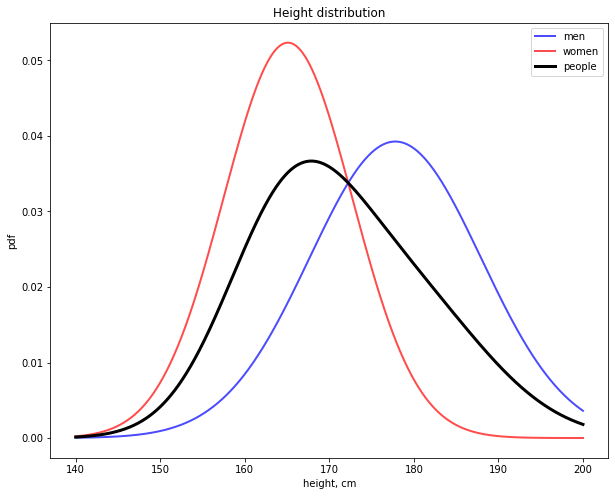

In [ ]:
#@title Distribution of men/women/people height
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

x = np.linspace(140, 200, 1001)
sig1 = 10.16
mu1 = 177.8
sig2 = 7.62
mu2 = 165.1
P_norm1 = scipy.stats.norm.pdf(x, mu1, sig1)
P_norm2 = scipy.stats.norm.pdf(x, mu2, sig2)
P_norm3 = 0.5 * (P_norm1 + P_norm2)

fig = plt.figure(figsize=(10, 8))
plt.plot(x, P_norm1, 'b', linewidth=2.0, label = "men", alpha=0.7)
plt.plot(x, P_norm2, 'r', linewidth=2.0, label = "women", alpha=0.7)
plt.plot(x, P_norm3, 'k', linewidth=3.0, label = "people")

plt.title('Height distribution')
plt.xlabel('height, cm')
plt.ylabel('pdf')
plt.legend()
plt.show()

###Example of Gaussian mixture (image segmentation based on prevalent color)

Here is an example of Gaussian Mixture in image segmentation with histogram that is a mixture of Gaussians.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_14_gaussian_mixture_models/image_segmentation_prevalent_color.gif) 

[Source](https://en.wikipedia.org/wiki/Mixture_model#/media/File:Movie.gif)


###Interactive 1D Gaussian mixture

In [2]:
#@title Bandwidth and kernel in KDE
import IPython
from google.colab import output


main_str = '''
<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 

  <script type="application/javascript">
    var xs = [];
    var ys = [];
    var x_min = -5.0;
    var y_min =  0.0;
    var x_max = +5.0;
    var y_max = +0.8;
    for (var x = x_min; x <= x_max; x += 0.01)
      xs.push(x);
    for (var y = y_min; y <= y_max; y += 0.1)
      ys.push(y);
    var colors = ['blue', 'green', 'red'];
    var coefs = [1.0/3.0, 1.0/3.0, 1.0/3.0];
    var rand_pts = [];

   function random_point(mu, sigma) {
     var z = Math.sqrt(-2.0 * Math.log(Math.random())) * Math.cos(2.0 * Math.PI * Math.random());
     return z * sigma + mu;
   }

    function loss_function_2d() {
      var canvas = document.getElementById("paint");
      var w = canvas.width;
      var h = canvas.height;

      //var size = adjust_canvas();
      //var w = size[0];
      //var h = size[1];

      mu = [];
      sigma = [];
      C = Math.sqrt(2 * Math.PI);
      for (var i = 0; i < pts.length; ++i) {
          var x = pts[i][0] / w * (x_max - x_min) + x_min;
        var y = (1.0 - pts[i][1] / h) * (y_max - y_min) + y_min;
          mu.push(x);
          sigma.push(1.0 / (y * C));
      }

      data = [];
      for (var trace_idx = 0; trace_idx < pts.length; ++trace_idx) {
          var trace = [];
          for (var i = 0; i < xs.length; ++i) {
              var delta = (xs[i] - mu[trace_idx]) / sigma[trace_idx]; 
              trace.push(Math.exp(-delta*delta / 2.0) / sigma[trace_idx] / C);
          }
          data.push({
            x: xs,
            y: trace,
            showscale: false, 
            opacity: coefs[trace_idx], 
            type: 'scatter',
            mode: 'line',
            name: 'gaussian ' + trace_idx,
            line: {
              width: 2,
              color: colors[trace_idx]
            },
          });
      }

      var sum_trace = [];
      for (var i = 0; i < xs.length; ++i) {
          var sum = 0.0;
          for (var trace_idx = 0; trace_idx < pts.length; ++trace_idx) {
              var delta = (xs[i] - mu[trace_idx]) / sigma[trace_idx]; 
              sum += coefs[trace_idx] * Math.exp(-delta*delta / 2.0) / sigma[trace_idx] / C;
          }
          sum_trace.push(sum);
      }
      data.push({
            x: xs,
            y: sum_trace,
            showscale: false, 
            opacity: coefs[trace_idx], 
            type: 'scatter',
            mode: 'line',
            name: 'sum',
            line: {
              width: 2,
              color: 'black'
            },
          });

      var N_points = 200;
      rand_pts = [];
      var ys = [];
      for (var i = 0; i < N_points; ++i) {
        active_gaussian = 0;
        var rnd = Math.random();
        if (rnd > coefs[0])
            active_gaussian = 1;
        if (rnd > coefs[0] + coefs[1])
            active_gaussian = 2;
        //active_gaussian = Math.floor(Math.random() * Math.floor(3));
        rand_pts.push(random_point(mu[active_gaussian], sigma[active_gaussian]));
        ys.push(0.0);
      }
      data.push({
            x: rand_pts,
            y: ys,
            showscale: false, 
            opacity: 1.0, 
            type: 'scatter',
            mode: 'markers',
            name: 'random datapoints',
            marker: {
              symbol: 'line-ns',
              size: 20,
              line :{
                width: 1,
                color: 'black'
              }
            }
          });

      var cell_for_plot = document.getElementById("for_right_plot");
      var layout = {
          //title: 'Error Function',
          xaxis: {'range': [x_min, x_max], 'domain': [0.0, 1.0], 'fixedrange': true},
          yaxis: {'range': [y_min, y_max], 'domain': [0.0, 1.0], 'fixedrange': true},
          width: 800,
          height: 500,
          autosize: false,
          showlegend: true,
          margin: {
            l: 50,
            r: 50,
            b: 50,
            t: 50
          }
        };
      Plotly.newPlot(cell_for_plot, data, layout);
    }

    var pts = [[100, 300], [300, 300], [500, 300]];
    var active_idx = -1;

    function mdown_handle(event) {
      //console.log('down');
      event.stopPropagation();
      x = event.offsetX;
      y = event.offsetY;
      for (var i = 0; i < pts.length; ++i)
        if ((x - pts[i][0])*(x - pts[i][0]) + (y - pts[i][1])*(y - pts[i][1]) < 500)
            active_idx = i;
      //console.log('ACTIVE', active_idx);
    }

    function mmove_handle(event) {
      event.stopPropagation();
      //console.log('move');
      if (active_idx < 0)
          return;
      pts[active_idx] = [event.offsetX, event.offsetY];
      loss_function_2d();
    }

    function mup_handle(event) {
      active_idx = -1;
    }

    async function call_once() {
      //const result = await google.colab.kernel.invokeFunction('notebook.redraw', [coefs, mu, sigma, rand_pts], {});
      //const text = result.data['application/json'];
    }
    var old_state = false;
    function adjust_canvas() {
      var plt_div = document.getElementById('for_right_plot');
      var el = plt_div.getElementsByClassName('xy')[0];
      if (!el)
          return [600, 600];
      var rect = el.getBoundingClientRect();
      var canvas = document.getElementById("paint");
      //console.log(rect);
      canvas.style.cssText = "position:absolute; top:" + parseInt(rect.top)
                          + "px; left: " + parseInt(rect.left)
                          + "px; width:" + parseInt(rect.width)
                          + "px; height:" + parseInt(rect.height)
                          + "px; z-index:1000;";
      canvas.width = rect.width;
      canvas.height = rect.height;
      var ctx = canvas.getContext('2d');
      ctx.clearRect(0, 0, canvas.width, canvas.height);
       
      if ((canvas.offsetParent === null) != old_state)
        call_once();
      old_state = (canvas.offsetParent === null);

      //loss_function_2d();
      return [canvas.width, canvas.height];
    }

    function draw_slider() {
        var canvas = document.getElementById("slider");
        var ctx = canvas.getContext('2d');
        var h = canvas.height;
        var w = canvas.width;
        var cur_start = 0;
        ctx.clearRect(0, 0, canvas.width, canvas.height);
        for (var i = 0; i < pts.length; ++i) {
            ctx.fillStyle = colors[i];
            ctx.fillRect(0, cur_start, w, h*coefs[i]);
            cur_start += h*coefs[i];
        }
        
    }

    var active_coef = -1;
    function mdown(event) {
    //console.log('ddd');
      event.stopPropagation();
      x = event.offsetX;
      y = event.offsetY;
      var canvas = document.getElementById("slider");
      var h = canvas.height;
      var H = 0;
      for (var i = 0; i < coefs.length - 1; ++i) {
        H += coefs[i] * h;
        if (y > H - 10 && y < H +1)
            active_coef = i;
      }
      //console.log(active_coef, coefs);
    }

    function mmove(event) { // for double-slider only
      event.stopPropagation();
      if (active_coef < 0)
        return;
      x = event.offsetX;
      y = event.offsetY;
      var canvas = document.getElementById("slider");
      var h = canvas.height;
      var new_sum = y / h;
      if (active_coef == 0) {
        if (coefs[0] + coefs[1] < new_sum)
            coefs[1] = 0.0;
        else
            coefs[1] = coefs[0] + coefs[1] - new_sum;
        coefs[0] = new_sum;
        coefs[2] = 1.0 - coefs[0] - coefs[1];
      }
      if (active_coef == 1) {
        if (coefs[0] > new_sum)
            coefs[0] = new_sum;
        coefs[1] = new_sum - coefs[0];
        coefs[2] = 1.0 - coefs[0] - coefs[1];
      }
      draw_slider();
      loss_function_2d();
    }

    function mup(event) {
      active_coef = -1;
    }


  </script>
</head>

<body>

<canvas id="paint" width=600 height=600
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)">
</canvas>

<canvas id="slider" width=40 height=250
    onmousedown="mdown(event)"
    onmousemove="mmove(event)"
    onmouseup="mup(event)"
    style="position:absolute;left:700px;top:250px;width:40px;height:250px;z-index:1000;">
</canvas>


<div id="everything" style="height:600px; width:600px;">
  <div id="for_right_plot">
  </div>
</div>




</body>

<script>
function init()
{
  loss_function_2d();
  adjust_canvas();
  loss_function_2d();
  setInterval(adjust_canvas, 1000);
  draw_slider();
}
init();
</script>

</html>
'''


display(IPython.display.HTML(main_str))
#output.register_callback('notebook.redraw', redraw)





##Multivariate Gaussians

Suppose

$$
X \sim \sum_i \pi_i \, \mathcal{N}(\{\boldsymbol{\mu}_i\}, \{\sigma_i\}),
$$

then

$$
p_{\mathcal{N}}(\boldsymbol{x}; \{\Sigma_i \}, \{\boldsymbol{\mu}_i \}, \{\pi_i \})=\sum_i \pi_i \frac{1}{\sqrt{(2 \pi)^n |\Sigma_i| }}e^{-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu}_i)^{\top}\Sigma_i^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_i)},
$$

$$
\sum_i \pi_i=1, \\
0 \leq \pi_i \leq 1.
$$

$Note:$ I won't use boldface notation in the future calculations (for the sake of readability)

$$
\boldsymbol{X} \rightsquigarrow X, \\
\boldsymbol{x} \rightsquigarrow x, \\
\boldsymbol{\mu} \rightsquigarrow \mu.
$$


# GMM via MLE



We aim to estimate all the parameters of the GMM

$$
\theta=\{\color{red}{\pi_k}, \color{red}{\mu_k}, \color{red}{\Sigma_k} \}.
$$

Let's use MLE to do that. Likelihood function given data reads as

$$
p(X|\theta)=\prod_{i=1}^N \sum_{k=1}^K \pi_k \, p_{\mathcal{N}}(x_i | \mu_k, \Sigma_k).
$$

Log-Likelihood reads as

$$
\begin{aligned}
\log p(X|\theta)&=\sum_{i=1}^N \log \left( \sum_{k=1}^K \pi_k \, p_{\mathcal{N}}(x_i | \mu_k, \Sigma_k)\right) ,\\
\theta_{ML}&=\text{argmax}_\theta \log p(X|\theta).
\end{aligned}
$$

Summation $\sum_{k=1}^K$ inside the logarithm: makes ML estimate difficult, no closed form solution. We make simplification: **assume we know the responsibilities** (which we actually not). As we shall see  

$$
\boxed{\text{If we knew } a_{ik} \text{ we can calculate }  \{\theta\}}.
$$


In [ ]:
#@title Iterative calculations

%%html

<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 178.2 144.73" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:xlink="http://www.w3.org/1999/xlink">
 <g transform="translate(-27.551 -24.874)">
  <image x="49.141" y="24.874" width="131.23" height="144.73" preserveAspectRatio="none" xlink:href="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcU FhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgo KCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAIjAfADASIA AhEBAxEB/8QAHAABAAMBAQEBAQAAAAAAAAAAAAUGBwQDAgEI/8QAFAEBAAAAAAAAAAAAAAAAAAAA AP/aAAwDAQACEAMQAAAB1QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAoJfvLPqSbf25Rq4AAAAAAAAAAAAAAAAAAAAAAAAAAMuNE4sogTQ46 NsR1cPbRiydNZmjXAAAAAAAAAAAAAAAAAAAAAAAAAFYpJas0kKwWON/Ow7bT3VU46Lsedlx9aTdz TwAAAAAAAAAAAAAAAAAAAAAHHVi5VKoc5Lw9WH13dP2WqMp3maD9xskQ8b9Vgssb7dRB9F2r5LW3 Puo21/Pl/NERMsAAAAAAAAAAAAAAAAACgF5oVBsJWrLD858effJkHyx0keH593Y5LZR4Yv8AmM95 HFN+vkesF1VolrBVPokOWTmSuTfF9kvxO4t1xw7sNlQ8wAAAAAAAAAAAAAD5Pryq+ZFmi+znPP1+ ec5fT06CO8JuJJ6T+fAif2zxpBR3b4kV5x/sfltqnMTHtFSJbrtTugg/Ke5DjkYeUPeN+JY9YaQj CSnKn0mwMu0w9QAAAAAAAAAADgO/MvmnnfHyPOcsx58pLWuu0w6rJY4s96pcNAMWsd2rBwcHVwkF Ey/yU9K8Zz+vh3HDdqVfzaPoFesIzGnb/HGISVk4iDkZCqkj2eXoS0K+zW/bH9VOsAAAAAAAAA8y JqEDLn3R7NyERbqzdSvSMTpBmd1jbMV26yQAAp9T1zhMx+J+FIGq3iFK12SUkU6dgpo/pAAADi7R mH1ptSKrEy8gcsXD2U5ef2kjT/rH9gAAAAAAAAGY2/Mzp7+WQOSOlPY6qt66YcMVDXkWAAAAAAKN 52LPyJsX76lA87INj9aFZSYAAABz5NsPgUvO7VNFfiuadK1oELFG4OHuAAAAAAHh75MVnQ6/YSv/ ABMQB9S16oZbMw7bqTsmAAAAAADn6BhUtr34Yp3614mfyV45ytWmlcRowAAAInK9qpRQuGweJwTc d7khqmOXctgAAAAAKpmdis5Fe/tyEL2xHMVTRu39PnR+foAAAAAAAAAAAI7PdToZceup2wAAAAxC +SVKIOTlI0efz4G1KPeAAAABDTNLKvNdPmecfb6sTFLr2jErFct/O0AAAAAAAAAAD8/RzUPwiy9W bk6wAAABiG30s5q3IRhz+d1rRz7RhWpFjAAAAzHR8dLJLetYO2TrnwSN/wAmliUu1asoAAAAAAAA AAAj5DxMs6rPYyAskZJgAAADy9RjcnH2Qjo2Klz15ZCnH9CAAAA8MR0WDJTxqtlP32jq8Wr6lqea 4AAAAAAAAAAAAAAAAAAADM7NxVI4/mU8Dorsx5Gj2GgX8AAAo8b6/Bye/VVSXqd8pZbOv66C8AAA AAAAAAAAAAAAAAAAAr+X7dhhJ3uKoJ7TUZ1EtpuZaaAAAZzy9UgfsLLwB0Rf77EnYJ2FLMAAAAAA AAAAAAAAAAAAABjGz4MaPR7xRT68pCKJ3V8w08AAAzGMs1PNBz+1Cdof7xHXbYb0NIAAAAAAAAAA AAAAAAAAAAwbecBL7VL/AJOaTA98SV/+gMc109wAAZV18n6eHheaKXSjW+sF6rs9RzYnz9AAAAAA AAAAAAAAAAAAADAdxxYmIy0RRyXaGrxy7vm+kAAAFQq16zEj7n8wh5dKdLT0ZVaCSt9NuQAAAAAA AAAAAAAAAAAAPIqFWi7WQfLDXQi5OMnyE2HOdGAAAGTaznhzx9grpbI+udpB3zOtBIPV6f7FqAAA AAAAAAAAAAAAAAAhpmllVktCxompKqdhFT0tWzR7B8fYAAArti8jNLBA/pDdcn+l9w6wxZodQuNL NV6K1ZQAAAAAAAAAAAAAAAAcRA1WD1QpdXnpgqVgkKmXGMq+jlvAAAABRYfUsoPCOkvEk7XHU87L 3RrMRWj1ilmtvL1AAAAAAAAAAAAAAAGQWqFJWKlc0J3wn64WutyMCWjUajbgAAAABTLmMctNdniS rHTJkDX7JYCUrMdejONhoHMaQAAAAAAAAAAAAABV5rIDskvLxIe55vaTi5NKo55cntpRYfsAAAAA AIjMtkphR7byexGQuiQJQ7voH83n9AfVHvpR9IqlKNocPcAAAAAAAAAAAI3mzA7LR3QpxQcZaCZj 4awnjVbXUCwax+fQAAAAAAABmVb2/NCuWvw4C9V6LjCCs/REGn+FL0EhvaP9C8Mj0skQAAAAAAAC oltptM9Dw0yGzcu9O5dJIOOmIQ87RS4MuepVW9AAAAAAAAAD4+xhfvsOUHJ2z/4R3bYa4UzusECX 3tzvzLpUZ39PGf8ALxJSwZlzmssEspqzNpEvDPa6bIoMUan45Jxmi/df+Tosn7GFjzuBhzss01Xz w57BAE5Ys8sJS9xjp48PT7AAAAAAAAAAD8/RlVS/oKAKRKU+YJSA5Zo7fLp4Dxgpz9IjRa/WDYo7 KfI0aIsPiRcVe5Eo8vz2o4Y2NrBq1dzHtOuB/NfMqmeKbK9bOaLISc9fwslTk7eU7Uej6AAAAAAA AAAAAAAPyg38YjK6hSyGg/idICx/UmUeWlZMp8rO1siPCbFXWj1IPhtcyUq2xfOQ/Nd4M74W3e5W /eQr52q3JnpL2K3nL2/oAAAAAAAAAAAAAAAAA/Ktahija+czbxuEKc8bHzpC+9oz4vHFR58slchp kk56rfB3e/x6kFAafYzPejTxXZ/7H5+gAAAAAAAAAAAAAAAAAAAAAA5+gcHX6Dxew/P0AAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA AAAAAAAAAAAAAAAAAAAAAAAP/8QALRAAAwEBAAECBwABAwQDAAAAAwQFAgEGABQREhMVMEBQIBAW ISMlNIAiJDH/2gAIAQEAAQUC/wDRkhMCwq0Fsf8Aa8kpmW3jFoGQ8K/QiEXTrf12WwK8WqJM+vIb fw9BinDwx1wOZeH7tt1Crnxt04Xf6vkNhj3REVlOFyns/RzPbAYd3tloEfv18ZOCRxlfxhf5bX9T yCthRUIxCGOcd5DHsiIpKeyXe2jEEOT9VLPx+eWQm1x8YW8g/pM3UFzUbbL54omAssj11tlku9LK kVCIG1mPuGhsjKcuqWAgqr0Nz9uGyXX87e8jwXyKfjdHyjHyYbo/aRz2Sqc+YMv6wQuMLvda2IUl SXOZo6sVAvt+QEDtmQ30YrJfnf8Am7oQSfHnK1QuZNzLGv5TbIlA88lR76pMOVKNQ6i3orOxr4yv xMqewpY7O3lV7aRyGF7KOmu9hltjbLPQKSMA1ri6vy9NNOc3F9zE/fb+c3SEW0oDa/K74NyvIh79 LUVGu/xSlGLNW/8AKV5s7hVdjjKm9y8WY1idRs8H7ug+Z3i5GFRoM8CXq2btNOSigzV+RRj59euc XY0g0JVY/XmNmyFTXuQd9S6Sg1uUG970EXR9yHQ0QZ0lviD4x/eOMyK3Tk/hUPJBAYotnea8WIor 26/qq9Rw8x6Ho5pKaM7UvXA9K5gIggWIxkeUEFlabOqByD+qvs1dlfoN9ovgG/2N32788AfRR7EQ qhBrm2P0mvjiauQkWaFspCTsT2yHGkz9Q97uODMbDm09IUVnsfvFJgI3LjjYPGipKCUv5DuEUG9b cwW3ZDSa5pejQTUkONClzRqsMcxN62WkudmWFbjbWM9/8pUOGBAS43n0v8+D723qciUi1SmTJS9o DLljiWpvJJTmpIt4Iail9kBGborwzdl0aXGXXmYuGhCaVB6ykKqCBV53H7eu8zlulw/en4+9UqLg 0wWSBCQKepPgrBoOu/SmVKy7zKnbCRFJIjfLnmMeQGU20+hkNWfULtbQRYdSQJnkHJSZ0Ro5PWmz 638e60FtgHr3zJwxISrk3MWoLGBtx1Jt34+nl1Wu7WeTHJYSM0kUy1baXXrrvCRjquNcZz0VYyTR YjwyYJn9mg32n6K6ZfM4C7eFthZrXjTuabqTlhwHV/tl54TzUmW5QXXDNBrv12J0+pkzwt9D68c0 H2xhD1w+eTKW8cXJ/pz/AI7vfz/6ZXFpTOeYz/o/HTdyzC0hxpzBxkEHK8vFJLQ8HbsW01ZxAP8A VDt5aHTrcbXy0ueI0EuDC/WeaGks20ZyY46xudfCUS8X7eFZB8JaTbqRaV2ggyomiZ8kKWOeBWkc vqTAznmeczl9IDwW45BzvE9fMkfHdtfMw5vnMreqAerlGPm8esf9H/QX/j/4spLM8e8cz8qlLiCr LAX4a6LuuUqQ3Fq8tsMysPulu+4aEQT0ASh8srfqV3fYJPfcGkqJAzaCO3maOGmB6CxNnykXslLU qLMKLxcdzS37OH9Co/PnKDRU/wAK0kp2vHSGUs30flIAg8ouLsqjMLQC+sC+Zb0YujSP82lQNZbk No68eofX15CuVpy5SbMPKiD0tZZheQ+ZpmIiRmTnPea5+kTeRDM0W+5up1N9XelG5iFDtKtsImft Y5c+YH77QUwiAtfrB2MTOm5/m6qJwGojxQuzWEgsoNvr4+R9d748WnDz9j9Y+H2b8NieTeyOvBRn ZyzCorHleoC4nFENs4SpYKvKhFaQo/pV6JKOpLSMsP1ALknUyrdmZeDevzlMZmKMWxwlQpcd41i6 hMwuX8eGFpFZ+F87dVDa7tz2iUYM/BvTSzSSwiYLj8Jw5Nh9dmTgOJ20fcuyykhkTDrTi/LR2yN+ MVtNfo1qAkgwXhoLQuBK6syQvkQXzfeyHdQf19w8iLIQzPXc06tXig2Nb8lOYvRwzNekYC4tamHi qFnkBXJnrvsfSR1nCfcBYP8AhOEZxUVdTKNQgXw5cp99PKGmJW2BCeeoB9ym0JwP5jlwAQFGqLmJ s+cnPKlPVnUyyd/WaWrVKP3Sel0KSYDuEaAkMevzHFkwSw6CrBF/ICi480n6+8o+7CgawXef+Pea lcHvJMfgqIjoqxM9ReuFwYLDR6YuFodeyyg3WlGAhd/N5ATr1p98Q7LoCUceL5AwIzq+vKy7568Q FzWKIqU8sKcdbX6HfXOfDm8ZJkS4Rf6MBGwE2yLYiEJOo/h8hkZbFHMP2uKIplXPT1qEg3BYUVmu rQGikF+TyN/SKK0sv3CouqpHcY5RG+gBVp2Mv8FRbOf7wJH1DMSlR/XfW40vX11tNU+WAfhuzOqV NqrkXismG13bEuafE3csYmIRvyUt/eLlDXEH+g+9kRcTm76g7YYP5C17eeqmjPrsLkVXx8gf2Pp5 xc8X18ZH4biGX0fFs90Oot2SzYr/AHVY2lbTlVLSzXiTW2J/4rGyjmxz6nxbA3WYyVzLCr8zKi1B XepPis4bHqqARlvFZwhrfr9/54yfCwVy42x45n5Y/wCJkbc6zuWFxVTXIbnj+Uy1yqO89Qmxfffx eRs6+m8lhKGN0lzKEdZH1cxp3RWWhZV+tIg4qhqspA4qr+xQZ465lnRfSmc5V/F5Il0oY+mq+q2D /evK8qcSwaiug18nt4L/ANwQ/CFjX+51ANvcmCxMJccO0p4yVb7VMws5c1nOsxExq0v2Hy/QS8UX 6z3ydXQDePt5bmfiLjhRSnyyDeSNE3JlRF3J0wrROmOnRJFLqVT/AAG39MMHvv3aGszT1sEv96Rv 1Qg+zneKZZGLFfSa0VY2M/sGHkwoCBJwSjyUaKK6Wfx1+jF5Sal06cLTLLAcl8cob2uKIEghU/wH 1zAY+uri39W8HJyzAFUNNd8kp5Gj44cQUaReGsfyPJ1clo5MHG2iaS8iY96Okz1K7WIgxskJ/wC4 I/5+Vk2OPHXxSVmUW1S21+oKJ415Dqgj7WxRVywnEU1jyH+R5Upg83xgIuevJkvZMOeR7Ol2ZlSM b3s7nhmudmf5+Wb11JgBJ7FmcLHqZ/xT400xWZIxZqPvNo78d9w63/Iv57qRA98cXlATrqxfkNFL 9bY2ay9DPi//AEqn+fmXe4CptZxWQPq1bynn16MesDa4TGcv0iOj34h8ezP5GufNmW31H01vVGTF XK6HWmJy3eDqTPF98G//AJ+Q6ySzJbWSoY4vZMdrUVNXx3mD+PmGparU/o78YxzMX+TjA+10qU5r 0gdolj4lm0BDU5Ll9MXyH/PyvPDnUZU5jBNxwXi4dlhsuij+GiDvv1MZxCbCyH+TxIjVaKPgivO4 n3uv4tu1x8j2EnRO3v8APy7nyNgYLNqTHPumq3yp1meIsoeKYDlmip1w3jnc57/J387tNNFCeNgK ynkHlCAdoTDgo8APSrfO/Hn+V3mc1mc/NfXnFn7CYI48+F7mV4yHnGaM/wCmHx3GVqn8nZyAoIC9 zO+2GLW5hjFeof8A71XqYpIgx9IP+Xm5O/MpAGzM8fIQbNzgtBDfQ0t4yUZrNKcvQ4sIUp7+TJcC lpe37dmJXwvQttmp6mmT7Kl9XL5J/n5vznxN2gnhoqeVamMS+xER8keR/KhSPREOc47ttnOvmz/H dY4opmet9OzhBdXxZH6iyfzp9XW1KaZDk3lf+fk4Pqzij/3F6kFU262LlBmdt5GlfmNi6q175Vr5 PpeLH6aV/H8hY7v0zGDk/mRB9Mt90mKux2lBkBiqhJ1pi3/ndxvclVz2k2oFAM3vu/GmIdVYVHyB 8TE/w/5tN1k6ByeN86vn+MXfBCJpurRWBSV7p/B7NyoJ9RLRaiqIsSbXhw8/T/AVEGfIsz1zOWzl osV5y5pvjKQxTHy/brjTZPoxKWuP/wAaucYJ3jxerjsHGNCTldRTxdjHyAa9o/dQ6FCCDK8r8FTX sLw8Hk9lDA2sILJaYaZ4uHZJ1wpMuUUq+cZg+NM5PL/i69vWpdzwfPYas1Ox94psJdgt+QFDtJbZ 6nMZ5jH4PIA/Wk/XaW8e+3B1hDGlSvMCxQ2Me8wfrfeKk87xKa32ci5eHB/Du0NLBnQ+DFYp7UxK onRGwJhpgwy3xeKEyeX43rJLf4S44QYNlmUHQ+35EqIjmCInR5MG+Uj05iEefXDS9eSM9Z9QyF9v /CcZGmuJwrthfWd44HTnlHk5AjmP2FftcGlhJVJk0Mnjc3qCv4vKlibAq/t9/wAnlYDvLX2vvjj4 RqXvl3F8QfCEbmPnI7VInr+F5a1nVAJ19qeRk6slPkdKnPDgyEIfNzPrZH5R5ILDVH8ntgreQX1/ kE3TVamFmq1Qw5P1aHkEQS4PG/rblqywjb9/2b5AImCj/f8AI3yAyCfgKhzKpoVqPv2N21sCQX05 NkJbJqimSI/AQ+iL8nkcr34YLAiZ22u8/uZtXPMOSi1beKKk6ySZruWNh+gnN7Dd+10v3rFXiOWI 5DZbU+M10OODcnIhTRImtMWPtGVJpl50xWPIH8Z+TH5flHL8m0FU7TPv2ps22oUEP2JmfI1V2U4v kI8Lk/8AkEMv6IvFXD6x+48zhNUSbdDihqSj1c+/txpjai7C9XiklYe48JgAVh1w4b8eW4tK/NTQ DQXnzej451xrQjqdIVAb/qgs8FupJYnam2s7xSEba3UQ8R8aMRJRc42BfsvOCSFZ7SeAomNzvkv/ ANXMh8ZrnkzgOT/J3meAMlt6VJ4P7TB8fyTH/wCfoW0t/USsq++tGT7gAMBnbUbO5smAqG7jjILj WuLNgMJgPADUwzJVRZw4p+vRprIenmqBW5xcNL1a25eUkm6jrEwf36wNH396sr2fv3f2GOMrnM85 nP6PlCfAn9mKiBbTe94YKp5BTD1yUsiq/FsofbnD+QD+bOfeJOZ+jmSMqcaVcXe5+p3vOcp1N52r kylKe4m2Ry0vPeZWoVfUQtH7Yu3vuJs7mrdvimJmVdPdRTCkD9LXOa4WexGJ4m7og6Soy36Kzkr1 4y0/n1aE680748wr6B5KbGD8wdbrbD28ICykpTdQOi6B0X6L90KxlSnp69vtPAB4c0nQLN6gH42L LIQyMNrpnGdIcpU+84Jsx9+LzyrC/U3nm87R+2M116AlnbLRwRLAl2LltJpMN0W8tAYp1OeQUFfU Sd7cdoxArzlO5a8iV5mg229JyO1ngcXJu+jJguPwlKMXH7aqvqfZWe5XpUEij+ngH0RfPQpre7+5 UWAeLJ5AECqZ2Zo1PdeWdyxyiwOfMQH1zCqwlRb18us8+H6raw21zifkDnXBMLPbnqMbxOoDjlEm w2YM6vfKrUeL2vFWjU1REDVwMrBuuCYzloCKnBSYc/G9UpmQaVfdW3nyNr6X+4TByv5CPZdeTDJ6 15Q5wiz9JhNBqjQetZpi5qTvuRfS+goqflF/gyqtMrESU8gc4bqTOGnq6A5oIiPtkZ/uvHpP1Bsz huMVW4zj3pHOAG/Y7znePyGUm9aFr1LRQY9TllU7Hkc9DCLv23k8zz7SchBVyOfxfXTLUDzCrUNv GepJCX5zWwtq44ukjwCbsvB+UJOzicJxT0yHArOpivyqpCQTItr7m1kelaPeT41CjptNmuyfZWmb BA+PcLqVtZCnVb7WKxkmZOZW9yiKkaiw6Y0U5MZhrAhfJ+5XmBogPGpIZV8d42CfMFrfs9Tdr+TK /Smh3SKY32KjVVdr8lSJbqVeduKwatRCb7uZlpWsof0Btaid5r7el9DBNOaXsHY2Jdfyal7dV/yJ k6vC0a44aP3EllLCLU2emsm/1dmu3XooZ7JApOJLcWj001/tp8vAhno7rYQjBQ1nnw5+73nx41Mc TJvnDvpyl2x8IGf62yMDpZ9Z70LyE4RrCe+rVU9uK1RA8KOtN5N8gm5W9LwXyLLKu1WGXKePX2Gk DgRP1m7UrEvlWimaCnQKosiJzq8dIbiqoQ9wsbGWJ/Gbb2cHYondoWDXMqDNrOrrKi4lh/wTrhPm l46EmPtTCBiGgFCiu99RkP2YDLbNRedKD8azOpJTEFwnsjOvMPHmdT4fxwm1WaGC3iti5HCqunr4 mY9i1VuVBOAZlsiJ5Cmn7KwJFSKhRFJiZPuUilYKruVMoPDlQVk/Xw5zf8TvPj6ow1HOUIdLGEnp +d98i4s38rlM6aWKWgWBKO9/7harDwjtVDTPqbTdJoTc5fkaZ1otNvFnJ6qE/oRFUyyubmYCvFy4 6sxRe000vqJSZ9Jygq9zz4d5z4fyTgEceIU7Hrvj5AmqwHBdkioc7WX3ptdpaeRlkLewXcqrDbAY r3kG2Aq9aNtiXXosijUyj1CoNcz4yjzCCC6OP6ZgiPkKSwNaHjfroh93oQ98+H/sl//EABQRAQAA AAAAAAAAAAAAAAAAAKD/2gAIAQMBAT8BB7//xAAUEQEAAAAAAAAAAAAAAAAAAACg/9oACAECAQE/ AQe//8QASRAAAgEDAgMFBAYHBgMHBQAAAQIDAAQREiETIjEFMkFRYRQjQnEwM1BSgaEkQGKRscHR EBVDcuHwIFPxBiU0Y4CConOSsrPC/9oACAEBAAY/Av8A0Ms0jBVUZOa128gdem323FbWR9+/XxI8 qMjXcMsoXUYG8qkN/LIWC5KL3m9BWmJpI4J4sgTbb5+2M3EqJ8zTcK4Tl89qW27PfLt3nT+Ao3Vz cqt0ullLN0Pkaa5uopRespQwIdQYedSca4htpNuYJq0j7oNDDmC7RtMTsOvzp+zrwkkd3Jzg+X2t 7FY5VuhYdSfIUG7Wnka4Izwk6/vqLgSukb9/WPq/601zaTyRzoeRDuc/Ko4iI47qXZUIzw1HxN61 cR65J7+bm1Y8fCuLey+0T6TsFDKp8KWeO8i6FpNscOrj2ltU6LkHPX1+1ZEgmX2rpj7tR3kt779j q5N2Bq57RuGZ3+H1860tlJ0LYdR1G2M1BMx/Trg4hjx3f2qdVVjeSRnD/EfXNC6vbgmWUe7Gdzt6 14Z9aSW3tUiVzolMa5/91WbzImJV4etT39vtMxPLlh10jOKFv2UHC+Y7zU6y9me0OT1k+E/jUokd Xm17hN8n0qGFUa14aYKZI/KllvI20u/uoP8AmN6+lC/7RuF4oTSVxhVHpUd52pCJI5kxFgDlGfKn e4KNbOONGBg7eX4daOY/dbEoKuUspSYpOhI3rsi5C8PMuMeH2eWchVHUmtPEZvVVorZIS333qS6e /wBIJwqkbn5U11hVhHxO2M0sUlrwuO/158RTrC87X2hVVimrbHl4VGiR2a3I94skex017fO3tV7L 3C/hUN/f3JK6tax/76VHCp0QcQF3ZakIlE0hOF0dxE8qXU2BDJnPXCtsf5USoK7AYxjG1PiJZMYY yYO1RqLpoljy41b4PpUfDkiCj4jpGv8AfXs94ODdDbB6H7LMtw4RBWF4zHyCVDZgezps+k/vyae2 s41ubmT6yZhqOfSvZeBHERsx0c5rVNJLx88iAbUiNbRcZ11A8TLY9BWqYXUqxxgMQfi/GpnhQc4K jXuRUSJxuOO8S3LjyAprrtOXwwFJ0gCo+zOzuHHCwwrqdR0+dNbpzTyyc3yU9aLNyINizVpByZIO JgeH+8VxHeGISjVHxJOooXSWJWdco+ZMrjzxS8dIYYG/xIYVNGSCOKbEmHkEe58q9+8cD6uXJ5kP 3T6etaUvGcDbzB/fRj7QxFIPiHQ1iCdGPl0+xsyuqDzY4pIOzAJ5T4jcVntJ2HDG0enG9RXcw13M q+6QdFFe07rJLnfVpXHlQkKcQLlamkkn4skg1KYxy/7xUHHRRGnTSMZpp4JRHnl682PSlMup0Dh9 HgT60Tb+7gAy746mjxWibUNMYc7+tQC5T9GiUyLgD3r+RrUMrJISSq7AipZCpgVRnSm4H7/Wopnn 9oZc6bfT3W8zQu0a0MxXSUjI1AHzrh3CtPOvew/KvpWki4WL7iy7VLbzW6snejVt8t6mlSz1QoN1 jh6Vra4jSXO8eCa4ZSV3XcN3Tjyx40LmSSAQw+Cx62GfOtNnZztKo+shTTvSQyXEkU2PdiRu/T21 8ohuk8PvfYbQ28JnYbZztmlftBHWMDIRRjap5rmWKN+iqx3ApVtlZo12Rcd6luL9CiAaRy4posRx WsXekI3fyFe2ymeMJyMA3eb0o4dhH4bZNJHBMlzq3yAQy1Jr5Ft1y3LvjNCS1vNMpOW1Dn0+Xoaj FuvD4racN0I9aaKRMaZGLsPi8gPKo0u7jTFGpP4eIFXE0EUq6B550ipfYUinimjVGUg4/Cnu7r9D iHwd4ml4N0ONjeF+o9M9KZJBpdTgireU92YEj8DUPBxjQNQI8fGrqa4kZ44iF0RN3s+vlQW1sTLD ISCshw+cfC1WksUckMe0QkD8Tf8ACtHaLubd9hLH0z60jdiyySP/AIihOU0vEnhtzG3KiqSwoDtm abHSKULsw+dLJ2dePcwDd4nO4FAwSAtjdfEfr7SSMFRdyTU3sFq6wgby+VS3VzKBMDgL449KupZI eLNI2x6bAbVcXl6YWlYnIbHTHgKjktYNaR7RRoMV7ZdQcOP7vl+FcXQq20YJ8FGw61HwcmJub9kV MZ7c3sQA0yR8w/dQntuz4ota7PK/cPyqHiSxTrcY0SFQVporp83Mu6zfAp9aRtYkeBVQEY2PoR5V dzrGgihACr03J6/OjLwmMRUpnyzUvssbnWmhsLnakMeQ/htTQMv1b6pONLzZ+VJLOOYPz61zV1p6 NMZFyMZFRy2S8MWUBxqxuTtig8sULRFNZGMfjtUUvZ5WGOVAxGvu0iRXEl60edQQH3dNZiB4pvL9 oeJqFrq5CRadSIN8VNYXUiiMcwY7Zp7zsuKTRnRxI/i9aCLeNJdIMaWYcn4U1r2hZe/h5eJBsa4t haGDw4nExv8AKjaX0gW4iOnm+L9cJY4A8aWDs+Ua26y4yEUdTUMM17ObYnfinGKezt0Mlvo0MAcY PpXBRY5pzEMNj4vnXt11iaQ8oj67+WKn9ogbc6tu6vpUEtnFiNSVxryWIOD8qlve0W4Sr9XDSxyC 7zw9BUNtXFa5MNrGdTDJ/hSeyyGO3nTich5XIq8LnjC2XEIY7Z9aNvL305W8wR0IqKzurhGjbPN0 z/nH86uMBeMsYOw8V/qKv11APrUgUWV2DHxBpeJNI2nplulBmmfUPHO9Hc83ma91M6fI0wuW40Q8 ZRnB+f4UlxKX1yZ2B2G5FNDDcwtBgqA+eh/Cgl4ivbA/WR74z6fPFNFNhNcnfUefn+VMLbhxSxJq lOrIJzvURsbxdjp0Z0jOOvNUv98DXcu2Nbd2rmHs6ITWuclEbYfjTe1J7I+jWFjbJf8AGisdw+lz kle8D6+dXEvZFq5hkO4xkZpjcw28D6hEe9rzXsd65a1b6uTyrVGysPMH9anHF4PZkPfkHWQ+Qpbj s6Aw2wURLI4yT41NLeXnCdPDzqKSXTFBqw2fH5/OuHZRRs0h53Tw+VY7OtMXGMB3Tu/61qeZdYy0 pO29D2WLQg8cbsfOo/bZnFoDkRnqa7QkMMX6O2nBOfD+tERqXDe/Z2OlUNRS3raeHsuDjGRir27I 1LysGVdQIxg4NPqJK8TUD4nw6D51+n8wSXQF2QAZx86jxjgluZd8eR61MG3gbUFIP7v+BdlGkY2H 9nYaleWaZ9e/XmUfwoKgAUbADw/t54gj+DpsaNxYapmC4KN1PypuJlWypKsM5xt1ppDHmM8gZOmr w3qT2NVlgY4ye6/ypW7Qma2aQcrjx9AahkiTX7zmDvnUKX+7kdLSXYrP3dXzq1u2MFtxOXiRcwGf OoYrk2r2rPgyGLu/hUV3Hjh5w2numkkjOUYZB/V3nmPKv51LdTXDWtuxwkajdxVtYSQBMYYeZ8tq tlurgFse7hVcBFqW5vMSTKcJF50ZO1VRIkU6I9GwPyq3MEHCtY3yxVd2qRoXEkj4UKV6etBLSI6M 99vD5mjNcp+kb7k9BVxFYQyTniMUb4d/OuN2kvFnJ1YJyPx86CqAFGwAox3CA+TeK/Knt7NzIunG mQ7+ex6Vd2cnK6numu0ljiaddWllQb9P6irS2u0BMm6yE746fyqWwvU0pqyrPtjb061pZFAYBkI8 R51IeIqlRnB8f7IpVaN2z3CM4+f9n/Zz/wCs3/7B/wAWJoUb1xUnAnaOPOoR6dW9Pa3UeLyHuh+6 fWnkZSz+S5Yq3h8qillgknjUZVNfSvZoImWRuTg6e6c0r3F2HWMDlxUaQX8lzEqhnjyMgedQWkVz 7RaTYGWXLx0s0Nws1uWwVxtUcyd1xn9VaXGp+6g8zXst3ZanLjLoeg86Jnj1RpAFtlxkZrXFz3Gd RLDp6017ORM7ZjXWM59aSWKOKa5YeO51fyq4ur9A84AMaldseOKktrG14hK5J0YCjzq3S5m4VxNz gfs/1qRHCpy6F0dP31GFaFBIg1M+23lSQRgbdT94+f8AwreWM/AuQMejVLDfKySz/e8T/vNTPOZC qp7l+uTnoam7O7TEntTNy55iM+NRWnaKgRZ91L10/wClNHIMMv8AZLJ4oR+f9lsunlt3Zc/5tx/B voNNxEj46ZHSuL2W2qPZmi9R6U/tB5i55PLbwX8KhuOzoS2F1cROuajguoHt/wDmeT0392JiaLfU 2zLXtvZ90+SOaMfnXEMqXUBwG5NLRmrCb2jXZz9VHQUCpyD4/qbO5wqjJNRptHEDyR+fzq9LxSNc y6eCuNsVcN2hA9xfsutABqA/pUqcXgyPHqkPXY+Hzo2ianjii4SlTjm65P400wmEcgXmcpnPpUvt LOI0GQB/CrmCCFU4SjiHHUGrdLWMC6gbII+7/Soz2nL7Qy76ANKZ+Xj9AYpht4EdVPmKMc/arlTt p0Z2/fVw00a3ysB78nnjxUksd37SkZ2jL5OPOkiCkXUK7f8AmL5fMVAqRR8Fekqr3/nXaUkmBq0h c+JH9k3nx0//ABb6Jbuw5Lod7fHEHkaniHZ5hcfGm2kUlvcS4efOh33/AHVpgnZrecbt0z6VwCXj lhbWskZP76uFt7j38bFTAVB1/Ko0v4oHttscPkdD8qht5eILafuh/wBTks7D6kfWzeGKu2MmufUU TSNyKMkglPaMkQeN1XV18FFXEc1pI3aEz6ulCOZ31yNqlCHP76mv7jPEIwEU4BamE17J7r4W3qe3 hyXQjiOfE4p17MMfElhBk19BvjNceZzcXZz71v5Dw+ke1KrHFcYkUgYCnpj8qiu7ArFIHDMPD501 tpPCnfVExbC1HZoyPJkY8/U1hLyFZfuSZWnhuICiu6tr+QP9aDxOroejKcj6LS/4EdRT8PQyaeVv iiz5GktZ9Olguk75Jb1+ealt4WlhiZsDWPzozxyzcdELmVOnyx1q3u5m9rhn6pJ0z5Vi4i4LR7oq /CKa3um98vdJ6t+osGbMzDCIOpNXQnlMbhsgDct6V7ddmINM2mOIDOT51ccCHXzhTJ9xB1FXos7b iSv/AMw4xinvu0LccMxlBw98VkRqsA2BPRf9a4QyzdWc+NSS9ne9FwuvSN9htRmuMe0znW5/gPl9 KBOOYdHHUVxre+bgL3vT8KKX5jW4j6ZOn8aQWpCTE5V2Perh3NqtwqjvMu//AN1Qf3ddM6SDJhm3 0elBrZ2s71eseMBvmPGkguMwzPsoPRvkfomimUMjbEGrNhIfZMssZIzwiajspQzXD4I4Yzo9TR7N MhHw83UD51bxzSe1WrMMxYxg+hqF3tpYpk7pzkOvrVpfWyaLhT71OlCWBwy/TtJKwVF6k0HGsGd2 xIfLxqeSVeIoXEmfP0qS6tzJ7TJyLC3UGpLe+gLSPz8g5iT51/ectjIkTbMPSpI7O3lkBbTkHcfh Qic4MUYLg/0p7e3YtxXyh3GnfcjyriOOJOQAzt6eXl9PJFJurjBphDFxVOwcUp1HA6aWANJD2nHc YX4lbDfvpporAvL8JwBQu7v9GUdxUGG/E0LHtn3sbfVXHn/Q0sXaLM8XRLnGfwb1pXQ5VhkH6Ewy 5HirDwNXUNxpUqMPrbbH86tJYXklff3jbGlSG35ohrkK7lvWrQ3CCWRF4iI+BtS3F2BbyKCksUi5 BNTQxyL7NOMppbIz9Pb2Sy+52yAds1beyygQ26YbSMr8qM93mOxRNYiU7v6mmndF1QHSmo50L1qO dXHCB0lvDpiuNxh7OAdXiD65q7kG2ttI+X+zRijPFgeT3Z7xDeH409xfScS5cY650j9T0uoYeRFe 6ijT/KuP7GimUMjdRTWF1GbtJB7lid29D6ipezJySnehJ+ie4hytyq/D8fpSS7LLByBR3Tn7/wCN TTIscqTL0iPdqa9tmjWaMZSJuumrqe8hlNpcbM2nIz41wIZwk/wlhg5qS2u//E250t6jz+l919bI dKnyqGK4V0wOJKwO4FXDWsHC5gDn4tx51DZWUuri/WsvwJVrYWkzI0/LKSeo8KW1tLdi4wzzFugr hRkkfyprZ7UpEv1en41/GhcvCywxKdLFs85/0z+sFM4bqjfdNQ38Y03No2JF8t6jkX41DfRIsBxD cnYdADnpSqYRwUXVw2GNvHA61Pb9nRLKsmccTYgU9nf2mbd8jiIfOvZ4sR3idOIuhiatbuR+IJ+S RT4fSwW1vzRQd8/xpbxw3s8icKXHw+RqOaTUtkh5U/5vr8q7QWdlWRZidhuR4Yp78lbePqhfyFS2 50M/d4q+VJJdGJWdO83jnqMUYmKyyP3Iwc8x7uMUg26eH6zeRMx9nli4ki+HlUQ66SR+f0TDHvk5 o2xuDTXLlpJg3DTW3KM0O04XXUT7yM+PypbaxglYndtvyq3lkkEAVdMqs2D6Yr2WEF7WVcoX3wfS ikramiOn1x9HcNb54unbFC5SPWzzYbzIqaSXlOQ/BHwqKSK0g/TMYEYHKPX5VbzXkol99mbI236+ tXpLBgRqj8gB5U9xOusI2lVxtn1qZbhCoA5dwPlg17S2JHk6ZHd/WOuKaWU4Ra/vCdTmfaGPPRAN yat/2gW/P6OWK3AT2hjw9IHQnbHlUNvLOzOo16g2o7/61NZ366raXo4qaN41MTKRGrirowHNpaSn EbNkbUhiHBjlXSUHTV9GtlbH9Im9caV86U2/M1uRKreZz1rg2weGDHv5P/5FS8Hie8Gk5alsrJpJ nXv78q/5qksJJn4aZXSniajkWHnB1TIeuP8AeKS1jSROMDrbOPD86SFTkJsP1lmcn2G0bGkdZZPK u1pLqPTcJHpVPur4ioVTuhBj6NbyDPtFtzD1FceSVUjiONKDdvHHyq3e+J9maQaf2fSi8mkXI+rx 3qtpmlM/tJK8F9wQaFvcReyXtsuVbPf9KWRvrF5X+f0V3b5Lwy7MP/bT2VzKBa254bGPrJ6VLZMc I2ZImPiPEVIOzo5HjQ80yHA/DzpOFpUr9Z86ubqNlaOIbDTjB86O2Q3Wr0KqZwp2+HOdv1meT7qE 0skn1VuTgfec+NG+iyUkXhzCoSO8g0MPo3jbowwamsJLczHicoXzpBLCvFZufTuI8fzpJ7hnkklG derpUkFvJBcR2p91xV3Pyr2m8tbhFA4TyDdVNJAZBJa3PdYdD5H6F3xnSucVKrbNKxkmbzX7o/Gh ff4TYSZf4NUZ7PT3MWfePyg/Kouz+z4zBKgxNtsvqDUs0NxKZQvP5N51cSxomh8IMnBLVw7gSG+7 nDx4+f41LcXe085yV+6PAfrLxvurDBqaGQgjiZUjxFMkg1KwwRTC2j0auu/0mu4kkjTCkMnhtTy2 9uzxLu+V5WHjUlpazvBbvliB1ApeJ722n+71rtGKK4DszF9J2YdOoq1l5/ZlK7n8/wA/oZGfdQpJ pr7BCwygbeKnqP4UwQm3sfAkc0n+lJYPAZHJ0QsNlf5+VJ2i8+sMdNx4AA+XpUkdvzs/KzLuFBq3 jnlPEYnShqwgjUBwwfJPRfsmwV308ZiNR8On+/xqJGeJG8EZ9/LGBTnsxULMdOgefjUNz2skjRxE HK7gVb8NmwYzq2wamjt8aLQawehYefzpZWGJByt8/oJNHxEKflUyY0Wie7jQfe++fWv7shaNucor t8NW91DOxlgfPPvxCetSyXjtHDHyiFT+ZqGyjY+zyOraDvRjLKnjrC7Ljp8qZL9jJPGmpTnP2SZW OloOYf0p3eASy4BUnw3pO0bU4Jfm9Gpo4rbGV0s53FQ9oW8ublMPqU5FXU98hd7qPSJFOy1IBjIk 3+git0GXnkCire0spOEt2Art5EeI+dWtvaqFl1cuDl29TVyO1LkvLbbrqPLjHWmvezbUvABobPLx K30xP6nAQCve2/FHWOVD442Hr41Le3YAdBwRtj7JuFVC5bAAHzFSwW8gigG7vj+dW4Nwzw9NGNga h1RxaNG48K7Rh7OfNinMR/SrC2fljyGmL+nhV/BGMRDcDOfH6C0kU4ZZNqt7aZmubljnUO9F6mpx euzXDj3bP8SU7QAyCJPeMo2FRQlI0iij5yzYwR6U0/Z6DWWJAPTHrT+xrHImCrjybxNSMW1EzHP7 h9kkHoamglbSVbYFNRPht+VSwtBJxgmRxF8fw6Gprdbp41/5Y+Krvs7ganIyZEPw+dWcNo8YuIdi smxP+lXkc4AnlOsY6MPT6Ds63m+q7x9au2dSkEzZjmZdvlUzCFXt1GBJ0JajYiEGVidD+DA+J9aj WePiIVOt9eNJ9Knt3bZ20KQOpBqVGtZ9Y2XI8PMH51AdstliR47/AGU0kjRrbWulG1eIxijbRu3N tgjGfxqdeykEIfvK3QetSS9sRNK7rySA+Ne028r+2JhQviGz/Conv4+FJwuRcY/34/QWNui++Zuv iBSdnRRPqLlGjk6jzNPBJFM1snMksYB28jQnuPdPqzAviV9aOpC5zpWXy+dXDtgzjGM+Aovnkxq1 eFTLbrpSOVseoJzn7KMYTfSDIOoBxU+oRRg8yxjB0ee9SzWjiVH+sX+Iq1gMfDTVqk1N1x4UHsnA bvacdyrRkl7kGNxjLeX0FhKF1NnGnzqS7vYQFlyCowWSpyo/RFHDAYd7zqCC6zLZx7qv3QazMym3 wG1D0q6vDIiRIMBSegpvZr7iQEtJoOeXzNXduBHmNgdSdDn/AKfZUnskjRrMBrwDt6fvozyJIdO+ uTfb5VAf8FufGnp+FGdQkckXQjbPpRN27C6hXJ8nUVa3Lpw7V5tSk+WayOn/AB9lyS/V6yDnzqS0 zxIppRr33PpmmfsueNmbIaGToceVXN5eIsszn3iEePTTXEeWRZH5kT4RV1FLEGlC40Mf5Uy8X2bf OIzhX8tvCrq3hYyJoBkY+D/7J+yr2GFlPFbSSfnRV7sT8TKsyDH4U9nE2sqe/wCnnVvB2vLx4+9F jZc+tGfs+24nCBEvLytUFvAvvJJO5ju+lRpnOlQP+O0Tw3alkld/a5BxOJmo5O0ZHAZCkDP0oyQu 0zo44rZwsnrgeXStYfSwH1eN/lU1xcvpkwWHh86Tj4BPdcHm/wBatuCTw5m4T75z5E+W/wBlSSyr rlZsbdVHnUuEWSPTkAMc/nU893qJm8R4V7RaRt7LbHvevnUU0Li1SM5kx/A0jJyxGQlM/l9Badde 4q07Ollj4U3JxB3seVQq8ayWpIRF9akj4XEjdW4En3M9RUZh0h5RlnxmrSS2CidVy2BjVUUt9E0P E5SunOKt7kW8iWUEgJc/OgR4/ZEs7bhFzjzqKSe8jikKa2VuY5zTxao4X0BlCjnJ8Knl4a62GlWc ZFX/AGeih9S64o26nNWjXJSW3lbmXwBq3XQqrGmvb4voOKvfgPEFTzxnQYlUIHOwPjSf3iZGXG2o 8ur/AHivZAxkWJi85X/4jJ8aa0sdw3Nol+H51/eEkqysCNWBjTUcqRK0bYzk/vplYDh4wR4f6UoP +GxQfL7Ii7Og+uuTgnHdWooIdavsTI3nVvGNLTovORUUcehI7phpfrgmmvDdcS7j5zjy881D7HHh 55dczf8ALq0CMzmBSrvnYj/ePoLpYwS2jwpzadyYcNwTvHJ5/Ko7XCmXT7vT8RPjmiRpmgl/Orua 7BjeY5DdcelcGBkZ5T4HUdPXwqVOIdAXVw/BjXDS8QRyZ2IwQPEZq4sWA1QN3h8Wfsd5G7qjUakl tDshxrG2xNNIZPaUZd1flPjS3k8I0agSopraxhknO3MF2WoraWR4o4DiVtW7Z6DFezwkvFPHnGdw RV1PjdpMAnrj6GZG5LYJxmFZ7MYarbDrqbUhz4elW9g8fAm1cwO4+ead5kUSxR5Dj0FJdcJHuGyV J/dihcWeltXMAOhzQme0klRz3NPdHkQfX+FXNxdDRBOwUsd9BHTfy+x5zK4XKFR86jMdlM+frJFH h4VdPayniOcOp6rk/wDWjE4V3uYtQK8zf5cU9qsn1DEjC99aluvZna1lbA17fjT3l1IXvWccy9F9 BVuqfEus/M/Q293J/wCHlXhsfKriWKBLm2lbie62K/6Vc3N5oJlnA523Hyq47PF4yxhDnPN5bV7D dW2vT9Wy7aqF0ujTnIVWyVrijQoPUZxUyg8nDyMLioV1anjGlt/sbch4bXlAx3nP8tqLIuWxjrVy 9mFitw27eFNayXJwia4zjqP5VaXayFkZsMD4UbaGNZJZccJUXw86h7Pkck69cuUxoA8KCqMKBgD6 G4GjUQuoVH7OqvEYe+G3j86jmtJ+FM6jm6rJ8x41cTXLs8VwrJx1BIBz41Ye9iuYMlhqbOM0DIq7 UI7GXQpY5z4rXDM4jssbqvUmobqwOOHyup8fn+dRyr0dQw+xBDajXdzcqgfD6089/cOh/wDLbpT2 rxM2Y8RTE7mo0YMts7as471TX9tCyxQnXmTPNRaFkSHGcZy2vHj5Cgp+shJXPiBXaLrzDwPpn6Jk bowwai7Mm0yWkh5Cw3wfCrtLO6a3hA7jLkZ/ZpI2k4TRjmXzq49zE0LSaBpTDgfe/fV1Y293+jRn HEK5/AVFdQya0B64/I0EhDh8ZcEdKjs4stKDqcDp/pXAnh4fDA0YOQy+h+w3mmPIvl417RBacVt9 s4yP+lWweN48jKo2cjHnTxX51rHkqvhjwoJq0vqDRKKCPIWlli3UddxU8QjPtTHl2zq9Ku4ZUImd OX50Wl+vl3b0+jhuYBz27avXFWMdxwlj7+QdnOOle1RDREx5wPOibcpPBIunI6xnypxJKnHkk1OG Onbzq551xpyDmpbeUhWJ1Lnx9K5MLNjY+Onx28fCreAhQ5kBJHRV+7jw8PsOCFwSsW5B6GjJEoKP /hxrhjioBxpRLnMW+/41NdSXDrOBqGk5qeWRv0l1Y6pRkEDy9at5YgvGTVnCBid6EkcbbPhgnNmr BIBmd9z/AJfpZbSWMG1uBqAPgfTypCL7jJE2Fjk3OfLNTJwXSR2B7uw88GoZYxiMx4DfFV1DcnWk HL6Zo3NjyaN2TPh51HJNMWdm2Lb7eVTXDsZ3cYOvepULutr4q3MF+VLJGwZG6EfYEVratiec4yOq isxqDMOUsy6yPP8AKp5uzPZ9aHBPrUTleVPDz3oJaqXyhXhqmOaooxNwl4xU4XPWriwmeReA+zxn z8KilicSLnUhP869quDxLqYaix8B5fSiWHaeIbftelSi/QlFl4uvGyt61FYwvrh0EyEfFTN2fdtb r10tzJ/pU15y3EMuDJwtsetNb2cc2W7509F8aeBF4sGeUPymo5CeHOfDqqU3FdpZJh7xiM5XNTWd y4EBbrnZT+vhIk4tw3Ko8AfWjPfXWLlsMc7+nQUhnnlDJt7w90Zx0q0tbR0b2lgzY8D0qKKNU520 B8ZOfOhJNp4rLIBgcx8KgeLRLxZGJBGcbVfT8IyzSYyE8BUUaR6EX/4+ZNKo6AY+mPEXEMu6k9Bm rlUAtZbXnWWHyPnR0XsD28gzxGHDb5VGszGJwunn7p/GrxMhWaXKgHGQKk4mlJ0UsjH0pIL3Vkco YDqKkGjhYOlN8Z8sVM8xeSSY4lfT089vGpY5cm1iHLIx7vp+uyTy91R++hcvKtums6fMsTvsK4F4 5eJUMhIGrb/rSWw1PPctqwpr2l+Qq2MfEPWmaQQrwY+9nm0mrQSImjRk5FT8bKxQzcTOMg+ldoTR R8MSxaI19agGkB2XU3r9Pw5h/lbxWpTHPi7ilwY/DTnqw8qinlt1azSTGmPddv5U2ueAwg+6jTw9 Kjk4cMHvSrlPAZ26bVFY+0maOXZCfKgW54z0dawXXURzJM2N/wBk0UtXCatifL5etLZcMtFipmu5 QlmrEAN1B9KWWBw6N0I/WtUp3OyoOrH0oarfTGp16A2WqG+hlkXUO6TTuLxuLIVPC+Ve032I8rhP JT/vNcFJVMjFSqrvtmjAtu6QnZpSOtQPaXUqRrDp0EYDYrtByg4sa4yehBqO5vOjcyx/1/URe2aa p12dP+YtJ/gR8Iq6ttpYGreSa3jJeXGrI6edObUrHxDqDR8yj1ANWsjJBPGquuY8p++td3pjXTzZ Oacw7x6uXPlQd0tWiHXDacfvpOA5II2anjAUWwiIPj8zjwzS3du+7DMkTjlYenyqOeLuuP1gCVi0 h6RoMsaS6ltcAfVp4p45/LrSyWRAIyMHYD5gdaij4ERkZScoeXPypZJdZ1nUzkbYqCEL7rBkZX6Y qzFrgZbn4e4xmp4UfVK3IADn8atBaPFHHw+eQvjHpXsMGRE5Dzvj8qAHQfqUN/FAHwferjY/Okms 4HibfWE5gPwqwEsMhhQ6UZNvHxqVLmcGIx5GtsVKJIwr6NQB3wat3jto2fSAfhPrWkBjCe6WH5Uq QIVhTGnA3pGuYNOe8rHc1oQA6wRj734dM0NC86jUUbxPiKw3uJc40sevyP6rucV7PZQPNIfEbCva e14XAZscXPdNSeykak5TtirhY45WccujYJUt9ImmMLkattvSkSCKCWM5A1Egirq+u5eHI/6MmBkL RhndZUVeJrQ4+VXbwwpztjVjx9Ks+zIn0RQx8Sb5mhFbrhfzP6ngjIq5vLKVOCBnhNUkOBq1mQ/5 fT8aUzJmCVtBJyvNQFjeSGN84jbepIrSBZkzqOo4x+NWMN2kUCOSBg6sGg0D8c52CrvXDkt9dznH XG9e+jydtYHw0YeznTSozxADgHyr2R1AyObHXV4tv18K9iC+0hd0Dd4r4Ctdu4Pmvivz/Unhiilu HTvaBstESXk5k3PBTlNRvCJpolfU8W+n5g+dXGL4u7DZSo5Pl51LDaxoZi2DJ1z8qUdpkJg65OL4 1Mkc6vI40jm61DYn3TRR44rDYN1NPDIhum1l10qR+Jq6vXbhl/dIQMj5fuoRxvNMinkBH8qknusi abwPl+qlW3B2p1unmg39zPHuPxqKeS7F1bBsq4Od6gM9qA6sHSTBq7zE4hc8TkXu/wClBYOIZlYM h040muJFbyy3BAyqj+P51O9tatG45ih2IoxTxoZF25xg17QXzPPhmK93FZt14s7bKlXF7e6eI6Yw Ph23qCS3ikjV8KSuw/CjwphdQg9JhzpvUctzC0cUnSRDxFG3j4/lQAul38wRQeJldD0KnI+iBldU B25jigFPHfbKxb4HnmjwhIDnGGG/5UWEcTWme+F3Hp1o+7Oo9QFxrJpZdC616HFXAnEiTRNhcMd8 VIqBmTf3gTdR8xRumCyzPsiqckCr+5uD+ixHQmo7GoHjiDxw6pJpMHH7PWrGKMAySHUM+VPMukZT CKvTNQ2VupOt9cz46UI4Y1RR5Uu+AfSj+qtDMuUauFIon7P16jt1Hl6Vid7eOUNsr7DTUd/Aybcp SJhz5pgOBINOduop7SCNpNgxdVxgftVHdxzKVkPDlQN09ag9hOqZuQ7YB8qeNiHtzyhu8Fo3N80r 3SjSg8AMVLd3fFAZORGxj8KsuIsyapNUbFRzfMfKpYuG4GnGGGx+7g/nUaXSCIYw+dvHx+dXa3Ee Yo3ZVGP51I3Z5aF1XJUHKt6fP517VmQcXHwjSwHhigJIYY5WfALA6cVi6tsP1BTdW/pWiS2lj8un 40Fs7WWSQnADYFc0MQHlvUcsBtJC3w4Of41Mj3fsk0YxwwmR60pvpGuLTO4Xlz88VxrOGeMY1IxY HNWslxojmifmXTjr5gfKhPGka9Y5uH3ZBjORUiT6Y12+s7pqaK5uY8oBqK/ljzqVY04xkPIG+GuN 2hBJwtWuU+malFtKjErpVFoS+2O50FuU1ADFGW1cQDOAf9ir9LObRBnSOXVzeGKuJY5VnuLfoz90 +FQNfXA1Z5sdAPQedSW0FqYolAIkHR/1nBp7js2NZI36x46U8NzbCCX4TjBHzq3xHr5cS8xBDf02 NXdvrKh0+rY5DCmkQRQyp3dO2r0qCfs/CXKEYGeb/Wn/AO7wEaM7O3X8KgjwCS2t/Pr503AuFEY+ 91HpRt7qMSBDjB6r8jWm5uzDECG05xr386GthcOcYiB1E0uleCz7sCKZHI4WMEk7j19aEMuiRVGp 89M+HyqK5XRHbpzPqPe9c1KyO0gfnVUwFLdB+VWSxmV3DqMDc6fIH1/lULJoVyGEjAemdxXFt7VJ OLy4flCrTRRE6M5JZun41DcwRNpVWjk3xq8vnTpKwRSujmPnXCEvPCoCk/Ea1Qtbx9CwBxID/OoS WI4a6cDx86trQHYdNR/M0UFzn9oLtmpI7iRXjK6eKnwmhZdnyAxY1Syb7VEZjAQ31e3OOv5Uk/EZ cR6wPL/rVs5umtlWHmVO6dqdUhaS4bc6VozXMzxRTHUY16tTDWxU9AfD9c0uMSjuv5U8iPyKMlo3 pbg3pkLjOw/nUkV3xPbFP1OdIx86lu7ZFhEY3WY6g3yPnQNxFIj+AAzU89nK1jbMcMiNkk/yorHJ LPEy5lV/41xRZiDhrkZPM9K6a9fxc+6moZ7aXOTy56g0rXCaZQMBmXScVCbyP2iMcoiG2f60/Fb2 dx1WQ4IpreCXWqsGwwwMDy/KjLcBCwOEVfGld852OnOwNS2UNxw3jPMQO/6UTNJw06aiaRYJVdpc eR2oLDEYMjdx/KuCMyiPmNSpePIFQaRv0PlXDVm6ZwfCkTRFJy6mkI61BH2QBEc41rtzU0FxAguH 7jjpU0l/okl6lg24zWuIgRumuZfGo5o7fhMYg3Ed/wAsedRgtptSo16jzHfoKj7P7NidYzs7t92v cZJI0u5O+PT9fwelGTsaXSjbtCTt+FNH240yXBwEZcaQKmitO0H4eeaMgeHjQse2oY5VUe6dVztX /cDyLqHMD0/DNLdSRFyenQflXBks3a5TZv8ApU94jNaoN3dqsb1jNOdQaV3322p47OGSRmbWzsOn yqK6mVi2cHc8jemK46M3MRkOdzmluItIzuo1b08ZkLSRj/EbpXsk00ykcujpQlQDiA7BX5q4DyO7 J11t3at24pmLHdSMU3AdRqAVY16j0poBCfaF7p07gdd6mnj0cI97iEb4qea/lVTMMIOmkZ6/vqQ3 99L7KjcOLB7/AMq9utezn9mhTSmnz82o3jsiLD3B10nwqWG+uBMLY69OMcSjbRQFIQecKf4mlTiS tca8s0jawFqGCNJIuz4RnJHeopDCsS5+Hx+wtM8SSD9oZrVYe4mHqcGkuO0IeLbg8+DqrUiPHIOg jBDVCJO03haTdIn5mxU98Z2numwMv470bWzsHh4p53cYFBLuSadodgkp5fmB5VC8SRiz6PEq4Pzo y9hXBEsu/s4jzv8AypV7Zu1DAYEanfepuzLZXkxtEx6jNcS5jMkMyb6Phaj2no0XBkHCjbppo21v CY7hzgknuCo5bS4WO4hGppSdm+dQ9o9tT/swjHX1oTQxcO1hb3sijZj8qW27OPEmmOk4HhVtYO8S QSHOseJ8c0hjAM+Fih0nr6VwnWMOFIjHUg1bifU0sgLquPWlzGJHu/eNk4C+XSrmUIr3E3xt4U8i zNDG7ZJJI1GuIx40wPePhWy7kdfsYkIIZfvoKEhk9p0bYBJIFf8AeFiRKDjOS37wakBf2q2bdCo0 lfSv7xgMVosabPq6/Okkvb8XTruY1PKKuFlgRsvgPb9Nq1SMeziUyDnmarZezJT7Sx30tlm+dO3a N4J5o/8ADDcsZ9ae3WJbxo2wJui/M1cNdTCe5ORLlTk/sgeVNd3S8K06hc9ahs+z11c2osw7gowP C6MnlHjPqK/vD2ZfariTSkS7BQaluu0+Ao0cNY9WeX09a9tuccNFLdelSO0c7ROxIjj3aoLWw7Ol giRgQzjpWi7vFMfifE1hAnD26oMn5mjv9lFJkV0PUGv/AA4PzJpm7PvHt0b4a4sbG5z1wN6hRLSK CEd/Wnj5jxpHnge4hEZT3aAkE9TT/o0xdW1Iz8pHofSnuJtXtDn6uMYX8aSJez1RkORvgZqa47TD zTHuxgY/OkjSJrZD8Snwof3LbCK3Rca3GNfqfOh7XpGgbNtilimuVgij7oj86Vb2/wAqnd8TShuK W8W1da028eM9T4n7U0zRq6+TDNZht4kbzC0NSqcdMitRRS3nigHRWA8x/wCpP//EACsQAQACAgIB AwMEAwEBAQAAAAERIQAxQVFhcYGRobHBMEBQ8NHh8RAggP/aAAgBAQABPyH/APDLhQMtBzjQ2ZPB /wDn3/ljO7YHgA83k7iGk+VR/jESApwLj15wFvUA9Xw/zEVq63PtjgQ7T17vGie8pjpO8Rhk9Em3 IW7AroR0xzlrDMpsvuan6eUOU/GPDCifpk+NByA7dR/LEUUTez4MsT60q6n2vyYJvxC8c2erjDgu DxzPTmmZwUIkrWpmV6DhkD2Hah4DcYvHcSALaaWc8WzZDwZ5IkhPvzSfP8rJGkJZezjW5BF10jtf Ke+Tt7INkSXxMemB0pEwTUfdvxhOCJEotTOws9snbKNq8uF/bHmSSXJQL6D4yAQIPRMQOKZ9UDjm tYaZ4tNnp1Xj+TZVTkhdTkZJao/wGULEih9SkY2NQDBm6Y40YxVtmTtI9cEeJRDxdo/nNb2MauFz H5wf1JRPKbdfOcFXqOkCNhwRwyp9IKHWAwOgh172j/zKlfh4Tw/PznP8cQ85RAGL6M2EyU+0BAeh l0rXb5lFe2ODgEk8TvICIUTyLOtxrWEB8JRPudmbyWCsamkxqMfHhOgnkPHeBqghVA/GmQSsJbK1 yR3lz0rpa8n0oyZseqia+pxAchLnVEH/ADENKQyfFionJ6FEEel5+Maz6BkRuvsrDo2VIX8Pj+L5 YIPL0d4nC1gsP1x+qwbIj4PWBycAsjZ5emSB6wZm1s9sWorgc7V/GNspC2pYu94Qj6EJuoUn+skN NYF894+UK6Z9A05Mx4Iehn6Rg5FoORvw0+ctJEcjYAdT+HIul8APXlxLh42MZPy98MQ0A0IBNy6w moWzp6wzil6IfBF6wwrrKpRIrzHMYwXUBbtDr6xzkszwWh7MHZ5++PTl9vi0n0Hf8NwL+CPrkgaW D6RG3FshLk+kcerklP2s+PefOU6TCzwQfbzkfOpLF6kx0b6M2SmePDEEVg0HN41j0wkp5XFbztFn gOw7qcn+GS5XcT9slljDSIte1wdXZwRQUROKK5gHga8zWVh8BDFWpVhis2yzCFo8eTGVgRaIBz9c 1yhR8GrwBLhcxfJrWWIv/hYccY9StlDz598ezziodiEe04jBIqPCXhzOHQCyeKsbwqL8xBwkmM2w lS+A6X1zlo4YPRPP8GgS5CHgO80TJqLUT3G8a83zjP4+MoZ6LrljL9FjSHEY/wA7NuSodt4eMaIm j6p1lGnnUdDrCCUSkYs9MmR4cfBy3zkMsIaS4kcD/YwyyAyT4BGp5kwfYqwH5T58ZHwLqKHuI7wO MPAqw8dc5u/YqGjTgMjju0sdGy6hyNUhou9G3xjF5LcODFIqbKGcNOUFpdZd9/8AMjhRITwGk+SJ lPQRfrkrVgaA16vGdxCLA6H4yCGISfPGQNGzBRM+Ct4TtGuAW2EvGSOhoxqb/Hrl8OFY9r9+ZIJC jJAEyzINpwZPvMbo4dr9sTIFNBImGkpDlCVlXr2xw/KdQnR5txskQIMevlk1lqB4Q5Y5xapiZiSp JbS5xbMxDybW5D0ilWmn/HLuQzIWrSonJ+ygTIdDjm/PGO2jO4JVA/ViMcACgjXdPrjS9JMb8YQJ O5J39sTENsTR8HeKTgYgkoJIhLnyiQe2O8lrCFYp7/u8Y8ZUUIgOe8GCAmiNNt4gxKtZNkbTWFCA JpvFTE4atkSTYWd1m+2TMPN5JNBgCg77MITINMzdLcCZyVHJEaJwHi4csG6j5w1AOHMbkDP0yJwz OEnrz+8FIKVMAYhy61ESHfXvlxR/sPa6+cL5EpAf8T3hFAQuDlIufHjDKzKAhaB2rnvDOTEhATa+ 2SKUTLHZioSAGpkNTX3zUK2R+/XthGGJ7rKh3ly9JBIT9nOEN1sJicTvCUi33tAUG8EQ9Ng9E+3a 8l2DXXSk+g+pm74Ih3xm0niZcfXaJ8MWZBDUnd4w6RXyeuAQcazQ35UpqALFlkJaRhw0PjJFNZDz aUd73lgVFM8GnBS1cZOuMwRbEqQE5eMjKdYtGz1uu8Z0BboLCVl+maPQLxqK166yPWhGeO2vTxkz bEZYhYc5KRKA5RtSO/OAlsqw5QFE4Q/zD9JXDbi+26Wf69mAkvUo/cqBLQYZaxEcQESaYJUXuX7Y KeIiCTh0QaKI39i+LxYWqaQjrjL4wyAKQ9d7waTND1O2Tb6+MXAWtI7az7jrQjrbkP0gvAHfLIyw v4YayHExEZECGYNgV3/3J/5bYbM+Yl3WRlE5zOxctYmiYGhAAdxiHrzeGAXOFF0eufOHQtOGyZfU x4gxqovFAwMcOODFgUTc33v/AMmfw2W/taBWFdUAgBwf+xUpoxf598mAFfgkLDmMDJeWhWPqInWs lqB0IcF2MsnGQlxrzcMoyPRCiHXC7xdr8AlkR9cWXA0V7jhlQxu0SiLuT6Gctk2T3KvUw6QSbbZ0 M8fXCblA6/bx0A0bXAYtBAhiRE+X85IXcAr/ANnvkSEiCQ2+eMZjL38WMGiV1N06nCrHRSwuPbWb S5gxZTUjce2B1G3AwHIBqE8XF4vq6UhNhuouLvI6pdFPHDA4kgIA6ynGpFu5XGjFNh+b/IARHLeQ wl1lEkhkIaTIjID7LuWUAnJlUuCZo6I+ovFEZrjKonhwjjLYTjCHt3zjVgZXHx58f+RnhTwDokXi yr/9vFKJ5Gclb24D4Xz5rNPsIlJU8PbdYGSsMzGYLpM91lVFkSF3F1TxlCfl6AiL9eJvAoKtUGoH mMXbLUp8PXWFJLhUB2hrJNZOrejrTZmgdnx4/ahB0RPL/Z9sRiRhWzQNdX5xQSZROfifOQP6MHES 6Cc0t7fhvwCT59cDJFCK0meg/bJ2i3QXQ+p53lN56AOhyYtrXMgeI3LBXxhpvxG2jnnFAgxKbUL9 VQ3WUimsjtXr/r/5AkM5It5Tx4ZgKw70rJiFbnkeRjFoL2Xdvdjxjc02KQCJeMnIxBtm7N9hyago T/yGWnTxL/B8/wDj51f9PNv7B+gbA7DX0PGsO2KTp5hbPEz64sT5owLQHlfXvHugvalUm5IzrVwe QSK8Y2mawsttN6jDkam8SV7vbF6cQoX03/vECUS71d/2sEoKQMifszHPO4DCItrZWErDVc5E590m pMhNEVNOv6jEUOa4XY4xGqG4pyDnwwRGiA5nFe+sBk1Nov4T4xRL0SFidtGCPZSkqEnfbq81d6iN HT17qHX6Cv13Q4CcOTqeSgZV8I/3vE22SAIXFvwuryenfpH9TdZLoKUylb6TXgxRMDPDLc3k6wzA WaJE18n/AI4PGf0/6/pMRLAiA9G2j29omZ/vszPbzcxvJW4gdl7Nv+cNIEQojaJ4wSwF9TUOOCvX KloueyN6nPMTanrSd/XLGCi7qk3HGv2YfRxzDlrj75M8LoJpHgXI9ZYBh6CNX5ynjzSRKmbAyERg tIWej8OebkEVDqZ59siXmVu5Tv1xoR7zZRwXkFBHwIPViK9CiB4kgf79P1AWFLBSl4mR1MYPKMB3 p58ZxPGW7k1U+METgQhPo/28GuDR9VIyTiUWKEB1y+M09EBPc/Su9uUQnY48bdFtXMal47JiTEOj rUqZO3RkuqAJQ1Ct+mGTIRt/ROQv7Eha5D9HBLhFEeKPvg46c6BzPk/YjRVt+JWGGGWJhG3tk7HJ upmHH+3A/Z2dCzU5a/QiaavtjZACwOkF9eXEjf1S+ZHnhkiURyXx0GPCSbdSz/ecmtJFD4BOB939 Vip13/RlgEmA+7i4ywLbXEuJ05LmMxV16ZMulgMPAuchznxghuXDvCeBNY3BrMO6bmstcUGrR6Pi 4fH6QOX7LNkSFTalpJsnp6nKKEKajhYD3wZob6g48MIiOaXdunEp/Eb3pP15yxDxiT1Pck3iUn1w 9P64x2nhYhapXI/7GcYy2+hUkzkF9sIu0BF8XkXUBBtPVvFTyuAiJwzS8FIQi7Q5Y7IVeTyR1vDy r36albG59camKFvYhw9OiZb/AF7WE9Jy6OIRIfXTjki/ZTjIaBQSImb5Hxl2ObRPMh993g43DtnZ e8IKGwxE+l/65eF4GqNJfqJn5cBmYDSforVbzHG+duNRPSA9oibRyVm2ddxD0aJ175ueOZBXnz9c LxRFVfF19s2jjB4F/wCesiaXSPAn5P1yzWHMjM+Yx1VTIBcwO6PWMVfr2aZOPTJuC3j8jd5GgBPL Z6ZBIwQA+wIxTpGnhb9mILDYhCx2Ye+Gb8lF1M/bd/sRJkQLMc48XdyjF5U7D/waloTIAcAAaufU nGBn0DcHr9x/SLxPpqGwbevjJ/7JRVNKss+ckqyaCqYfWcvAIyipOJ/OCCmCOyYstYw+Sqy/w9Rq u9Z3DeZeL9VNv9lLk1bfKQu+Gvrl31DWYVcozWGn/nSdRhIFVTI7GpmQyOEkYuvwsTrN7XUGFO69 MCWJQSWxOxPeSsh6sg3zoDj9xI8dTY6THyxv5lj5+jmp6F6k/SsW/VsETgkj1jjKrpZHeHIm53e8 CZgY8gv4x5sYnw2/usCoYTiTt1frkAsCsummbwZJP1Cugnj2fhGP8SATIZ/Bk0J81K7nHTneRQ4G lUB7mIFzIRGh/wB4uZ03idFj84f4gzsL/YSYOjZmjASwoth7wjScZ4LH7mIAWpdss67nEnADp1L9 KI6BsOgesR/zILs6ILKLtnYfnEOYy4G7zNBBP0uEf2sgsH1V8srkMUlURu5/bynwZWaKn6/H6dGV py+2QknOI0oHm/u4exFfUQvLy+mKUXWL+XHL6YjKC0aH0tFfXE1tGZG30k4x+MBUvIOQrNtMwlaw 0rw94JigYOq0Px+4NAvIyC3JXFE36iSfCp+c1+0PdP6fsJQQEuFfGRXPPNKrUQfpipbYnUJJ9nL1 HgmzvmMTZeJWJo5wZbm0Q+l6/T8vTFFanjX3wrHfdSn0ROG9tTd/1nrC7F7dHhIjItvTeby5f8Y6 GgrUmnlMJ9dOZF+piGahRy1BwNZCMSnia/cDIVGQ659qR/fvjjpurfAfJmp2bzUV+m8QoqQmXfW/ p1lhSZXTs1KMOtoFRCoz4yhlpqEz9sgV+hEKl3OM+MlzfuuTGAw2qkcn0/So2b0o/CzA+WpmCraN ThJl9LiR7PtnWEl5s5HvGea1h7rkADDCS69lN+cII0aSJ5OcGQIy91U2aP3MZzJkdxWElYe8n6EY fsEPSQP29wx0SP0kI+u//gZJP/veB/SSMoD9QX4WMGUDAbnLU/D5xIBV5ev+5NmgOUp5EZNGv6O9 87yH0XfK8F0/o32lRcwTjRMIGxfaFX4MIFQhz0HZ9sXRQVksUMeT5csV6R3l8wyUM/8AXtjM0huj heAVyg9MNekfwz0um4fYv5/ciXLl4cRx09wGzjWBFURyYC4ubGfn9Rdvo5cCfSnIaFNubVd/Bzkj QET0h70YXSFFJmeOycLotJKtEvD8OGB2RSeLOCIIyP6BUAQeSMNqPeVPNywvuVIqP0xqd6cP1iby M5khRCfAxjNJD1Jj2kwZJtQar179euJebRkLg5JBp/iYvJWBiRg8c+qyeWiA2sKODvnHGoN5KglR d9YWLcE9FFbwDDAS2aP+YJzZyAkR4fbIMEwnTn9DtjnpZXx1qSkvZasbq+CXLrvvJ5BCpQSXxrrI Cgwe4nAVsbVEzF985M4nV6HktHoOFPPIia5eh/idz1Pc0+6sdlN7JJHtreTkT42bJ94cih9YE7gy dA1pK69v85MzSeo8PVfbLokpvRH6H9hwD6YdbwAeelDk+rmpm76AiZydTR3NhHmIyb+CQPO+clIK RCWBl+chExYIKEY0tDjocEnXbJ8fP8SSQtqVIwglVJUmol8/OKHzdABueed44+OAnFS59MCiWb9c yeJPgyZbXsU+Q95cx3AIgX7/AKE+8qb1v6YxcSlPMcJRl2vlFk4Z32ZHNQnFnS5KxV1AJyn74nkJ cUw+7846DrgcynUVPnLi2rcUfj+JGRQQwxkJDtoEkcJ8qzQhZhhF9gdVm2hSaFy9ZFbOqSXI9Mjs WgC5R+UZIk48gz6P0KXJ3UJaPp9cYXmAUWZlROvTDpAbMNw7InD7PMf3oRhoH3pACLjvCMjQEUB4 /wAhgA5pIi0gbuFeMBx59C9+Yg9v4o7kRku8rd84NXcHoH1ZMkzZi59X13ijrNZEqPt4wvGgdWCw bQ43MZ1Goo9/0E756H+nv2xGFFKoX+veaWIFUy/VJzrPjlX5RPisfzkolU4bnp5ypgEE9iecXRps cPXDOBCFKDStteP4qvNETA6eia8ZKWxbCNTu8mXBZSvJ9crnOLeoGQaRCy1Re8b5t8CuHv8AT9Ai SVNwkr65KB9AfEhr84cLkCXdnxFRnuiP8PzD9DCBXJok7faMXkqxM7fHGXtiSI7CNmgjswULg6Cq 4Tb+Ks9HuEC03hyhCDNQWHRPZlmlyUbKR4a9stpppGIHmViIuSPnG1g7IHLqsIklEif/AGZ5FLQp H1zbYXBd1wdeMeaEwPrEmINmag0g6jFI8o66JOZzstlC9OiTD7YAh3SQ4pK6x2VOVN3xIOhNn2P4 oeU8pBtvxeH0+haX6vLmoVVaOzEARSgj8ipT84EnW5kuZjdYFkAwhWjymd53qT3BH/2UDH1VYF5v NRbD+3joGmneweNYElchyeA6S852W72RpGGqWfYS/gTgRCWpl0cCLzUoBZIrMSt4if4pKUPAG0hS L13k1fJU8CbZIeYJ979tfGccWM/pxhNqBHZuSZn5wb09Dm0fP6D2CSKqisekeE0KzbmHIBmlHoU9 E52tKfI8OPMRDLPT4NRjM0qdwsO7zcuoUsPvqcB+e2yAe3+XC1ITuf4grpLzOD3cglF7kQaIit4e qE8GvYmIQqix913k2ursQrOq6yNf0rHUo8k79cDZRIRSz6/b9CkpP6Jv++MgtwOFp1wdgA9AS+IM J6igqatJEv2xAo5wAgzDTZOTU6VWkQcmFqpQr0djjSLLFmSafD84vKyB27H3j2/iCVUZRJbf7xPj IIEXAbUnEwR74+jDnmoH6uXtSaICp4JrJe4Ck7cm8PgljDImZ6OsUu+pAkE9n9AiJ0NvP0ybJD0J R7xL64Ho8xywvqK4e4JZBHfTeTghKQd/h8YrCUCobRpMGV4WRoJD7ZDpG2mKBZr1xVUyvQmnvX8P PTLg6CcZVJN+gHE1XaGIBZtyGxPT98EljNNFe7idEqf/ANMuPkuBR2r+Mbx74GU39fnI2fyJIfn9 GVXgUf8AJ/OIdpxdJh7J98Aws0migNicYopoMMpHt4ckZBRCGkuP94ygIsiOxWGikGSjWkZbMLyQ QiVB4XSfTz/D3pGO1EAHOKh6wEp07iN5xU14Jddz8HIwawJE+xZiy7IIJuXyORMsRkLMku+cgLOp HhMlkpTux/Rk3wdXr+j84/4wlC4I0w6wIj6UG4W5uPbBReS6trbyIG6ZArTjxTVNPXmIwIpFlFIp T65CHA271OJfTPVbUFsHeo/hrxhmV3PCIHrPGenlBW/bN0JXZ7DmbffCIQTXpV2yMt1LDsnmpyWE tKYcUr/uQjstNO3K9vODuCBwfolHo5iUTkw3mZEZXTndR1kf1AowNpXqzU0TsJYWayDS1HnpazEV ioQFJsJIfpiPdGAEtnNYLtZ3J9Jj4zi27qLrzn8MA5Dp6Sf4RwiG9aE+qyMFKmde+198FHvEwaVM o9hGNiYfbG9lDSAzAPXRhdDyoFAJ3T9MiA0VYvf91jrKL5/6n6Uv0yJinAISspa+7N4mkS+HsfTv Lt9Nt8p3PW8NUx0ZVQm+2sCPOeleTNb76oejpvOi8Anm9N175zHK6WPPA9rzYDJDGU8mmfU/g3rA aEq4A7yLzyYhFvZT2xwvAw19Pz4y5Vq4bH1xilNwAdEURhDh/qbwZxJxNVqHY/nBlbiWHF+F+MQp YSfifpl3ZlPBruHB2JNzLFHSTr/WIaYQq4IdL8YjcQoyLvHd2Xg4baGXB5rjN8FMUbEwr+0peD3Z DF3BBOz4Tge+MQXw7HJVF9v8HxYSQGLkvsfTBY+wdYhiGfJzRkSRDazle5hzbjLgqbdq5OoLRxWK fC8i8c04pMwzqLxNBNZlDMf4yaIKS7EL9cD9NBIcIxgt5pXlJg1AwdhXMg5zcaMLaKA1694YmMZA ij1/1m6gwmW5Bj5cNBXgHR6VksiNhfl7ZCO5wI8x9DKN8DkkDQa/E4DJJVIn8AMJBtwtdLO/XDj4 kLRgPAS1xg3vzCImO2HjDhgrhEmTX09sQuHUHaqjeb4CQ1BvorvAWEkBWy8MDjDAvDcYST8srXD9 VmCpHpv3dYfc22wj0FelZLv3ESpBPzgENKrvZwlJlAVaYCR384leI8a8HLofSQ+fHphcIcAmJet+ /OJOVBsszI9sleMow9s47PA6/fujbB4BH1DH2kzxcNYWkFQwdZtbIwRB02Bh1Hcekb0WsYI7Anmb POms2PYq+l6C8ACoEMBfmF+cNE8EjiI9JMheGELhyMOVQhP6xs8lbDv5k98DuNGUTpvmsu9oKQKr q4wZLEiENxpgSkvPtqOJ49Mk5QELSSeSw98OunLDQTm/HrlfJ0sYDCh+ranpJSdzh5RQAquzsj4j 4/eLxtR24Pdy+fCnMHYuOYurTDxgTtRzUpEHk133gbt/RPw1Y84z4aDNbA6qbpx3ilNmb+MkMQpz BD11WQhFCeBNa5cCU1UWm79n9dVeLHZ2Zv8AaQkAe4T6YRhiWWUKRYoxmnx4S0IFx8zgDp1K0gWT 5zZFaSTbnrX0yCW+avfrBihGKNTojmIwfkREqO44mw8dcnK9reT2pPRt12Wyd++Bwqf6KfH7o4xe FnrDKtuZOclDgvj1y8vrIJiKNERkjkIIRC64Pe83xtydQqdV9WLUEDJgZyKX8sh0dYK2gmCUrDzH njAQ0ACoaTU9Yx8lR2cf6YAAKD9hD6WvXQnOKsYR4TB90yvUHdOdd8U5AJ0N5p9iOcmdYQNeuLeP OVwlMIqyecn1FscTKpMNAhCfp23gGpwpSRiJdt5P5tpAWpSSkm9Y15DYRKS5RvrJZrkPDpPZE/ce qdcDrj3xPYZeUJpJmfBg10AbF9gPptwjUKgySeWRKYSQTf8AFGOVzeJMnUaKMUSW4jOx538YYaqY xO39nChvn/fDLnFcokDt1+cEOAg/YxgFO+kHD9RPpiecRcQTBKSeOMkXxnblsSXhfCIY0RHAzNeu TWeVIx45ycDjHSxB73vHoGMJOllzE5AdQB8LpoThwpPE0waGO+nEstk+stIkayDGVMDIvgqhvD0a wVlNFEvjf7WZEO3DkkyRGtT36JHfGQHPghOVEcRUYEOj20cXyU5BkGBl7k5nLtmnQDx35xbAhkHn xlKgdOFY8R9c10QwiBR8mSXQO2as/LGpgqes+rZ84DUtvL2v7NSJCEecfMmQbJ1XU04LkJMQC+7p mm4HlOHn6E4K2gNIglhiPthbR0S/8usbeozOSX0isbNIznueD5yc/wAWcNRvIvylive/E5G6pBAZ k7JwxxReCooChHnEE8CCICDph9sB1Embuhxp/ZUUCczdL3kS6qdA6nSf51hI8HyUToEQuIwqTbFk 6ZGkxOLN5uYdP+5y4uIeUPrWRSTEJnGg8ZTCnrqJbuI84yFvXOpHGKd1TuHjT2yPOxD/ACjCWa2W eXmf2omA5DyYaisvhgwhsqw4L/XIYfnBjxzOLUV4b5D7sQDREB3eMBQtUHb3+jIPXKcC7i3eMWhl RYi4bw3KQCElwGQFqG3PKxvFrJlVyH4jWPrA5boF3GOUDFTEhVpRZtnjCvxMErQijMkYNVVB9dkr NREET3P0kY5BEL1fpgacy2Dtaa49O5xAHGMlPhNeXAzgWLOXY9uMsioRWoa5HB60Okg4fVFsIpru XC9sDsSDgwJwANNBfG78ZsYBWjd7aK9cTYFgjFPIqslj/BCR55C/pkEIRVmbP7xniyQzg9APdc47 xDfl84E2YiLT78YlnL3+1ilT3Hs847NOQOx5ffG0BMr8DX2yQ/FICkodf4wwN8hDw+LxvGyCWc3Z OPPdKEEFMnHVfuLThEI+wHU+coFgXp3njI5nca3EW5ncYzNCWg5QajTvGFKhplDg0W7xwBjupdJM Oh3eGWTUwLvsoRhEwLyPyIcUwLcLWVHyVUO8HCgRgbm9jkbNYpi6529/TJfpJk7AshSNV34yF724 X0XHANWhL5nAjWs49xbTNJ0hjng86vzg/XXRE8fTW8BE5sy1RZ9cKEGrWIYPUI9DCWSo+yA6985A gXC8C+uTy4BqyYJxyKDHoAMPhwIOZn75AlBkRNajjebLqxE+Y3GJArz9mL6mWsNPotsmg5aSXByq 3fC8cp6YnFyi/jHlfgz7317jv/yL/bshEeHD0OiSZ8R9oyf8paRG5Pg8W4WLtIVuwqX2MEwZAEvO 6sjCokQgvQ59cQO08tzJg0qB7uzJXGAmKQHSOmGIBJv5Eff6ZCvUkIefNXrBgHnjAhJ0jZOsEW1F I9qxSNl0T1jnWTAFwSW1TwggyeYnPT3G47kjEtVtJvKbyPaZe4FUsUeOWsBGIKJyDaKKdYAXQ+1g dWvN4GUgbCRce3reStFQhDuKYyW8IMwS+W/GOVNKqRBM7zWSYxFqJ+2H2SqRHfAmWsJelI959ch5 08h/AeMaE7ByBsTg6ZzdCdCTkdnWNe9TAH4xxBCKFMvX1eMl5mmSEF9tPhyo3URwpvx9cSVzYUal 6385Pb6zD56+uLqGkX7+tfX92k4qAWsv/TJ78hAweKaywKjsepf4x/nThTt2PTEMzxg+tht9O8VB WsGTw569K4jjDFZEpZaA84Cr2zE6P9YKThBfKkY1kJMH+dhi1WK+yMIRzKIWp8shUigbwMl2hyAN d7Fg6F80tQYhaN4xD/n7Y4AhGa7HpkPRhcxzUNAIQ2vvR7ZGGKWz58M6vpwK6FeXBEhK83Seaaw/ fBHc/JTl0qTba5vj/GF90BwZbPBnpo4bVHOBWcXBEo8s+MithN4tR7OO0s92U3XDxklpTpn4UYYZ jiR9sKITpz2mrjIMlfL++JgFUjklSQq/qxyrWkPxe8cdV4Mqldnph8/YxXd8mSBx04uL7MhGAZSR xhrzFIvyCs5/ETluovc6wmytHYDoMP8AxmrEiOUZYw3EZPUNHziLDWDULJNwavCjgRYs7MVCyR3p 98VpBZLwSbyOyB3TxkvZM6jMLj+0PBDeALsRjVY+cApFiiqz2i0k5yeHPOxspPJ2XeSVgxEMoz/V 94RIkGgG4XBr5wbNiGE8027wd7o1I+HPc+MLCZmLlaHpvI1cYZ+z7YfvRByPM1mu11nhX2PfCAah 9Rwm5PT+B8CBOHzkFt4j0nx7Y9of9GBWaWD8cYGWDNQXmanOtpdBCoME1aKOX/uE8EJft+i8Q8KX IzR1/wAyGrCcfKEjnkA8Rt/AIPOJMOlYFo3usgq1P4C/36ZGJy2Cee8fzaowWzxz6ZZ1QKY8tdfn A5+4eHU4xwuJdZVAPTfrgv8ARy+E+ftiqUHYRK5eDjINIBbbhMd5Nus722H125EhmqQqLyNWo0BM nl5zc2H7U/vGep5ZAoN4wKkCg9JhOQQEnBx9f4UBCSZvpEgX5OcTeqPDIP4wWjKUXlT9MEB82D95 LuYXa8f75XWUZ7G49jDtkGBDSDnjnIJIr4dC6uPtk37B2fn8D1w+f8gPYGpMtVw8DLFH2w3trJ5F juc7R1DwYz9lHgVmkWAYZX3Ly7oTSQ675zfu1SOU++FhiEivVjvxgxgc9CcgeSKUa9N5Fz6QEl8f fB6wKIaGZLZp9s6AdHWAKnu2f4hM0LRGT273vzj3Qu7Hjd++SovXF9OssJk4E0bLRGFMaBAWDfUY IRJCqP8AojAn69R5O5ytRyVCJjaw95GPCod+gqIxDMwzOqBQ4HRhnS5T7LjKqzzfCB3hGYljfZiM IRxg/JWNULoYXm5m/Ucj+QScCMSc8ZmIzxSBj85uG5gMOEj0gZk981FYBQwAQEGR/wDpH//aAAwD AQACAAMAAAAQ8888888888888888888888888888888888888888888888888888888888888888 88888888888888g88M8888888888888888888888888AQIU88888888888888888888888888MAw oE88888888888888888888888YQEQAEwgQ88888888888888888884QUIMwUwk88Es8Q88888888 8888888kcYsY8QUAYoIEksYk0888888888884csc48ccYs4Isc88YoEgU8888888884EQAIg888Y EIUs888sYQkk8888888888gE84888888gcs08888IcIQ8888888ss8Y8c888888sI0A08888M8g0 888888M0Qg088888888888IU8888wYgc88884owcY88888888888oc088888kU48888scwo08888 8888888ssc8c888U800888UMEk88888888888888888888M0gc888UkM08888888888888888888 8I0Ec888UkEw888888888888888888884IEc888EwE088888888888888888888soog888McYs08 8888888888888888880soU888gU4808888888888888888884kEkc888MAo8w888888888888888 8884Eo00888sg0wk088888888888888884ksA088888QAks8888888888888888804IUk888888w Msgw88888888888888w0osoc888888ss8UIs888888888888k8sQ808888888sMoUokgw8888888 84QgIo0s8888888888wYcYsg0M04w80wEcw8Uck8888888888sQEA4II4wYgUIss8kM888888888 888888MEco48Ags4U0gcIc888888888888888888QI0IUcYAM0cc888888888888888888888McM 8sc8888888888888888888888888888888888888888888888888888888888888888888888888 888888888888888888888888888888888//EABQRAQAAAAAAAAAAAAAAAAAAAKD/2gAIAQMBAT8Q B7//xAAUEQEAAAAAAAAAAAAAAAAAAACg/9oACAECAQE/EAe//8QAKhABAQEAAwACAQQCAwACAwAA AREhADFBUWFxMECBkVChECCx0fGAweH/2gAIAQEAAT8Q/wDwZOFFwO8vo5fT8/4EdP5/5nE+3gPy /wAsc69TGoICV+iw+7xsNIY9UInyJiV5gafpgJ8TxkF1bwsYhQiCsHRFnoXP8wB0IAOzrs9PRyv/ AJNEdjNPviw6gA7YBlep1Sb1gFAGvRVUwn1F3ho5qLgIZBKOhnvHNLjsJBpk3lUBJxaBhAaZMEvl WmcX+cCJUeno+Jnf+W8nmnARDxSvd6k2nSsBFDSkdtsQ4dgqhgPhOwgyXivIFbA6cAHReqBwF449 m91hh6zTh0Jo3Cxw6DXf44mTrwHUi6qAg6q5w0eijgDEBNpgGZTj2Sios0LQsPqv8q6DqazqGCFl 9TOCoTR8/ZBVQAemcVDwcNuyQAgB68CqVNEDB90wRMNpyPhh9UR1Q9EXtGAWrqYoqfC5wZ+ShB0+ qQ2TtuDXJhQTxuJn45GFq6iRVkxmm3JzGIkEUpkMTBMT/Jsx1jA7Qy/i/wB8RtFRYNS9XzR9p1wk 6wlLtQdkVl+/OEQoxwhAMch35yuK2QkkJAS1HtDlvQIZurxQo64Aq8RUWOrgpqQ4VX+yVxEKqrvg hXrtuM42OrNlAigdp7jxFfbNYXVU+BM84FapIHbaMJA+VOkHig0VZ0AAF8FD3OXRH8/45IsCwXar 0cHeyXl+BZX/AF98CKCM+3qr8Wfjk4z9VyGFi0pkepxVzNiJj7K0ztE74zl28EINwV0RPFnHecYg I9jwoKlO7jeVWNrsp6S2z1452kgh3Q2Ko+AJbzSl5jwZQH4FTvviU1VyDaD/AGHnQcK7GEhwmRe2 uztcV1HJL7khWdV++E/bhZF6gFQgGOE5iOJA2ASlTXp3hgGTDpIDX9g++M5Z3cVQ1mAqnzyjNpBH xf7nfjs/xSzvmHiK74B2vo4WSCm/EcEUFLaSD1H4jne8e/4kHQMg29YX1MKB1UBPo51kYcR64men uhf4T+qJMI2WEAaYkH05IVZxSAQECR9ZnLJCxelpjGb7Od645pVkcr4NvdIsidc6EKAUQJ17yYLr MqiMwk8T15GNKyh6HyATvhP15yJ6J3h0Gew3iR77I1BjnSmYF4vYdBkOaBhrYt4nkxwELLsiWEvw 8XXPSQ7S1p0ETnT7YXQ1FaD8zpW+FQLbK0oopiY4bj04Bg9k/POkPYP0+3+wfk64sG57r8F/IH/i 3r/CHm1hSfioOf6SP2PtepgfPgaWQ0QTET7pD8cIKaoRVX0EumZ88tWTJgFlGd7Wia3jFAAUM1aA J3uXlY2ZAwI6iga0B944ID0InZVc7vy8k4kDUVARSESM4PrZEKL2C4+388e8i+GzR24JgCn2kWMd iGFEKUMIevDXQ01URwJmNL3XiF5AOIxVRAxMNfJ+6DIlLIJKdr0Tit57g2gUWga5TeDrAzrYr167 H8YBm8KedglGCiA0OqtyN0BVnQfYLjyyyjdIG2XBQBHdrgiORbVdu6q3PoDmjElWlpL8/Bpy5Fu+ jsK0wVD646vI8VDSKurQpJ3xwnRHZdMVP/Y5y8cLwl3IzeL674xlQZp9F9GC0aZ/g+gkqk7AFnqk 3q80ApYpVr2hdw6wOCMlUQKF8aM1rgKDVD3J6tkD4OivOh/jW4MZVheHdqtGW8qOAmapdyR0G6lT qgYzvpWhqVu+moWapnB3vHlqnSrgqiPXpZm6CiGCNk6wPoOTQb5hbShgk1FZwk/lX6L4yiFVtvEo BxbDNMEFM7vTjBXRpMoCMyq6LvS0FBpjthRKPhV74OAYMVghVIU963gZPGjEgzRR2eJHWeoo6LG6 Lwy2HZm6PCTEsUGk+MG/Dxk7xyRaXKcJ0IZxeA6x6FDBnjo9TkX/ANyJiCXgPRtOOqKmiSLEHQo5 nXEplpSIqxVIj2KJeOfRHWXs2yYWaidcDoSAq0/YewUDucC1UYrBsFxRlbOCmarMCgCWqbgVmCNa OuHRWs6pT7/fseeMAOL8iSuyGJPKp5x5tDhZNTVEp16i8Hh6VuAgMTKHdd5BAyxuhNJKzGDvJmr0 IAwrtwqe8NRrgCOko+1L0YcVrwkyjGLABX8zhOMNgFUAGAApJtOUBj3KMnoMhUlm3iE1Y4ANCjCo 1d++PFIQJGQ6BL0NnExifTwYhQbZCgNNUemE0QBDD3peD4dgaAjtCGs84TkfrEd/N3WakSl4Bjre 4I6f/q83wp7zmH8J7OWg1iMgSHJe2csl1UYL7rCxNu8resu5T1ESkPvgr0foJVshW++96YDDSZKI 1QZO++LvHA4EwlXsTYucAjpFCC6CFhjnXGkudQAsiK6S+cnigApEQsUnry0L7GQrrSy4j3wJvgKs wwUlkwu8UWUfCdgUbK6d80WyLyAlKze1Gp3U8tF4JEQ3s9cYB9dYBvYyPqR+eCII0ek/dvG8aCKq vRwyEK+gDMweXtScRIVLwY0eghmMeXg1wpeQPiCJ+r8q20RVG1lO0RCKl5EGp3XsGwNABwnk1lrW RItBDPjlAwwsADQeimm+8SQ+/UR2dK7Uj0cU5JitGmlpe9QDrteboSSScXf5Qc6oIrXOCkmBRAvf zxvSJMOLUlE3R9YBwB/drfSAQkxpDfTeBuVw6BtEIxR28i/iEXSDEfDtPjiObXBIdp1x6rnKPdkK 91tf54jjlsWdOsT5OUyOKBEHbZyo7/YDT3+XhjJQQn4+OIsHBSG2zQKDNgKQU4AYY4VwOryoYqiO IgXBiLOI0ZemEHjUEN9CocesJL6xiAuBxUw5pAoQp89vQaQXOOJ6IhuhOUyaEJ1hwRxGB5qnaxNP RbkOFRS4736x0cOYbX6hgRbCw/LytxlMqAtYCItU6oGwU2HqUSOaGEOSPIoTFqKeuOSPnNnXChuP 148EpnZQyoTfyfuWSgKqwDmKBlBHMtL5+FtAk3y9TCk7DBklJxd0t4JqFK4AG8Uqeug0732SD4HP P2zyj6Wr081cAB8BYe4lDYzv3zgdgNnSluhABsciWJ0uMO+EFfX2DVd1uNlDC6Ou5o8aEZYU8iYD S7h7wClEwFlY0DD1QPiEEBosmKALAUUrDgtrEC2IREYMJiPJQCd7h5FHam1CcCVIWejAuSuIRxMc UVIKIKiZKCkeFx4oph4+K7MbxCQENb3w4UDv753uQwo/Tx24DUKqO1ivgHn/AB1mgxpNG/BHV7rw 4HzxUAMAAAP+XdoRFKOwhyQMFkW8iG3NumyFYR7wwpXtYbu6raxKfpw41V7HQtg0LeUcFHDQEGxJ vRHtjvG9MBldYxRFrvyvB84xTud1VprPykOEM7cQXxA2+Nw5d2XoKSkEjtjTzgnnUpquYLWp710i lvFjSJQI9WdH4ZthlFH/AL8nz+36DTSvwT2r/wDt6Ob71vJFQr6mTROUKUVEifQtt7ofy7DOIhE3 aZ0rHcnK+sXeghDaqVITqzgvQA95CErXe7PrhhMApooRDAfk+zhGvNwa4hBosegzm6G4ASWADLYF 3p4wZSdrCxlAN72c2N+JyxYXxGA8iwCJGnWA0sW0etNTMjCBEAGAGTgldKAeGsVVPhgImcAsOWdJ AgojJtPSy+XTOpA4WIl84hqQQZXQBDWFsBXlw2j5p6EIUjvg+62hAoKd6Yju8GgRLJACo9g6OZzX DzlaI+ux9t+P+FRQTdUNgVQF62ctgCtz/vnZGC5F+bN3Y0fR5iPNjohnUKLEUr3BEqYtg7oi5iAC XHMOER3SIgnoFqcgmUUYOtCTnZ4HQMhsksD0oF2ga4uy4WPvmCfP451KOEMQqoDVSW5wnSX2hpQZ q9fniOlmgp9HUKG/njeEIG6N/Iafx+1KKAKCYD9BV9LjM2DdnO+BdCn5cHHhMhjLgIKtj+OMVKzu hT4BPDPrgG0nIgFZ0WGsdcMnDiISGqDhP7XhrvEpuwAlKrAtjxb2Xyhex9kAfn2xtEjaKCAES5id jwsjFTtMeg7jCXi5yQqMbfiAo6dRdDbqQGVajqsIMD/qD/5xQiZaJGiIgXjqhlJ0DpASgsjxkQbs oLEEwEwdvAgjFYCysIFBqUjU4t5g0DYego6giSRSfs7v4R9EiPSI8Zc64TsRgtlv1H/gFMHkgSA2 mtgAPR3/ALj7R2nlWLUWdzbwfpLEaVx0BKBh0vOgdoFoJj0ivX24Ev8AoFVkx6EvnnJGKDkaAYEp 7e+B0LVoYTbQOvsnDHzxNJ0exBDQD33yDQoRzUcNYraBm8qiKRqgU6JbSav5Hpg0h0idn7PqqlQJ V/oeMaVZu7UdE8FAqrwrgtqhOyjVUlZL8CnyAa0Q6oDmCH2tU8QSYOy0KJL5yRTks2QmiP0G04LV 1pYBQJExULwlsioCDsOFXG3h5cg0ELQ6Pff1wObfUeyqT8MFZXlMWDdajBQgu2hb+g1ZxqJ+Ebj9 oiKKbBSDlap1CTxoMUvwyTwrbAqjIXBnLpiNd7opCq2ZrnKNZPsYCZQn1DsOaYNsTIQxidJspHiK oMWlnpTw+f8AhZXTEcUd67P6fpUx3G8IAwQFTsLDhqKsoXAmiL9p9jh9F4ltfUDjI3HvJ6QCtkDU fF3X4eCVzrFIZNiFbmBvL9zzXuPDCbRSfXIFx3jV0Fi0AXtOL82DQ7N4VhqNPr9leQDMHSjGFPml YQy3qV6UZQJSd6h2nDsCwmGuhFSbKOIBAG4Q9xmEke+G/KRzU2gWX2gdnHMATqoKFFik728696jF JKC0D6B98iYjDaQHR0N7e3l3UHe8c2BMjlxvFkgBtb3gGUrugY/TGFNZEjXukIdIAeW8gBBKYjF7 0b/YXAKxK4Tbc9F+EOXLitK2fSxO/Bzp5u/TOtzvLwi0TAaRUI/zxR3eGqjERiJ+R/STiQEpdAXT FPhFERRNoKMlDIShiwi40JaGLiBhrpcBj3ODuSFQ6MERs+fXCsAZIrnFprcC04VcNgCQwKTD0fO+ idVQ2rt1fwnkD6MEg7HygfaN8X9idwQrWYdFTWezeCQxnyVCS1VIn55vFeE478ltSaYThFmUt1F0 CHpGnt4NPC70w+6iFPO+VIucR2GCPTvOpwgOLTULsNBIOPRxYH2B1yC0BAfn88Pxo2cREhdESYen lKXuIOlOiIVBix/VDiyNK/LI/Rp+HeO2SVycBJRsH+5LxtJ7pUAYECQIlDNOHSKcviqUbZAkF95A 9iqnxB9RV+nlkpTJYpSjEA69pyfQWnaqg1gjQ6QRYeKEaZYtBWgSoP6LMG9IH7NH0SI6I8QvPUAB 4harBfQRL47y0BqiCU344p80iCEbbgT1mHL9QvP2KO2RCum8EJXYCiAATYFBrzg7QvkCf0E+svM5 Qr29g7E+H9e/LAQH/wA/XGfce+qnbAAGefjuLDVkKoQgAMacWksSBdoNd4hO2cBl1pbw7qfkRN4F uYS1KoRy6HxeLUYmJBNqZUDHbxSZttSgAbZ7UXt4RoYKsQkonpiZeUwFkaRVQGIaVEFfrXQLjMCZ n/vIPkIZlUXV89OnjyjEkPsVsqop3vN5NPbAEoSYD9ry54NGVgwvVq6HQciqOlgmhiATNHJw8A+s 3LsrjYL3ts76VQSUAIAWtYiPW4+qKJ/H6Mz8WcQkehAR7F6YimVNxUhNFMgUv4E7WISJ80Cu/wAm yfpK6EpcTwL2+o8dxgiCoq2o1UUeNLAYHVmCdMEifPFr0wm9SsfJ+T9dNWOEPonqIDo5l5ab0IEX wCxlazjEZnmLnZiTt+N4gQCURhVhpGTCcWufIqqD9k3rL1zC2YamItEP5vzOMxBENeYPiAp1TjyR jghLmmHTF28HcLPVrSlFgh1VfsaxUvp5y/jEUBfuGcGV8AY+x4yWu03nofR/XADrn/iWFKPiOiaP F/qushIkmPQXs5d/7f8AYeCsOvkP6Sd4Wjc9iOI1xUkSeCA0zsOtUTpIvBTZ1hUHOkUT4+NDS9lA YaYLde3xxf23+tFAGGML6lIIiQUzaoTVKCxotkgFsHt7Ql9x9/VPnNGKkonqHX2nLMEedkBSEU2+ nl7GBR1NSmVgxn54O0gUYS0NKNL2JyPDsnCwigAnl7vDXY0kiroCAZPOCaQsaRFa6ZynyAetcyji 7c6zmkYcDwAEUBBPY/uHEnG5tO83H6U95VnxklDOOESenDPgrtBMv9n8fpbQDFMNkrPgwiqeOxNs sADEgaNIKHhxV8mWCegSpS9TnbHoMNK0oyDqTmnLA5V8gFNR1wi8IVokFEBRvk94AJRKP6l+FbZl mPwQPls+eWRrMqDDxq3yk4741dCX/SOyHpeAt6mEnqWDAkrZeE2+tfSodADUFqcdFwoG4DCp1jvr h4rFeJjnhFPz4lHdYY1MHQdjgXgrIQKk8+PqfuVjDuM27Esw+W+I7Hblwxv8/wDn6RzMboCLJGGh pUYo4lXC9qVytdiTt4wiyx38/wAsanelOAoj9UhgTdLc+nJvGfylo3YHMDZwEfC3E8Y2Gmgubw1P Y5NbfGB+I8/TE5LLRVBQbQVPiXgq/TAgZfCQvh7xK+Fq0IRvQnD7HCH7joxVQTp+PtwGiEAqhGgU unQ64THKGmCABFxT73mmXtplfmDHXd4r5KnI0QwF273yWLuVSBRtdLnn7haAo4Xv7/rgR851+AD1 WAHa81WnqRi/BY0x3RAkBACWd/pD+P0xMIzMMUiJIZJ+A88zTkaOKmwvWhXmZhKlgS2IoDR/37UF 1AQTNvb8cBp2+iwvQHerXvk0UlbLgLhKx1Z7+ntExS/gANVXoXKqjgQI3ilj4D44jREGSiO0bt/o LEraDjG+glvZ8HMsq1xTRItAHQWK8oW1phCJpuf648KlxSFEcCtsB+OVnty6OBoClNjM46xZO2zX 3Ev3+4sFJLHs5XittUympRD6F+k1EBbbA69H2vjwIAOjAk17k39PG0fApUQUCU1jCsdk7QA1FACF GVjx1WV1hDCZbaFqcI3MfMdTUlW4fS8c35tE9UJXBiTh8QbiCgrfZKhEJ1xHiXSAH8SK+mn6WyQt 1Bo9h9Dt5QfxB1R6A0mp73xI4BAzMouX7Q5OLgvqiWUYRRFPzLxHlUARdt7EiPUQ85b/AHObEM2R 7ThDg8EKSwNp0TJvfKrKAg1QAR58Tsn7l567nQLH8ziLi91E3wKJPjH54vn+p/oT/T5HNIh5owZ9 A/l9f9ABBEonv/elObd0Kfw8UoUp5Qg9gj53y219PIPqIT+BrOFjKCViAG1Ajrrrl1LaZIObfYQp 9cNMmAMswOGjGpR5SHJ1qQnrpefwfok38myyD8zmDvACCegTDUD8qi/lvz2thPfw4ibSRMFFUA1Q +PyKo4pU9izXBdzeaXCbDNBoBYV4g+8uICSKEeoBxzX09RVdBSitXw4iyWWA0n2IcXMOn7kpPyTB H/3mtR7ikMNeivA10fjER4OkplYIalyv9/qCAAEAEQ3tQBfp4veguETKeek9DvHumUEXV0qiS9+c 2SlinRPlRBiPz0RsxpeglDa9JvAvnpABvbCgf/vhsgURon6EbpjQUo35B5dC9oiBvYwP/OIVsDij YsNPlVPyC/2rVLqGgy2hR94VsfEiEO3FGsB3eSDLUIcGkQ+BXwt76cIsSUhFQO33eerQImpiG9mn X7ufrPkE5DFkdlAr6QZxyyOvAuQYwMV6PABsAoXwULBiGy8Lwy9RoJeO73nwcWZ6YD6LRysrD7Yq r5A2vcL5RAGdcRAR1iBg8ERnlTz9AEsAoaqvXVQP55RyqLKgg2DWAzziW8KpDKxhuBO2R9tQkKiH qp0ZoOjiM0apdETfrPPraU6AlWaeNXp4EGlAl1HKNtxdcSU5EplYL0fv8f4lrNQymCPy7fIcYmRE iRI3ho8z7e/gadAN8VB9/MDzGapAGMDUKvmcVCC0hTP5A/cOOdF9XI0yGkMzB7yUR8eDc/0h+P0G Xjr8I/8ArwIrxMTaz0ifMnJOmrSt2ITVgsDHi6U/zCFTs00t++Ek2QIpSihSSoBe5yhiCMFRNJE+ 3o5jowhSwUH0Fo+cOA8jpD/MHv8A0P8AE9njszA/Cj/HJj8FgEeggwJgu+PD2y04gDY6FZa8ansc VYmtwq3bxdAixoSa6Xsor9sW+s+0H0D/AE6bxmEAI2Ye8X9foIlcj0Sw+J/6OFny1Y9fRKeoAJyA QhKF0oBMfOveLosOSQWUEH+vHjobFKNaqIGitOZUAYGkHwIAt+/lw2siagL4QQhQq68SieRaEVVp Aj8J/ibbl2FEjE0/JvCFqanZ3pH6A93hSwB2DtxgEevHlSOnrNaoQAUWv8cBO2rFWPexWQd65E/y 1C6VG/QfMveyw5N/2mn0fX6DSASIgqLmpOKDvAEUhGlZmuziBZGQ0iED2Mr7wiKVfvDs0bzBsxtr 9CkItLx0a4QGvAB5A8MNufY48sxydKeAaqSOBLwCUTUdgaaQef4oWki6EZGlVTlPicKksVukjcC6 2Z9cAft+2hANVgO4640mVFeAiE6QlCZO5NbudORsCokA7zk/IwohCnWInjT6/QlAlPiGaZ3rk0eE CpqqJ0klidcdadWTKpE7PY3M4MSZIxeO5nowHa6Rsm3KEEw1M9da8FgmmultaKdE3eFW7cBmfDws fnjb3JBBiCkYWayh/ioQCQTIxjhXYvkOU7qd3gdBoh1JnPAgqsOD4QCWPzx/gSEkiUNFGFb1nDGp GiS+ooVL4nG+mjt1JdOnFPC/oHGzkYSmJ3R37zWJI461DQGsneU2uIRUTUECtqv1ZrbJpPfyWD2B 9cl3JgkgIAVLjdgDOZCtdyRnoAV6r/NwulIiIO4AFpTt4r8xi/mi0AO1bv8Aiq9yVF1YbAQwFPNe RDhJGiz3JUe/OIwXUuItAoRS0Pw8HQYYWPwNVaej128yleNBBFV6qvp9Dto4l8RuljL3wbRSFEek f+7zDEVlNHro36+uMS0fAQtK1uEsehFGbGknJewFX3WPArMrLjeJw/Oruc1IrQNbPANEgnc5IC73 M1qCqVyIeiGkakEQgcQUGnzxjeM0o2ohTFv0b/iUqbnWUYS1FaILOuByOo7oBECjAWxI8i4/RjBx sgmfOcZMG+l8RAMN0d3mMRUkw6ZSt9nTOar7iSHPTSQTAIPEXVK+4Kf6/wC8O6Yd7A/xvBGIpoUC xIlfS75wOf3cQM4sy9nzdY4EiwfggoQkFXmqkI8IwAR6g9ddcAxPao9vtx8C+cJAAIJCkDAYa5/P Gcj69RvzgwGMb3/iZFmEZVsFOAMOnp26LzooSoVQwK7A4HQBNA2kdg6GwcHsmilaKjuYJ4RZeNnJ at6gglR7CT44KCig4geGYfg/QfZymnnfmpn28KTWeWhXIIDHELxrKKElIayhaQGm8TNiY3aGEHMX SjunL8WLrdBQ7HsyvvB45YqsOTAU+HvkxMUY4JBAIhx388uKsukpYMhhqOm8ldIMR9UU/pf8RO3d aQO0GYFjLeD3ywLpH6NCdLQ2GIpSBr0IIad6vnAXYtfAbvaoiJDN4QfgyXH3Aq1UM7vNi5ozQCK2 dMjhXVPUS2fCDPP0F38lYgH+t42CUbBXDRgCzocCcPYtFHkm0D8m04iek4tBYZ3o78EKXOlRwKJg Q6w+DkuybKouWLD53rvjB8IcWO0dKR7NOJ6EfZuoKAdwOGXtjQyv4P4B/iHonsoAI4qB04uaYuok ooZnuEUsL1wEICOzC80AWl++Km6ghAE2JWnn08ZLRLBiNEMpJLxEbcsWY1Gz6d63jUR1J7/QQT5X 9BmoFUQIx84c9695lmYuIq7zj4J5OKzBGGgiaPYRCeHPbxSoEF2Z9hH+jirAp1N7Dwzx1ycETDtY LQo7t4O306UqPFRoXzp4NXxoB5fvtETveUMH8uyJQEo/X+H81ji1KX2HMqwi7IuwkYUXbx/qB9YE KkVmWX8Ygh+BFP4B3t49IVXREhL0nQa8uQHlO0HQJXAGeNoyrTw8YgD3HxxdGzVkaOrQs9/QQe+Y +IaxAUgN70ST6cY+DMGEmxFC70zhiQnmqpr8AHDu8NYBokAqVcDwPbvJB0+3AOyx4InAkSgnUdh3 Y8S83eQuDQKaQN4r0Qi3QCFwYuwF/hy17R6sBq2w+PDeWd3fOvLQlie/HNtEcsyHzKLtfp4WjqGv WydQSgo+zkDAZa6CiiNL6G8tWMoLQjlERxWJOHwiRPsI9Adu0J6pc66bAJfjYfQfou/iKagJ0838 B8OMvIAa0JRLH8uPpgUC9cqQ0HthwMeqpArQMWC9TJyaQBfAdBor2adJeD3qbkK0QdyzqK5yAkFk BIEKw0OkOuTt4Tcx6AEVhF4JiCCGIIWIdJIkWM/ws1Y1K1WqxCELXYo7AgMIUCuAV2Zxi4BCwR7C RDA7Tgr9irSHZYkuhF4uPJgCKBlLcNDilvR3YgUBhHrXvHpaRFKhpPC0HzzqlqYRAPoA/R9EnKK4 bQv++JoyuC5PgYWhV65lJULS9mZYiNe+bDLmF6VVInYn4HYJEEAGISwS0b9Lw5AARBTKkzxeLBtG 3/YIz7ezkgxHIexVJop/64Ye3aKutTOpICIxO6w6AMD9x/wm34C9RAaAavkWhGjqTQ0MYtYyZa8E moqnLBEieOD7x7vxnhlSwZDtUeSVR/BoXNOAFLZzwomEBTwBOxUfD3IMjoURg2fx+OX5SulAK/KC /v8AS9BXAgjHxjy2aqsAH5jjnr4zg0a0muyi2WnlnSeLQ1BDRjHUe+DxF7CSvYHYAb8Oq8kjlRZQ cs7TgvJNyYbR0RR/3OW1vSz/ACCwDtKhHjoGJ9Ahd1K9CrJwiYOceQRbqfDv2H+Cv3U0JnrJz49U BRXRBbcBNDCYdBa1bwxcEeiQE7bcXjGrFnwKZIFHWbyLS4x0iAmnHpheGdSLhwUFFRR8udcQnEi3 Ig6RS4j64c8NAnvxoK92PnnwRgIL9t2v2zz9OeIyUUqJ0BT4ryzit8kemMX7ZjwqRxiHO8zI/wAg jObPN+8VQ0gOApN4ND8DiFBEaB98c+LyYlCdrIfOcV20wGIntqQ+344aBthuAKgoUHSfe9YFsiC6 PqEXgiU6/wAEjGIbc4LvIL1mrHtOz2Q6EAsEcE5VwAFKFTDgXr3jqHnZLKSgHREvvH8qgalfQ18O uLZAB2kNgByGTlocixxjrfR1HWXil97EpAvQA4yA8gAefpuhEcR941jBkEEijAJEzPDkmGkkQEYa Qa2GpzQVMQpEsNxWnu4X9uZiqfCBt8Hd4AAcQ0mg0Ah8y8mMojQMVWiul+XjXhs5mNtip7ZztLCu FATOgHoOCCRY78ICoTpoZE0dbovR/wAAZ9B6XSLek7ARsTWiNobmOBIqu0o2qqIRiJAn+G+15hFs yVH09kr3TLCsIK9ADQErwXPLydVNT3MSZ9Tes4U/eh+QaiG0HvvhO4QsVEvUp139dcDCtpAxTrEv 9dH6qySw/wD4ldvlfnA5wE2iGCpGvYDxD2AfU47QE58TqgmdjgdqagL08+V9WotISLuXlvFDEQq4 YEXoHoj3zvRVMKB60G6/PGMw1GksZM9SETOGL8IAjZhoNTwseOvAJXy4MEShGLAX9+84aWlAjVk3 YlaF2EBsXhQ0lPThONZn0yA5sCbVXu88VM+AIdWxB2NJwwKL26rqTcIGXA4fw3NySCgBKtxQ0nFx qenUDO4jSB5fbWDgtIwQdPn3xvNOUulwKr9fBrxsUpKqBCvrn6qXiXtJDYJ6QW/RxDM4Q2kCISvi w95NptZbDwSKy18eQ1ZeECDens5F3m8xO0qlDPHnAQCOPbLsyfITrgi59LRDaIZQaffO7hJQBWaS hGmJOWNmUpgFIAKlDDhv3jg6ADg9ZJIn71Ge4HvpH7QPq1wePCyoGMQuWrPIQDilwEIIqwpAd43Y ryVaZSpBuIgxlOoeG0FxoRBkaYRo4YnGF9lqKAoQErXiDUVBahXpVX+PjkB3AyY1t0ozGsvFbGCm Q8IJ/wDZwehjgZRXsA+p+usUv2p/+Ao48a31psCUVaO66bxLKsXwUNgYT+Xmf31qUp690TFq8RwK 2GhwjGvLN+Xkb3sGKrCFjMPOw6FKQsDqhdz4WPEhoVAYrQw0obxdmCMVWo0uVD3ycTLLBFAYUncO V+uDGHAoXBqwLBSWi4sTp1YnYeqI4g/uvrXf1nsdN6KXs49nGV7CNMsaI0y8X/hi8GClCJJjhnAY YPn2AFzq9hG+Vo8QJA0Yfkg8BFPwVSmAgy9588ZhYsWBkZ7tRYmbxmNOWB9Io/8AQeJuhHclWgmu y064rAwMHan8OMeSuzhggIAQD4/YPqu2l4+wZ/AfAcdyNOoAJjekD1TiUEfdHUgdRfbGc7ikLNWQ DAehPxmFYekIlAamHv8AlwQkF9piB6vlfjjQuBVQwfUziiFMc04z2QhKUocKowAyYXZg9i8CbwME d+BINIxwFkacQkgigMRSmlFEsKCJKuhtB0ylJ+4xiF66ilB2uixlScJKpYziRQVQGSYBn5CcQhH8 j2hLoTorm2CK0rXtdUvGYxtgCqsNZDZ4HGZAriHC9Ohfd+OHaiAwIIaILPp+Wg4yIOmFClxfFOEQ HuOBCZ0ERjmPI9ThsXQo4EsX6HDUAEeAQP2KHvnXq8LaIOkpw6ekWaE1CfYyk4W/6q7gHbmEFmu3 k1myEUGCRQDtbzSw0jiI4xQT55nPt0chNujo5c4ZZHQCQgGQUzeEPNmiqSqKSOzbeM+mEXlaSiil CtOCgpaguHIzG2LBc5JOX5STQVASKqiAc7UwZcBED08/AQv7VQSoUhVhv5eV5e+4SIM1oiDDeFqV ezDvjKh0H1ECjxUFcIvQRnfzw4uzQBRBFOsbXlj0hqpCdBq9LdrwNzGBNbIac2t4mUClVKyqD+db vDmzuMump6HUX88EsbIDwfQxNJd74RTs/cKeEi9V8c20K++j1P8A50Q/ZrOsPQOInpykNn4/bj5q Dn91OP8ABdwehrx5Ty7I+hBVSR0CQBeUWajsBE8/LPXl1NJlQM6DB0er88NIsfwOGxAY/N6OOQHs ahoGd+uPMrYGrCa158vnAqq5w41XxbTY04RkIInUkIkDzvUHLSaxIN9QSFLHXLGjr4MSwGJoTonJ 7RDBym9VQ+GUUj+yQmIK0L8XCgQqLRAyvJBoUYcMLEfDhf7Do22IAopBVk4jeYIgVQjg8ey8CiWx I0AM8W/LnXGmLeoPamj4vBKtM1oeuBUgAD1x7syromCIsenvODSM7Gh03ThcnvRf1DAMG2gY1mVa cHiX+AEKK+N4HsjUn0T4k46AdaftWuhEohETiIphql6CPUcRN7JyGgfBukm9J2PHvmxCeUV1gBGM nnXKL1MW5A5QD4Z8vGbtPs6n6Uhe+PuRvAa9a1CEe29RuFymauCdD5975RAMjAEgKBqbwX5mkhny R1l+JyJc3WRRGKBsfDirmmU/gQUiKcHaPBUaVZsV6O+dffIniegBGDiQAEO53uchIUHTQE7lgERM EKzRg+2HLbVYoqMRHRP4/SxD18lYUViZ8D8cdBcYswMwKVVepA9SumhRIWIwKm8Mw6gmXG+waAXw M4hIBymEBiFdWfPBKRRgQD18gcg7dWooYFA9Ym+lE7Ui8cgMAkkfjjpBGUCLr+QD8zl7Jy3Vi7GI r8MOHkUo+6JpboNZLxldc9bElGnPfxwCDWhkhhm1wyu3m/MNZYAfEHzB4WlIQ0fY7V6vBckEklMx n8u+OOBZgkl73p/an+lP9JvB2PLobCLQ7i0Dydh5IgwF18xCOG6xA3jZAj3s3dd0m9pOJWAn0EBE RDmbnvIDCb8aw/AA7DvhzmGCgiqhLvwcmDJUs7CVKjnU+OEGSdRq+47JidTZxljCCWAlAUdfJ8ry Ju5kOqwuFQnS5yZwqhVRn1PgJ3x/LRjqXxvAHddPJMIzqWYSDSR244Z/qGS8AA8qjvGCUdOQS6AK VV35hsgQzgYhgiwGUq8Sc0tojOsAl964xLpVA06VBGq59uK3FVagGQYW9vE4nAmM8Ds3+OCpYkEs KkKb5PrhbtBcLAChQXDrgChqd7w6IcpWKIWtciHFnCEGFKDOlTkDjMKBX2j1XVIs6qHgnAveH3QO uP6+/V0+owpCPzy9DwikaOkA7czlhIqAt6xQSLU04aU27AIigQFCFreCFedUBj+ehs5tE+LOZCAu vifHA5BgkgkSkJttnnLEjcCGGdpH5I98R4SWFI3ngwjXZwaFFpFfgZEmFXJvapYxAAVhoJ2cMoWB VC41HVV6esvPSsknn7cQLRCifZwiDfCdwuwdSon90ksorpAEWIgBbZcvrKsgWYPT5ZwDkRo4seGq dRtTpZOi4qVnsi9FM8vNB+VxRD6hOzNpnBgtxlAZANKF63c4f3fFBPJRIw1J1bxVpFah0ASButvF 8Q+rOlMjWx4crQ+mmoFMMEkQ4q+R00glY730zZyXSAWoroG9NdJvLElh0lknYAud8iOIVZRqgaDp 8Dx3c2fgVbPyoD1nLA0YiJm9Na+k3hIROh2Sig3YEMTCbMLYWZQUqhdlIgZIiB0UmiFvbhZpwJEY EQ0u53xWr5IC20Kot7eHF5vRJ0B6qTdeBYNEeGC2SoWYPCkYlVj0EMNQTLeJ1KAlkpI+URJ4+mmv kmSrgDoE6Hq8TmBLLa0wB7F684x6ZLINQINTPns57LIE9i9eLlWHIFAQMCoCndSeONYAduttAKjK Q5Xl2SNIgyCm/ALy10Gll9I/DfrNnlbuBUbcay1N9OUXvxoEQO4Iu2lbgAQJ+6Dtx8WO4/h+X6fy bwqgfc1jVPX1yQZdzk1Io3G0RzkezMgrbGh9HqW402JWR09SYH8ugWZgKpCyfE0DHjJoK49ZwKPZ /H0NTGENUys6zMXMBho8TYwAQFF897zqu/iCIADdM3OX5mIAaJIEe5/HFzTVhaVBKj1KF4wSmns6 ar8NG9HFE760CMP4c/8Ari6BZEDMBAwIEXzOHE8xuwiYxVhAvCUhACqDPn38xecLJDg0oothUvXo cL3iARIN3V+uD3EIGqe7btkU9476JdE6uYs2qH3ygS/IoZJhAPdYtePdc+L/ADBR0Pl84oMBG7GS Ik0nfXFcoV4CG9Ys+Dgd1WO4JdQND5d4YsRhVihorcpF084peKOgwqYwwNbwx7NwI2TISgm3jyKg KQB2EJAbxQIwASzerUDstmnCphwWQ2KDNbXo74g4xdRUMjh34O7zcaG9j++GGiBRHsT44/pNAFWg wHpMTx8NY+qwoOevRm3rkHagS4+cVRi0/iLkNkiQZRFzfm98T+DN4wpYOJfh53a7+HfHNWTb98O6 6lArugN6M6nGtscIpBmtpHT8zkxisOoYvaA+5ejkopnhmCiD3DfnkDzneJETWhNxvDp0TEA71Cg0 Xt3jGI7oyiGH4UeNF8agNAtnQ/LxnWorTpIIRPUc5OpAUL2IZ271eOmANJqB9OQOPeIYgWIqDQ4P CSEe0NAmgBAju2oyw8wtrAgboEd4CQgEPfd4OnfEZb7FIPBCX3svCIdW1dp0fJP4cZeSkgwywGXf 9MKjSBqPlAo12/wBufwGfgRR2AUobw6HoAmgpHQkFk3g3DhMCwjVY8iPA97C5Zo5U9GFfXFDwBGT ppVfuv3x1IA6vZD/APv+AS8Bg1gGviGfxxmBL/JJqv4cfI+NVwxIx1BELNf54a1B4+CFd6q/zwbN ueli0RKX5PEDbLRDcbh6H1gGZzqmO74lAqw1r8XmFJuIAd0tMOM64oiNijACuspfyo4EkIYE0Bae osY8aWyoSEPmAqbDzqPSupMChCryXrzg91W6bRmXU7jaXHOmEhCuCd3w5UpKceSsXK3SjSsBvHT8 nJvJhmxk7K4B1F1gzchLVKFUXIcpWHEPaUFeDSnyuJTUEvpJUf5WcIzGOJTewKFMH55eqSqwQAoR tls3lYQpHRW3t4Z/XDBuj8AeoMr271xGNhwMAQFvsIh88Tq21e1+FL5Znw4yl/ciphiuudhyBuLW D1X+Fb/HG5YgDTE9+p/P+FSiQiJROI+DBX9OH+j98NNQL113J9a4MzN0ujDEzo9/XC2R3hqxQAdX uRvZzFUAiGqh0BRgIGPH+CEsqhALEfkd+bRkR6KQC101YZDjPhEzcoUC1CE9d8DUoskhGkc/Jj3h EzIvjCxdjSZG8AZl/wAwEyCmGH88XwrNSkCF4H1XyBTVVHp3FWXvcAu8GLhRlSrca/xDt5lmAxxo EIsGPeUFaEDwQWoJp3V7OGvGjHDpVbBb6ucy171wKC17MPTzu8sMGhfCr1ZOXiFAA0XpUqq8Y9Kl yMWFkwSCHDjzB0AxIJgSMGZzGJkxAMkOODBXRp/P+IB74B2YOj/8P2acMI8RZJ9ePzyyOxgh+QI+ Iv3wirC06L238OvTiiUCd5RWl3M2mHHOuAqCHpqVjerpOb3heAHZiEKZd5eWYHBMalruFxV3lXVV YkmihDV3+OLUPVegXwHQcX540ZDWmZvAp9Mk4JFEqidAn5R2xeQECL27NFoOzOJUS6Vs0P5Vnhxi qqjSkWq6+V4bBfQXykh+Dj8vt/r01PrrgAn/AJyf48O3AGcDtxDX7EH5BMfvgAm6NfwC8YbtL7iK Y/ZygwShfBFDX++f60NcgmcJCAgBAOACcEsu/f8A+SH/2Q== "/>
  <g id="content" transform="matrix(2.2157 0 0 -2.2157 -334.73 1668.5)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$a_{ik}$\n$\\theta$\n" xml:space="preserve"><g fill="#00f" fill-opacity=".71357"><path d="m235.61 711.04-0.02 0.03-0.01 0.04-0.12 0.18-0.03 0.03-0.04 0.06-0.03 0.02-0.02 0.03-0.06 0.04-0.05 0.05-0.03 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.03 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.08 0.02h-0.04l-0.03 0.01h-0.04l-0.04 0.01h-0.05c-1.16 0-2.4-1.47-2.4-2.92 0-0.93 0.55-1.58 1.33-1.58l0.02 0.21c-0.5 0-0.64 0.55-0.64 0.94 0 0.49 0.32 1.72 0.55 2.17 0.31 0.59 0.76 0.96 1.15 0.96 0.65 0 0.79-0.82 0.79-0.88s-0.02-0.12-0.03-0.17l-0.5-1.94c-0.05-0.18-0.05-0.2-0.2-0.37-0.43-0.55-0.84-0.71-1.12-0.71l-0.02-0.21c0.2 0 0.69 0.03 1.29 0.74 0.08-0.42 0.43-0.74 0.91-0.74 0.35 0 0.58 0.22 0.74 0.54 0.17 0.36 0.3 0.97 0.3 0.99 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.05-0.14-0.18-0.17-0.65-0.35-1.24-0.76-1.24-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.02 0.3 0.13 0.74 0.11 0.41 0.13 0.51 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m239.42 710.14v0.05l-0.01 0.01v0.03l-0.01 0.01v0.01l-0.01 0.01v0.01l-0.03 0.03v0.01l-0.04 0.04h-0.01l-0.01 0.01-0.02 0.01-0.01 0.01h-0.01l-0.02 0.01h-0.03l-0.01 0.01h-0.06c-0.19 0-0.39-0.18-0.39-0.38 0-0.12 0.09-0.27 0.28-0.27 0.2 0 0.39 0.2 0.39 0.39z"/><path d="m238 706.61-0.01-0.02v-0.02l-0.01-0.03-0.02-0.04v-0.01l-0.01-0.02v-0.04l-0.01-0.02v-0.05l-0.01-0.02v-0.03c0-0.32 0.28-0.59 0.67-0.59 0.7 0 1.01 0.96 1.01 1.07 0 0.09-0.1 0.09-0.12 0.09-0.1 0-0.1-0.05-0.13-0.12-0.16-0.56-0.47-0.84-0.74-0.84-0.14 0-0.18 0.09-0.18 0.24 0 0.16 0.05 0.29 0.12 0.45 0.07 0.18 0.14 0.37 0.22 0.55 0.06 0.17 0.31 0.8 0.34 0.88 0.02 0.07 0.05 0.16 0.05 0.23 0 0.32-0.28 0.59-0.67 0.59-0.69 0-1.01-0.95-1.01-1.07 0-0.09 0.09-0.09 0.12-0.09 0.09 0 0.1 0.04 0.12 0.11 0.18 0.6 0.49 0.85 0.75 0.85 0.11 0 0.17-0.05 0.17-0.24 0-0.16-0.04-0.27-0.21-0.7z"/><path d="m242.17 710.41v0.03h0.01v0.04h0.01v0.04c0 0.03-0.02 0.1-0.11 0.1-0.14 0-0.72-0.06-0.89-0.07-0.06-0.01-0.16-0.02-0.16-0.16 0-0.1 0.1-0.1 0.18-0.1 0.34 0 0.34-0.05 0.34-0.1s-0.01-0.1-0.03-0.16l-0.98-3.93c-0.04-0.13-0.04-0.14-0.04-0.16 0-0.1 0.08-0.22 0.24-0.22 0.19 0 0.28 0.14 0.32 0.29 0.02 0.03 0.32 1.25 0.34 1.35 0.5-0.05 0.9-0.21 0.9-0.57 0-0.03 0-0.07-0.02-0.14-0.02-0.1-0.02-0.14-0.02-0.21 0-0.5 0.4-0.72 0.74-0.72 0.67 0 0.89 1.06 0.89 1.07 0 0.09-0.1 0.09-0.12 0.09-0.1 0-0.1-0.04-0.14-0.17-0.08-0.3-0.27-0.79-0.61-0.79-0.19 0-0.25 0.17-0.25 0.36 0 0.12 0 0.13 0.05 0.31 0 0.02 0.03 0.14 0.03 0.22 0 0.62-0.84 0.71-1.13 0.73 0.2 0.13 0.46 0.36 0.58 0.46 0.36 0.34 0.7 0.66 1.1 0.66 0.08 0 0.17-0.02 0.23-0.09-0.3-0.05-0.37-0.28-0.37-0.39 0-0.15 0.12-0.25 0.28-0.25 0.19 0 0.4 0.15 0.4 0.44 0 0.23-0.17 0.49-0.54 0.49-0.4 0-0.76-0.29-1.12-0.61-0.29-0.28-0.52-0.5-0.81-0.62z"/></g><path d="m167.63 711.12v0.07l-0.01 0.06v0.15l-0.01 0.07-0.02 0.16-0.01 0.09-0.01 0.08-0.02 0.08-0.01 0.09-0.02 0.08-0.03 0.09-0.02 0.08-0.03 0.08-0.03 0.09-0.03 0.07-0.08 0.16-0.04 0.07-0.05 0.06-0.05 0.07-0.11 0.11-0.06 0.05-0.04 0.02-0.03 0.03-0.04 0.02-0.03 0.01-0.08 0.04-0.03 0.01-0.04 0.01-0.05 0.01-0.08 0.02h-0.05l-0.04 0.01h-0.05l-0.01-0.22c0.49 0 0.55-0.64 0.55-1.2 0-0.49-0.08-1-0.32-1.98h-2.08c0.16 0.64 0.37 1.43 0.76 2.14 0.27 0.48 0.64 1.04 1.09 1.04l0.01 0.22c-1.38 0-2.92-2.8-2.92-5.08 0-0.93 0.29-2.03 1.19-2.03v0.21c-0.32 0-0.53 0.29-0.53 1.22 0 0.41 0.06 0.99 0.32 1.96h2.07c-0.11-0.45-0.32-1.3-0.7-2.01-0.35-0.68-0.73-1.17-1.16-1.17v-0.21c1.41 0 2.93 2.85 2.93 5.07z" fill="#f00" fill-opacity=".64322"/></g>
 </g>
</svg>


This the situation we encountered before in $k$-means


$\color{red}{\boxed{\mu_k}}$

First we differentiate $L$ with respect to $\mu_k$
$$
\frac{\partial L}{\partial \mu_k}=\sum_{i=1}^N \underbrace{\frac{\pi_k \, p_{\mathcal{N}}(\mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \, p_{\mathcal{N}}(\mu_j, \Sigma_j)}}_{\color{grey}{a_{ik}} \color{grey}{(\text{assume that we know them})}}\Sigma^{-1}(x_i-\mu_k)=\sum_{i=1}^N a_{ik}\Sigma^{-1}(x_i-\mu_k).
$$

Set $\frac{\partial L}{\partial \mu_k}=0$ and solve for $\mu_k$.

$$
\mu_k=\frac{\sum_{i=1}^N a_{ik}x_i}{\sum_{i=1}^N a_{ik}}.
$$

**Weighted mean** of all data points, weight: responsibility (posterior probability of latent variable)

$\color{red}{\boxed{\Sigma_k}}$

Differentiating  w.r.t $\Sigma_k$ we get

$$
\Sigma_k=\frac{\sum_{i=1}^N a_{ik}(x_i-\mu_k)(x_i-\mu_k)^{\top}}{\sum_{i=1}^N a_{ik}}.
$$

$\color{red}{\boxed{\pi_k}}$

$\pi_k$'s have constant $\sum_{k=1}^K \pi_k=1$ so we should use Lagrange multiplier $\lambda$

$$
L'=\log{p(X|\theta)}+\lambda \left(\sum_{k=1}^K \pi_k-1\right).
$$

$$
\frac{\partial L'}{\partial \pi_k}=\sum_{i=1}^N\frac{p_{\mathcal{N}}(x_i|\mu_k,\Sigma_k)}{\sum_{j=1}^K \pi_j \, p_\mathcal{N}(x_i|\mu_j,\Sigma_j)}+\lambda.
$$

Setting $\frac{\partial L'}{\partial \pi_k}=0$, we get $\lambda = -N$ and

$$
\pi_k=\frac{\sum_{i=1}^N a_{ik}}{N}.
$$

To sum up we got

$$
\begin{aligned}
\color{red}{\mu_k}&=\frac{\sum_{i=1}^N a_{ik}x_i}{\sum_{i=1}^N a_{ik}}, \\
\color{red}{\Sigma_k}&=\frac{\sum_{i=1}^N a_{ik}(x_i-\mu_k)(x_i-\mu_k)^{\top}}{\sum_{i=1}^N a_{ik}}, \\
\color{red}{\pi_k} &=\frac{\sum_{i=1}^N a_{ik}}{N}, \\
a_{ik}&=p(z_i=k|x_i)=\frac{\pi_k \, p(x_i|\theta_k)}{\sum_{k=1}^K \pi_k \, p(x_i|\theta_k)}.
\end{aligned}
$$

If we put this to an algorithm we get

<br>


---

**GMM algorithm**

---

`1. Initialize ` $\theta=\{\pi_k, \mu_k, \Sigma_k\}$.

`2. Compute log-likelihood ` $L=\log{p(X|\theta)}=\sum_{i=1}^N \log\left(\sum_{k=1}^K \pi_k \, \mathcal{N}({x_i}|\mu_k, \Sigma_k)\right)$.

`3. Repeat until convergence: `

$\qquad$ `Set responsibility: ` 

$$
a_{ik}=\frac{\pi_k \, p(x_i|\theta_k)}{\sum_{k=1}^K \pi_k \, p(x_i|\theta_k)}.
$$

$\qquad$ `Update parameters: `

$$
\begin{aligned}
& \mu_k=\frac{\sum_{i=1}^N a_{ik}x_i}{\sum_{i=1}^N a_{ik}} ,\\
& \Sigma_k=\frac{\sum_{i=1}^N a_{ik}(x_i-\mu_k)(x_i-\mu_k)^{\top}}{\sum_{i=1}^N a_{ik}} ,\\
& \pi_k=\frac{\sum_{i=1}^N a_{ik}}{N}.
\end{aligned}
$$

$\qquad$ `Recompute log-likelihood L.`

---

<br>

#Expectation maximization theory

Suppose you aim to minimize likelihood function
$$
l(\theta; X)=p(X;\theta),
$$

then you can do it iteratively:

$$
\boxed{\theta^{(m)}=\text{argmax}_\theta \mathbb{E}_{Z|X,\theta^{(m-1)}}\log{p(X,Z| \theta)}}.
$$
* $X$ -- observed data
* $Z$ -- latent data (this quantity is often intractable as it grows exponentially)

Actually the iteration step could be decomposed into two 

$$
\begin{aligned}
& \text{Expectation step (E step):} && \mathcal{Q}(\theta; \theta^{(m)})=\mathbb{E}_{Z|X,\theta^{(m)}}[\log{L(\theta; X)}], \\
& \text{Maximization step (M step):} && \theta^{(m+1)}=\text{argmax}_{\theta}\, \mathcal{Q}(\theta; \theta^{(m)}).
\end{aligned}
$$

Let me elaborate on the E-step:

$$
 \mathcal{Q}(\theta; \theta^{(m)})=\mathbb{E}_{Z|X,\theta^{(m)}}[\log{L(\theta; X)}]=\sum_{i} p(Z_i|X,\theta^{(m)}) \cdot \log{L(\theta; X)}.
 $$

 We can use Bayes rule to calculate $p(Z_i|X,\theta^{(t)})$

 $$
 p(Z_i|X,\theta^{(m)})=\frac{\quad \, \, \, p(X,\theta^{(m)}|Z_i)\cdot p(Z_i)}{\sum_{j} p(X,\theta^{(m)}|Z_j)\cdot p(Z_j)}.
 $$

 Other methods exist to find maximum likelihood estimates, such as gradient descent, conjugate gradient, or variants of the Gauss–Newton algorithm. Unlike EM, such methods typically require the evaluation of first and/or second derivatives of the likelihood function.

Let's have a look how one can come up with the solution

* $\text{argmax}_\theta \, \log{p(X|\theta)}\quad \quad \qquad \qquad \qquad \text{We want to find this}$
* $\text{argmax}_\theta \, \log{\sum_Z p(X|\theta)} \qquad \qquad \qquad \text{summation inside log}$
* $\text{argmax}_\theta \, \mathbb{E}_{Z|X,\theta} \log p(X,Z|\theta) \qquad \qquad \text{we don't know } p(Z|X,\theta)$
* $\text{argmax}_\theta \, \mathbb{E}_{Z|X,\theta^{(m-1)}} \log p(X,Z|\theta)
\qquad \, \, \text{guess and iterate: works!}$


Algorithmically this looks like this

<br>


---

**E-M algorithm**

---


`1. Initialize ` $\theta^{(0)}=\{\pi_k, \mu_k, \Sigma_k\}$

`2. Compute log-likelihood ` $L^{(0)}=\log{p(X|\theta^{(0)})}$

`3. For ` $m=1,\dots, T$

$\qquad$ `Posterior distribution of ` $Z: p(Z|X,\theta^{(m-1)})$ 

$\qquad$ `Expected Complete Likelihood under this distribution of ` $Z$:

$$
\begin{aligned}
\mathcal{Q}(\theta, \theta^{(m-1)})&=\sum_{Z} \,\underbrace{p(Z|X,\theta^{(m-1)})}_{\substack{\color{grey}{\text{distribution of }Z} \\ \color{grey}{\text{assuming }\theta^{(m-1)}}}} \cdot \underbrace{\log{p(X,Z|\theta)}}_{\substack{\color{grey}{\text{complete data likelihood}}\\ \color{grey}{\text{given unknown }\theta}}}=\, \mathbb{E}_{Z|X,\theta^{(m-1)}} \log{p(X,Z|\theta)}
\end{aligned}
$$

$\qquad$ `Calculate` $\qquad$ $\theta^{(m)}=\text{argmax}_{\theta} \,  \mathcal{Q}(\theta, \theta^{(m-1)})$

$\qquad$ `Check for convergence: stop if ` $L^{(m)}-L^{(m-1)}<\epsilon$

---

<br>



# Illustration for GMM

In [ ]:
#@title GMM

%%html

<svg width="200mm" height="220mm" version="1.1" viewBox="0 0 364.42 503.2" xmlns="http://www.w3.org/2000/svg" xmlns:ns0="http://www.iki.fi/pav/software/textext/" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <marker id="Arrow1Mend" overflow="visible" orient="auto">
   <path transform="scale(.4) rotate(180) translate(10)" d="m0 0 5-5-17.5 5 17.5 5-5-5z" fill-opacity=".52657" fill-rule="evenodd" stroke="#000" stroke-opacity=".52657" stroke-width="1pt"/>
  </marker>
  <linearGradient id="a">
   <stop stop-color="#f00" stop-opacity=".69347" offset="0"/>
   <stop stop-color="#00f" stop-opacity=".61307" offset="1"/>
  </linearGradient>
  <linearGradient id="n" x1="293.3" x2="296.24" y1="88.431" y2="88.631" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="l" x1="297.73" x2="300.55" y1="75.432" y2="75.342" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="k" x1="313.86" x2="316.4" y1="64.018" y2="64.151" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="j" x1="312.26" x2="315.6" y1="71.835" y2="72.169" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="i" x1="319.52" x2="324" y1="60.734" y2="60.867" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="h" x1="315.2" x2="321.21" y1="77.849" y2="78.049" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="g" x1="319.61" x2="326.29" y1="71.234" y2="71.1" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="f" x1="318" x2="327.62" y1="67.091" y2="68.695" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="e" x1="269.32" x2="271.17" y1="106.48" y2="106.57" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="d" x1="266.39" x2="267.76" y1="114.5" y2="114.67" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="c" x1="269.21" x2="270.41" y1="119.42" y2="119.42" gradientTransform="matrix(1.0791 0 0 1.0791 -33.554 -26.545)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="m" x1="292.3" x2="296.24" y1="88.765" y2="88.631" gradientTransform="matrix(1.0791 0 0 1.0791 -25.099 126.09)" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
  <linearGradient id="b" x1="294.79" x2="299.12" y1="207.39" y2="207.39" gradientUnits="userSpaceOnUse" xlink:href="#a"/>
 </defs>
 <g transform="translate(-11.471 41.766)">
  <ellipse transform="matrix(.47023 -.88254 .94155 .33686 0 0)" cx="-47.922" cy="92.303" rx="73.671" ry="36.517" fill="#f00" fill-opacity=".15686" opacity=".99"/>
  <ellipse transform="matrix(.47023 -.88254 .94155 .33686 0 0)" cx="-47.896" cy="92.955" rx="52.356" ry="25.952" fill="#f00" fill-opacity=".15686" opacity=".99"/>
  <g fill="#0065ff">
   <g fill-opacity=".12549">
    <ellipse transform="matrix(-.93026 .36691 -.26533 -.96416 0 0)" cx="-21.508" cy="-395.31" rx="22.012" ry="12.197" opacity=".99"/>
    <ellipse transform="matrix(-.93026 .36691 -.26533 -.96416 0 0)" cx="-20.886" cy="-395.52" rx="31.395" ry="17.396" opacity=".99"/>
    <ellipse transform="matrix(.83642 -.54809 .58087 .814 0 0)" cx="56.1" cy="145.12" rx="33.417" ry="14.246" opacity=".99"/>
    <ellipse transform="matrix(.83642 -.54809 .58087 .814 0 0)" cx="57.045" cy="144.87" rx="47.662" ry="20.319" opacity=".99"/>
   </g>
   <ellipse transform="matrix(.83642 -.54809 .58087 .814 0 0)" cx="57.759" cy="144.37" rx="67.388" ry="28.729" fill-opacity=".098039" opacity=".99"/>
   <ellipse transform="matrix(-.2263 -.97406 .9643 -.2648 0 0)" cx="-252.74" cy="76.268" rx="25.249" ry="10.764" fill-opacity=".12549" opacity=".99"/>
   <ellipse transform="matrix(-.2263 -.97406 .9643 -.2648 0 0)" cx="-252.02" cy="76.081" rx="36.012" ry="15.353" fill-opacity=".12549" opacity=".99"/>
   <ellipse transform="matrix(-.2263 -.97406 .9643 -.2648 0 0)" cx="-251.48" cy="75.701" rx="50.916" ry="21.707" fill-opacity=".098039" opacity=".99"/>
   <ellipse transform="matrix(-.93026 .36691 -.26533 -.96416 0 0)" cx="-22.415" cy="-395.02" rx="13.295" ry="7.3665" fill-opacity=".15294" opacity=".99"/>
  </g>
  <g fill="#f00" fill-opacity=".15686">
   <ellipse transform="matrix(.22292 -.97484 .99997 -.007532 0 0)" cx="-422.17" cy="156.45" rx="9.9569" ry="8.2893" opacity=".99"/>
   <ellipse transform="matrix(.22292 -.97484 .99997 -.007532 0 0)" cx="-421.92" cy="157.2" rx="15.571" ry="12.963" opacity=".99"/>
   <ellipse transform="matrix(.22292 -.97484 .99997 -.007532 0 0)" cx="-421.48" cy="157.48" rx="23.797" ry="19.811" opacity=".99"/>
   <ellipse transform="matrix(.22292 -.97484 .99997 -.007532 0 0)" cx="-421.49" cy="156.98" rx="33.484" ry="27.876" opacity=".99"/>
  </g>
  <ellipse transform="matrix(-.2263 -.97406 .9643 -.2648 0 0)" cx="-253.78" cy="76.522" rx="15.249" ry="6.5012" fill="#0065ff" fill-opacity=".15294" opacity=".99"/>
  <g fill="#f00" fill-opacity=".15686">
   <ellipse transform="matrix(.56931 -.82212 .89619 .44368 0 0)" cx="-199.9" cy="194.94" rx="22.112" ry="10.96" opacity=".99"/>
   <ellipse transform="matrix(.56931 -.82212 .89619 .44368 0 0)" cx="-199.28" cy="195.18" rx="33.792" ry="16.75" opacity=".99"/>
   <ellipse transform="matrix(.56931 -.82212 .89619 .44368 0 0)" cx="-199.3" cy="194.76" rx="47.549" ry="23.569" opacity=".99"/>
  </g>
  <ellipse transform="matrix(.83642 -.54809 .58087 .814 0 0)" cx="54.723" cy="145.45" rx="20.183" ry="8.6044" fill="#0065ff" fill-opacity=".15294" opacity=".99"/>
  <g fill="#f00">
   <g fill-opacity=".15686">
    <ellipse transform="matrix(.47023 -.88254 .94155 .33686 0 0)" cx="-49.413" cy="91.613" rx="21.907" ry="10.859" opacity=".99"/>
    <ellipse transform="matrix(.47023 -.88254 .94155 .33686 0 0)" cx="-48.848" cy="92.586" rx="34.259" ry="16.981" opacity=".99"/>
    <ellipse transform="matrix(.56931 -.82212 .89619 .44368 0 0)" cx="-200.26" cy="194.31" rx="14.139" ry="7.0085" opacity=".99"/>
   </g>
   <ellipse transform="matrix(.47023 -.88254 .94155 .33686 0 0)" cx="-50.083" cy="91.529" rx="13.352" ry="6.618" fill-opacity=".1809" opacity=".99"/>
  </g>
  <ellipse transform="rotate(-33.837)" cx="58.599" cy="146.2" rx="12.243" ry="5.3054" fill="#0065ff" fill-opacity=".1809" opacity=".99"/>
  <g fill-opacity=".39216">
   <circle cx="52.336" cy="96.716" r="2.0045" opacity=".99"/>
   <circle cx="46.59" cy="109.14" r="2.0045" opacity=".99"/>
   <circle cx="58.884" cy="110.21" r="2.0045" opacity=".99"/>
   <circle cx="41.245" cy="102.73" r="2.0045" opacity=".99"/>
   <circle cx="34.83" cy="113.96" r="2.0045" opacity=".99"/>
   <circle cx="47.659" cy="121.17" r="2.0045" opacity=".99"/>
   <circle cx="52.47" cy="112.62" r="2.0045" opacity=".99"/>
   <circle cx="118.75" cy="64.243" r="2.0045" opacity=".99"/>
   <circle cx="107.53" cy="59.699" r="2.0045" opacity=".99"/>
   <circle cx="112.34" cy="73.597" r="2.0045" opacity=".99"/>
   <circle cx="126.77" cy="59.699" r="2.0045" opacity=".99"/>
   <circle cx="125.43" cy="71.459" r="2.0045" opacity=".99"/>
   <circle cx="115.28" cy="56.492" r="2.0045" opacity=".99"/>
   <circle cx="106.73" cy="67.717" r="2.0045" opacity=".99"/>
   <circle cx="119.29" cy="77.874" r="2.0045" opacity=".99"/>
   <circle cx="117.42" cy="66.648" r="2.0045" opacity=".99"/>
   <circle cx="50.976" cy="107.27" r="2.0045" opacity=".99"/>
   <circle cx="62.297" cy="102.12" r="2.0045" opacity=".99"/>
   <circle cx="61.541" cy="114.97" r="2.0045" opacity=".99"/>
  </g>
  <text x="15.119047" y="11.25" fill="#000000" font-family="Verdana" font-size="10.583px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="15.119047" y="20.905495" stroke-width=".26458"/></text>
  <rect x="60.501" y="73.41" width="3.7969" height="3.7969" fill="#f00" opacity=".99"/>
  <rect x="128.33" y="87.044" width="3.9791" height="3.9791" fill="#0065ff" opacity=".99"/>
  <circle cx="91.673" cy="70.89" r="2.0045" fill-opacity=".39216" opacity=".99"/>
  <circle cx="89.038" cy="85.582" r="2.0045" fill-opacity=".39216" opacity=".99"/>
  <circle cx="246.05" cy="82.628" r="2.1631" fill="#c40000" fill-opacity=".65327" opacity=".99"/>
  <circle cx="239.85" cy="96.04" r="2.1631" fill="#e00000" fill-opacity=".67839" opacity=".99"/>
  <circle cx="253.12" cy="97.193" r="2.1631" fill="url(#d)" opacity=".99"/>
  <circle cx="234.08" cy="89.118" r="2.1631" fill="#d60000" fill-opacity=".54774" opacity=".99"/>
  <circle cx="227.16" cy="101.23" r="2.1631" fill="#f00" fill-opacity=".67337" opacity=".99"/>
  <circle cx="241" cy="109.02" r="2.1631" fill="#ea0000" fill-opacity=".70352" opacity=".99"/>
  <circle cx="246.2" cy="99.789" r="2.1631" fill="#ba0000" fill-opacity=".71859" opacity=".99"/>
  <circle cx="317.72" cy="47.585" r="2.1631" fill="url(#f)" opacity=".99"/>
  <circle cx="305.61" cy="42.682" r="2.1631" fill="url(#k)" opacity=".99"/>
  <circle cx="310.8" cy="57.68" r="2.1631" fill="url(#h)" opacity=".99"/>
  <circle cx="326.38" cy="42.682" r="2.1631" fill="#0065ff" fill-opacity=".76329" opacity=".99"/>
  <circle cx="324.93" cy="55.373" r="2.1631" fill="#0065ff" fill-opacity=".9372" opacity=".99"/>
  <circle cx="313.97" cy="39.221" r="2.1631" fill="url(#i)" opacity=".99"/>
  <circle cx="304.75" cy="51.335" r="2.1631" fill="url(#j)" opacity=".99"/>
  <circle cx="318.3" cy="62.295" r="2.1631" fill="#0065ff" fill-opacity=".78744" opacity=".99"/>
  <circle cx="316.28" cy="50.181" r="2.1631" fill="url(#g)" opacity=".99"/>
  <circle cx="244.58" cy="94.012" r="2.1631" fill="#e40000" fill-opacity=".58291" opacity=".99"/>
  <circle cx="256.8" cy="88.458" r="2.1631" fill="url(#e)" opacity=".99"/>
  <circle cx="255.98" cy="102.33" r="2.1631" fill="url(#c)" opacity=".99"/>
  <circle cx="288.5" cy="54.758" r="2.1631" fill="url(#l)" opacity=".99"/>
  <circle cx="283.86" cy="69.099" r="2.1631" fill="url(#n)"/>
  <ellipse transform="matrix(.56931 -.82212 .89619 .44368 0 0)" cx="-200.69" cy="194.26" rx="8.6175" ry="4.2715" fill="#f00" fill-opacity=".1809" opacity=".99"/>
  <ellipse transform="rotate(256.32)" cx="-251.81" cy="74.008" rx="9.2506" ry="4.0086" fill="#0065ff" fill-opacity=".1809" opacity=".99"/>
  <g fill-opacity=".39216">
   <circle cx="56.2" cy="251.26" r="2.0045" opacity=".99"/>
   <circle cx="50.454" cy="263.69" r="2.0045" opacity=".99"/>
   <circle cx="62.748" cy="264.76" r="2.0045" opacity=".99"/>
   <circle cx="45.109" cy="257.27" r="2.0045" opacity=".99"/>
   <circle cx="38.694" cy="268.5" r="2.0045" opacity=".99"/>
   <circle cx="51.523" cy="275.72" r="2.0045" opacity=".99"/>
   <circle cx="56.334" cy="267.16" r="2.0045" opacity=".99"/>
   <circle cx="122.62" cy="218.79" r="2.0045" opacity=".99"/>
   <circle cx="111.39" cy="214.24" r="2.0045" opacity=".99"/>
   <circle cx="116.2" cy="228.14" r="2.0045" opacity=".99"/>
   <circle cx="130.63" cy="214.24" r="2.0045" opacity=".99"/>
   <circle cx="129.3" cy="226" r="2.0045" opacity=".99"/>
   <circle cx="119.14" cy="211.04" r="2.0045" opacity=".99"/>
   <circle cx="110.59" cy="222.26" r="2.0045" opacity=".99"/>
   <circle cx="123.15" cy="232.42" r="2.0045" opacity=".99"/>
   <circle cx="121.28" cy="221.19" r="2.0045" opacity=".99"/>
   <circle cx="54.84" cy="261.81" r="2.0045" opacity=".99"/>
   <circle cx="66.161" cy="256.66" r="2.0045" opacity=".99"/>
   <circle cx="65.405" cy="269.51" r="2.0045" opacity=".99"/>
  </g>
  <rect x="60.302" y="247.51" width="3.7969" height="3.7969" fill="#f00" opacity=".99"/>
  <rect transform="rotate(-89.51)" x="-228.31" y="131.43" width="3.9791" height="3.9791" fill="#0065ff" opacity=".99"/>
  <circle cx="95.537" cy="225.43" r="2.0045" fill-opacity=".39216" opacity=".99"/>
  <circle cx="92.902" cy="240.13" r="2.0045" fill-opacity=".39216" opacity=".99"/>
  <circle cx="254.51" cy="235.26" r="2.1631" fill="#c40000" fill-opacity=".8392" opacity=".99"/>
  <circle cx="248.31" cy="248.67" r="2.1631" fill="#e00000" fill-opacity=".67839" opacity=".99"/>
  <circle cx="261.57" cy="249.83" r="2.1631" fill="#f00" fill-opacity=".8995" opacity=".99"/>
  <circle cx="242.54" cy="241.75" r="2.1631" fill="#d60000" fill-opacity=".75879" opacity=".99"/>
  <circle cx="235.62" cy="253.86" r="2.1631" fill="#f00" fill-opacity=".67337" opacity=".99"/>
  <circle cx="249.46" cy="261.65" r="2.1631" fill="#ea0000" fill-opacity=".59799" opacity=".99"/>
  <circle cx="254.65" cy="252.42" r="2.1631" fill="#ba0000" fill-opacity=".71859" opacity=".99"/>
  <g fill="#0065ff">
   <circle cx="326.18" cy="200.22" r="2.1631" fill-opacity=".92271" opacity=".99"/>
   <circle cx="314.07" cy="195.31" r="2.1631" fill-opacity=".60302" opacity=".99"/>
   <circle cx="319.26" cy="210.31" r="2.1631" fill-opacity=".83092" opacity=".99"/>
  </g>
  <circle cx="334.83" cy="195.31" r="2.1631" fill="#06f" fill-opacity=".92271" opacity=".99"/>
  <circle cx="333.39" cy="208" r="2.1631" fill="#0065fb" fill-opacity=".81159" opacity=".99"/>
  <circle cx="322.43" cy="191.85" r="2.1631" fill="#0365ff" fill-opacity=".82126" opacity=".99"/>
  <circle cx="313.2" cy="203.97" r="2.1631" fill="#0065ff" fill-opacity=".7971" opacity=".99"/>
  <circle cx="326.76" cy="214.93" r="2.1631" fill="#0065f3" fill-opacity=".78392" opacity=".99"/>
  <circle cx="324.74" cy="202.81" r="2.1631" fill="#0465fa" fill-opacity=".8744" opacity=".99"/>
  <circle cx="253.04" cy="246.64" r="2.1631" fill="#e40000" fill-opacity=".76884" opacity=".99"/>
  <circle cx="265.26" cy="241.09" r="2.1631" fill="#f00" fill-opacity=".8995" opacity=".99"/>
  <circle cx="264.44" cy="254.96" r="2.1631" fill="#f00" fill-opacity=".69347" opacity=".99"/>
  <circle cx="296.96" cy="207.39" r="2.1631" fill="url(#b)" opacity=".99"/>
  <circle cx="292.31" cy="221.73" r="2.1631" fill="url(#m)"/>
  <text x="17.540916" y="319.35629" fill="#000000" fill-opacity=".71014" font-family="HelveticaNeueCyr" font-size="11.013px" letter-spacing="0px" stroke-width=".23236" word-spacing="0px" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="17.540916" y="319.35629" fill="#000000" fill-opacity=".71014" font-family="HelveticaNeueCyr" font-size="11.013px" stroke-width=".23236" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">Iteration 2:</tspan></text>
  <ellipse transform="matrix(.22292 -.97484 .99997 -.007532 0 0)" cx="-422.48" cy="156.39" rx="6.0685" ry="5.0521" fill="#f00" fill-opacity=".1809" opacity=".99"/>
  <ellipse transform="matrix(-.92521 .37946 -.24376 -.96984 0 0)" cx="-31.605" cy="-396.3" rx="8.0801" ry="4.5575" fill="#0065ff" fill-opacity=".1809" opacity=".99"/>
  <g fill-opacity=".39216">
   <circle cx="62.646" cy="399.98" r="2.0045" opacity=".99"/>
   <circle cx="56.9" cy="412.41" r="2.0045" opacity=".99"/>
   <circle cx="69.195" cy="413.48" r="2.0045" opacity=".99"/>
   <circle cx="51.555" cy="406" r="2.0045" opacity=".99"/>
   <circle cx="45.14" cy="417.22" r="2.0045" opacity=".99"/>
   <circle cx="57.969" cy="424.44" r="2.0045" opacity=".99"/>
   <circle cx="62.78" cy="415.88" r="2.0045" opacity=".99"/>
   <circle cx="129.06" cy="367.51" r="2.0045" opacity=".99"/>
   <circle cx="117.84" cy="362.97" r="2.0045" opacity=".99"/>
   <circle cx="122.65" cy="376.86" r="2.0045" opacity=".99"/>
   <circle cx="137.08" cy="362.97" r="2.0045" opacity=".99"/>
   <circle cx="135.74" cy="374.73" r="2.0045" opacity=".99"/>
   <circle cx="125.59" cy="359.76" r="2.0045" opacity=".99"/>
   <circle cx="117.04" cy="370.98" r="2.0045" opacity=".99"/>
   <circle cx="129.6" cy="381.14" r="2.0045" opacity=".99"/>
   <circle cx="127.73" cy="369.91" r="2.0045" opacity=".99"/>
   <circle cx="61.286" cy="410.53" r="2.0045" opacity=".99"/>
   <circle cx="72.607" cy="405.38" r="2.0045" opacity=".99"/>
   <circle cx="71.851" cy="418.24" r="2.0045" opacity=".99"/>
  </g>
  <rect x="61.456" y="408.52" width="3.7969" height="3.7969" fill="#f00" opacity=".99"/>
  <rect transform="rotate(-89.51)" x="-373.67" y="127.21" width="3.9791" height="3.9791" fill="#0065ff" opacity=".99"/>
  <circle cx="101.98" cy="374.16" r="2.0045" fill-opacity=".39216" opacity=".99"/>
  <circle cx="99.349" cy="388.85" r="2.0045" fill-opacity=".39216" opacity=".99"/>
  <circle cx="263.36" cy="395.54" r="2.1631" fill="#c40000" fill-opacity=".8392" opacity=".99"/>
  <circle cx="257.16" cy="408.95" r="2.1631" fill="#e00000" fill-opacity=".81159" opacity=".99"/>
  <circle cx="270.42" cy="410.1" r="2.1631" fill="#f00" fill-opacity=".8995" opacity=".99"/>
  <circle cx="251.39" cy="402.02" r="2.1631" fill="#d60000" fill-opacity=".84058" opacity=".99"/>
  <circle cx="244.47" cy="414.14" r="2.1631" fill="#f00" fill-opacity=".97101" opacity=".99"/>
  <circle cx="258.31" cy="421.93" r="2.1631" fill="#ea0000" fill-opacity=".74879" opacity=".99"/>
  <circle cx="263.5" cy="412.7" r="2.1631" fill="#e90000" fill-opacity=".83575" opacity=".99"/>
  <g fill="#0065ff">
   <circle cx="335.03" cy="360.49" r="2.1631" opacity=".99"/>
   <circle cx="322.92" cy="355.59" r="2.1631" fill-opacity=".81159" opacity=".99"/>
   <circle cx="328.11" cy="370.59" r="2.1631" fill-opacity=".83575" opacity=".99"/>
   <circle cx="343.68" cy="355.59" r="2.1631" fill-opacity=".99517" opacity=".99"/>
   <circle cx="342.24" cy="368.28" r="2.1631" fill-opacity=".94203" opacity=".99"/>
  </g>
  <circle cx="331.28" cy="352.13" r="2.1631" fill="#0365ff" fill-opacity=".92754" opacity=".99"/>
  <circle cx="322.05" cy="364.24" r="2.1631" fill="#0065ff" fill-opacity=".85507" opacity=".99"/>
  <circle cx="335.61" cy="375.2" r="2.1631" fill="#0065ca" fill-opacity=".78392" opacity=".99"/>
  <circle cx="333.59" cy="363.09" r="2.1631" fill="#0465ff" opacity=".99"/>
  <circle cx="261.89" cy="406.92" r="2.1631" fill="#e40000" fill-opacity=".83575" opacity=".99"/>
  <circle cx="274.11" cy="401.37" r="2.1631" fill="#f00" fill-opacity=".8995" opacity=".99"/>
  <circle cx="273.29" cy="415.23" r="2.1631" fill="#f00" fill-opacity=".75362" opacity=".99"/>
  <circle cx="305.81" cy="367.67" r="2.1631" fill="#0065ff" fill-opacity=".71981" opacity=".99"/>
  <circle cx="301.16" cy="382.01" r="2.1631" fill="#0065ff" fill-opacity=".6715"/>
  <g fill="none" stroke="#000" stroke-opacity=".082126" stroke-width="1.0893">
   <path d="m11.574 149.67h363.49"/>
   <path d="m11.471 302.93h364.42"/>
   <path d="m200.63-4.3467v465.78"/>
  </g>
  <text x="16.665905" y="166.21461" fill="#000000" fill-opacity=".71014" font-family="HelveticaNeueCyr" font-size="11.013px" letter-spacing="0px" stroke-width=".23236" word-spacing="0px" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="16.665905" y="166.21461" fill="#000000" fill-opacity=".71014" font-family="HelveticaNeueCyr" font-size="11.013px" stroke-width=".23236" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">Iteration 1:</tspan></text>
  <text x="16.240396" y="-10.149436" fill="#000000" fill-opacity=".71014" font-family="HelveticaNeueCyr" font-size="11.013px" letter-spacing="0px" stroke-width=".23236" word-spacing="0px" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="16.240396" y="-10.149436" fill="#000000" fill-opacity=".71014" font-family="HelveticaNeueCyr" font-size="11.013px" stroke-width=".23236" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">Iteration 0:</tspan></text>
  <g transform="matrix(1.5 0 0 -1.5 -18.189 1235.3)" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$\\theta^{(0)}$\n$\\theta^{(1)}$\n$\\theta^{(2)}$\n" xml:space="preserve"><g fill-opacity=".85024"><path d="m128.92 830.08v0.144l-0.0104 0.0776v0.0886l-0.0104 0.0775v0.0886l-0.0104 0.0886-0.0104 0.0998-0.0221 0.0886-0.0104 0.0886-0.0221 0.0998-0.0221 0.0886-0.0221 0.0998-0.0666 0.1772-0.0333 0.0998-0.0333 0.0776-0.0444 0.0886-0.0442 0.0886-0.0444 0.0775-0.0554 0.0665-0.0554 0.0775-0.0554 0.0665-0.133 0.1108-0.0444 0.0221-0.0333 0.0333-0.0333 0.0221-0.0444 0.0104-0.0443 0.0221-0.0333 0.0221-0.0444 0.0104-0.0442 0.0104-0.0444 0.0104-0.0554 0.0104-0.0444 0.0104h-0.0442l-0.0554 0.0104h-0.0554l-0.0104-0.24378c0.54297 0 0.60945-0.70918 0.60945-1.3297 0-0.54296-0.0886-1.1081-0.35458-2.194h-2.3048c0.18838 0.70917 0.40999 1.5846 0.85323 2.3713 0.29918 0.53188 0.6981 1.1524 1.1967 1.1524l0.0104 0.24378c-1.5292 0-3.2356-3.1026-3.2356-5.6291 0-1.0305 0.32133-2.2494 1.3297-2.2494v0.2327c-0.36567 0-0.59837 0.32136-0.59837 1.3519 0 0.45431 0.0665 1.097 0.35459 2.1718h2.2937c-0.12189-0.49864-0.35458-1.4405-0.77566-2.2273-0.38783-0.7535-0.79782-1.2965-1.2743-1.2965v-0.2327c1.5513 0 3.2356 3.1581 3.2356 5.618z"/><path d="m132.14 834.37-0.13303-0.0998-0.13303-0.11076-0.1219-0.0998-0.12189-0.11076-0.11076-0.11076-0.1996-0.22152-0.1772-0.2438-0.0886-0.12189-0.0775-0.1219-0.0775-0.12189-0.0665-0.13304-0.0665-0.12189-0.0554-0.1219-0.0554-0.13303-0.0444-0.13303-0.0554-0.1219-0.0333-0.13303-0.0444-0.13303-0.0333-0.1219-0.0333-0.13303-0.0221-0.12189-0.0221-0.1219-0.0221-0.13303-0.0221-0.1219-0.0104-0.12189-0.0104-0.1219-0.0104-0.12189-0.0104-0.11076v-0.23266c0-1.0748 0.32136-2.7702 1.8616-3.8451 0.0554 0 0.15514 0 0.15514 0.0886 0 0.0444-0.0221 0.0665-0.0777 0.12189-1.0305 0.91972-1.4073 2.2273-1.4073 3.6345 0 2.0832 0.79782 3.0916 1.4294 3.6678 0.0333 0.0333 0.0554 0.0554 0.0554 0.0886 0 0.0998-0.0998 0.0998-0.15514 0.0998z"/><path d="m136.84 831.05v0.15514l-0.0104 0.15513v0.14402l-0.0104 0.13303-0.0104 0.14402-0.0221 0.13303-0.0221 0.12189-0.0221 0.1219-0.0221 0.12189-0.0333 0.1219-0.0442 0.11076-0.0444 0.11076-0.0442 0.11076-0.0554 0.0998-0.0554 0.11076-0.0333 0.0444-0.0333 0.0554c-0.2327 0.35458-0.72025 0.66485-1.3408 0.66485v-0.22161c0.42107 0 0.83106-0.25487 0.96403-0.69811 0.1219-0.42107 0.13303-0.97511 0.13303-1.64 0-0.5762 0-1.1413-0.0998-1.6289-0.15514-0.69811-0.68701-0.86432-0.99728-0.86432-0.35459 0-0.81998 0.19946-0.97512 0.83107-0.11076 0.45431-0.11076 1.0859-0.11076 1.6621 0 0.56513 0 1.1524 0.11076 1.5735 0.16622 0.60945 0.66486 0.76459 0.97512 0.76459v0.22161c-1.7951 0-1.7951-2.1054-1.7951-2.6594 0-0.55404 0-2.6151 1.7951-2.6151 1.8062 0 1.8062 2.061 1.8062 2.6151z"/><path d="m137.93 834.37-0.0104-0.0104h-0.0728v-0.0104h-0.0208v-0.0104h-0.0104l-0.0104-0.0104v-0.0104h-0.0104v-0.0416c0-0.0333 0.0221-0.0554 0.0665-0.11076 0.66484-0.60945 1.4073-1.6511 1.4073-3.6456 0-1.6067-0.49864-2.8256-1.3408-3.5791-0.13303-0.13303-0.13303-0.13303-0.13303-0.17729 0-0.0333 0.0221-0.0886 0.0998-0.0886 0.0886 0 0.83108 0.50972 1.3408 1.4738 0.33243 0.63161 0.56511 1.4627 0.56511 2.3713 0 1.0859-0.33241 2.7702-1.8616 3.8562z"/><path d="m127.76 713.35v0.144l-0.0104 0.0777v0.0886l-0.0104 0.0775v0.0886l-0.0104 0.0886-0.0104 0.0998-0.0221 0.0886-0.0104 0.0886-0.0221 0.0998-0.0221 0.0886-0.0221 0.0998-0.0666 0.1772-0.0333 0.0998-0.0333 0.0776-0.0444 0.0886-0.0442 0.0886-0.0444 0.0775-0.0554 0.0665-0.0554 0.0775-0.0554 0.0665-0.133 0.1108-0.0333 0.0221-0.0442 0.0333-0.0333 0.0221-0.0444 0.0104-0.0333 0.0221-0.0444 0.0221-0.0444 0.0104-0.0442 0.0104-0.0888 0.0208-0.0554 0.0104h-0.0442l-0.0554 0.0104h-0.0554l-0.0104-0.24378c0.54295 0 0.60944-0.70918 0.60944-1.3297 0-0.54296-0.0886-1.1081-0.35459-2.194h-2.3048c0.18838 0.70918 0.40999 1.5846 0.85322 2.3713 0.29919 0.53189 0.70918 1.1524 1.1968 1.1524l0.0104 0.24378c-1.5292 0-3.2356-3.1026-3.2356-5.6291 0-1.0305 0.32134-2.2494 1.3297-2.2494v0.2327c-0.36567 0-0.59837 0.32136-0.59837 1.3519 0 0.45431 0.0665 1.097 0.35459 2.1718h2.2937c-0.12189-0.49864-0.35458-1.4405-0.76457-2.2273-0.38784-0.7535-0.80891-1.2965-1.2854-1.2965v-0.2327c1.5624 0 3.2356 3.1581 3.2356 5.618z"/><path d="m130.97 717.63-0.13303-0.0998-0.13303-0.11076-0.1219-0.0998-0.33228-0.33228-0.0998-0.11077-0.0886-0.12189-0.0886-0.1219-0.0886-0.12189-0.155-0.2438-0.0665-0.13303-0.0665-0.12189-0.0554-0.1219-0.0554-0.13303-0.0444-0.13303-0.0554-0.1219-0.0333-0.13303-0.0444-0.13303-0.0333-0.1219-0.0333-0.13303-0.0221-0.12189-0.0221-0.1219-0.0221-0.13303-0.0221-0.1219-0.0104-0.12189-0.0208-0.2438v-0.1107l-0.0104-0.11076v-0.12189c0-1.0748 0.33243-2.7702 1.8616-3.8451 0.0665 0 0.15514 0 0.15514 0.0886 0 0.0444-0.0221 0.0665-0.0777 0.12189-1.0305 0.91972-1.4073 2.2273-1.4073 3.6345 0 2.0832 0.79781 3.0916 1.4294 3.6678 0.0333 0.0333 0.0554 0.0554 0.0554 0.0886 0 0.0998-0.0886 0.0998-0.15514 0.0998z"/><path d="m134.26 716.75v0.1248h-0.0104v0.0312h-0.0104v0.0208h-0.0104l-0.0104 0.0104h-0.0208v0.0104h-0.052l-0.0104 0.0104h-0.0936c-0.49864-0.48756-1.1967-0.49863-1.5181-0.49863v-0.27702c0.18839 0 0.69811 0 1.1302 0.22161v-3.9337c0-0.25487 0-0.3546-0.77565-0.3546h-0.29919v-0.27702c0.14402 0.0104 1.097 0.0333 1.3851 0.0333 0.2327 0 1.2078-0.0221 1.3851-0.0333v0.27702h-0.29919c-0.77566 0-0.77566 0.0998-0.77566 0.3546z"/><path d="m136.76 717.63-0.0104-0.0104h-0.0728v-0.0104h-0.0208v-0.0104h-0.0104v-0.0104h-0.0104v-0.0104h-0.0104v-0.0416c0-0.0333 0.0221-0.0554 0.0665-0.11076 0.66484-0.60945 1.4073-1.6511 1.4073-3.6456 0-1.6067-0.49865-2.8256-1.3408-3.5791-0.1219-0.13303-0.13303-0.13303-0.13303-0.17729 0-0.0333 0.0221-0.0886 0.0998-0.0886 0.0886 0 0.83106 0.50972 1.3408 1.4738 0.34351 0.63161 0.56512 1.4627 0.56512 2.3713 0 1.0859-0.32134 2.7702-1.8616 3.8562z"/><path d="m127.74 613.24v0.144l-0.0104 0.0777v0.0886l-0.0104 0.0775v0.0886l-0.0104 0.0886-0.0104 0.0998-0.0221 0.0886-0.0104 0.0886-0.0221 0.0998-0.0221 0.0886-0.0221 0.0998-0.0666 0.1772-0.0333 0.0998-0.0333 0.0776-0.0444 0.0886-0.0442 0.0886-0.0444 0.0775-0.0554 0.0665-0.0554 0.0775-0.0554 0.0665-0.133 0.1108-0.0333 0.0221-0.0443 0.0333-0.0333 0.0221-0.0444 0.0104-0.0333 0.0221-0.0444 0.0221-0.1776 0.0416-0.0554 0.0104h-0.0444l-0.0554 0.0104h-0.0554l-0.0104-0.24378c0.54295 0 0.60943-0.70918 0.60943-1.3297 0-0.54296-0.0886-1.1081-0.35458-2.194h-2.3048c0.18838 0.70917 0.40999 1.5846 0.85323 2.3713 0.29919 0.53188 0.70918 1.1524 1.1968 1.1524l0.0104 0.24378c-1.5292 0-3.2356-3.1026-3.2356-5.6291 0-1.0305 0.32134-2.2494 1.3297-2.2494v0.2327c-0.36568 0-0.59838 0.32136-0.59838 1.3519 0 0.45431 0.0665 1.097 0.3546 2.1718h2.2937c-0.1219-0.49864-0.35458-1.4405-0.76458-2.2273-0.38784-0.7535-0.8089-1.2965-1.2854-1.2965v-0.2327c1.5624 0 3.2356 3.1581 3.2356 5.618z"/><path d="m130.96 617.52-0.13303-0.0998-0.13303-0.11076-0.12189-0.0998-0.11076-0.11076-0.11077-0.11076-0.11076-0.11076-0.0998-0.11076-0.1772-0.2438-0.0886-0.12189-0.0775-0.1219-0.0775-0.12189-0.0665-0.13304-0.0665-0.12189-0.0554-0.1219-0.0554-0.13303-0.0443-0.13303-0.0554-0.1219-0.0333-0.13303-0.0444-0.13303-0.0333-0.1219-0.0333-0.13303-0.0221-0.12189-0.0221-0.1219-0.0221-0.13303-0.0221-0.1219-0.0104-0.12189-0.0104-0.1219-0.0104-0.12189v-0.11076l-0.0104-0.11077v-0.12189c0-1.0748 0.33243-2.7702 1.8616-3.8451 0.0665 0 0.15514 0 0.15514 0.0886 0 0.0444-0.0221 0.0665-0.0777 0.12189-1.0305 0.91972-1.4073 2.2273-1.4073 3.6345 0 2.0832 0.79782 3.0916 1.4294 3.6678 0.0333 0.0333 0.0554 0.0554 0.0554 0.0886 0 0.0998-0.0886 0.0998-0.15514 0.0998z"/><path d="m135.57 613.15h-0.26595c-0.0221-0.1773-0.0998-0.63161-0.19945-0.70918-0.0554-0.0444-0.65377-0.0444-0.76458-0.0444h-1.4294c0.81998 0.72027 1.0859 0.93081 1.5513 1.2965 0.5762 0.45433 1.1081 0.93081 1.1081 1.6621 0 0.93079-0.81999 1.507-1.8062 1.507-0.96403 0-1.6178-0.67593-1.6178-1.3851 0-0.38784 0.33243-0.43216 0.40999-0.43216 0.18837 0 0.41 0.13303 0.41 0.40999 0 0.14402-0.0554 0.40999-0.45433 0.40999 0.24379 0.54296 0.76459 0.72026 1.1303 0.72026 0.77565 0 1.1746-0.59836 1.1746-1.23 0-0.66485-0.47648-1.1967-0.72026-1.4738l-1.8727-1.8394c-0.0775-0.0665-0.0775-0.0886-0.0775-0.29919h3.1913z"/><path d="m136.75 617.52-0.0104-0.0104h-0.0728v-0.0104h-0.0208v-0.0104h-0.0104v-0.0104h-0.0104v-0.0104h-0.0104v-0.0416c0-0.0333 0.0221-0.0554 0.0665-0.11076 0.66485-0.60945 1.4073-1.6511 1.4073-3.6456 0-1.6067-0.49865-2.8256-1.3408-3.5791-0.1219-0.13303-0.13303-0.13303-0.13303-0.17729 0-0.0333 0.0221-0.0886 0.0998-0.0886 0.0886 0 0.83106 0.50972 1.3408 1.4738 0.34351 0.63161 0.56512 1.4627 0.56512 2.3713 0 1.0859-0.32134 2.7702-1.8616 3.8562z"/></g><g id="content" transform="matrix(1.5 0 0 -1.5 -111.99 1257.2)" fill-opacity=".84541" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" ns0:preamble="default_packages.tex" ns0:text="$a_{{ik}_{|\\theta^{(0)}}}$\n$a_{{ik}_{|\\theta^{(1)}}}$\n$a_{{ik}_{|\\theta^{(2)}}}$\n" xml:space="preserve"><path d="m226.44 280.16-0.0174-0.0263-8e-3 -0.0349-0.0174-0.0262-0.0174-0.0263-0.0174-0.0262-0.0174-0.0263-0.0174-0.0262-0.0174-0.0263-0.0262-0.0262-0.0174-0.0263-0.0174-0.0262-0.0262-0.0174-0.0174-0.0263-0.0263-0.0174-0.0262-0.0174-0.0436-0.0436-0.0262-0.0174-0.0263-8e-3 -0.0349-0.0174-0.0262-0.0174-0.0263-8e-3 -0.0262-0.0174-0.0349-8e-3 -0.0262-8e-3 -0.0698-0.016h-0.0349l-0.0262-8e-3h-0.0349l-0.0349-8e-3h-0.0437c-1.0136 0-2.0972 1.2845-2.0972 2.5516 0 0.81267 0.48061 1.3807 1.1622 1.3807l0.0174-0.18351c-0.43692 0-0.55926-0.48061-0.55926-0.8214 0-0.42817 0.27963-1.503 0.48061-1.8962 0.27088-0.51555 0.66411-0.83887 1.0049-0.83887 0.568 0 0.69034 0.71654 0.69034 0.76898 0 0.0524-0.0174 0.10483-0.0263 0.14854l-0.43691 1.6952c-0.0437 0.15728-0.0437 0.17476-0.17477 0.32331-0.37575 0.48062-0.73402 0.62042-0.97868 0.62042l-0.0174 0.18351c0.17476 0 0.60294-0.0262 1.1272-0.64664 0.0699 0.36701 0.37575 0.64664 0.79518 0.64664 0.30584 0 0.50681-0.19225 0.64663-0.47187 0.14856-0.31458 0.26215-0.84761 0.26215-0.86509 0-0.0873-0.0786-0.0873-0.10483-0.0873-0.0874 0-0.0962 0.0437-0.12229 0.15728-0.14855 0.56799-0.30584 1.0836-0.66411 1.0836-0.23594 0-0.26215-0.2272-0.26215-0.40196 0-0.19224 0.0174-0.26215 0.11363-0.64663 0.0962-0.35827 0.11362-0.44566 0.19225-0.77772l0.31457-1.2146c0.0611-0.24467 0.0611-0.26215 0.0611-0.2971 0-0.14854-0.10483-0.23593-0.25342-0.23593-0.20971 0-0.34079 0.19224-0.367 0.38449z"/><path d="m229.77 280.94v-0.04l-8e-3 -8e-3v-0.0254l-8e-3 -8e-3v-8e-3l-8e-3 -8e-3v-8e-3l-0.024-0.024v-8e-3l-0.032-0.032h-8e-3l-8e-3 -8e-3 -0.0174-8e-3 -8e-3 -8e-3h-8e-3l-0.0174-8e-3h-0.0254l-8e-3 -8e-3h-0.0522c-0.16603 0-0.34079 0.15729-0.34079 0.33205 0 0.10483 0.0786 0.23594 0.24467 0.23594 0.17476 0 0.34078-0.17478 0.34078-0.34079z"/><path d="m228.53 284.03-8e-3 0.0174v0.0174l-8e-3 0.0262-0.016 0.0348v8e-3l-8e-3 0.0174v0.0348l-8e-3 0.0174v0.04l-8e-3 0.0174v0.024c0 0.27962 0.24468 0.51554 0.58547 0.51554 0.61169 0 0.88257-0.83885 0.88257-0.93499 0-0.0786-0.0873-0.0786-0.10484-0.0786-0.0873 0-0.0873 0.0437-0.11362 0.10483-0.13988 0.48934-0.41069 0.73402-0.64663 0.73402-0.12229 0-0.15729-0.0786-0.15729-0.20973 0-0.13973 0.0437-0.2534 0.10484-0.39322 0.0611-0.15729 0.12229-0.32332 0.19225-0.4806 0.0525-0.14856 0.27088-0.69906 0.2971-0.76896 0.0174-0.0611 0.0437-0.13988 0.0437-0.201 0-0.27962-0.24467-0.51554-0.58547-0.51554-0.60294 0-0.88256 0.83012-0.88256 0.93499 0 0.0785 0.0786 0.0785 0.10484 0.0785 0.0786 0 0.0874-0.0349 0.10483-0.0962 0.15729-0.52428 0.42817-0.74275 0.65538-0.74275 0.0961 0 0.14854 0.0437 0.14854 0.20973 0 0.13973-0.0349 0.23593-0.18349 0.61168z"/><path d="m232.17 280.71v-0.024h8e-3v-0.032h8e-3v-0.032c0-0.0262-0.0174-0.0873-0.0962-0.0873-0.12228 0-0.62915 0.0525-0.77771 0.0611-0.0525 8e-3 -0.13973 0.0174-0.13973 0.13972 0 0.0873 0.0874 0.0873 0.15728 0.0873 0.2971 0 0.2971 0.0437 0.2971 0.0874s-8e-3 0.0874-0.0263 0.13974l-0.85633 3.4342c-0.0349 0.11362-0.0349 0.12227-0.0349 0.13987 0 0.0873 0.0699 0.19223 0.2097 0.19223 0.16605 0 0.24469-0.12228 0.27964-0.2534 0.0174-0.0262 0.27963-1.0923 0.29711-1.1797 0.43691 0.0437 0.78644 0.18351 0.78644 0.49808 0 0.0263 0 0.0611-0.0174 0.12229-0.0174 0.0873-0.0174 0.12228-0.0174 0.18351 0 0.43691 0.34953 0.62915 0.64663 0.62915 0.58545 0 0.77771-0.92625 0.77771-0.93499 0-0.0786-0.0874-0.0786-0.10484-0.0786-0.0874 0-0.0874 0.0349-0.12229 0.14856-0.0699 0.26214-0.23594 0.69031-0.53303 0.69031-0.16603 0-0.21845-0.14855-0.21845-0.31457 0-0.10483 0-0.11362 0.0437-0.27089 0-0.0174 0.0263-0.12229 0.0263-0.19224 0-0.54178-0.73402-0.62043-0.98743-0.63789 0.17477-0.11364 0.40196-0.31459 0.50683-0.40197 0.31457-0.29711 0.61167-0.57673 0.9612-0.57673 0.0699 0 0.14856 0.0174 0.201 0.0786-0.26217 0.0437-0.32334 0.24466-0.32334 0.34079 0 0.13107 0.10483 0.21845 0.24468 0.21845 0.16602 0 0.34954-0.13109 0.34954-0.38449 0-0.20098-0.14857-0.42816-0.47188-0.42816-0.34953 0-0.66411 0.25341-0.97868 0.53302-0.25342 0.24469-0.45439 0.43692-0.70781 0.54178z"/><path d="m235.24 283.83v-0.0614l-0.0103-0.0102v-0.0512h-0.0102v-0.0205l-0.0103-0.0102v-0.0102h-0.0102v-0.0102l-0.0206-0.0206h-0.0103l-0.0102-0.0103h-0.0205v-0.0102h-0.041c-0.13888 0-0.13888 0.12906-0.13888 0.20844v4.5066c0 0.0795 0 0.21838 0.13888 0.21838 0.13886 0 0.13886-0.13887 0.13886-0.21838z"/><path d="m238.72 285.41v-0.1487l-0.016-0.0874v-0.0525l-0.0174-0.0437-0.016-0.0874-0.0174-0.0437-8e-3 -0.0437-0.0174-0.0437-0.0174-0.0349-0.0174-0.0437-0.0174-0.0349-0.0263-0.0349-0.0262-0.0349-0.0174-0.0263-0.0263-0.0349-0.0262-0.0263-0.0349-0.0262-0.0263-0.0263-0.0348-0.0262-0.0263-0.0174-0.1047-0.0522-0.0437-8e-3 -0.0349-8e-3 -0.0874-0.016h-0.0349l-8e-3 0.14857c0.24469 0 0.3408 0.27961 0.3408 0.62041 0 0.13108-8e-3 0.30585-0.10484 0.69033h-1.1535c0.27089-1.0836 0.71654-1.3107 0.91752-1.3107l8e-3 -0.14857c-0.69906 0-1.4506 1.0923-1.4506 2.106 0 0.5942 0.27961 1.0049 0.69906 1.0049l0.0174-0.14856c-0.33205 0-0.34953-0.48059-0.34953-0.61168 0-0.16602 0.0263-0.37575 0.10484-0.69032h1.1535c-0.25341 1.0399-0.69907 1.302-0.9088 1.302l-0.0174 0.14856c0.71653 0 1.4506-1.1185 1.4506-2.1059z"/><path d="m241.11 282.76v-8e-3h8e-3v-0.032h8e-3c0-0.0174-8e-3 -0.0611-0.0786-0.0611-0.0874 0-1.2059 0.69033-1.2059 2.1671s1.1185 2.1758 1.2059 2.1758c0.0699 0 0.0786-0.0437 0.0786-0.0699s-0.0262-0.0349-0.0349-0.0525c-0.76896-0.61169-0.90876-1.4942-0.90876-2.0535 0-1.0661 0.48933-1.7564 0.92624-2.0622z"/><path d="m244.16 284.52v-0.2533l-8e-3 -0.0525-8e-3 -0.0611v-0.0525l-0.0174-0.0611-8e-3 -0.0611-8e-3 -0.0699-0.0348-0.1222-0.0262-0.0699-0.0263-0.0611-0.0262-0.0611-0.1047-0.1833-0.0437-0.0525-0.0787-0.0787-0.0262-0.0174-0.0525-0.0525-0.0349-0.0174-0.0262-0.0174-0.0349-0.0262-0.0698-0.0348-0.0437-8e-3 -0.0698-0.0348-0.1748-0.032-0.0525-8e-3h-0.1487v0.13988c0.32331 0 0.5505 0.16602 0.63788 0.46312 0.0611 0.2272 0.0611 0.58547 0.0611 0.83887 0 0.29711 0 0.64663-0.0699 0.9088-0.11362 0.41943-0.45439 0.48933-0.62915 0.48933-0.16603 0-0.5243-0.0611-0.63789-0.49808-0.0611-0.23594-0.0611-0.54178-0.0611-0.90005 0-0.31457 0-0.62041 0.0699-0.86508 0.10483-0.36701 0.4369-0.43691 0.62916-0.43691v-0.13988c-1.136 0-1.136 1.1884-1.136 1.4942 0 0.32331 0 1.4855 1.136 1.4855 1.1272 0 1.1272-1.1622 1.1272-1.4855z"/><path d="m246.22 284.82v-0.131l-8e-3 -0.0699v-0.0611l-0.0174-0.13107-0.0174-0.12229-0.0262-0.11363-0.0698-0.22726-0.0349-0.10484-0.0874-0.1924-0.0437-0.0874-0.0525-0.0873-0.0525-0.0874-0.0525-0.0786-0.1575-0.2097-0.0525-0.0611-0.0611-0.0525-0.0524-0.0525-0.0962-0.0962-0.0525-0.0349-0.0437-0.0349-0.0437-0.0348-0.0349-0.0263-0.0698-0.0348-0.0262-0.0174-0.0348-0.016h-0.0174c-0.0699 0-0.0699 0.0525-0.0699 0.0611 0 0 0 0.0262 0.0263 0.0525 0.65536 0.51555 0.91751 1.2758 0.91751 2.0535 0 0.39323-0.0786 0.79519-0.21846 1.1535-0.20972 0.49809-0.48935 0.73401-0.69905 0.90879-8e-3 8e-3 -0.0263 0.0262-0.0263 0.0437 0 0.0174 0 0.0699 0.0699 0.0699 0.0874 0 1.2059-0.69907 1.2059-2.1758z"/><path d="m226.13 361.1-0.0174-0.0263-8e-3 -0.0349-0.0174-0.0262-0.0174-0.0263-0.0174-0.0262-0.0174-0.0263-0.0174-0.0262-0.0174-0.0263-0.0263-0.0262-0.0174-0.0263-0.0174-0.0262-0.0263-0.0174-0.0174-0.0263-0.0262-0.0174-0.0263-0.0174-0.0436-0.0436-0.0263-0.0174-0.0262-8e-3 -0.0349-0.0174-0.0263-0.0174-0.0262-8e-3 -0.0263-0.0174-0.0349-8e-3 -0.0263-8e-3 -0.0698-0.016h-0.0349l-0.0263-8e-3h-0.0349l-0.0349-8e-3h-0.0437c-1.0136 0-2.0972 1.2845-2.0972 2.5516 0 0.81267 0.4806 1.3807 1.1622 1.3807l0.0174-0.1835c-0.43691 0-0.55926-0.48062-0.55926-0.82141 0-0.42817 0.27963-1.503 0.48062-1.8962 0.27088-0.51556 0.65537-0.83887 1.0049-0.83887 0.56798 0 0.69031 0.71654 0.69031 0.76897 0 0.0524-0.0174 0.10484-0.0262 0.14854l-0.43692 1.6952c-0.0437 0.15729-0.0437 0.17476-0.17476 0.32332-0.37575 0.48061-0.73402 0.62042-0.9787 0.62042l-0.0174 0.1835c0.17476 0 0.60294-0.0262 1.1272-0.64664 0.0699 0.36701 0.37575 0.64664 0.79519 0.64664 0.30584 0 0.50683-0.19225 0.64665-0.47186 0.14854-0.31459 0.26214-0.84762 0.26214-0.85636 0-0.0962-0.0786-0.0962-0.10484-0.0962-0.0873 0-0.0962 0.0437-0.12228 0.15728-0.14855 0.56799-0.30583 1.0836-0.6641 1.0836-0.23593 0-0.26215-0.2272-0.26215-0.40197 0-0.19223 0.0174-0.26214 0.11363-0.64663 0.0961-0.35826 0.11363-0.44565 0.19223-0.77771l0.31458-1.2146c0.0611-0.24467 0.0611-0.26215 0.0611-0.2971 0-0.14854-0.10483-0.23593-0.2534-0.23593-0.20973 0-0.34079 0.19224-0.36702 0.38448z"/><path d="m229.46 361.88v-0.04l-8e-3 -8e-3v-0.0254l-8e-3 -8e-3v-8e-3l-8e-3 -8e-3v-8e-3l-0.024-0.024v-8e-3l-0.032-0.032h-8e-3l-8e-3 -8e-3 -0.0174-8e-3 -8e-3 -8e-3h-8e-3l-0.0174-8e-3h-0.0254l-8e-3 -8e-3h-0.0522c-0.15729 0-0.34081 0.15729-0.34081 0.33205 0 0.10484 0.0786 0.23594 0.24468 0.23594 0.1835 0 0.3408-0.17477 0.3408-0.34079z"/><path d="m228.22 364.97-8e-3 0.0174v0.0174l-8e-3 0.0262-0.016 0.0348v8e-3l-8e-3 0.0174v0.0348l-8e-3 0.0174v0.04l-8e-3 0.0174v0.024c0 0.27962 0.24469 0.51555 0.58548 0.51555 0.61168 0 0.88256-0.83886 0.88256-0.93499 0-0.0786-0.0873-0.0786-0.10484-0.0786-0.0786 0-0.0873 0.0437-0.11362 0.10484-0.13988 0.48933-0.41071 0.73401-0.64663 0.73401-0.12229 0-0.1573-0.0786-0.1573-0.20973 0-0.13973 0.0437-0.2534 0.10483-0.39322 0.0611-0.15728 0.12228-0.32332 0.19223-0.4806 0.0525-0.14855 0.27964-0.69906 0.29712-0.76896 0.0174-0.0611 0.0349-0.13988 0.0349-0.201 0-0.27961-0.23594-0.51554-0.57673-0.51554-0.60293 0-0.88257 0.83012-0.88257 0.93499 0 0.0786 0.0786 0.0786 0.10484 0.0786 0.0786 0 0.0873-0.0349 0.10483-0.0962 0.15729-0.5243 0.42818-0.74276 0.65537-0.74276 0.0962 0 0.14856 0.0437 0.14856 0.20973 0 0.13973-0.0349 0.23592-0.18352 0.61167z"/><path d="m231.85 361.65h8e-3v-0.024h8e-3v-0.032h8e-3v-0.032c0-0.0262-0.0263-0.0873-0.0961-0.0873-0.12228 0-0.62916 0.0525-0.77771 0.0611-0.0525 8e-3 -0.13987 0.0174-0.13987 0.13973 0 0.0874 0.0873 0.0874 0.15729 0.0874 0.2971 0 0.2971 0.0437 0.2971 0.0873 0 0.0437-8e-3 0.0874-0.0263 0.13974l-0.85635 3.4342c-0.0349 0.11363-0.0349 0.12228-0.0349 0.13988 0 0.0873 0.0699 0.19222 0.20973 0.19222 0.16602 0 0.24467-0.12227 0.27962-0.2534 0.0174-0.0262 0.27963-1.0923 0.2971-1.1797 0.43692 0.0437 0.78644 0.18351 0.78644 0.49808 0 0.0263 0 0.0611-0.0174 0.12229-0.0174 0.0874-0.0174 0.12229-0.0174 0.18351 0 0.43691 0.34952 0.62915 0.64664 0.62915 0.5942 0 0.77769-0.92624 0.77769-0.93499 0-0.0786-0.0873-0.0786-0.10483-0.0786-0.0786 0-0.0873 0.0349-0.12229 0.14856-0.0699 0.26215-0.23593 0.69033-0.53304 0.69033-0.16601 0-0.21845-0.14857-0.21845-0.31458 0-0.10484 0-0.11363 0.0437-0.2709 0-0.0174 0.0263-0.12229 0.0263-0.19224 0-0.54178-0.73402-0.62042-0.98742-0.63789 0.17475-0.11363 0.40194-0.31459 0.50681-0.40196 0.31457-0.29711 0.61169-0.57674 0.96121-0.57674 0.0699 0 0.14855 0.0174 0.20099 0.0786-0.26215 0.0437-0.32332 0.24466-0.32332 0.34079 0 0.13108 0.10483 0.21845 0.24466 0.21845 0.16603 0 0.34954-0.13109 0.34954-0.38449 0-0.20097-0.14855-0.42816-0.47187-0.42816-0.34952 0-0.66412 0.25341-0.97869 0.53303-0.2534 0.24468-0.45439 0.43691-0.70779 0.54177z"/><path d="m234.93 364.8v-0.0512l-0.0102-0.0102v-0.0615h-0.0103v-0.0205l-0.0102-0.0102v-0.0103h-0.0103v-0.0102l-0.0102-0.0103-0.0103-0.0102h-0.0103l-0.0103-0.0102h-0.0205v-0.0103h-0.0411c-0.138 0-0.138 0.12821-0.138 0.20702v4.4757c0 0.0788 0 0.21688 0.138 0.21688s0.138-0.138 0.138-0.21688z"/><path d="m238.41 366.35v-0.1487l-0.016-0.0874-8e-3 -0.0525-0.024-0.1311-0.0174-0.0437-8e-3 -0.0437-0.0174-0.0437-0.0174-0.0349-0.0174-0.0437-0.0263-0.0349-0.0174-0.0349-0.0262-0.0349-0.0174-0.0263-0.0263-0.0349-0.0262-0.0262-0.0349-0.0262-0.0263-0.0263-0.0349-0.0262-0.0263-0.0174-0.1047-0.0522-0.0437-8e-3 -0.0349-8e-3 -0.0874-0.016h-0.0437v0.14856c0.24466 0 0.34079 0.27962 0.34079 0.62041 0 0.13109-8e-3 0.30585-0.10484 0.69033h-1.1534c0.2709-1.0836 0.70779-1.3107 0.91753-1.3107v-0.14901c-0.69033 0-1.4418 1.0923-1.4418 2.1059 0 0.5942 0.27962 1.0049 0.69906 1.0049l8e-3 -0.14856c-0.32331 0-0.34079-0.48059-0.34079-0.61168 0-0.16601 0.0262-0.37574 0.10484-0.69032h1.1526c-0.26215 1.0399-0.69906 1.302-0.91751 1.302l-8e-3 0.14856c0.71654 0 1.4506-1.1185 1.4506-2.1059z"/><path d="m240.8 363.7v-8e-3l8e-3 -8e-3v-0.024c0-0.0174-8e-3 -0.0611-0.0699-0.0611-0.0874 0-1.2059 0.69033-1.2059 2.1671s1.1185 2.1758 1.2059 2.1758c0.0611 0 0.0699-0.0437 0.0699-0.0699s-0.0174-0.0349-0.0262-0.0525c-0.76897-0.61168-0.90879-1.4942-0.90879-2.0535 0-1.0661 0.48935-1.7564 0.92627-2.0622z"/><path d="m242.97 364.09v-0.08h-8e-3v-8e-3l-8e-3 -8e-3v-8e-3h-0.016l-8e-3 -8e-3h-0.096c-0.31457 0.27088-0.79519 0.27088-0.88256 0.27088h-0.0699v0.19224h0.0699c0.10484 0 0.38448-8e-3 0.63789-0.12227v2.1758c0 0.13107 0 0.17476-0.46313 0.17476h-0.21845v0.19224c0.24466-0.0174 0.62915-0.0174 0.88256-0.0174 0.24467 0 0.6379 0 0.87383 0.0174v-0.19224h-0.21845c-0.46314 0-0.46314-0.0437-0.46314-0.17476z"/><path d="m245.91 365.76v-0.131l-8e-3 -0.0699v-0.0611l-0.0174-0.13108-0.0262-0.12229-0.0174-0.11362-0.0349-0.11364-0.0349-0.11363-0.0349-0.10483-0.0874-0.1924-0.0437-0.0874-0.0525-0.0874-0.0525-0.0873-0.0525-0.0786-0.1575-0.2097-0.2623-0.2623-0.0525-0.0349-0.0874-0.0698-0.0348-0.0263-0.0698-0.0348-0.0262-0.0174-0.0348-0.016h-0.0174c-0.0699 0-0.0699 0.0525-0.0699 0.0611 0 0 0 0.0263 0.0263 0.0525 0.65538 0.51554 0.91753 1.2758 0.91753 2.0535 0 0.39322-0.0786 0.79518-0.22721 1.1534-0.20097 0.49809-0.48059 0.73402-0.69032 0.90878-0.0174 8e-3 -0.0263 0.0263-0.0263 0.0437s0 0.0699 0.0699 0.0699c0.0874 0 1.2059-0.69906 1.2059-2.1758z"/><path d="m227.76 428.96-0.0174-0.0262-8e-3 -0.0349-0.0174-0.0263-0.0174-0.0262-0.0174-0.0263-0.0174-0.0262-0.0174-0.0263-0.0262-0.0262-0.0174-0.0263-0.0174-0.0262-0.0873-0.0873-0.0263-0.0174-0.0262-0.0263-0.0524-0.0348-0.0263-8e-3 -0.0262-0.0174-0.0263-0.0174-0.0262-8e-3 -0.0263-0.0174-0.0349-8e-3 -0.0262-8e-3 -0.0698-0.016h-0.0349l-0.0262-8e-3h-0.0349l-0.0437-8e-3h-0.0349c-1.0136 0-2.0972 1.2845-2.0972 2.5516 0 0.81266 0.48061 1.3807 1.1622 1.3807l0.0174-0.18352c-0.43691 0-0.55926-0.4806-0.55926-0.8214 0-0.42816 0.27964-1.503 0.48062-1.8962 0.27088-0.51555 0.65536-0.83886 1.0049-0.83886 0.56799 0 0.69033 0.71653 0.69033 0.76896 0 0.0524-0.0174 0.10484-0.0262 0.14855l-0.43692 1.6952c-0.0437 0.15729-0.0437 0.17477-0.17477 0.32332-0.38449 0.48061-0.74276 0.62041-0.97869 0.62041l-0.0174 0.18352c0.17476 0 0.60294-0.0263 1.1272-0.64665 0.0699 0.36701 0.37574 0.64665 0.79518 0.64665 0.30584 0 0.50681-0.19226 0.64663-0.47188 0.14856-0.31457 0.26215-0.84762 0.26215-0.85635 0-0.0962-0.0786-0.0962-0.10484-0.0962-0.0873 0-0.0962 0.0437-0.12229 0.15728-0.14855 0.568-0.30583 1.0836-0.6641 1.0836-0.23594 0-0.26216-0.22719-0.26216-0.40196 0-0.19224 0.0174-0.26215 0.11363-0.64663 0.0962-0.35827 0.11364-0.44566 0.19225-0.77771l0.31458-1.2146c0.0611-0.24467 0.0611-0.26215 0.0611-0.29709 0-0.14855-0.10483-0.23594-0.25342-0.23594-0.20971 0-0.34079 0.19224-0.36701 0.38449z"/><path d="m231.09 429.75v-0.04l-8e-3 -8e-3v-0.0254l-8e-3 -8e-3v-8e-3l-8e-3 -8e-3v-8e-3l-0.024-0.024v-8e-3l-0.032-0.032h-8e-3l-0.0174-8e-3 -0.016-0.016h-8e-3l-0.0174-8e-3h-0.0254l-8e-3 -8e-3h-0.0522c-0.16603 0-0.3408 0.1573-0.3408 0.33205 0 0.10484 0.0786 0.23595 0.24467 0.23595 0.17477 0 0.34079-0.17477 0.34079-0.34079z"/><path d="m229.85 432.84-8e-3 8e-3v0.0174l-0.0174 0.0263v0.0174l-8e-3 0.0174v8e-3l-8e-3 0.0174v0.0348l-8e-3 0.0174v0.032l-8e-3 8e-3v0.0414c0 0.27963 0.24466 0.51555 0.58545 0.51555 0.61169 0 0.87384-0.83886 0.87384-0.93499 0-0.0786-0.0786-0.0786-0.0962-0.0786-0.0873 0-0.0873 0.0437-0.11362 0.10483-0.13988 0.48934-0.41071 0.73402-0.64665 0.73402-0.12228 0-0.15728-0.0786-0.15728-0.20973 0-0.13972 0.0437-0.2534 0.0962-0.38448 0.0699-0.16602 0.13107-0.33206 0.20098-0.48933 0.0525-0.14857 0.27088-0.69907 0.29711-0.76898 0.0174-0.0611 0.0349-0.13987 0.0349-0.20098 0-0.27963-0.24466-0.51556-0.57672-0.51556-0.60294 0-0.88257 0.83013-0.88257 0.93499 0 0.0786 0.0786 0.0786 0.0962 0.0786 0.0873 0 0.0961-0.0349 0.11363-0.0962 0.1573-0.52428 0.42818-0.74275 0.65538-0.74275 0.0961 0 0.14855 0.0437 0.14855 0.20972 0 0.13974-0.0349 0.23593-0.18351 0.61168z"/><path d="m233.48 429.51h8e-3v-0.024l8e-3 -8e-3v-0.024l8e-3 -8e-3v-0.024c0-0.0263-0.0262-0.0874-0.0962-0.0874-0.12229 0-0.62915 0.0525-0.77772 0.0611-0.0525 8e-3 -0.13972 0.0174-0.13972 0.13974 0 0.0874 0.0874 0.0874 0.15728 0.0874 0.29709 0 0.29709 0.0437 0.29709 0.0873 0 0.0437-8e-3 0.0874-0.0262 0.13973l-0.85636 3.4342c-0.0349 0.11364-0.0349 0.12229-0.0349 0.13988 0 0.0874 0.0699 0.19224 0.20971 0.19224 0.16603 0 0.24468-0.12229 0.27963-0.25341 8e-3 -0.0263 0.27088-1.0923 0.29711-1.1797 0.43691 0.0437 0.78645 0.18351 0.78645 0.49809 0 0.0262 0 0.0611-0.0174 0.12227-0.0262 0.0874-0.0262 0.12229-0.0262 0.18352 0 0.43692 0.35827 0.62915 0.65537 0.62915 0.5942 0 0.76897-0.92625 0.76897-0.93499 0-0.0786-0.0786-0.0786-0.0962-0.0786-0.0786 0-0.0874 0.0349-0.12229 0.14856-0.0699 0.26214-0.23594 0.69032-0.53304 0.69032-0.16604 0-0.21845-0.14855-0.21845-0.31458 0-0.10483 0-0.11363 0.0437-0.2709 0-0.0174 0.0263-0.12227 0.0263-0.19223 0-0.54178-0.73401-0.62043-0.98742-0.63789 0.17477-0.11363 0.40196-0.31459 0.50682-0.40196 0.30584-0.29712 0.61168-0.57674 0.95247-0.57674 0.0786 0 0.1573 0.0174 0.20972 0.0786-0.26215 0.0437-0.32333 0.24467-0.32333 0.34079 0 0.13108 0.10484 0.21845 0.24469 0.21845 0.16602 0 0.34953-0.13107 0.34953-0.38448 0-0.20097-0.14856-0.42816-0.47187-0.42816-0.34953 0-0.66411 0.2534-0.97868 0.53303-0.25342 0.24467-0.45439 0.43691-0.70781 0.54178z"/><path d="m236.56 432.5v-0.0512h-0.0103v-0.0615l-0.0103-0.0103v-0.0204l-0.0103-0.0102v-0.0103h-0.0102v-0.0102l-0.0103-0.0103h-0.0102v-0.0102h-0.0103l-0.0102-0.0102h-0.0205v-0.0103h-0.041c-0.14276 0-0.14276 0.13267-0.14276 0.21425v4.6322c0 0.0816 0 0.22446 0.14276 0.22446s0.14276-0.14276 0.14276-0.22446z"/><path d="m240.04 434.21v-0.0962l-8e-3 -0.0525v-0.0437l-8e-3 -0.0437-8e-3 -0.0525-0.024-0.1311-0.0174-0.0437-8e-3 -0.0437-0.0174-0.0437-0.0174-0.0349-0.0174-0.0437-0.0263-0.0349-0.0174-0.0349-0.0262-0.0349-0.0263-0.0262-0.0174-0.0349-0.0348-0.0262-0.0525-0.0525-0.0349-0.0263-0.0263-0.0174-0.0698-0.0348-0.0437-0.0174-0.0698-0.016-0.0874-0.016h-0.0437v0.14855c0.24469 0 0.34081 0.27963 0.34081 0.62042 0 0.13108-8e-3 0.30585-0.10484 0.69032h-1.1534c0.27088-1.0835 0.70779-1.3107 0.91751-1.3107v-0.14855c-0.69032 0-1.4418 1.0923-1.4418 2.1059 0 0.59419 0.27963 1.0049 0.69906 1.0049l8e-3 -0.14856c-0.32332 0-0.34079-0.4806-0.34079-0.61167 0-0.16602 0.0263-0.37575 0.10483-0.69033h1.1535c-0.26215 1.0398-0.69907 1.302-0.91753 1.302l-8e-3 0.14856c0.71654 0 1.4506-1.1185 1.4506-2.1059z"/><path d="m242.43 431.56v-0.016h8e-3v-0.024c0-0.0174-8e-3 -0.0611-0.0699-0.0611-0.0874 0-1.2059 0.69032-1.2059 2.1671 0 1.4768 1.1185 2.1758 1.2059 2.1758 0.0611 0 0.0699-0.0437 0.0699-0.0699 0-0.0263-0.0174-0.0349-0.0349-0.0525-0.76897-0.6117-0.90003-1.4943-0.90003-2.0535 0-1.0661 0.48933-1.7564 0.92624-2.0622z"/><path d="m245.43 433.87h-0.1835c-8e-3 0.0874-0.0525 0.35827-0.12228 0.40197-0.0348 0.0262-0.40196 0.0262-0.46313 0.0262h-0.85636c0.28837-0.21845 0.61169-0.45438 0.87384-0.62916 0.38448-0.27088 0.75148-0.52428 0.75148-0.98742 0-0.55051-0.52428-0.85635-1.1447-0.85635-0.58546 0-1.0136 0.33205-1.0136 0.76023 0 0.22719 0.19224 0.26215 0.2534 0.26215 0.11364 0 0.25343-0.0786 0.25343-0.25342 0-0.15728-0.11363-0.24466-0.24468-0.2534 0.12228-0.20099 0.367-0.33205 0.66411-0.33205 0.41943 0 0.76897 0.2534 0.76897 0.68158 0 0.36701-0.25341 0.63789-0.58547 0.92625l-1.0573 0.89132c-0.0437 0.0437-0.0525 0.0437-0.0525 0.0699v0.13108h2.0186z"/><path d="m247.54 433.63v-0.131l-8e-3 -0.0699-8e-3 -0.0611-8e-3 -0.13108-0.0263-0.12228-0.0524-0.22726-0.0349-0.11363-0.0349-0.10484-0.0874-0.1924-0.0437-0.0873-0.0525-0.0874-0.0524-0.0874-0.0525-0.0786-0.1575-0.2097-0.2623-0.2623-0.0525-0.0349-0.0874-0.0698-0.0349-0.0262-0.0348-0.0174-0.0349-0.0174-0.0263-0.0174-0.0262-8e-3 -8e-3 -8e-3h-0.0174c-0.0699 0-0.0699 0.0525-0.0699 0.0611 0 0 0 0.0262 0.0262 0.0525 0.65537 0.51555 0.91751 1.2758 0.91751 2.0535 0 0.39322-0.0786 0.79518-0.22718 1.1534-0.20972 0.49809-0.48062 0.73402-0.69033 0.9088-0.0174 8e-3 -0.0262 0.0263-0.0262 0.0437s0 0.0699 0.0699 0.0699c0.0874 0 1.2059-0.69906 1.2059-2.1758z"/></g></g>
  <flowRoot transform="matrix(.26458 0 0 .26458 10.135 3.1602)" fill="#000000" font-family="Verdana" font-size="40px" letter-spacing="0px" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><flowRegion><rect x="-66.67" y="521.15" width="1583.9" height="1159.7"/></flowRegion><flowPara/></flowRoot>
  <flowRoot transform="matrix(.26458 0 0 .26458 11.471 3.1602)" fill="#000000" font-family="Verdana" font-size="40px" letter-spacing="0px" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><flowRegion><rect x="414.29" y="-63.858" width="28.571" height="68.571"/></flowRegion><flowPara/></flowRoot>
  <g transform="matrix(1.3371 0 0 -1.3371 -125.6 916.62)" fill-opacity=".75362" fill-rule="evenodd" stroke="#000" stroke-miterlimit="10.433" stroke-opacity=".24155" stroke-width="0" ns0:preamble="default_packages.tex" ns0:text="$Initialization$\n" xml:space="preserve"><path d="m152.44 713.15 0.03 0.09v0.03l0.01 0.02 0.01 0.03 0.01 0.02 0.01 0.03 0.02 0.04 0.02 0.02 0.01 0.02 0.02 0.01 0.01 0.02 0.02 0.01 0.02 0.02 0.03 0.01 0.02 0.01 0.09 0.03h0.02l0.02 0.01h0.04l0.02 0.01h0.04l0.02 0.01h0.1l0.03 0.01h0.29c0.24 0 0.32 0 0.32 0.19 0 0.12-0.11 0.12-0.15 0.12-0.29 0-1.03-0.03-1.32-0.03-0.3 0-1.02 0.03-1.32 0.03-0.07 0-0.2 0-0.2-0.2 0-0.11 0.09-0.11 0.28-0.11 0.42 0 0.68 0 0.68-0.19 0-0.05 0-0.07-0.02-0.16l-1.34-5.35c-0.09-0.37-0.12-0.47-0.91-0.47-0.23 0-0.32 0-0.32-0.2 0-0.1 0.12-0.1 0.15-0.1 0.29 0 1.02 0.03 1.31 0.03 0.3 0 1.03-0.03 1.33-0.03 0.08 0 0.2 0 0.2 0.18 0 0.12-0.08 0.12-0.3 0.12-0.18 0-0.23 0-0.42 0.02-0.22 0.02-0.25 0.06-0.25 0.17 0 0.08 0.02 0.16 0.03 0.23z"/><path d="m154.75 707.71-0.01-0.01v-0.03l-0.01-0.02v-0.03l-0.02-0.06-0.01-0.04v-0.03l-0.01-0.03v-0.01l-0.01-0.02v-0.03l-0.01-0.01v-0.04l-0.01-0.01v-0.06c0-0.18 0.14-0.26 0.29-0.26 0.12 0 0.29 0.07 0.37 0.27 0 0.02 0.12 0.49 0.18 0.74l0.22 0.89c0.06 0.22 0.12 0.44 0.17 0.67 0.04 0.17 0.12 0.46 0.13 0.5 0.15 0.3 0.68 1.21 1.63 1.21 0.45 0 0.54-0.37 0.54-0.7 0-0.61-0.49-1.89-0.65-2.31-0.09-0.23-0.1-0.35-0.1-0.46 0-0.47 0.35-0.81 0.82-0.81 0.93 0 1.3 1.45 1.3 1.53 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.1-0.04-0.15-0.18-0.2-0.68-0.53-1.24-1.01-1.24-0.17 0-0.24 0.1-0.24 0.33 0 0.25 0.09 0.49 0.18 0.71 0.19 0.52 0.6 1.62 0.6 2.18 0 0.67-0.42 1.07-1.14 1.07-0.9 0-1.39-0.64-1.56-0.87-0.05 0.56-0.46 0.87-0.91 0.87-0.46 0-0.65-0.39-0.75-0.57-0.16-0.34-0.3-0.92-0.3-0.96 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.01 0.17 0.22 0.17 0.71 0.37 1.19 0.73 1.19 0.19 0 0.3-0.13 0.3-0.46 0-0.21-0.03-0.32-0.16-0.83z"/><path d="m162.69 713.33v0.06l-0.01 0.02v0.03l-0.01 0.02-0.01 0.01v0.02l-0.01 0.01-0.01 0.02-0.01 0.01-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.01 0.01-0.02 0.01-0.01 0.01-0.02 0.01h-0.01l-0.04 0.02h-0.04l-0.02 0.01h-0.06c-0.27 0-0.54-0.26-0.54-0.53 0-0.18 0.14-0.35 0.38-0.35 0.23 0 0.53 0.23 0.53 0.52z"/><path d="m161.93 709.6 0.01 0.02 0.01 0.03 0.02 0.04 0.01 0.03 0.01 0.02 0.01 0.01v0.02l0.02 0.04v0.01l0.01 0.02v0.01l0.02 0.04 0.02 0.06 0.01 0.02v0.01l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.03v0.02l0.02 0.04c0.08 0.2 0.13 0.34 0.13 0.53 0 0.45-0.32 0.82-0.82 0.82-0.93 0-1.31-1.44-1.31-1.53 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.02 0.16 0.18 0.27 0.93 0.67 1.23 1 1.23 0.08 0 0.25 0 0.25-0.32 0-0.21-0.07-0.42-0.11-0.52-0.08-0.26-0.53-1.41-0.69-1.83-0.09-0.26-0.22-0.59-0.22-0.8 0-0.47 0.33-0.81 0.81-0.81 0.94 0 1.31 1.44 1.31 1.53 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.1-0.04-0.15-0.18-0.18-0.63-0.51-1.24-1.02-1.24-0.17 0-0.24 0.1-0.24 0.33 0 0.25 0.06 0.39 0.29 0.99z"/><path d="m165.35 711.1h0.93c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.28 0.11h-0.88c0.36 1.41 0.41 1.61 0.41 1.67 0 0.16-0.12 0.26-0.29 0.26-0.03 0-0.3-0.01-0.39-0.35l-0.39-1.58h-0.94c-0.2 0-0.3 0-0.3-0.19 0-0.12 0.08-0.12 0.28-0.12h0.88c-0.72-2.82-0.76-2.99-0.76-3.17 0-0.54 0.38-0.91 0.92-0.91 1.01 0 1.58 1.45 1.58 1.53 0 0.1-0.08 0.1-0.12 0.1-0.09 0-0.1-0.04-0.15-0.14-0.43-1.04-0.95-1.28-1.29-1.28-0.21 0-0.31 0.13-0.31 0.46 0 0.24 0.02 0.31 0.06 0.48z"/><path d="m169.72 713.33v0.06l-0.01 0.02v0.03l-0.01 0.02-0.01 0.01v0.02l-0.01 0.01-0.01 0.02-0.01 0.01-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.01 0.01-0.02 0.01-0.01 0.01-0.02 0.01h-0.01l-0.04 0.02h-0.04l-0.02 0.01h-0.06c-0.27 0-0.54-0.26-0.54-0.53 0-0.18 0.14-0.35 0.38-0.35 0.23 0 0.53 0.23 0.53 0.52z"/><path d="m168.96 709.6 0.01 0.02 0.01 0.03 0.02 0.04 0.01 0.03 0.01 0.02 0.01 0.01v0.02l0.02 0.04v0.01l0.01 0.02v0.01l0.02 0.04 0.02 0.06 0.01 0.02v0.01l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.03v0.02l0.02 0.04c0.08 0.2 0.13 0.34 0.13 0.53 0 0.45-0.32 0.82-0.82 0.82-0.93 0-1.31-1.44-1.31-1.53 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.02 0.16 0.18 0.27 0.93 0.66 1.23 1 1.23 0.08 0 0.25 0 0.25-0.32 0-0.21-0.07-0.42-0.11-0.52-0.08-0.26-0.53-1.41-0.69-1.83-0.09-0.26-0.22-0.59-0.22-0.8 0-0.47 0.33-0.81 0.81-0.81 0.94 0 1.31 1.44 1.31 1.53 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.1-0.04-0.15-0.18-0.18-0.63-0.51-1.24-1.02-1.24-0.17 0-0.24 0.1-0.24 0.33 0 0.25 0.06 0.39 0.29 0.99z"/><path d="m174.04 710.88-0.02 0.03-0.02 0.04-0.01 0.03-0.08 0.12-0.03 0.03-0.04 0.06-0.1 0.1-0.03 0.02-0.03 0.03-0.06 0.04-0.03 0.01-0.06 0.04-0.03 0.01-0.04 0.02-0.03 0.01-0.04 0.01-0.03 0.01-0.04 0.01h-0.04l-0.04 0.01h-0.04l-0.04 0.01h-0.04c-1.16 0-2.4-1.47-2.4-2.92 0-0.93 0.55-1.58 1.32-1.58l0.03 0.21c-0.5 0-0.64 0.55-0.64 0.94 0 0.49 0.32 1.72 0.55 2.17 0.3 0.59 0.75 0.96 1.15 0.96 0.65 0 0.79-0.82 0.79-0.88s-0.02-0.12-0.03-0.17l-0.5-1.94c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.55-0.85-0.71-1.12-0.71l-0.03-0.21c0.2 0 0.7 0.03 1.3 0.74 0.08-0.42 0.43-0.74 0.91-0.74 0.35 0 0.58 0.22 0.74 0.54 0.17 0.36 0.3 0.97 0.3 0.99 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.05-0.14-0.18-0.17-0.65-0.35-1.24-0.76-1.24-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.02 0.3 0.13 0.74 0.11 0.41 0.13 0.51 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m178.16 713.91v0.03h-0.01v0.02l-0.01 0.01v0.01h-0.01v0.01h-0.01v0.01h-0.02v0.01h-0.03v0.01h-0.04c-0.23 0-0.96-0.08-1.22-0.1-0.08-0.01-0.19-0.02-0.19-0.21 0-0.11 0.1-0.11 0.25-0.11 0.48 0 0.49-0.09 0.49-0.17l-0.03-0.2-1.26-4.96c-0.03-0.11-0.05-0.18-0.05-0.34 0-0.57 0.44-0.91 0.91-0.91 0.33 0 0.58 0.19 0.75 0.55 0.18 0.38 0.3 0.96 0.3 0.98 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.05-0.14-0.18-0.17-0.65-0.36-1.24-0.76-1.24-0.3 0-0.3 0.32-0.3 0.46 0 0.24 0.01 0.29 0.06 0.48z"/><path d="m181.58 713.33v0.06l-0.01 0.02v0.03l-0.01 0.02-0.01 0.01v0.02l-0.01 0.01-0.01 0.02-0.01 0.01-0.01 0.02-0.02 0.02-0.01 0.02-0.02 0.02-0.02 0.01-0.01 0.01-0.02 0.01-0.01 0.01-0.02 0.01h-0.01l-0.04 0.02h-0.04l-0.02 0.01h-0.06c-0.27 0-0.54-0.26-0.54-0.53 0-0.18 0.14-0.35 0.38-0.35 0.23 0 0.53 0.23 0.53 0.52z"/><path d="m180.82 709.6 0.01 0.02 0.01 0.03 0.02 0.04 0.01 0.03 0.01 0.02 0.01 0.01v0.02l0.02 0.04v0.01l0.01 0.02v0.01l0.02 0.04 0.02 0.06 0.01 0.02v0.01l0.01 0.02v0.01l0.01 0.02v0.02l0.01 0.02 0.01 0.01 0.01 0.03v0.02l0.02 0.04c0.08 0.2 0.13 0.34 0.13 0.53 0 0.45-0.32 0.82-0.82 0.82-0.93 0-1.31-1.44-1.31-1.53 0-0.1 0.1-0.1 0.12-0.1 0.1 0 0.11 0.02 0.16 0.18 0.27 0.93 0.67 1.23 1 1.23 0.08 0 0.25 0 0.25-0.32 0-0.21-0.07-0.42-0.11-0.52-0.08-0.26-0.53-1.41-0.69-1.83-0.09-0.26-0.22-0.59-0.22-0.8 0-0.47 0.33-0.81 0.81-0.81 0.94 0 1.31 1.44 1.31 1.53 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.1-0.04-0.15-0.18-0.18-0.63-0.51-1.24-1.02-1.24-0.17 0-0.24 0.1-0.24 0.33 0 0.25 0.06 0.39 0.29 0.99z"/><path d="m183.51 707.95 0.1 0.1 0.04 0.05 0.05 0.05 0.04 0.05 0.05 0.04 0.04 0.04 0.04 0.05 0.08 0.08 0.04 0.03 0.03 0.04 0.04 0.04 0.04 0.03 0.07 0.07 0.07 0.06 0.06 0.06 0.07 0.06 0.06 0.06 0.13 0.11 0.07 0.05 0.06 0.06c0 0.01 0.62 0.54 0.98 0.9 0.95 0.92 1.17 1.4 1.17 1.44 0 0.1-0.09 0.1-0.11 0.1-0.07 0-0.1-0.02-0.15-0.11-0.3-0.48-0.51-0.64-0.75-0.64s-0.36 0.15-0.51 0.32c-0.19 0.23-0.36 0.43-0.69 0.43-0.75 0-1.2-0.93-1.2-1.14 0-0.05 0.03-0.11 0.12-0.11s0.11 0.05 0.13 0.11c0.19 0.46 0.76 0.47 0.84 0.47 0.21 0 0.4-0.07 0.63-0.15 0.4-0.15 0.51-0.15 0.77-0.15-0.36-0.42-1.2-1.14-1.39-1.3l-0.89-0.83c-0.68-0.67-1.03-1.24-1.03-1.31 0-0.09 0.1-0.09 0.12-0.09 0.08 0 0.1 0.02 0.16 0.13 0.23 0.34 0.53 0.61 0.85 0.61 0.22 0 0.33-0.09 0.57-0.38 0.17-0.21 0.35-0.36 0.64-0.36 0.99 0 1.57 1.26 1.57 1.53 0 0.04-0.04 0.1-0.12 0.1-0.09 0-0.11-0.06-0.14-0.13-0.23-0.65-0.87-0.84-1.2-0.84-0.2 0-0.38 0.06-0.59 0.13-0.34 0.13-0.48 0.17-0.69 0.17-0.02 0-0.18 0-0.27-0.03z"/><path d="m190.97 710.88-0.02 0.03-0.01 0.04-0.12 0.18-0.03 0.03-0.04 0.06-0.03 0.02-0.02 0.03-0.06 0.04-0.05 0.05-0.03 0.02-0.03 0.01-0.04 0.02-0.03 0.02-0.03 0.01-0.03 0.02-0.04 0.01-0.03 0.01-0.08 0.02h-0.04l-0.03 0.01h-0.04l-0.04 0.01h-0.05c-1.16 0-2.4-1.47-2.4-2.92 0-0.93 0.55-1.58 1.33-1.58l0.02 0.21c-0.5 0-0.64 0.55-0.64 0.94 0 0.49 0.32 1.72 0.55 2.17 0.31 0.59 0.75 0.96 1.15 0.96 0.65 0 0.79-0.82 0.79-0.88s-0.02-0.12-0.03-0.17l-0.5-1.94c-0.05-0.18-0.05-0.2-0.2-0.37-0.44-0.55-0.84-0.71-1.12-0.71l-0.02-0.21c0.2 0 0.7 0.03 1.29 0.74 0.08-0.42 0.43-0.74 0.91-0.74 0.35 0 0.58 0.22 0.74 0.54 0.17 0.36 0.3 0.97 0.3 0.99 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.11-0.05-0.14-0.18-0.17-0.65-0.35-1.24-0.76-1.24-0.27 0-0.3 0.26-0.3 0.46 0 0.22 0.02 0.3 0.13 0.74 0.11 0.41 0.13 0.51 0.22 0.89l0.36 1.39c0.07 0.28 0.07 0.3 0.07 0.34 0 0.17-0.12 0.27-0.29 0.27-0.24 0-0.39-0.22-0.42-0.44z"/><path d="m194.57 711.1h0.94c0.2 0 0.3 0 0.3 0.2 0 0.11-0.1 0.11-0.28 0.11h-0.88c0.36 1.41 0.41 1.61 0.41 1.67 0 0.16-0.12 0.26-0.29 0.26-0.03 0-0.31-0.01-0.4-0.35l-0.39-1.58h-0.93c-0.2 0-0.3 0-0.3-0.19 0-0.12 0.08-0.12 0.28-0.12h0.87c-0.71-2.82-0.75-2.99-0.75-3.17 0-0.54 0.38-0.91 0.91-0.91 1.02 0 1.59 1.45 1.59 1.53 0 0.1-0.08 0.1-0.12 0.1-0.09 0-0.1-0.04-0.15-0.14-0.43-1.04-0.96-1.28-1.3-1.28-0.2 0-0.31 0.13-0.31 0.46 0 0.24 0.02 0.31 0.07 0.48z"/><path d="m198.95 713.33v0.04l-0.01 0.02v0.03l-0.01 0.02v0.02l-0.01 0.01v0.02l-0.01 0.01-0.01 0.02-0.01 0.01-0.01 0.02-0.02 0.02-0.01 0.02-0.01 0.01-0.02 0.01-0.02 0.02-0.02 0.01-0.01 0.01-0.02 0.01h-0.02l-0.01 0.01-0.02 0.01h-0.04l-0.02 0.01h-0.06c-0.27 0-0.54-0.26-0.54-0.53 0-0.18 0.14-0.35 0.38-0.35 0.23 0 0.53 0.23 0.53 0.52z"/><path d="m198.19 709.6 0.01 0.02 0.01 0.03 0.02 0.04 0.01 0.03 0.01 0.02v0.01l0.02 0.04v0.02l0.01 0.01 0.01 0.02v0.01l0.02 0.04 0.02 0.06v0.02l0.01 0.01v0.02l0.01 0.01 0.01 0.02v0.02l0.01 0.02 0.01 0.01v0.03l0.03 0.06c0.08 0.2 0.13 0.34 0.13 0.53 0 0.45-0.32 0.82-0.82 0.82-0.94 0-1.32-1.44-1.32-1.53 0-0.1 0.11-0.1 0.12-0.1 0.1 0 0.11 0.02 0.16 0.18 0.27 0.93 0.67 1.23 1.01 1.23 0.08 0 0.25 0 0.25-0.32 0-0.21-0.07-0.42-0.11-0.52-0.08-0.26-0.53-1.41-0.69-1.83-0.1-0.26-0.23-0.59-0.23-0.8 0-0.47 0.34-0.81 0.82-0.81 0.94 0 1.31 1.44 1.31 1.53 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.1-0.04-0.15-0.18-0.18-0.63-0.51-1.24-1.02-1.24-0.17 0-0.24 0.1-0.24 0.33 0 0.25 0.06 0.39 0.29 0.99z"/><path d="m204.23 709.84-0.01 0.09v0.1l-0.01 0.09-0.02 0.09-0.01 0.08-0.03 0.09-0.02 0.08-0.03 0.08-0.06 0.14-0.08 0.14-0.05 0.07-0.04 0.06-0.05 0.06-0.06 0.05-0.05 0.06-0.06 0.05-0.06 0.04-0.06 0.05-0.07 0.04-0.06 0.03-0.07 0.04-0.07 0.03-0.08 0.03-0.07 0.02-0.08 0.02-0.07 0.02-0.08 0.01-0.09 0.01h-0.08l-0.08 0.01c-1.34 0-2.67-1.42-2.67-2.83 0-0.98 0.67-1.67 1.59-1.67l0.01 0.21c-0.43 0-0.86 0.31-0.86 1.09 0 0.48 0.25 1.56 0.57 2.06 0.5 0.77 1.07 0.92 1.35 0.92 0.58 0 0.88-0.48 0.88-1.08 0-0.38-0.2-1.43-0.58-2.07-0.35-0.58-0.9-0.92-1.36-0.92l-0.01-0.21c1.33 0 2.68 1.37 2.68 2.82z"/><path d="m205.25 707.71v-0.03l-0.01-0.01v-0.02l-0.01-0.03v-0.03l-0.01-0.03-0.01-0.04v-0.03l-0.01-0.03-0.01-0.01v-0.05l-0.01-0.01v-0.03l-0.01-0.01v-0.06l-0.01-0.01c0-0.18 0.14-0.26 0.29-0.26 0.12 0 0.3 0.07 0.37 0.27 0.01 0.02 0.13 0.49 0.19 0.74l0.22 0.89c0.06 0.22 0.12 0.44 0.17 0.67 0.04 0.17 0.12 0.46 0.13 0.5 0.15 0.3 0.68 1.21 1.63 1.21 0.44 0 0.54-0.37 0.54-0.7 0-0.61-0.49-1.89-0.65-2.31-0.09-0.23-0.1-0.35-0.1-0.46 0-0.47 0.35-0.81 0.81-0.81 0.94 0 1.31 1.45 1.31 1.53 0 0.1-0.09 0.1-0.12 0.1-0.1 0-0.1-0.04-0.15-0.18-0.2-0.68-0.53-1.24-1.02-1.24-0.16 0-0.24 0.1-0.24 0.33 0 0.25 0.09 0.49 0.19 0.71 0.18 0.52 0.6 1.62 0.6 2.18 0 0.67-0.43 1.07-1.14 1.07-0.9 0-1.39-0.64-1.56-0.87-0.05 0.56-0.46 0.87-0.92 0.87s-0.64-0.39-0.75-0.57c-0.15-0.34-0.29-0.92-0.29-0.96 0-0.1 0.1-0.1 0.12-0.1 0.09 0 0.11 0.01 0.17 0.22 0.17 0.71 0.36 1.19 0.72 1.19 0.2 0 0.31-0.13 0.31-0.46 0-0.21-0.03-0.32-0.16-0.83z"/></g>
  <path d="m119.15-23.316c8.184 10.513 4.2419 22.348 0.53454 31.538" fill="none" marker-end="url(#Arrow1Mend)" stroke="#000" stroke-opacity=".52657" stroke-width="1.065"/>
 </g>
</svg>





# GMM via EM (GEM = GMM)

$\boxed{\text{E-step}}$

Let's plug in Gaussian distributions into $\mathcal{Q}$ function

$$
\begin{aligned}
\mathcal{Q}(\theta, \theta^{(m-1)})&=\mathbb{E}_{Z|X, \theta^{(m-1)}} \log {p(X,Z|\theta)}=\\
& = \mathbb{E}_{Z|X, \theta^{(m-1)}} \left[\sum_{i=1}^N \log{p(x_i, z_i|\theta)}\right]= \\
&= \sum_{i=1}^N \mathbb{E}_{Z|X, \theta^{(m-1)}} \left[ \log{\prod_{k=1}^K (\pi_k p(x_i|\theta_k))^{\mathbb{I}{(x_i=k)}}} \right]= \\
& = \sum_{i=1}^N \sum_{k=1}^K \mathbb{E}_{Z|X, \theta^{(m-1)}} [\mathbb{I}(z_n=k)]\log{(\pi_k p(x_i|\theta_k))} = \\
& = \sum_{i=1}^N \sum_{k=1}^K p(z_n=k | X, \theta^{(m-1)}) \log{(\pi_k p(x_i|\theta_k))}=\\
& = \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log{(\pi_k p(x_i|\theta_k))}= \\
& = \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log{\pi_k}+a_{{ik}_{|\theta^{(m-1)}}} \log{p(x_i|\theta_k)}.
\end{aligned}
$$

$\boxed{\text{M-step}}$


$\color{red}{\boxed{\mu_k}}$

$$
\begin{aligned}
\frac{\partial \mathcal{Q}}{\partial \mu_k}&=\frac{\partial}{\partial \mu_k} \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log{\pi_k}+a_{{ik}_{|\theta^{(m-1)}}} \log{p(x_i|\theta_k)} = \\
& = \frac{\partial}{\partial \mu_k} \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log{p(x_i|\theta_k)}=\\
& = \frac{\partial}{\partial \mu_k} \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log\left[ \frac{1}{(2\pi)^{n/2}|\Sigma_k|^{1/2}} e^{-\frac{1}{2}(x_i-\mu_k)^{\top}\Sigma_k^{-1}(x_i-\mu_k)}\right].
\end{aligned}
$$


Use  $\frac{\partial}{\partial \mu_k}(x_i-\mu_k)^{\top}\Sigma_k^{-1}(x_i-\mu_k)=-2 \Sigma_k^{-1}(x_i-\mu_k)$ [(Matrix cookbook)](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) and equate derivative to zero to get


$$
\color{red}{\mu_k}=\frac{\sum_{i=1}^N a_{{ik}_{|\theta^{(m-1)}}} x_i}{\sum_{i=1}^N a_{{ik}_{|\theta^{(m-1)}}}}.
$$


$\color{red}{\boxed{\Sigma_k}}$

$$
\begin{aligned}
\frac{\partial \mathcal{Q}}{\partial \Sigma_k}&=\frac{\partial}{\partial \Sigma_k} \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log{\pi_k}+a_{{ik}_{|\theta^{(m-1)}}} \log{p(x_i|\theta_k)}=\\
&=\frac{\partial}{\partial \Sigma_k} \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log{\left[\frac{1}{(2\pi)^{n/2}|\Sigma_k|^{1/2}} e^{-\frac{1}{2}(x_i-\mu_k)^{\top}\Sigma_k^{-1}(x_i-\mu_k)}\right]}=\\
&=\frac{\partial}{\partial \Sigma_k} \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \left[\log{\frac{1}{(2\pi)^{n/2}}}-\frac{1}{2} \log{|\Sigma_k|}-\frac{1}{2}(x_i-\mu_k)^{\top}\Sigma^{-1}(x_i-\mu_k)\right].
\end{aligned}
$$

If we use $\frac{\partial |A|}{\partial A}= |A|(A^{\top})^{-1}$ and $\frac{\partial x^{\top}Ay}{\partial A}=-(A^{\top})^{-1}xy^{\top}(X^{\top})^{-1}$,
set $\frac{\partial \mathcal{Q}}{\partial \Sigma_k}=0$ [(Matrix cookbook)](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) and solve we get 

$$
\color{red}{\Sigma_k}=\frac{\sum_{i=1}^N a_{{ik}_{|\theta^{(m-1)}}}(x_i-\mu_k)(x_i-\mu_k)^{\top}}{\sum_{i=1}^N a_{{ik}_{|\theta^{(m-1)}}}}, \\
$$

$\color{red}{\boxed{\pi_k}}$

$$
\frac{\partial \mathcal{Q}}{\partial \pi_k}=\frac{\partial}{\partial \pi_k} \sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log{\pi_k}+a_{{ik}_{|\theta^{(m-1)}}} \log{p(x_i|\theta_k)}.
$$

As $\sum_k \pi_k=1$ we need to introduce Lagrange multipliers

$$
J=\sum_{i=1}^N \sum_{k=1}^K a_{{ik}_{|\theta^{(m-1)}}} \log{\pi_k}+\lambda\left(\sum_k \pi_k-1\right).
$$

Let $n_k=\sum_{i=1}^N a_{{ik}_{|\theta^{(m-1)}}}$

$$
\sum_{k=1}^K n_k=\sum_{k=1}^K \sum_{i=1}^N a_{{ik}_{|\theta^{(m-1)}}}= \sum_{i=1}^N \underbrace{\sum_{k=1}^K p(z_i=k|X,\theta^{(m-1)})}_{=1}=N.
$$

$$
\frac{\partial J}{\partial \pi_k}=\frac{\partial}{\partial \pi_k}\left(\sum_{k=1}^Kn_k\log{\pi_k}+\lambda\left(\sum_k \pi_k-1\right)\right)=\frac{n_k}{\pi_k}+\lambda=0 \Longrightarrow \lambda \pi_k=-n_k.
$$

$$
\lambda \left(\sum_k \pi_k\right)=-\sum_k n_k \Longrightarrow \lambda=-N \text{ and } \pi_k=\frac{n_k}{N}.
$$

So

$$
\color{red}{\pi_k}=\frac{\sum_{i=1}^N a_{{ik}_{|\theta^{(m-1)}}}}{N}.
$$

These formulas are the same we obtained with MLE (with a simplification we had to adopt).

# $k$-means via EM

$
\def\id{{\Large\unicode{x1D7D9}}}
\boxed{\text{E-step}}
$

Assume a GMM where covariance of each component $\epsilon \cdot \id$, fixed constant $\epsilon$ and $\pi_k=1/K$.

We have only one set of parameters to estimate: 

$$
\theta=\{\color{red}{\mu_k}\}.
$$

$$
\begin{aligned}
p(x| \theta_k)&=\frac{1}{\sqrt{(2 \pi)^n |\Sigma_k| }}e^{-\frac{1}{2}(x-\boldsymbol{\mu}_k)^{\top}\Sigma_k^{-1}(x-\boldsymbol{\mu})_k}=\frac{1}{(2 \pi \epsilon)^{n/2}}e^{-\frac{1}{2\epsilon}\| x- \mu_k\|^2}, \\
a_{ik}&=\frac{\pi_k \, p(x_i|\theta_k)}{\sum_{j=1}^K \pi_j \, p(x_i|\theta_j)}=\frac{\pi_k e^{-\frac{\|x_i-\mu_k\|^2}{2\epsilon}}}{\sum_{j=1}^K \pi_j \, e^{-\frac{\|x_i-\mu_j\|^2}{{2\epsilon}}}}.
\end{aligned}
$$

As $\epsilon \to 0$ term for which $\|x_i-\mu_j\|^2$ is smallest will go to $0$ most slowly $\Longrightarrow a_{ij} \to 1$ and $a_{ik} \to 0$ for $k \neq j$

$$
\begin{aligned}
a_{ij}&=\left\{
 \begin{align}
   &1 \quad  \text{ if } \quad j=\text{argmin}_j \| x_i-\mu_k\|^2 \\
   &0 \quad \text{otherwise}
 \end{align}
\right. ,\\
\mathcal{Q}&=\sum_{i=1}^N \sum_{k=1}^N a_{ik} \log {\pi_k}+a_{ik} \log {p(x_i|\theta_k)}.
\end{aligned}
$$

$\boxed{\text{M-step}}$

$\color{red}{\boxed{\mu_k}}$

$$
\begin{aligned}
\frac{\partial \mathcal{Q}}{\partial \mu_k} &=
\frac{\partial}{\partial \mu_k} \sum_{i=1}^N a_{ik} \log {\frac{1}{(2 \pi \epsilon)^{n/2}}e^{-\frac{1}{2\epsilon}\| x- \mu_k\|^2}},\\
\frac{\partial \mathcal{Q}}{\partial \mu_k} &=0. \qquad \Longrightarrow \qquad \color{red}{\mu_k} =\frac{\sum_{i=1}^N a_{ik} x_i}{\sum_{i=1}^N a_{ik}}.
\end{aligned}
$$

<br>

---

**Lloyd's k-means algorithm**

---


`1. Initialize `$K$ `cluster centers` $\mu_k^{(0)}$

`2. For ` $m=1,\dots T$

*  `Assign `$x_n$ `to the closest cluster with cluster center `$\mu_k$
$\qquad$
*  `Re-estimate cluster centers: ` $\mu_k^{(m)}$ `as the mean of all data points assigned to cluster `$k$
$\qquad$
* `Check for convergence`

---

<br>


#Motivating GMM: Weaknesses of $k$-Means

Let's me remind you the caveats of $k$-means.
Let's generate some spherical blobs of data.

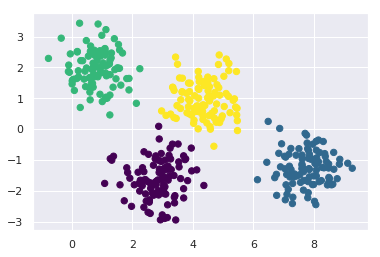

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

Mote that we are more certain about some points being part of a cluster than others (and we can't estimate that with k-means).

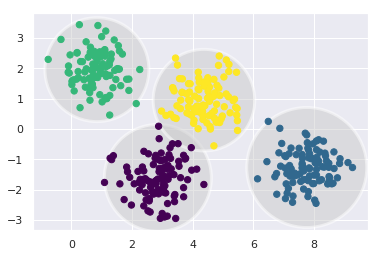

In [ ]:
# hard-sphere-cutoff workaround
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

This doesn't work so well for elongated blobs.

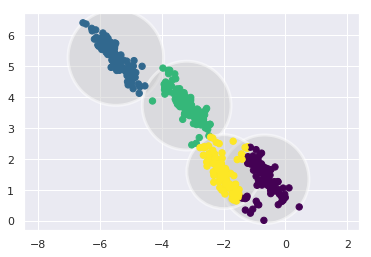

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

Here's where GMM comes to the rescue.

#Generalizing E–M: Gaussian Mixture Models

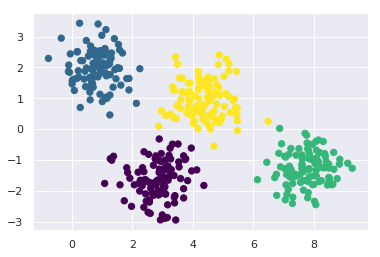

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

$a_{ik}$ (probability memberships/responsibilities) measure our level of uncertainty.

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.463 0.537]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


We can depict $a_{ik}$ with the size of the points at the scatter plot: just take the maximum value, square it (emphasizes differences) and let it be the radius of the point. Note how point close to the borderline are smaller.

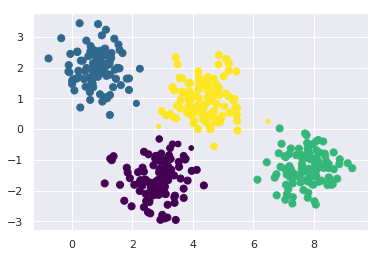

In [ ]:
size = 50 * probs.max(1) ** 2  
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

As we saw GMM is very similar to k-means but more general and versatile.
We saw that it also uses an expectation–maximization.
   
   * Choose starting guesses for the location and shape
   * Repeat until converged:
      *  E-step: for each point, find weights encoding the probability of membership in each cluster
      *  M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights

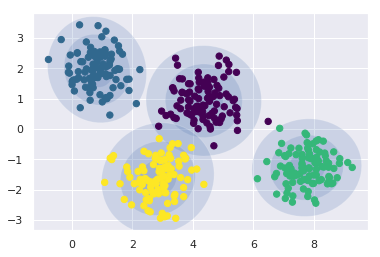

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

Take a look at the stretched blobs. We can specify the type of covariance to hint `GaussianMixture` on the shape of the blobs.

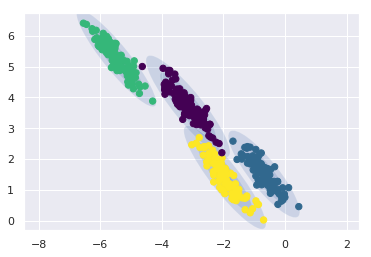

In [ ]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

##Choosing the covariance type

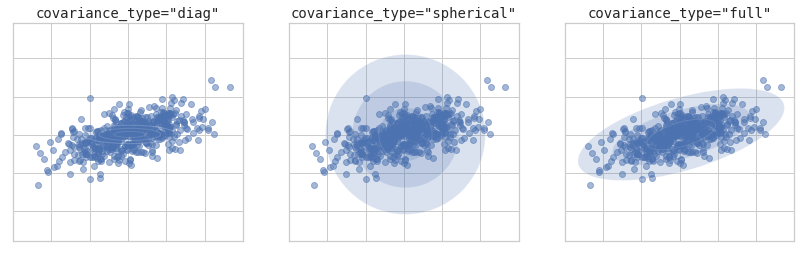

In [ ]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import seaborn as sns

sns.set_style("whitegrid")

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
      U, s, Vt = np.linalg.svd(covariance)
      angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
      width, height = 2 * np.sqrt(s)
    elif covariance.shape == (2,):
      angle = 0
      width, height = covariance
    else:
      angle = 0
      width, height = 2 * np.sqrt(covariance[0,0]), 2 * np.sqrt(covariance[0,0])
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True)
#fig.subplots_adjust(wspace=0.05)

rng = np.random.RandomState(5)
X = np.dot(rng.randn(500, 2), rng.randn(2, 2))

for i, cov_type in enumerate(['diag', 'spherical', 'full']):
    model = GaussianMixture(1, covariance_type=cov_type).fit(X)
    ax[i].axis('equal')
    ax[i].scatter(X[:, 0], X[:, 1], alpha=0.5)
    ax[i].set_xlim(-3, 3)
    ax[i].set_title('covariance_type="{0}"'.format(cov_type), size=14, family='monospace')
    if cov_type == 'spherical':
      cov = np.array([model.covariances_])
    else:
      cov = model.covariances_[0]
    draw_ellipse(model.means_[0], cov, ax[i], alpha=0.2)
    ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    ax[i].yaxis.set_major_formatter(plt.NullFormatter())

#GMM as Density Estimation

Actually, GMM is a **generative probabilistic model** describing the distribution of the data. Consider previous example with two moons.

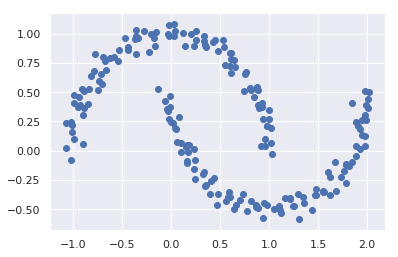

In [ ]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

GMM with $2$ Gaussians does not perform well with this set.

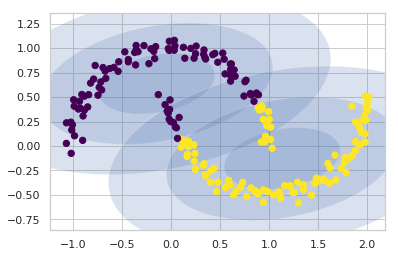

In [ ]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

We can do much better if we use more ($16$) Gaussians.

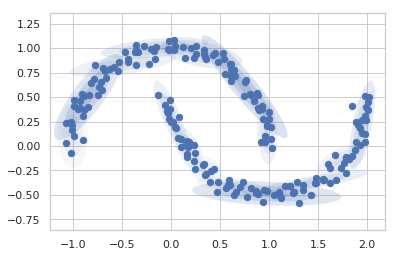

In [ ]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

Actually we can use GMM to generate (thus generative model) random points distributed with the same law as the given dataset. That's a cool feature.

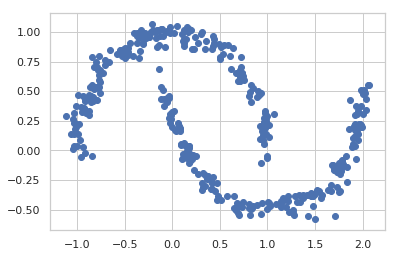

In [ ]:
Xnew, _ = gmm16.sample(400)  # if Ynew isn't valuable
plt.scatter(Xnew[:, 0], Xnew[:, 1])

##How many components?

How can we choose the number of Gaussians in GMM?

   * cross-validation
   * The Akaike information criterion [(AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion)

   AIC is an estimator of out-of-sample prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

   Suppose that we have a statistical model of some data. Let k be the number of estimated parameters in the model. Let $\hat{L}$ be the maximum value of the likelihood function for the model. Then the AIC value of the model is the following.

   $$
   \text{AIC}=2k-2 \ln{\hat{L}}.
   $$

   * The Bayesian information criterion [(BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

$$
   \text{BIC}=\ln{(N)}k-2 \ln{\hat{L}},
$$

where $N$ is the number of data points (sample size), $k$ - number of parameters estimated by the model, $\hat{L}$ - the maximized value of the likelihood function of the model $M$, $\hat{L}=p(X|\hat{\theta},M)$.


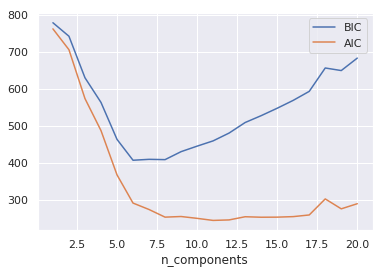

In [ ]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon) for n in n_components]
plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

   * number of components measures how well GMM works as a density estimator, **not** how well it works as a clustering algorithm.
   * you better use GMM as density estimator, not clusterizer

#Example: GMM for Generating New Data

We can use generative power of GMM to obtain new handwritten digits from the standard digits corpus.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

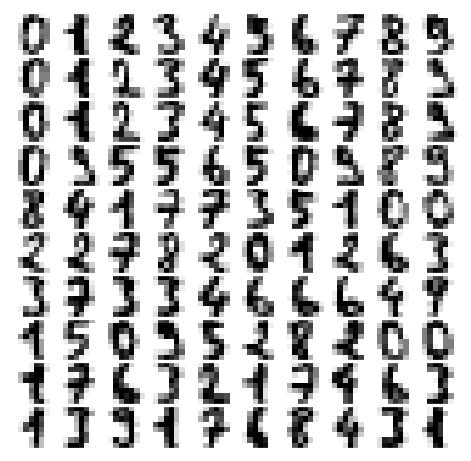

In [ ]:
def plot_digits(data):
  fig, ax = plt.subplots(10, 10, figsize=(8, 8),
  subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(hspace=0.05, wspace=0.05)
  for i, axi in enumerate(ax.flat):
    im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
  im.set_clim(0, 16)
  
plot_digits(digits.data)

We have too many dimensions ($64$), let's reduce them with PCA. 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

We use AIC to choose number of Gaussians.

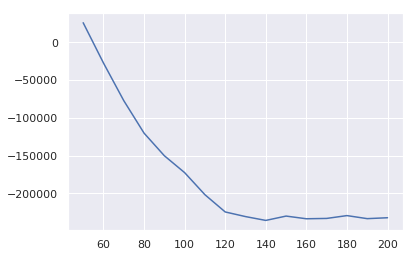

In [ ]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);


Let's fit GMM and check for convergence.

In [ ]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [ ]:
data_new, _ = gmm.sample(100)
data_new.shape

(100, 41)

Now use inverse transform (PCA) to generate digits.

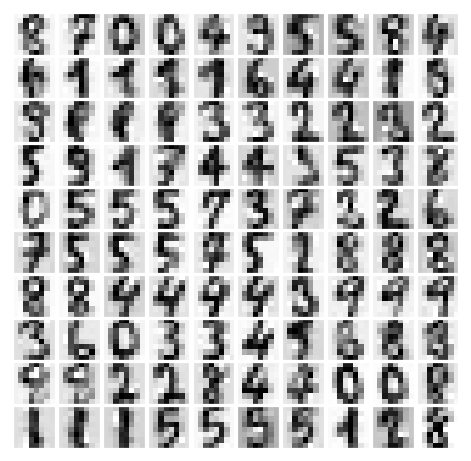

In [ ]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

#Interactive GMM

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

def cluster(X, n):
  gmm2 = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
  gmm2.fit(X)
  y_kmeans = gmm2.predict(X)
  centers = gmm2.means_
  covs = gmm2.covariances_
  w = gmm2.weights_
  return y_kmeans, centers, covs, w

In [ ]:
#@title GMM for 2D points
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Ellipse
from matplotlib import cm

def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_clusters(X, y, center, covariances, weights):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca()
  ax.tick_params(axis="y",direction="in", pad=-40)
  ax.tick_params(axis="x",direction="in", pad=-15)
  ax.set_xticks(np.arange(-.75, 1, .25))
  ax.set_yticks(np.arange(-.75, 1, .25))
  ax.set_xlim([-1, 1])
  ax.set_ylim([-1, 1])

  cmap = cm.get_cmap('viridis')
  c_norm = len(center)
  plt.scatter(X[:, 0], X[:, 1], c=y/c_norm, s=50)
  plt.scatter(center[:, 0], center[:, 1], c='red', marker='x', s=200, alpha=0.5);
  
  w_factor = 0.2 / weights.max()
  for pos, covar, w, c in zip(center, covariances, weights, range(c_norm)):
    clr = 0.5 if c_norm <= 1 else c/(c_norm-1)
    draw_ellipse(pos, covar, ax, alpha=w * w_factor, fc=cmap(clr))

  plt.close(fig)

  return fig

import base64
import io

def figure_to_base64(fig):
  buf = io.BytesIO()
  fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0);
  image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8').replace('\n', '')
  buf.close()
  return image_base64


def get_surface_data(centers, covs, w):
  x_ = np.linspace(-1.0, +1.0, num=300)
  y_ = np.linspace(-1.0, +1.0, num=300)
  xx, yy = np.meshgrid(x_, y_)
  x_vec = np.transpose(np.vstack([xx.ravel(), yy.ravel()])) - centers[:, np.newaxis]
  prod_1 = np.array([np.dot(v,m) for v,m in zip(x_vec, np.linalg.inv(covs))])
  prod_2 = np.array([np.sum(v1*v2, axis=1) for v1,v2 in zip(prod_1, x_vec)])
  g = np.exp(-0.5 * prod_2) / np.sqrt(np.linalg.det(covs).shape) / 2.0 / np.pi
  g = g.reshape((g.shape[0], x_.shape[0], y_.shape[0]))
  G = np.sum(g*w[:,np.newaxis, np.newaxis], axis=0)
  C = np.argmax(g, axis=0)
  return x_, y_, G, C

import json
from IPython.display import display, clear_output

def invoke(pts, n):
  global html_div

  data = np.array(pts).reshape((-1, 2))
  X = data / 300.0 - 1.0
  X[:, 1] *= -1.0

  y_kmeans, centers, covs, w = cluster(X, int(n))
  figr = plot_clusters(X, y_kmeans, centers, covs, w)
  image_base64 = figure_to_base64(figr)

  x_, y_, G, C = get_surface_data(centers, covs, w)

  return IPython.display.JSON({'image': image_base64, 
                               'g_x': x_.tolist(), 'g_y': y_.tolist(), 'g_z': G.tolist(), 'g_c': C.tolist(),
                               's_x': X[:, 0].tolist(), 's_y': X[:, 1].tolist(), 's_z': [0]*len(X), 's_c': y_kmeans.tolist()})


import IPython
from google.colab import output

main_str = '''
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script type="application/javascript">
  
    var active_pt = null;
    var all_pts = [];
    var classAbtn = [650, 100];
    var classBbtn = [650, 200];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
      ctx.fillStyle = 'rgba(50, 50, 50, 0.2)';
      ctx.fill();
    }
    
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, [active_pt[0], active_pt[1]]);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, [item[0], item[1]]);
        });

      }
    }
    
    var timer

    function get_state() {
      var rates = document.getElementsByName('rate');
      for(var i = 0; i < rates.length; i++)
        if(rates[i].checked)
          return rates[i].value;
      return "none";
    }

    
    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      state = get_state();
      if (state == "add") {
        if (x < 600)
            all_pts.push([x, y]);
        return;
      }

      idx = -1;
      all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        }
      });
      if (idx <= -1)
          return;
      if (state == "move") {
        active_pt = all_pts[idx];
        all_pts.splice(idx, 1);
      }
      if (state == "del")
          all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      evt.stopPropagation();
      if (get_state() != "move")
          return;
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        active_pt[0] = x;
        active_pt[1] = y;
      }
    }
    
    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        all_pts.push(active_pt);
        active_pt = null;
      }
    }
    
    function clear_field() {
      active_pt = null;
      all_pts = [];
    }


   function plot_3d(g_x, g_y, g_z, g_c)
   {
     cell_for_plot = document.getElementById('for_plotly_plot');
     //Plotly.deleteTraces(cell_for_plot, [0, 1]);
     var data = [{
           x: g_x,
           y: g_y,
           z: g_z,
           type: 'surface',
           surfacecolor: g_c,
           opacity: 0.9,
           showscale: false,
           colorscale: "Viridis"
        }];
  
     var layout = {
          title: '3D Gaussian profile',
          autosize: false,
          width: 600,
          height: 600,
          showlegend: false,
          scene: {
            camera: {
              up: {x: 0, y: 1, z: 0},
              center: {x: 0, y: 0, z: 0},
              eye: {x: 0.0, y: -1.0, z: 1.4}
            }
          }
        };
     Plotly.newPlot(cell_for_plot, data, layout);
   }

   function plot_scatter(s_x, s_y, s_z, s_c)
   {
          
     cell_for_plot = document.getElementById('for_plotly_plot');
     var data = [{
           x: s_x,
           y: s_y,
           z: s_z,
           type: 'scatter3d',
           mode: 'markers',
           marker: {
             size: 4,
             colorscale: "Viridis",
             color: s_c,
             line: {
               width: 2,
               color: 'rgba(0, 0, 0, 0.5)'
             }
           }
        }];
    Plotly.plot(cell_for_plot, data, {});
   }


    var cur_depth = 1;

    async function calculate() {
      if (!all_pts)
        return;
      var merged = [].concat.apply([], all_pts);
      const result = await google.colab.kernel.invokeFunction('notebook.InvSVM', [merged, cur_depth], {});
      params = result.data['application/json'];
            
      bg_image.src = 'data:image/  png;base64,' + params.image;
      cell_for_plot = document.getElementById('for_plotly_plot');
      
      plot_3d(params.g_x, params.g_y, params.g_z, params.g_c);
      plot_scatter(params.s_x, params.s_y, params.s_z, params.s_c);
      
    }

   function h_change(x) {
    el = document.getElementById("slider_val");
    cur_depth = x;
    el.innerHTML = x;
  }

 </script>

<div id="everything" style="height:600px;">
<div id="for_plotly_plot" style="position:absolute; top:0px; left:0px; height:600px; width:600px;">
</div>
<div id="custom_controls" style="position:absolute; top:0px; left:600px;">
  <canvas id="canvas" width="800" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
  <div style="position:absolute; top:275px; left:625px;">
   <div style="border-style: solid;">
    <input type="radio" id="r1" name="rate" value="add" checked="checked"> Add data point
    <br>
    <input type="radio" id="r2" name="rate" value="move"> Move data point
    <br>
    <input type="radio" id="r3" name="rate" value="del"> Delete data point
    <br>
    <button type="button" onclick="clear_field();">
      Clear
    </button>
   </div>
   <br><br>Number of clusters:<br>
    <input type="range" min="1" max="9" value="1" oninput="h_change(this.value)">
    <br><div id="slider_val">1</div>
   <br><br>
    <button type="button" onclick="calculate();">
      GMM
    </button>
  </div>
</div>
<div>
  
<script>
function init()
{
  timer = setInterval(draw, 10);
}

init();
</script>
'''

display(IPython.display.HTML(main_str))
output.register_callback('notebook.InvSVM', invoke)